In [2]:
# jupyter notebooks header --------------------------------------------------------------
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import sys
np.set_printoptions(linewidth=250, suppress=True)
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from config import cfg

import os
cfg.CONST.DEVICE = "1"
# need to set gpus before anything involving pytorch
os.environ["CUDA_VISIBLE_DEVICES"] = cfg.CONST.DEVICE

from core.train import train_net
from core.test import test_net
import torch
import pprint

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd

In [5]:
def embed_TSNE(data):
    X_embedded = PCA(n_components = 50, svd_solver='auto').fit_transform(data)
    X_embedded = TSNE(n_components=2).fit_transform(X_embedded) 
    return X_embedded

In [6]:
def visualize_model_tsne(trial_name, classes_to_use, use_classifier, places):
    weights_path = "./output/{}/checkpoints/best-ckpt.pth".format(trial_name)
    cfg.CONST.N_VIEWS_RENDERING = 1
    cfg.DATASET.CLASSES_TO_USE = classes_to_use
    cfg.CONST.WEIGHTS = weights_path
    cfg.NETWORK.USE_CLASSIFIER = use_classifier
    cfg.DATASET.USE_PLACES = places
    
    data_results = test_net(cfg) 
    
    classification_labels = data_results[1]
    latent_vectors = data_results[2]
    embedded_df = pd.DataFrame(embed_TSNE(latent_vectors)) 
    
    ax = embedded_df.plot.scatter(x=0, y = 1, c = classification_labels, colormap="viridis")
    ax.set_title("TSNE")

In [ ]:
visualize_model_tsne("2020_03_02--05_09_09_cls_loss_mini", ['cabinet','car'])

[INFO] 2020-03-03 02:22:36.328827 Loading cache of Taxonomy[ID=02691156, Name=aeroplane, Partition=test]
[INFO] 2020-03-03 02:22:36.522416 Loading cache of Taxonomy[ID=02828884, Name=bench, Partition=test]
[INFO] 2020-03-03 02:22:36.530985 Loading cache of Taxonomy[ID=02933112, Name=cabinet, Partition=test]
[INFO] 2020-03-03 02:22:36.544893 Loading cache of Taxonomy[ID=02958343, Name=car, Partition=test]
[INFO] 2020-03-03 02:22:36.842597 Loading cache of Taxonomy[ID=03001627, Name=chair, Partition=test]
[INFO] 2020-03-03 02:22:37.173999 Loading cache of Taxonomy[ID=03211117, Name=display, Partition=test]
[INFO] 2020-03-03 02:22:37.181791 Loading cache of Taxonomy[ID=03636649, Name=lamp, Partition=test]
[INFO] 2020-03-03 02:22:37.333955 Loading cache of Taxonomy[ID=03691459, Name=speaker, Partition=test]
[INFO] 2020-03-03 02:22:37.361803 Loading cache of Taxonomy[ID=04090263, Name=rifle, Partition=test]
[INFO] 2020-03-03 02:22:37.449966 Loading cache of Taxonomy[ID=04256520, Name=sofa, 

[INFO] 2020-03-03 02:23:26.141401 Test[34/8770] Taxonomy = 02691156 Sample = 43edf9f02a027ed162f11c7bf54cc1ed EDLoss = 0.1736 RLoss = 0.1736 IoU = ['0.6026', '0.5564', '0.4735', '0.4199'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:26.236226 Test[35/8770] Taxonomy = 02691156 Sample = f9fc7fc23e62986fef6c510e24348d3b EDLoss = 0.2868 RLoss = 0.2868 IoU = ['0.3772', '0.3924', '0.3992', '0.4054'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:26.349247 Test[36/8770] Taxonomy = 02691156 Sample = ec8ba88cdead53f336dafa9b6763ef3f EDLoss = 0.3987 RLoss = 0.3987 IoU = ['0.4992', '0.5123', '0.5024', '0.4804'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:26.423312 Test[37/8770] Taxonomy = 02691156 Sample = 388c9b9f1cf24ff84e61a0c2eaaabe87 EDLoss = 0.0399 RLoss = 0.0399 IoU = ['0.8738', '0.9138', '0.9378', '0.9382'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:26.568500 Test[38/8770] Taxonomy = 02691156 Sample = d583d6f23c590f3ec672ad25c77a396 EDLoss = 0.2218 RLoss = 0.2218 IoU = ['0.6291', '0.6745', '0.6775', '0.6572'], 

[INFO] 2020-03-03 02:23:28.555781 Test[77/8770] Taxonomy = 02691156 Sample = e2a6bed8b8920586c7a2c209f9742f15 EDLoss = 0.1727 RLoss = 0.1727 IoU = ['0.4784', '0.5246', '0.5267', '0.4876'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:28.593851 Test[78/8770] Taxonomy = 02691156 Sample = 99e1961a72bb8ac46177b6d1ecbf989 EDLoss = 0.1941 RLoss = 0.1941 IoU = ['0.5176', '0.5869', '0.6489', '0.6891'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:28.622983 Test[79/8770] Taxonomy = 02691156 Sample = 9a84ed39f9a2a3c0b3f2b01de37c0b29 EDLoss = 0.1857 RLoss = 0.1857 IoU = ['0.3539', '0.3209', '0.3048', '0.2641'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:28.634869 Test[80/8770] Taxonomy = 02691156 Sample = 4377ea17eb17fa79216b327569dd806e EDLoss = 0.2251 RLoss = 0.2251 IoU = ['0.5389', '0.5701', '0.5778', '0.5827'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:28.689645 Test[81/8770] Taxonomy = 02691156 Sample = d3d788c1fb35227619ba010ddb4974fe EDLoss = 0.1021 RLoss = 0.1021 IoU = ['0.7077', '0.7389', '0.7597', '0.7673'], 

[INFO] 2020-03-03 02:23:30.895281 Test[123/8770] Taxonomy = 02691156 Sample = 24968851e483feb237678474be485ca EDLoss = 0.0446 RLoss = 0.0446 IoU = ['0.9092', '0.9429', '0.9693', '0.9741'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:30.909384 Test[124/8770] Taxonomy = 02691156 Sample = 750000e25d4078f64e61a0c2eaaabe87 EDLoss = 0.0537 RLoss = 0.0537 IoU = ['0.8354', '0.8652', '0.8758', '0.8836'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:30.925701 Test[125/8770] Taxonomy = 02691156 Sample = b5130ad12f6db8d0c83b9fdce4d2e0e7 EDLoss = 0.1926 RLoss = 0.1926 IoU = ['0.6566', '0.6755', '0.6594', '0.6210'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:30.970947 Test[126/8770] Taxonomy = 02691156 Sample = ee461612837ce39eedd03f781ec3ebcf EDLoss = 0.2049 RLoss = 0.2049 IoU = ['0.5972', '0.6006', '0.6053', '0.5859'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:30.986342 Test[127/8770] Taxonomy = 02691156 Sample = 24bbc1f5225969fb90b1d6deb98feec6 EDLoss = 0.1155 RLoss = 0.1155 IoU = ['0.7510', '0.7903', '0.8055', '0.803

[INFO] 2020-03-03 02:23:34.294960 Test[165/8770] Taxonomy = 02691156 Sample = 3a6d6534045b1895e8ed194c80e0b1ef EDLoss = 0.1590 RLoss = 0.1590 IoU = ['0.5608', '0.5967', '0.6365', '0.6275'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:34.393877 Test[166/8770] Taxonomy = 02691156 Sample = b34526d94a00ab55f5a25dd70eb863e0 EDLoss = 0.6029 RLoss = 0.6029 IoU = ['0.3845', '0.3676', '0.3508', '0.3309'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:34.514021 Test[167/8770] Taxonomy = 02691156 Sample = 2c9e063352a538a4af7dd1bfd65143a9 EDLoss = 0.0712 RLoss = 0.0712 IoU = ['0.8010', '0.8316', '0.8245', '0.8117'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:34.596526 Test[168/8770] Taxonomy = 02691156 Sample = b008491b09894384451efd5041dc713 EDLoss = 0.2613 RLoss = 0.2613 IoU = ['0.4518', '0.4905', '0.5114', '0.4424'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:34.724305 Test[169/8770] Taxonomy = 02691156 Sample = ace4fe6e9c97150a35fc197bbabcd5bd EDLoss = 0.1532 RLoss = 0.1532 IoU = ['0.7016', '0.7154', '0.7159', '0.727

[INFO] 2020-03-03 02:23:36.382043 Test[206/8770] Taxonomy = 02691156 Sample = e74b8862468d887c6d9b5a419d9131 EDLoss = 0.1154 RLoss = 0.1154 IoU = ['0.5739', '0.6878', '0.7140', '0.6923'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:36.395216 Test[207/8770] Taxonomy = 02691156 Sample = c54ca35ef1df558850ea677bbfebf3fb EDLoss = 0.3232 RLoss = 0.3232 IoU = ['0.3439', '0.3571', '0.3676', '0.3673'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:36.411370 Test[208/8770] Taxonomy = 02691156 Sample = e218bb755f35da1bb4cdad9a5bf52dd5 EDLoss = 0.1498 RLoss = 0.1498 IoU = ['0.6849', '0.7500', '0.7468', '0.7270'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:36.478142 Test[209/8770] Taxonomy = 02691156 Sample = b4dbf6f6b0cc8ec5ce19d55bc5e6a406 EDLoss = 0.1119 RLoss = 0.1119 IoU = ['0.7898', '0.8221', '0.8191', '0.8014'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:36.509407 Test[210/8770] Taxonomy = 02691156 Sample = 31b75f20c64b03ff6b7bd17e458d0dcb EDLoss = 0.0934 RLoss = 0.0934 IoU = ['0.6816', '0.7172', '0.7437', '0.7471

[INFO] 2020-03-03 02:23:37.525601 Test[252/8770] Taxonomy = 02691156 Sample = 9441549e323552f2f001dddaf44c449b EDLoss = 0.1561 RLoss = 0.1561 IoU = ['0.4165', '0.4643', '0.5066', '0.5320'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:37.575977 Test[253/8770] Taxonomy = 02691156 Sample = f96426f2392abb1d8d58389384d9812e EDLoss = 0.2454 RLoss = 0.2454 IoU = ['0.6831', '0.6705', '0.6307', '0.5849'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:37.593127 Test[254/8770] Taxonomy = 02691156 Sample = 14cd2f1de7f68bf3ab550998f901c8e1 EDLoss = 0.3402 RLoss = 0.3402 IoU = ['0.3987', '0.3638', '0.3270', '0.2627'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:37.606885 Test[255/8770] Taxonomy = 02691156 Sample = e00d7bd590ac129bbc0909d98a1ff2b4 EDLoss = 0.2168 RLoss = 0.2168 IoU = ['0.6701', '0.6865', '0.6868', '0.6907'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:37.696831 Test[256/8770] Taxonomy = 02691156 Sample = 523f5360c3aa35b5e1c77ed807ff5c62 EDLoss = 0.0888 RLoss = 0.0888 IoU = ['0.8255', '0.8263', '0.8199', '0.79

[INFO] 2020-03-03 02:23:39.827867 Test[293/8770] Taxonomy = 02691156 Sample = f57caba2eed21f2998459325335edae9 EDLoss = 0.1797 RLoss = 0.1797 IoU = ['0.5804', '0.6089', '0.6018', '0.5924'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:39.921389 Test[294/8770] Taxonomy = 02691156 Sample = f21a375ca5fd26994fb6540b6bb872e9 EDLoss = 0.3387 RLoss = 0.3387 IoU = ['0.2096', '0.1833', '0.1713', '0.1646'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:40.065304 Test[295/8770] Taxonomy = 02691156 Sample = e501a0327ab3731d0f859db45b95a2d EDLoss = 0.1576 RLoss = 0.1576 IoU = ['0.7324', '0.7412', '0.7447', '0.7428'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:40.159771 Test[296/8770] Taxonomy = 02691156 Sample = 92cf58c641a4e5af56a793e48de27b07 EDLoss = 0.1908 RLoss = 0.1908 IoU = ['0.5876', '0.6312', '0.6381', '0.6061'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:40.317533 Test[297/8770] Taxonomy = 02691156 Sample = e805054e6b9b3666fcfb100fed3ed97a EDLoss = 0.8440 RLoss = 0.8440 IoU = ['0.4722', '0.4748', '0.4164', '0.331

[INFO] 2020-03-03 02:23:41.641579 Test[339/8770] Taxonomy = 02691156 Sample = b65ac56abaecc35bedcd88be6151afb4 EDLoss = 0.2989 RLoss = 0.2989 IoU = ['0.3522', '0.3778', '0.4351', '0.4242'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:41.670572 Test[340/8770] Taxonomy = 02691156 Sample = 46d4d453ceac2f5c3c3b254d8683a766 EDLoss = 0.5227 RLoss = 0.5227 IoU = ['0.3578', '0.3620', '0.3446', '0.3220'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:41.690260 Test[341/8770] Taxonomy = 02691156 Sample = 757c47e20a37647431e38f024b7ad042 EDLoss = 0.6652 RLoss = 0.6652 IoU = ['0.2881', '0.2709', '0.2554', '0.2330'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:41.704172 Test[342/8770] Taxonomy = 02691156 Sample = d458335c758930c210b8e0008ef5faf6 EDLoss = 0.0874 RLoss = 0.0874 IoU = ['0.7361', '0.7822', '0.8304', '0.8478'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:41.731971 Test[343/8770] Taxonomy = 02691156 Sample = 7201e35e5062683571d03b466c72ce41 EDLoss = 0.1391 RLoss = 0.1391 IoU = ['0.6328', '0.7028', '0.7397', '0.74

[INFO] 2020-03-03 02:23:43.819663 Test[382/8770] Taxonomy = 02691156 Sample = e15f4c98857b67e41e287f9f679ab620 EDLoss = 0.3824 RLoss = 0.3824 IoU = ['0.4210', '0.4314', '0.3992', '0.3570'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:43.877181 Test[383/8770] Taxonomy = 02691156 Sample = a162465f9664d92a94eaa56dbee38b5b EDLoss = 0.4432 RLoss = 0.4432 IoU = ['0.4730', '0.4283', '0.4039', '0.3711'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:43.908772 Test[384/8770] Taxonomy = 02691156 Sample = 122776d17b6a118086da73d36506db6f EDLoss = 0.2194 RLoss = 0.2194 IoU = ['0.4316', '0.4589', '0.4799', '0.4747'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:43.939987 Test[385/8770] Taxonomy = 02691156 Sample = aa4df918db6c5973db6e67bf56014264 EDLoss = 0.3237 RLoss = 0.3237 IoU = ['0.3517', '0.4049', '0.4351', '0.4383'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:43.965908 Test[386/8770] Taxonomy = 02691156 Sample = 669060a91dc45dfd2ede7237ec38a80 EDLoss = 0.4460 RLoss = 0.4460 IoU = ['0.3841', '0.4054', '0.4195', '0.414

[INFO] 2020-03-03 02:23:45.730462 Test[423/8770] Taxonomy = 02691156 Sample = e30e25fe047ce1ea10b08ceced9a0113 EDLoss = 0.2143 RLoss = 0.2143 IoU = ['0.4569', '0.4847', '0.5037', '0.5129'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:45.851534 Test[424/8770] Taxonomy = 02691156 Sample = 7b3bd63ff099f5b062b600da24e0965 EDLoss = 0.1764 RLoss = 0.1764 IoU = ['0.5196', '0.5647', '0.6041', '0.6306'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:45.962674 Test[425/8770] Taxonomy = 02691156 Sample = 8b1b372c0ea200bd225a23c790f08fdd EDLoss = 0.1686 RLoss = 0.1686 IoU = ['0.6151', '0.6560', '0.6781', '0.7009'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:46.242791 Test[426/8770] Taxonomy = 02691156 Sample = aa21bf2a545e710cf68a010d0fc56333 EDLoss = 0.1150 RLoss = 0.1150 IoU = ['0.7236', '0.7541', '0.7623', '0.7528'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:46.314960 Test[427/8770] Taxonomy = 02691156 Sample = 66a32714d2344d1bf52a658ce0ec2c1 EDLoss = 0.1023 RLoss = 0.1023 IoU = ['0.7138', '0.7326', '0.7517', '0.7729

[INFO] 2020-03-03 02:23:49.874317 Test[465/8770] Taxonomy = 02691156 Sample = bdfa5ff6aefd3fb8a57854d2ce086d65 EDLoss = 0.3030 RLoss = 0.3030 IoU = ['0.5156', '0.5522', '0.5560', '0.5119'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:49.923042 Test[466/8770] Taxonomy = 02691156 Sample = f80343ac3064e74862347b4731688b0f EDLoss = 0.0721 RLoss = 0.0721 IoU = ['0.7738', '0.8251', '0.8213', '0.8079'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:49.940556 Test[467/8770] Taxonomy = 02691156 Sample = 918b46dfb239ee044a8d8b0dca1fd34 EDLoss = 0.1845 RLoss = 0.1845 IoU = ['0.6546', '0.6868', '0.7228', '0.7064'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:49.955188 Test[468/8770] Taxonomy = 02691156 Sample = b5d0ae4f723bce81f119374ee5d5f944 EDLoss = 0.0791 RLoss = 0.0791 IoU = ['0.8030', '0.8525', '0.8693', '0.8624'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:50.005365 Test[469/8770] Taxonomy = 02691156 Sample = 5e0331eab3f051988f6810e1a2b6aa04 EDLoss = 0.2260 RLoss = 0.2260 IoU = ['0.5757', '0.6159', '0.6491', '0.633

[INFO] 2020-03-03 02:23:51.800526 Test[506/8770] Taxonomy = 02691156 Sample = cf96229978efbb488b96ae1a0a8b84ec EDLoss = 0.0750 RLoss = 0.0750 IoU = ['0.8270', '0.8552', '0.8547', '0.8475'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:51.855015 Test[507/8770] Taxonomy = 02691156 Sample = 8d54e30dea0e2508bbf3143b1cb6076a EDLoss = 0.0861 RLoss = 0.0861 IoU = ['0.7771', '0.7898', '0.7946', '0.7924'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:51.971986 Test[508/8770] Taxonomy = 02691156 Sample = 60f99c0946c095e833b2a295000cb6fe EDLoss = 0.3904 RLoss = 0.3904 IoU = ['0.5086', '0.5577', '0.5725', '0.5476'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:52.093989 Test[509/8770] Taxonomy = 02691156 Sample = edb916c2cdc2d3b9ce2cec85ea6ae00d EDLoss = 0.3788 RLoss = 0.3788 IoU = ['0.4063', '0.3954', '0.3857', '0.3833'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:52.217485 Test[510/8770] Taxonomy = 02691156 Sample = fc44636ad5fd9754927b6179bcc6e892 EDLoss = 0.5926 RLoss = 0.5926 IoU = ['0.3651', '0.3890', '0.3944', '0.38

[INFO] 2020-03-03 02:23:54.128539 Test[557/8770] Taxonomy = 02691156 Sample = f8038d33c212f81fe99ea3c41458bc01 EDLoss = 0.0991 RLoss = 0.0991 IoU = ['0.7553', '0.8068', '0.8322', '0.8177'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:54.168470 Test[558/8770] Taxonomy = 02691156 Sample = a19a5a459d234919c1ccec171a275967 EDLoss = 0.3396 RLoss = 0.3396 IoU = ['0.5831', '0.6160', '0.6276', '0.6062'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:54.180554 Test[559/8770] Taxonomy = 02691156 Sample = ed1a5c9fac829d17a6766282ea8c438f EDLoss = 0.6311 RLoss = 0.6311 IoU = ['0.4637', '0.4663', '0.4614', '0.4382'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:54.240021 Test[560/8770] Taxonomy = 02691156 Sample = 7b3ef304a0088b39112e53a423c9745e EDLoss = 0.2106 RLoss = 0.2106 IoU = ['0.6232', '0.6656', '0.6699', '0.6207'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:54.260448 Test[561/8770] Taxonomy = 02691156 Sample = 67a6b5b12ba64c529a6e43b878d5b335 EDLoss = 0.4478 RLoss = 0.4478 IoU = ['0.4288', '0.4606', '0.4017', '0.33

[INFO] 2020-03-03 02:23:55.657855 Test[600/8770] Taxonomy = 02691156 Sample = 31fd02481a07471e4e8b48a4c01e36f8 EDLoss = 0.1434 RLoss = 0.1434 IoU = ['0.4025', '0.4659', '0.5455', '0.5899'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:55.699722 Test[601/8770] Taxonomy = 02691156 Sample = 75db11c354c6342aad01ec966c80ac91 EDLoss = 0.1965 RLoss = 0.1965 IoU = ['0.6320', '0.6727', '0.6589', '0.6299'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:55.743612 Test[602/8770] Taxonomy = 02691156 Sample = d708c311bcd60e61c9ac656f0c2edc4b EDLoss = 0.3894 RLoss = 0.3894 IoU = ['0.5131', '0.5607', '0.5899', '0.6126'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:55.758961 Test[603/8770] Taxonomy = 02691156 Sample = ed709305e61acf6a9b017c80f62649a0 EDLoss = 0.0691 RLoss = 0.0691 IoU = ['0.8434', '0.8656', '0.8731', '0.8752'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:55.772005 Test[604/8770] Taxonomy = 02691156 Sample = 310f0957ae1436d88025a4ffa6c0c22b EDLoss = 0.2293 RLoss = 0.2293 IoU = ['0.4136', '0.4823', '0.5257', '0.56

[INFO] 2020-03-03 02:23:58.358598 Test[641/8770] Taxonomy = 02691156 Sample = 4d885cb269ae88ccbc40166c69b12cc6 EDLoss = 0.1294 RLoss = 0.1294 IoU = ['0.7318', '0.7576', '0.7577', '0.7575'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:58.389064 Test[642/8770] Taxonomy = 02691156 Sample = bb26678e5faaed16300ca77569ad3884 EDLoss = 0.1172 RLoss = 0.1172 IoU = ['0.4766', '0.5276', '0.5467', '0.5389'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:58.494093 Test[643/8770] Taxonomy = 02691156 Sample = a3a3a3d2ccc590eeaef99de91a3e555 EDLoss = 0.1940 RLoss = 0.1940 IoU = ['0.5878', '0.6124', '0.6110', '0.6045'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:58.554194 Test[644/8770] Taxonomy = 02691156 Sample = a211cfc04bf47039e933de2bdfbab002 EDLoss = 0.0765 RLoss = 0.0765 IoU = ['0.8052', '0.8323', '0.8307', '0.8223'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:58.604882 Test[645/8770] Taxonomy = 02691156 Sample = 2d3ecfb6d7ef2c45e08b03c50fd87acb EDLoss = 0.2654 RLoss = 0.2654 IoU = ['0.4626', '0.4916', '0.5297', '0.543

[INFO] 2020-03-03 02:23:59.932367 Test[683/8770] Taxonomy = 02691156 Sample = eb110db9bdd0463e5b7003ff580606fa EDLoss = 0.3144 RLoss = 0.3144 IoU = ['0.5159', '0.5079', '0.5043', '0.4893'], ClsAcc=1.0000
[INFO] 2020-03-03 02:23:59.953682 Test[684/8770] Taxonomy = 02691156 Sample = 5f2aa0bc5a7fc2beacf77e718d93f3e1 EDLoss = 0.0972 RLoss = 0.0972 IoU = ['0.7493', '0.7722', '0.7673', '0.7817'], ClsAcc=0.0000
[INFO] 2020-03-03 02:23:59.984678 Test[685/8770] Taxonomy = 02691156 Sample = 79e06d1fe2e217b2cf67c0b63878e138 EDLoss = 0.0541 RLoss = 0.0541 IoU = ['0.8568', '0.9104', '0.9416', '0.9408'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:00.155560 Test[686/8770] Taxonomy = 02691156 Sample = 1d5beedb73951ef68649ad8da70da1e EDLoss = 0.8047 RLoss = 0.8047 IoU = ['0.2216', '0.2198', '0.2125', '0.1883'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:00.229911 Test[687/8770] Taxonomy = 02691156 Sample = 7cbd504262e2d17ee91114a141d25a9d EDLoss = 0.1654 RLoss = 0.1654 IoU = ['0.4869', '0.4844', '0.5066', '0.490

[INFO] 2020-03-03 02:24:05.291637 Test[724/8770] Taxonomy = 02691156 Sample = f8d8b590a0dcd399718ac2a6ddb54499 EDLoss = 0.2370 RLoss = 0.2370 IoU = ['0.3616', '0.4140', '0.3780', '0.2659'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:05.305232 Test[725/8770] Taxonomy = 02691156 Sample = 27e6fe140e6e668a3881254c11db28 EDLoss = 0.4253 RLoss = 0.4253 IoU = ['0.6229', '0.6207', '0.5833', '0.5246'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:05.324546 Test[726/8770] Taxonomy = 02691156 Sample = c1b9934ddbf4f29e77fd7318510b8627 EDLoss = 0.0463 RLoss = 0.0463 IoU = ['0.8877', '0.9295', '0.9679', '0.9756'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:05.336052 Test[727/8770] Taxonomy = 02691156 Sample = f0e7808ee55510be1a7dd57f67482196 EDLoss = 0.3562 RLoss = 0.3562 IoU = ['0.3505', '0.3648', '0.3575', '0.3287'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:05.347201 Test[728/8770] Taxonomy = 02691156 Sample = 2993c233805d2718ad8912880b776dcf EDLoss = 0.2859 RLoss = 0.2859 IoU = ['0.4511', '0.4836', '0.4560', '0.4216

[INFO] 2020-03-03 02:24:07.981643 Test[767/8770] Taxonomy = 02691156 Sample = bc48b77452fd108adf8f666ba0e601ac EDLoss = 0.0438 RLoss = 0.0438 IoU = ['0.9015', '0.9324', '0.9428', '0.9443'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:08.026682 Test[768/8770] Taxonomy = 02691156 Sample = 12d15ac778df6e4562b600da24e0965 EDLoss = 0.1260 RLoss = 0.1260 IoU = ['0.7363', '0.7660', '0.7835', '0.7620'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:08.099224 Test[769/8770] Taxonomy = 02691156 Sample = f1df46c588524ee76aa3bf023a2b42a5 EDLoss = 0.1066 RLoss = 0.1066 IoU = ['0.7599', '0.7747', '0.7815', '0.7818'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:08.127151 Test[770/8770] Taxonomy = 02691156 Sample = 6c613c1893bf7f9ffae8113cc147b3ae EDLoss = 0.0544 RLoss = 0.0544 IoU = ['0.8053', '0.8330', '0.8536', '0.8795'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:08.193500 Test[771/8770] Taxonomy = 02691156 Sample = ce4b8076f8f9a5a05be07e24c1d3227d EDLoss = 0.0529 RLoss = 0.0529 IoU = ['0.8258', '0.8714', '0.8899', '0.893

[INFO] 2020-03-03 02:24:12.277399 Test[808/8770] Taxonomy = 02691156 Sample = 8f4e31ee9912f54e77fd7318510b8627 EDLoss = 0.0496 RLoss = 0.0496 IoU = ['0.9048', '0.9337', '0.9559', '0.9605'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:12.375103 Test[809/8770] Taxonomy = 02691156 Sample = e33fbcf5b616d6f9f44f89e40af48618 EDLoss = 0.0882 RLoss = 0.0882 IoU = ['0.7745', '0.7872', '0.8044', '0.8006'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:12.467934 Test[810/8770] Taxonomy = 02691156 Sample = f1a4a370f9e50890686c25eb09ee7de5 EDLoss = 0.7266 RLoss = 0.7266 IoU = ['0.2770', '0.3009', '0.3177', '0.3382'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:12.510195 Test[811/8770] Taxonomy = 02828884 Sample = 891b8a01ad71af2db7e843606969432b EDLoss = 0.2854 RLoss = 0.2854 IoU = ['0.6267', '0.6739', '0.7060', '0.7252'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:12.687426 Test[812/8770] Taxonomy = 02828884 Sample = 682cb02cd40c9fa412b60d5939b55d61 EDLoss = 0.2090 RLoss = 0.2090 IoU = ['0.5450', '0.6321', '0.6453', '0.64

[INFO] 2020-03-03 02:24:15.345532 Test[849/8770] Taxonomy = 02828884 Sample = 14a73dd6b5d7ef35feea12256ad59f11 EDLoss = 1.4567 RLoss = 1.4567 IoU = ['0.1219', '0.0920', '0.0733', '0.0524'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:15.451620 Test[850/8770] Taxonomy = 02828884 Sample = b20a0209355ef6ddfe6460d8d9bd16c6 EDLoss = 0.7324 RLoss = 0.7324 IoU = ['0.5192', '0.5191', '0.4733', '0.4151'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:15.580681 Test[851/8770] Taxonomy = 02828884 Sample = a0cadebde61910df98e8242d4a63e1e5 EDLoss = 0.2019 RLoss = 0.2019 IoU = ['0.5867', '0.6205', '0.6349', '0.6271'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:15.763751 Test[852/8770] Taxonomy = 02828884 Sample = 4ba13b996d6f1d3b286ea987ad5ffa18 EDLoss = 0.1200 RLoss = 0.1200 IoU = ['0.7742', '0.7752', '0.7462', '0.7127'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:15.965905 Test[853/8770] Taxonomy = 02828884 Sample = db4f8c9f1c62e421efca4f7cb98e0c29 EDLoss = 0.6568 RLoss = 0.6568 IoU = ['0.5059', '0.5312', '0.5530', '0.57

[INFO] 2020-03-03 02:24:20.049745 Test[890/8770] Taxonomy = 02828884 Sample = f13e44c93bca57d092f4c88fd91c6b1b EDLoss = 0.3207 RLoss = 0.3207 IoU = ['0.7527', '0.7393', '0.7180', '0.6684'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:20.133365 Test[891/8770] Taxonomy = 02828884 Sample = ba6348031c6f0a795213cec267286d18 EDLoss = 0.2678 RLoss = 0.2678 IoU = ['0.5929', '0.6148', '0.6276', '0.6327'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:20.149810 Test[892/8770] Taxonomy = 02828884 Sample = a11db718438648a0ad5067eac75a07f7 EDLoss = 0.4549 RLoss = 0.4549 IoU = ['0.5664', '0.5815', '0.6016', '0.6240'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:20.305076 Test[893/8770] Taxonomy = 02828884 Sample = a6947bdac4ebc97517b431cae0dd70ed EDLoss = 0.0731 RLoss = 0.0731 IoU = ['0.9052', '0.9232', '0.9293', '0.9314'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:20.336810 Test[894/8770] Taxonomy = 02828884 Sample = b9b708af97a57de481f502b2c7b6ba78 EDLoss = 0.4978 RLoss = 0.4978 IoU = ['0.5066', '0.4563', '0.4091', '0.34

[INFO] 2020-03-03 02:24:22.363242 Test[932/8770] Taxonomy = 02828884 Sample = d8dbfb0f58a2df0bf1eac5a8cd36b62b EDLoss = 1.1150 RLoss = 1.1150 IoU = ['0.5843', '0.5594', '0.5239', '0.4876'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:22.377475 Test[933/8770] Taxonomy = 02828884 Sample = 4504e203b67dd8e473f10e6caaeca56 EDLoss = 0.8250 RLoss = 0.8250 IoU = ['0.4843', '0.4961', '0.5107', '0.5252'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:22.416540 Test[934/8770] Taxonomy = 02828884 Sample = 456e373768179bf3f155d75bbf62b80 EDLoss = 0.1792 RLoss = 0.1792 IoU = ['0.7328', '0.7528', '0.7400', '0.6860'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:22.453335 Test[935/8770] Taxonomy = 02828884 Sample = 671cade486e88b3880d14ef4d993c2fa EDLoss = 0.1850 RLoss = 0.1850 IoU = ['0.5651', '0.5792', '0.5904', '0.5924'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:22.495970 Test[936/8770] Taxonomy = 02828884 Sample = 5b24beacd0385489a6ca26b5255a8e6 EDLoss = 0.8339 RLoss = 0.8339 IoU = ['0.3231', '0.3447', '0.3598', '0.3682'

[INFO] 2020-03-03 02:24:24.532588 Test[973/8770] Taxonomy = 02828884 Sample = d0bce054a35f030b98b88952043d6eb3 EDLoss = 0.5569 RLoss = 0.5569 IoU = ['0.3598', '0.3980', '0.4384', '0.4337'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:24.655366 Test[974/8770] Taxonomy = 02828884 Sample = c1973b3aeb0e54df653ac91111db738b EDLoss = 0.7467 RLoss = 0.7467 IoU = ['0.8916', '0.8713', '0.8257', '0.7891'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:24.767294 Test[975/8770] Taxonomy = 02828884 Sample = c89d4c95f1e7c950a805114916841d69 EDLoss = 0.2450 RLoss = 0.2450 IoU = ['0.6783', '0.7756', '0.8502', '0.8848'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:24.892655 Test[976/8770] Taxonomy = 02828884 Sample = f8aa82e7e4c58ce29d31c5ce17cce95d EDLoss = 0.4577 RLoss = 0.4577 IoU = ['0.6430', '0.7030', '0.7453', '0.7542'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:25.185354 Test[977/8770] Taxonomy = 02828884 Sample = b2acbc0822c163fb491436340b3b4d18 EDLoss = 0.4164 RLoss = 0.4164 IoU = ['0.6253', '0.6356', '0.6490', '0.61

[INFO] 2020-03-03 02:24:28.923692 Test[1014/8770] Taxonomy = 02828884 Sample = 405d1666d90df2c139842e32fb9b4e4a EDLoss = 1.4267 RLoss = 1.4267 IoU = ['0.5809', '0.5670', '0.5590', '0.5678'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:29.045834 Test[1015/8770] Taxonomy = 02828884 Sample = 419f4ab8254c97a2056b4bd5d870b47 EDLoss = 0.0747 RLoss = 0.0747 IoU = ['0.8614', '0.8913', '0.9157', '0.8905'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:29.101639 Test[1016/8770] Taxonomy = 02828884 Sample = e6b0ac08a5326f23faf575cbae5008b8 EDLoss = 1.0293 RLoss = 1.0293 IoU = ['0.4390', '0.4412', '0.4472', '0.4610'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:29.261540 Test[1017/8770] Taxonomy = 02828884 Sample = 6319038bd4748a03d2b12aa6a0f050b3 EDLoss = 0.2745 RLoss = 0.2745 IoU = ['0.5049', '0.4960', '0.5146', '0.5351'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:29.407800 Test[1018/8770] Taxonomy = 02828884 Sample = 4769720a332fd899d2b12aa6a0f050b3 EDLoss = 0.2333 RLoss = 0.2333 IoU = ['0.7548', '0.7627', '0.7492', '

[INFO] 2020-03-03 02:24:32.113177 Test[1056/8770] Taxonomy = 02828884 Sample = ce9c518ef76b4974d56cc378741d37e8 EDLoss = 0.2339 RLoss = 0.2339 IoU = ['0.5416', '0.6356', '0.7125', '0.7306'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:32.149514 Test[1057/8770] Taxonomy = 02828884 Sample = ea577ade393dcaaacb2a965e75be701c EDLoss = 0.1904 RLoss = 0.1904 IoU = ['0.7113', '0.7400', '0.7582', '0.7760'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:32.214004 Test[1058/8770] Taxonomy = 02828884 Sample = 2ae355c406b7204e8c5da39cd0403824 EDLoss = 0.9407 RLoss = 0.9407 IoU = ['0.3467', '0.3302', '0.3008', '0.2534'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:32.254439 Test[1059/8770] Taxonomy = 02828884 Sample = fa1ab735efa7255c81553c4a57179bef EDLoss = 0.3117 RLoss = 0.3117 IoU = ['0.5997', '0.6746', '0.7277', '0.7539'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:32.300740 Test[1060/8770] Taxonomy = 02828884 Sample = d014dd996cb7b8ba4f34c3dabeae093 EDLoss = 0.2900 RLoss = 0.2900 IoU = ['0.8361', '0.8286', '0.7876', '

[INFO] 2020-03-03 02:24:34.429440 Test[1098/8770] Taxonomy = 02828884 Sample = e6f7d84750ac46b260bedcc07a9f285c EDLoss = 1.0119 RLoss = 1.0119 IoU = ['0.3996', '0.3936', '0.3834', '0.3697'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:34.504270 Test[1099/8770] Taxonomy = 02828884 Sample = 44facd26b66e6ec8cf0c8ab22c613984 EDLoss = 0.5175 RLoss = 0.5175 IoU = ['0.6051', '0.6676', '0.6977', '0.7125'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:34.517505 Test[1100/8770] Taxonomy = 02828884 Sample = e18d11ff6f781d843d2dd82a57bb3bd7 EDLoss = 0.1998 RLoss = 0.1998 IoU = ['0.6805', '0.7165', '0.7606', '0.7507'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:34.532406 Test[1101/8770] Taxonomy = 02828884 Sample = 1d94afb9894bf975e76bc197b3a3ffc0 EDLoss = 1.2933 RLoss = 1.2933 IoU = ['0.5669', '0.5605', '0.5377', '0.4992'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:34.549218 Test[1102/8770] Taxonomy = 02828884 Sample = fc7785be580a926a3409d1e6da3f019 EDLoss = 1.4886 RLoss = 1.4886 IoU = ['0.4124', '0.4306', '0.4320', '

[INFO] 2020-03-03 02:24:37.875452 Test[1141/8770] Taxonomy = 02828884 Sample = 9b1ed4bd84562d3f406f2f420f742d6 EDLoss = 0.5109 RLoss = 0.5109 IoU = ['0.5133', '0.4902', '0.4760', '0.4661'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:37.999065 Test[1142/8770] Taxonomy = 02828884 Sample = b3974f214dd4af93601104cd2d998272 EDLoss = 0.7572 RLoss = 0.7572 IoU = ['0.6440', '0.7049', '0.7244', '0.6935'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:38.067382 Test[1143/8770] Taxonomy = 02828884 Sample = 373ae08d8903dc10ba929f7d2edd1706 EDLoss = 0.2031 RLoss = 0.2031 IoU = ['0.4096', '0.3950', '0.3777', '0.3644'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:38.190506 Test[1144/8770] Taxonomy = 02828884 Sample = 28530ebad05e63d9d9c2d24a3a0c74af EDLoss = 0.4089 RLoss = 0.4089 IoU = ['0.4490', '0.4789', '0.4278', '0.3535'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:38.389542 Test[1145/8770] Taxonomy = 02828884 Sample = c97683ce5dcea25ad1d789f3b2120d0 EDLoss = 0.2540 RLoss = 0.2540 IoU = ['0.6476', '0.7020', '0.7104', '0

[INFO] 2020-03-03 02:24:41.509023 Test[1184/8770] Taxonomy = 02933112 Sample = c7a7a1254c5d98b8449f1c29830da6c6 EDLoss = 0.9322 RLoss = 0.9322 IoU = ['0.4388', '0.4693', '0.4883', '0.4998'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:41.522191 Test[1185/8770] Taxonomy = 02933112 Sample = 510fa8653c10b0d1ccd0340812259a39 EDLoss = 4.4121 RLoss = 4.4121 IoU = ['0.5125', '0.5188', '0.5168', '0.4996'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:41.534678 Test[1186/8770] Taxonomy = 02933112 Sample = 985eb4a8f9914873738e43095496b061 EDLoss = 0.4928 RLoss = 0.4928 IoU = ['0.8991', '0.9041', '0.9065', '0.9095'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:41.545625 Test[1187/8770] Taxonomy = 02933112 Sample = 4acadee1dadac64e4b8710a3469971b1 EDLoss = 0.2149 RLoss = 0.2149 IoU = ['0.9304', '0.9744', '0.9919', '0.9963'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:41.647699 Test[1188/8770] Taxonomy = 02933112 Sample = ce85ce0eb106d409b8a453d61eaf046c EDLoss = 2.2755 RLoss = 2.2755 IoU = ['0.6785', '0.6886', '0.6979', 

[INFO] 2020-03-03 02:24:44.338089 Test[1226/8770] Taxonomy = 02933112 Sample = 2f2e54607ea04be4c93bb8ae72b9da71 EDLoss = 1.3557 RLoss = 1.3557 IoU = ['0.7397', '0.7293', '0.7258', '0.7284'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:44.419932 Test[1227/8770] Taxonomy = 02933112 Sample = 7261f3eee6d5cac0e7ae87d20a4fdaa5 EDLoss = 0.8453 RLoss = 0.8453 IoU = ['0.7293', '0.7325', '0.7271', '0.7099'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:44.437912 Test[1228/8770] Taxonomy = 02933112 Sample = 88fd3b8aa4280302c59350d819542ec7 EDLoss = 0.2010 RLoss = 0.2010 IoU = ['0.9444', '0.9704', '0.9866', '0.9849'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:44.485848 Test[1229/8770] Taxonomy = 02933112 Sample = 1222c37fc0c37124824662341ce2b233 EDLoss = 0.3728 RLoss = 0.3728 IoU = ['0.9740', '0.9793', '0.9764', '0.9632'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:44.531424 Test[1230/8770] Taxonomy = 02933112 Sample = 4cee2825142a64acde650492e45fb14f EDLoss = 1.5808 RLoss = 1.5808 IoU = ['0.8973', '0.9103', '0.9221', 

[INFO] 2020-03-03 02:24:46.260333 Test[1269/8770] Taxonomy = 02933112 Sample = 9e53d5b34c4b403841b765d3dbd065f7 EDLoss = 0.7496 RLoss = 0.7496 IoU = ['0.9457', '0.9429', '0.9381', '0.9299'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:46.424733 Test[1270/8770] Taxonomy = 02933112 Sample = a992c3b41cc3027a9e1c34656195f3c2 EDLoss = 0.8745 RLoss = 0.8745 IoU = ['0.8596', '0.8676', '0.8716', '0.8732'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:46.685771 Test[1271/8770] Taxonomy = 02933112 Sample = 31a142710610023cf51f77a6d7299806 EDLoss = 1.7700 RLoss = 1.7700 IoU = ['0.8441', '0.8573', '0.8718', '0.8853'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:46.853329 Test[1272/8770] Taxonomy = 02933112 Sample = 3f51197359289bf839d3717288022c20 EDLoss = 3.0328 RLoss = 3.0328 IoU = ['0.8889', '0.8387', '0.7089', '0.6356'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:46.943805 Test[1273/8770] Taxonomy = 02933112 Sample = 2bdedc5d70cda02cc59350d819542ec7 EDLoss = 0.6630 RLoss = 0.6630 IoU = ['0.8891', '0.9285', '0.9506', 

[INFO] 2020-03-03 02:24:51.465969 Test[1310/8770] Taxonomy = 02933112 Sample = 29ce2b045bc6111912de5317fe5b354f EDLoss = 6.2099 RLoss = 6.2099 IoU = ['0.3229', '0.3338', '0.3453', '0.3534'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:51.482068 Test[1311/8770] Taxonomy = 02933112 Sample = 6e03d2f837cfeb8ee75ac485a81d5fa9 EDLoss = 1.8657 RLoss = 1.8657 IoU = ['0.4641', '0.4629', '0.4530', '0.4519'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:51.513502 Test[1312/8770] Taxonomy = 02933112 Sample = 676bf8a039a5937eeab2bd7322386ffd EDLoss = 0.4055 RLoss = 0.4055 IoU = ['0.8080', '0.8234', '0.7895', '0.6807'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:51.581765 Test[1313/8770] Taxonomy = 02933112 Sample = 6f679ca92bfaca984da5feafe6f1c8fc EDLoss = 1.5165 RLoss = 1.5165 IoU = ['0.8596', '0.8914', '0.9129', '0.9314'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:51.709178 Test[1314/8770] Taxonomy = 02933112 Sample = 67616bd629dbf7b3824662341ce2b233 EDLoss = 1.7086 RLoss = 1.7086 IoU = ['0.8551', '0.8537', '0.8477', 

[INFO] 2020-03-03 02:24:53.793005 Test[1353/8770] Taxonomy = 02933112 Sample = 6e2beb63c61144f54da5feafe6f1c8fc EDLoss = 0.9740 RLoss = 0.9740 IoU = ['0.8506', '0.8827', '0.9214', '0.9550'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:53.830094 Test[1354/8770] Taxonomy = 02933112 Sample = 12b0773858754105c59350d819542ec7 EDLoss = 1.3731 RLoss = 1.3731 IoU = ['0.8945', '0.9188', '0.9259', '0.9261'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:53.882308 Test[1355/8770] Taxonomy = 02933112 Sample = d6edc4c02e38c7dda5737ca21e62ad39 EDLoss = 3.9934 RLoss = 3.9934 IoU = ['0.5682', '0.5741', '0.5784', '0.5809'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:54.024004 Test[1356/8770] Taxonomy = 02933112 Sample = 221c831217721399ac043ebb2140dae EDLoss = 0.5941 RLoss = 0.5941 IoU = ['0.8582', '0.8701', '0.8751', '0.8799'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:54.041385 Test[1357/8770] Taxonomy = 02933112 Sample = 6e6801ca4a03a1adc672720c52b0e374 EDLoss = 0.4288 RLoss = 0.4288 IoU = ['0.8686', '0.8984', '0.9219', '

[INFO] 2020-03-03 02:24:56.181429 Test[1398/8770] Taxonomy = 02933112 Sample = 868509e96bb859bbfd5b2dc3df6521d5 EDLoss = 3.2776 RLoss = 3.2776 IoU = ['0.7236', '0.7238', '0.7206', '0.7079'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:56.218385 Test[1399/8770] Taxonomy = 02933112 Sample = 5aee956ff28e337a44221bef0fa3c36b EDLoss = 1.0898 RLoss = 1.0898 IoU = ['0.9036', '0.9202', '0.9243', '0.9178'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:56.276561 Test[1400/8770] Taxonomy = 02933112 Sample = 576170f154143ff2de421c2ab5cfb52 EDLoss = 0.8055 RLoss = 0.8055 IoU = ['0.6636', '0.6815', '0.6816', '0.6730'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:56.337717 Test[1401/8770] Taxonomy = 02933112 Sample = 789ee42d2fc0c5e088c59e12e565eb6c EDLoss = 0.2810 RLoss = 0.2810 IoU = ['0.8951', '0.9215', '0.9424', '0.9571'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:56.371452 Test[1402/8770] Taxonomy = 02933112 Sample = e16c0191973a25f02d63c890dc92b5 EDLoss = 1.4206 RLoss = 1.4206 IoU = ['0.6328', '0.6428', '0.6325', '0.

[INFO] 2020-03-03 02:24:58.391797 Test[1442/8770] Taxonomy = 02933112 Sample = 584b055cbd62b8572d7ead8d9eea29b1 EDLoss = 1.2811 RLoss = 1.2811 IoU = ['0.7667', '0.7998', '0.8217', '0.8370'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:58.405306 Test[1443/8770] Taxonomy = 02933112 Sample = cd781f0ec08ba028af232a5661e85835 EDLoss = 1.1391 RLoss = 1.1391 IoU = ['0.8604', '0.8625', '0.8595', '0.8533'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:58.418621 Test[1444/8770] Taxonomy = 02933112 Sample = 2856634c4c0551a814038d588fd1342f EDLoss = 1.4148 RLoss = 1.4148 IoU = ['0.8283', '0.8257', '0.8176', '0.8122'], ClsAcc=1.0000
[INFO] 2020-03-03 02:24:58.484547 Test[1445/8770] Taxonomy = 02933112 Sample = 695002fbea3c5e4a9a6b496c6e9f4c2 EDLoss = 1.8376 RLoss = 1.8376 IoU = ['0.4009', '0.4234', '0.4517', '0.4633'], ClsAcc=0.0000
[INFO] 2020-03-03 02:24:58.544215 Test[1446/8770] Taxonomy = 02933112 Sample = 1ceaae0aaeeeaa1e5a8eba5f6050bab EDLoss = 3.5369 RLoss = 3.5369 IoU = ['0.8756', '0.8189', '0.7487', '0

[INFO] 2020-03-03 02:25:00.019965 Test[1486/8770] Taxonomy = 02933112 Sample = ba6c211ed08d5c1b292e33b9f44edab7 EDLoss = 0.3472 RLoss = 0.3472 IoU = ['0.9478', '0.9553', '0.9559', '0.9525'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:00.124717 Test[1487/8770] Taxonomy = 02933112 Sample = d3829c7b8afd0d2ef51f77a6d7299806 EDLoss = 0.3059 RLoss = 0.3059 IoU = ['0.9261', '0.9381', '0.9456', '0.9513'], ClsAcc=1.0000
[INFO] 2020-03-03 02:25:00.204184 Test[1488/8770] Taxonomy = 02933112 Sample = 181716a7a34f2708c59350d819542ec7 EDLoss = 0.4668 RLoss = 0.4668 IoU = ['0.9694', '0.9800', '0.9871', '0.9897'], ClsAcc=1.0000
[INFO] 2020-03-03 02:25:00.227841 Test[1489/8770] Taxonomy = 02933112 Sample = 247ef69bd111e8f026cd8d83e7ef5b6d EDLoss = 0.5998 RLoss = 0.5998 IoU = ['0.9659', '0.9820', '0.9812', '0.9683'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:00.360458 Test[1490/8770] Taxonomy = 02958343 Sample = d43dc96daed9ba0f91bfeeca48a08b93 EDLoss = 0.2841 RLoss = 0.2841 IoU = ['0.8256', '0.8269', '0.8224', 

[INFO] 2020-03-03 02:25:02.251089 Test[1529/8770] Taxonomy = 02958343 Sample = b40621600d6be9c81a0fd52620d411da EDLoss = 0.6116 RLoss = 0.6116 IoU = ['0.7441', '0.7574', '0.7719', '0.7734'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:02.266831 Test[1530/8770] Taxonomy = 02958343 Sample = fb09875c916c051c4d0f9a1ef5f184fe EDLoss = 0.3417 RLoss = 0.3417 IoU = ['0.8370', '0.8497', '0.8585', '0.8657'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:02.344029 Test[1531/8770] Taxonomy = 02958343 Sample = 41e1e33fa04d2fd087dc1da2515df8f7 EDLoss = 0.1599 RLoss = 0.1599 IoU = ['0.9411', '0.9522', '0.9559', '0.9556'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:02.395618 Test[1532/8770] Taxonomy = 02958343 Sample = 50fc4a426f77736bba9b483d5f3874e EDLoss = 0.2838 RLoss = 0.2838 IoU = ['0.8195', '0.8401', '0.8453', '0.8358'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:02.503649 Test[1533/8770] Taxonomy = 02958343 Sample = 75ea7a6eadcaa77693c58f0606bf052b EDLoss = 1.3581 RLoss = 1.3581 IoU = ['0.7343', '0.7116', '0.6671', '

[INFO] 2020-03-03 02:25:04.254057 Test[1570/8770] Taxonomy = 02958343 Sample = ed89caadfc59eaa9755eb239c255216d EDLoss = 1.2416 RLoss = 1.2416 IoU = ['0.5924', '0.5842', '0.5352', '0.4768'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:04.282790 Test[1571/8770] Taxonomy = 02958343 Sample = 9c1db718f62db4f5becf71e2e014ff6f EDLoss = 0.1159 RLoss = 0.1159 IoU = ['0.9163', '0.9264', '0.9328', '0.9310'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:04.342115 Test[1572/8770] Taxonomy = 02958343 Sample = b5b6b09711cbee6daa44bfa127abe4bb EDLoss = 0.5588 RLoss = 0.5588 IoU = ['0.7894', '0.7830', '0.7699', '0.7579'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:04.368586 Test[1573/8770] Taxonomy = 02958343 Sample = 17bf28a8d9b5a7ccb5e3401710af905a EDLoss = 0.2687 RLoss = 0.2687 IoU = ['0.8447', '0.8575', '0.8574', '0.8537'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:04.436066 Test[1574/8770] Taxonomy = 02958343 Sample = d6d99afc8a080cd27a5b2c5ffd8e94a4 EDLoss = 0.2520 RLoss = 0.2520 IoU = ['0.8702', '0.9003', '0.9094', 

[INFO] 2020-03-03 02:25:06.122690 Test[1613/8770] Taxonomy = 02958343 Sample = 5d710929556b0da91e1c85d6efaf19a2 EDLoss = 0.1663 RLoss = 0.1663 IoU = ['0.8668', '0.8841', '0.8971', '0.9013'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:06.155805 Test[1614/8770] Taxonomy = 02958343 Sample = f53dee1c60cca830416f372236e79770 EDLoss = 0.3770 RLoss = 0.3770 IoU = ['0.8112', '0.8328', '0.8315', '0.8260'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:06.170157 Test[1615/8770] Taxonomy = 02958343 Sample = 8e6f4ca1b705d216e1333c48bd6f527e EDLoss = 0.5743 RLoss = 0.5743 IoU = ['0.7284', '0.7338', '0.7375', '0.7419'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:06.217044 Test[1616/8770] Taxonomy = 02958343 Sample = 93fbac1515f09223848e068e47cba46b EDLoss = 0.2447 RLoss = 0.2447 IoU = ['0.8569', '0.8763', '0.8856', '0.8906'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:06.259875 Test[1617/8770] Taxonomy = 02958343 Sample = 8c13e80ed439b50766fb30f3a032a687 EDLoss = 0.4172 RLoss = 0.4172 IoU = ['0.7790', '0.8069', '0.8054', 

[INFO] 2020-03-03 02:25:08.212306 Test[1662/8770] Taxonomy = 02958343 Sample = 470f53291d23cf0abecf71e2e014ff6f EDLoss = 0.4904 RLoss = 0.4904 IoU = ['0.8957', '0.9036', '0.9007', '0.8902'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:08.264462 Test[1663/8770] Taxonomy = 02958343 Sample = c402eb81601cc521fd3768d0d0b67b6e EDLoss = 0.3692 RLoss = 0.3692 IoU = ['0.8290', '0.8407', '0.8537', '0.8589'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:08.280110 Test[1664/8770] Taxonomy = 02958343 Sample = 45f0ea3cd0df8624e341b5704aa568bd EDLoss = 0.2622 RLoss = 0.2622 IoU = ['0.8845', '0.9002', '0.9090', '0.9139'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:08.298279 Test[1665/8770] Taxonomy = 02958343 Sample = 5135ad38043cfe64eb766e5a46fceab EDLoss = 0.4222 RLoss = 0.4222 IoU = ['0.7883', '0.7891', '0.8001', '0.8180'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:08.311405 Test[1666/8770] Taxonomy = 02958343 Sample = 2e43df3f2a8f5c301ac97ecaa1fac4bf EDLoss = 2.4520 RLoss = 2.4520 IoU = ['0.5842', '0.5696', '0.5458', '

[INFO] 2020-03-03 02:25:10.124257 Test[1704/8770] Taxonomy = 02958343 Sample = 15142fa03f379eb0cd629d9ca1d3c952 EDLoss = 0.2237 RLoss = 0.2237 IoU = ['0.8709', '0.8939', '0.9030', '0.9083'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:10.141757 Test[1705/8770] Taxonomy = 02958343 Sample = b2628b187b51020caaafd94b9f216ef6 EDLoss = 2.0706 RLoss = 2.0706 IoU = ['0.5808', '0.5921', '0.5865', '0.5519'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:10.248497 Test[1706/8770] Taxonomy = 02958343 Sample = d809e44615cdc8dd12fda0742da2f3cf EDLoss = 0.1784 RLoss = 0.1784 IoU = ['0.8489', '0.8791', '0.8945', '0.9075'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:10.371458 Test[1707/8770] Taxonomy = 02958343 Sample = 1cde62b063e14777c9152a706245d48 EDLoss = 0.3748 RLoss = 0.3748 IoU = ['0.8940', '0.8983', '0.8962', '0.8864'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:10.387533 Test[1708/8770] Taxonomy = 02958343 Sample = 5a4e93d7ad0be3dd2472b7f0b9381720 EDLoss = 0.5377 RLoss = 0.5377 IoU = ['0.7022', '0.7288', '0.7326', '

[INFO] 2020-03-03 02:25:11.547959 Test[1749/8770] Taxonomy = 02958343 Sample = b098f1db2f190a71d61b6a34f3fd808c EDLoss = 0.2993 RLoss = 0.2993 IoU = ['0.8775', '0.8746', '0.8682', '0.8629'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:11.586852 Test[1750/8770] Taxonomy = 02958343 Sample = 23bfcd49917919006a34aa94ca8a3355 EDLoss = 0.1887 RLoss = 0.1887 IoU = ['0.8608', '0.8756', '0.8884', '0.9094'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:11.640459 Test[1751/8770] Taxonomy = 02958343 Sample = 15cc37ac9b3b756acfd826dd468a5497 EDLoss = 0.2524 RLoss = 0.2524 IoU = ['0.9131', '0.9176', '0.9160', '0.9148'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:11.733294 Test[1752/8770] Taxonomy = 02958343 Sample = d8f813278a49463db203f960004c7382 EDLoss = 1.0548 RLoss = 1.0548 IoU = ['0.6221', '0.6392', '0.6415', '0.6362'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:11.819986 Test[1753/8770] Taxonomy = 02958343 Sample = 88ad6f5df57cf8ea16abce8cb03e7794 EDLoss = 0.7133 RLoss = 0.7133 IoU = ['0.7914', '0.7891', '0.7891', 

[INFO] 2020-03-03 02:25:12.874392 Test[1793/8770] Taxonomy = 02958343 Sample = d8393d06e59cd57dc36ed79aa24a4919 EDLoss = 0.2920 RLoss = 0.2920 IoU = ['0.8725', '0.8871', '0.8978', '0.9028'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:12.885977 Test[1794/8770] Taxonomy = 02958343 Sample = 8f4ec54003c77cdee525edff671a559 EDLoss = 0.1818 RLoss = 0.1818 IoU = ['0.8872', '0.8963', '0.9014', '0.9090'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:12.896519 Test[1795/8770] Taxonomy = 02958343 Sample = 627c561f2a45ac907c4509228487875f EDLoss = 0.2192 RLoss = 0.2192 IoU = ['0.9140', '0.9215', '0.9177', '0.9121'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:12.913722 Test[1796/8770] Taxonomy = 02958343 Sample = de683c906ed97d7456ca31471168385 EDLoss = 0.2867 RLoss = 0.2867 IoU = ['0.9242', '0.9313', '0.9233', '0.9067'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:12.952825 Test[1797/8770] Taxonomy = 02958343 Sample = 1bef8891f35535ac2e877e82c90c24d EDLoss = 0.3265 RLoss = 0.3265 IoU = ['0.8660', '0.8898', '0.8832', '0.

[INFO] 2020-03-03 02:25:14.585179 Test[1835/8770] Taxonomy = 02958343 Sample = 63316c4cff51de417fb21fb4ec0d8d1b EDLoss = 0.1864 RLoss = 0.1864 IoU = ['0.9258', '0.9411', '0.9397', '0.9325'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:14.614014 Test[1836/8770] Taxonomy = 02958343 Sample = f92aab09a6a1c6556c23793d085f1519 EDLoss = 0.2114 RLoss = 0.2114 IoU = ['0.8956', '0.9226', '0.9290', '0.9274'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:14.660995 Test[1837/8770] Taxonomy = 02958343 Sample = 1a56d596c77ad5936fa87a658faf1d26 EDLoss = 0.3670 RLoss = 0.3670 IoU = ['0.8979', '0.8783', '0.8631', '0.8442'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:14.687497 Test[1838/8770] Taxonomy = 02958343 Sample = c4bad2da39f8021b3554e683803baa4c EDLoss = 0.3328 RLoss = 0.3328 IoU = ['0.9066', '0.9021', '0.8945', '0.8834'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:14.782851 Test[1839/8770] Taxonomy = 02958343 Sample = 55e0897c0ac089a6da5cb3be8feeaadc EDLoss = 0.2341 RLoss = 0.2341 IoU = ['0.8972', '0.8937', '0.8880', 

[INFO] 2020-03-03 02:25:15.967385 Test[1876/8770] Taxonomy = 02958343 Sample = f9128880a897f77f713566bcaeffe8b1 EDLoss = 0.8134 RLoss = 0.8134 IoU = ['0.7186', '0.7365', '0.7401', '0.7349'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:15.991531 Test[1877/8770] Taxonomy = 02958343 Sample = deeb6d63e606f33cc972ff3f74d38438 EDLoss = 0.3269 RLoss = 0.3269 IoU = ['0.8749', '0.8883', '0.8801', '0.8729'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:16.013659 Test[1878/8770] Taxonomy = 02958343 Sample = 8a49ece1b6d0b24dafe1d4530f4c6e24 EDLoss = 0.4585 RLoss = 0.4585 IoU = ['0.8266', '0.8219', '0.7988', '0.7774'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:16.030876 Test[1879/8770] Taxonomy = 02958343 Sample = 64da6ab5c3c61fa028044fe9244db50a EDLoss = 0.7093 RLoss = 0.7093 IoU = ['0.6418', '0.6725', '0.7065', '0.7240'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:16.045927 Test[1880/8770] Taxonomy = 02958343 Sample = b19a09befa443714a9fe1734a6086750 EDLoss = 0.3117 RLoss = 0.3117 IoU = ['0.6490', '0.6823', '0.6952', 

[INFO] 2020-03-03 02:25:17.588648 Test[1916/8770] Taxonomy = 02958343 Sample = 1ef1be2d62d35937f3efc94c2d31dc5 EDLoss = 0.1362 RLoss = 0.1362 IoU = ['0.9254', '0.9323', '0.9382', '0.9434'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:17.604485 Test[1917/8770] Taxonomy = 02958343 Sample = ed2e4dafc745bdd661fd7e090d4d0d45 EDLoss = 0.1433 RLoss = 0.1433 IoU = ['0.8922', '0.9160', '0.9325', '0.9434'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:17.632047 Test[1918/8770] Taxonomy = 02958343 Sample = ea6d538fb5cf3c0bacdcbcbaae0ea58b EDLoss = 0.1890 RLoss = 0.1890 IoU = ['0.9055', '0.9162', '0.9220', '0.9234'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:17.717858 Test[1919/8770] Taxonomy = 02958343 Sample = d9a132499ed2df484a0f50e748b4061a EDLoss = 0.1750 RLoss = 0.1750 IoU = ['0.8739', '0.8938', '0.9046', '0.8875'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:17.737397 Test[1920/8770] Taxonomy = 02958343 Sample = 135c965744d1a523a60665b13300f1fd EDLoss = 0.3586 RLoss = 0.3586 IoU = ['0.8834', '0.8928', '0.8931', '

[INFO] 2020-03-03 02:25:19.547843 Test[1961/8770] Taxonomy = 02958343 Sample = 48863925f0e70aafdf8e4da0a37cb43e EDLoss = 0.1384 RLoss = 0.1384 IoU = ['0.9374', '0.9475', '0.9542', '0.9562'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:19.565275 Test[1962/8770] Taxonomy = 02958343 Sample = 71907cc0f8d647bdcebe5aa2fa75d8c2 EDLoss = 0.4340 RLoss = 0.4340 IoU = ['0.8790', '0.8752', '0.8709', '0.8569'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:19.581372 Test[1963/8770] Taxonomy = 02958343 Sample = 29ea7766414de256cb34360716066a25 EDLoss = 0.3479 RLoss = 0.3479 IoU = ['0.7922', '0.8300', '0.8573', '0.8620'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:19.595011 Test[1964/8770] Taxonomy = 02958343 Sample = de78fc3652596d3e9ceaa43540dc0e9a EDLoss = 0.1455 RLoss = 0.1455 IoU = ['0.9059', '0.9109', '0.9160', '0.9276'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:19.656552 Test[1965/8770] Taxonomy = 02958343 Sample = 3adc2762fb84dbf5fbc3f50f5c477a1 EDLoss = 0.2602 RLoss = 0.2602 IoU = ['0.9286', '0.9264', '0.9139', '

[INFO] 2020-03-03 02:25:21.751099 Test[2003/8770] Taxonomy = 02958343 Sample = 6624f033e57c30ffaa9560d04f1c37f2 EDLoss = 1.0954 RLoss = 1.0954 IoU = ['0.6982', '0.7140', '0.7320', '0.7358'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:21.821469 Test[2004/8770] Taxonomy = 02958343 Sample = 85efe804aaf9562e52470de2774d6099 EDLoss = 0.1256 RLoss = 0.1256 IoU = ['0.9202', '0.9398', '0.9445', '0.9490'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:21.837349 Test[2005/8770] Taxonomy = 02958343 Sample = 6ca9967adcf862a461c6c61410fc904b EDLoss = 0.3535 RLoss = 0.3535 IoU = ['0.7875', '0.8110', '0.8248', '0.8322'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:21.901568 Test[2006/8770] Taxonomy = 02958343 Sample = 9031339141bad8608f89f9805dc3c90e EDLoss = 0.4198 RLoss = 0.4198 IoU = ['0.6670', '0.6861', '0.6931', '0.6773'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:21.968079 Test[2007/8770] Taxonomy = 02958343 Sample = a96ccfff349c8044c8aa35f6d5f10b54 EDLoss = 0.6051 RLoss = 0.6051 IoU = ['0.7106', '0.7331', '0.7506', 

[INFO] 2020-03-03 02:25:23.389391 Test[2044/8770] Taxonomy = 02958343 Sample = ffbb51fcc3955d01b67c620b30c63392 EDLoss = 0.1670 RLoss = 0.1670 IoU = ['0.8613', '0.8714', '0.8757', '0.8699'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:23.403547 Test[2045/8770] Taxonomy = 02958343 Sample = fe61764c0552c837d76439fb95cdd2ed EDLoss = 0.4404 RLoss = 0.4404 IoU = ['0.8455', '0.8444', '0.8417', '0.8385'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:23.416332 Test[2046/8770] Taxonomy = 02958343 Sample = af814b4b43fd826a3a0daf3e5400b95c EDLoss = 0.1915 RLoss = 0.1915 IoU = ['0.9412', '0.9391', '0.9340', '0.9187'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:23.477760 Test[2047/8770] Taxonomy = 02958343 Sample = 7a4d80c0041fbb4beb7d3be79f91e024 EDLoss = 2.7723 RLoss = 2.7723 IoU = ['0.5035', '0.5149', '0.5283', '0.5383'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:23.494135 Test[2048/8770] Taxonomy = 02958343 Sample = 126ab047e114433f1dd25374e2be795 EDLoss = 0.1639 RLoss = 0.1639 IoU = ['0.9149', '0.9331', '0.9505', '

[INFO] 2020-03-03 02:25:24.904298 Test[2086/8770] Taxonomy = 02958343 Sample = de41db4b40a68ac0db0c82483c59a7a1 EDLoss = 0.3125 RLoss = 0.3125 IoU = ['0.8784', '0.8695', '0.8497', '0.8355'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:24.923193 Test[2087/8770] Taxonomy = 02958343 Sample = 61bcc13c67a92542b6aab5f7ece0e6cd EDLoss = 0.3192 RLoss = 0.3192 IoU = ['0.7597', '0.7813', '0.8072', '0.8328'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:24.955124 Test[2088/8770] Taxonomy = 02958343 Sample = 2bbc4efc3218c140c427f8508e3d634b EDLoss = 0.1546 RLoss = 0.1546 IoU = ['0.9088', '0.9223', '0.9267', '0.9327'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:24.997831 Test[2089/8770] Taxonomy = 02958343 Sample = c533f47ffa4d9b8b322560b038dca1ef EDLoss = 0.4367 RLoss = 0.4367 IoU = ['0.8802', '0.8498', '0.8345', '0.8227'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:25.111479 Test[2090/8770] Taxonomy = 02958343 Sample = 1769b2e2dbfa7ca8256b3cb8356edd2c EDLoss = 0.7273 RLoss = 0.7273 IoU = ['0.7995', '0.8013', '0.7963', 

[INFO] 2020-03-03 02:25:27.183104 Test[2131/8770] Taxonomy = 02958343 Sample = 9847496a9f8dd22a2dafa043fa8b2a19 EDLoss = 0.3170 RLoss = 0.3170 IoU = ['0.8707', '0.8637', '0.8637', '0.8637'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:27.200848 Test[2132/8770] Taxonomy = 02958343 Sample = 54b10fd57a55e249ad07230f53fe98be EDLoss = 0.1566 RLoss = 0.1566 IoU = ['0.8558', '0.8709', '0.8871', '0.9099'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:27.210552 Test[2133/8770] Taxonomy = 02958343 Sample = 300f9c418d6ec9f6473f10e6caaeca56 EDLoss = 0.2805 RLoss = 0.2805 IoU = ['0.8857', '0.9028', '0.9079', '0.9029'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:27.235668 Test[2134/8770] Taxonomy = 02958343 Sample = 63f6a2c7ee7c667ba0b677182d16c198 EDLoss = 0.3473 RLoss = 0.3473 IoU = ['0.8467', '0.8450', '0.8418', '0.8203'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:27.255537 Test[2135/8770] Taxonomy = 02958343 Sample = 2df85396f3e83c6b6a0cf750aa55c4f3 EDLoss = 0.3658 RLoss = 0.3658 IoU = ['0.8494', '0.8568', '0.8476', 

[INFO] 2020-03-03 02:25:28.911287 Test[2172/8770] Taxonomy = 02958343 Sample = a75ff576da012340468bac13e007a6e9 EDLoss = 0.7439 RLoss = 0.7439 IoU = ['0.6559', '0.6892', '0.6947', '0.6819'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:28.991630 Test[2173/8770] Taxonomy = 02958343 Sample = 972da5cf72aa40de716855d4c7eea091 EDLoss = 0.6129 RLoss = 0.6129 IoU = ['0.8101', '0.7969', '0.7834', '0.7648'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:29.037336 Test[2174/8770] Taxonomy = 02958343 Sample = 385d82108ff7ee1be2720e351c87b6fe EDLoss = 0.1384 RLoss = 0.1384 IoU = ['0.9286', '0.9385', '0.9472', '0.9488'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:29.118179 Test[2175/8770] Taxonomy = 02958343 Sample = 9167cb083368cc6be3d59d595daeefd7 EDLoss = 0.0831 RLoss = 0.0831 IoU = ['0.9217', '0.9370', '0.9470', '0.9561'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:29.146452 Test[2176/8770] Taxonomy = 02958343 Sample = be44658fd58935a050b924bbcc4bd134 EDLoss = 2.3610 RLoss = 2.3610 IoU = ['0.4886', '0.4912', '0.4820', 

[INFO] 2020-03-03 02:25:30.008324 Test[2212/8770] Taxonomy = 02958343 Sample = 7b2c86b542f822b1b8cf782e8c539948 EDLoss = 0.1597 RLoss = 0.1597 IoU = ['0.9228', '0.9201', '0.9127', '0.9138'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:30.024930 Test[2213/8770] Taxonomy = 02958343 Sample = 1284876ac0e2371aa4dbb766064f8bbf EDLoss = 0.1066 RLoss = 0.1066 IoU = ['0.9576', '0.9629', '0.9603', '0.9561'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:30.040886 Test[2214/8770] Taxonomy = 02958343 Sample = 1ccb015da839a9fb2239a3c1938d6f EDLoss = 0.3920 RLoss = 0.3920 IoU = ['0.6801', '0.7086', '0.7234', '0.7412'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:30.054920 Test[2215/8770] Taxonomy = 02958343 Sample = c896260b935971fc65d21723f535417 EDLoss = 0.3836 RLoss = 0.3836 IoU = ['0.8426', '0.8607', '0.8742', '0.8771'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:30.077765 Test[2216/8770] Taxonomy = 02958343 Sample = bd8654fbca233e41ddb8f37b1865d989 EDLoss = 0.1992 RLoss = 0.1992 IoU = ['0.8958', '0.9165', '0.9311', '0.

[INFO] 2020-03-03 02:25:31.754647 Test[2258/8770] Taxonomy = 02958343 Sample = ec5751bbccd7839fe9473f3d4a0ce5d2 EDLoss = 0.4701 RLoss = 0.4701 IoU = ['0.7737', '0.7890', '0.7922', '0.7954'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:31.862268 Test[2259/8770] Taxonomy = 02958343 Sample = f35dc3d13c4fb19e960232788db9a75d EDLoss = 0.3994 RLoss = 0.3994 IoU = ['0.8512', '0.8562', '0.8458', '0.8304'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:31.878450 Test[2260/8770] Taxonomy = 02958343 Sample = d1dd505d7dae62acec80c3c6a84c5c28 EDLoss = 0.1648 RLoss = 0.1648 IoU = ['0.9241', '0.9425', '0.9575', '0.9559'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:31.916073 Test[2261/8770] Taxonomy = 02958343 Sample = e39215e03ab8e65e68428aabd2c41ee8 EDLoss = 0.1956 RLoss = 0.1956 IoU = ['0.8981', '0.9329', '0.9481', '0.9430'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:32.011045 Test[2262/8770] Taxonomy = 02958343 Sample = 787ba4e958f1bbe88ec77d0d80815cf8 EDLoss = 0.1601 RLoss = 0.1601 IoU = ['0.9412', '0.9445', '0.9431', 

[INFO] 2020-03-03 02:25:33.896222 Test[2301/8770] Taxonomy = 02958343 Sample = ccac541c0db2044736815730d7fe4119 EDLoss = 0.2235 RLoss = 0.2235 IoU = ['0.8957', '0.8985', '0.9030', '0.9073'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:33.943150 Test[2302/8770] Taxonomy = 02958343 Sample = f2f62db1a9e5823a7aaf6e2fd8453e07 EDLoss = 0.3382 RLoss = 0.3382 IoU = ['0.8336', '0.8276', '0.8186', '0.8110'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:33.966979 Test[2303/8770] Taxonomy = 02958343 Sample = b5e2bd1ac5c0ffc6a72c94415b7f58 EDLoss = 0.3805 RLoss = 0.3805 IoU = ['0.8450', '0.8476', '0.8345', '0.8128'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:34.022573 Test[2304/8770] Taxonomy = 02958343 Sample = 83491cab81e3a330bda733a39f84326d EDLoss = 0.2283 RLoss = 0.2283 IoU = ['0.8848', '0.8963', '0.9010', '0.9075'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:34.040850 Test[2305/8770] Taxonomy = 02958343 Sample = 3657e63abdde316a56de8db8652eec4e EDLoss = 0.5346 RLoss = 0.5346 IoU = ['0.5819', '0.5746', '0.5768', '0

[INFO] 2020-03-03 02:25:35.972614 Test[2344/8770] Taxonomy = 02958343 Sample = ac6977ed53e041392b03387fa8b1d3d5 EDLoss = 0.5429 RLoss = 0.5429 IoU = ['0.7329', '0.7422', '0.7439', '0.7456'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:35.997455 Test[2345/8770] Taxonomy = 02958343 Sample = db14f415a203403e2d7d789814cae761 EDLoss = 0.2803 RLoss = 0.2803 IoU = ['0.6961', '0.7288', '0.7621', '0.7867'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:36.061450 Test[2346/8770] Taxonomy = 02958343 Sample = 75999f32d196b4cd2b732db1e3f3e1c2 EDLoss = 0.4224 RLoss = 0.4224 IoU = ['0.8276', '0.8417', '0.8398', '0.8334'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:36.118305 Test[2347/8770] Taxonomy = 02958343 Sample = a1b7a3cc11b25b3a82c0a051a54c0e33 EDLoss = 0.3888 RLoss = 0.3888 IoU = ['0.8124', '0.8227', '0.8336', '0.8466'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:36.171231 Test[2348/8770] Taxonomy = 02958343 Sample = 7f2b01a53684e72154b49557f8ea8b42 EDLoss = 0.4113 RLoss = 0.4113 IoU = ['0.7528', '0.7651', '0.7632', 

[INFO] 2020-03-03 02:25:37.326447 Test[2386/8770] Taxonomy = 02958343 Sample = 93ce8e230939dfc230714334794526d4 EDLoss = 0.2045 RLoss = 0.2045 IoU = ['0.8380', '0.8644', '0.9076', '0.9349'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:37.372700 Test[2387/8770] Taxonomy = 02958343 Sample = f6d80ec41685dc3b50d22bc41876bbfc EDLoss = 0.3269 RLoss = 0.3269 IoU = ['0.8660', '0.8682', '0.8644', '0.8573'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:37.453052 Test[2388/8770] Taxonomy = 02958343 Sample = 8364ea0a27342c9d16abce8cb03e7794 EDLoss = 0.2955 RLoss = 0.2955 IoU = ['0.7936', '0.8118', '0.8214', '0.8208'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:37.545765 Test[2389/8770] Taxonomy = 02958343 Sample = 38326e6ede45e5ab7b1fe308bc94d4e0 EDLoss = 0.1784 RLoss = 0.1784 IoU = ['0.9310', '0.9440', '0.9408', '0.9303'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:37.564192 Test[2390/8770] Taxonomy = 02958343 Sample = 76eab22c08b5fe6e96bda103e735cd52 EDLoss = 0.2230 RLoss = 0.2230 IoU = ['0.8590', '0.8823', '0.8944', 

[INFO] 2020-03-03 02:25:39.464053 Test[2428/8770] Taxonomy = 02958343 Sample = 55920977ea8ef99766751c4836bbc1b3 EDLoss = 0.5273 RLoss = 0.5273 IoU = ['0.7289', '0.7526', '0.7727', '0.7840'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:39.493395 Test[2429/8770] Taxonomy = 02958343 Sample = 2dbfc333297696121ca2e8373597f711 EDLoss = 0.1749 RLoss = 0.1749 IoU = ['0.9328', '0.9382', '0.9401', '0.9345'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:39.526135 Test[2430/8770] Taxonomy = 02958343 Sample = 476c324967045e798e4c384e22527426 EDLoss = 0.1852 RLoss = 0.1852 IoU = ['0.8780', '0.8977', '0.9176', '0.9293'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:39.574442 Test[2431/8770] Taxonomy = 02958343 Sample = db91e70ebe09d5edf446f92b52bbd82a EDLoss = 0.3405 RLoss = 0.3405 IoU = ['0.7745', '0.7994', '0.8317', '0.8486'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:39.610187 Test[2432/8770] Taxonomy = 02958343 Sample = 7fc1cbdf81a1edf5bda733a39f84326d EDLoss = 0.6216 RLoss = 0.6216 IoU = ['0.7080', '0.7218', '0.7194', 

[INFO] 2020-03-03 02:25:41.001447 Test[2468/8770] Taxonomy = 02958343 Sample = 1d5574f848282436bbecf72e56fe7e5d EDLoss = 0.4448 RLoss = 0.4448 IoU = ['0.8118', '0.8319', '0.8447', '0.8482'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:41.017420 Test[2469/8770] Taxonomy = 02958343 Sample = a9a86444fd7402cac69ef68baeaf5d49 EDLoss = 0.3481 RLoss = 0.3481 IoU = ['0.6197', '0.6633', '0.6884', '0.7013'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:41.033829 Test[2470/8770] Taxonomy = 02958343 Sample = eda96319f9f01f998496c87dd2a4075e EDLoss = 0.3942 RLoss = 0.3942 IoU = ['0.8159', '0.8298', '0.8402', '0.8414'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:41.103405 Test[2471/8770] Taxonomy = 02958343 Sample = fce2b933f93d132f4f45033b2f001552 EDLoss = 0.2840 RLoss = 0.2840 IoU = ['0.8204', '0.8561', '0.8777', '0.8959'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:41.118692 Test[2472/8770] Taxonomy = 02958343 Sample = 598f0aea814b1d0f8db98a39370e7faf EDLoss = 0.5015 RLoss = 0.5015 IoU = ['0.6086', '0.6201', '0.6095', 

[INFO] 2020-03-03 02:25:42.913712 Test[2510/8770] Taxonomy = 02958343 Sample = f6a93b95e10a8b2d6aea15d30373dbc0 EDLoss = 0.6893 RLoss = 0.6893 IoU = ['0.6143', '0.6556', '0.6905', '0.7275'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:42.946348 Test[2511/8770] Taxonomy = 02958343 Sample = 7f64a2f1da0c6686fb495e536994fa71 EDLoss = 0.2349 RLoss = 0.2349 IoU = ['0.9031', '0.8996', '0.8808', '0.8699'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:42.965671 Test[2512/8770] Taxonomy = 02958343 Sample = ef3e9f3e57779dfcb7727d322e44e79b EDLoss = 0.1532 RLoss = 0.1532 IoU = ['0.8794', '0.9033', '0.9315', '0.9546'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:43.080111 Test[2513/8770] Taxonomy = 02958343 Sample = 6fd65c84ba765fa86fc588a8e4bb2f15 EDLoss = 0.1540 RLoss = 0.1540 IoU = ['0.9293', '0.9458', '0.9571', '0.9587'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:43.161309 Test[2514/8770] Taxonomy = 02958343 Sample = 42134787c805fffe1ab9df4be75138d0 EDLoss = 0.1108 RLoss = 0.1108 IoU = ['0.9251', '0.9419', '0.9513', 

[INFO] 2020-03-03 02:25:44.960668 Test[2556/8770] Taxonomy = 02958343 Sample = 54206d77654bc605408746f27e3abd0f EDLoss = 0.2335 RLoss = 0.2335 IoU = ['0.8552', '0.8943', '0.9014', '0.9117'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:45.014652 Test[2557/8770] Taxonomy = 02958343 Sample = bc5d1ca86aacc51f1cbef9f2410a8c21 EDLoss = 0.3062 RLoss = 0.3062 IoU = ['0.8434', '0.8671', '0.8879', '0.8926'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:45.035438 Test[2558/8770] Taxonomy = 02958343 Sample = d4512a374073ae95199f3841b86452c3 EDLoss = 0.1193 RLoss = 0.1193 IoU = ['0.9393', '0.9515', '0.9593', '0.9675'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:45.047510 Test[2559/8770] Taxonomy = 02958343 Sample = 6d89098a33908cbd77b59844decf6d46 EDLoss = 0.0949 RLoss = 0.0949 IoU = ['0.9154', '0.9352', '0.9495', '0.9625'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:45.058379 Test[2560/8770] Taxonomy = 02958343 Sample = cd8956854d515c47374462542bf2aa29 EDLoss = 0.2209 RLoss = 0.2209 IoU = ['0.9049', '0.9295', '0.9416', 

[INFO] 2020-03-03 02:25:46.793777 Test[2602/8770] Taxonomy = 02958343 Sample = d4ba7f5260cc3c555a354e9c4c05993b EDLoss = 0.8530 RLoss = 0.8530 IoU = ['0.7070', '0.7222', '0.7333', '0.7334'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:46.809640 Test[2603/8770] Taxonomy = 02958343 Sample = 4eb9dbe42616e407b112e5ac235c21b7 EDLoss = 0.1926 RLoss = 0.1926 IoU = ['0.9115', '0.9230', '0.9286', '0.9231'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:46.824169 Test[2604/8770] Taxonomy = 02958343 Sample = 792e31b0bc8415a13ded1857c15b5b6 EDLoss = 0.2673 RLoss = 0.2673 IoU = ['0.8443', '0.8746', '0.8873', '0.8951'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:46.838335 Test[2605/8770] Taxonomy = 02958343 Sample = bc803cea33d77530a5038167d6f08983 EDLoss = 0.1554 RLoss = 0.1554 IoU = ['0.9384', '0.9398', '0.9369', '0.9355'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:46.850685 Test[2606/8770] Taxonomy = 02958343 Sample = f55e967e8617484fe565b03326f48ebc EDLoss = 0.1869 RLoss = 0.1869 IoU = ['0.8416', '0.8741', '0.8905', '

[INFO] 2020-03-03 02:25:48.490655 Test[2644/8770] Taxonomy = 02958343 Sample = ca7202152b84a70fc6a4281cffc3c014 EDLoss = 0.5064 RLoss = 0.5064 IoU = ['0.7299', '0.7657', '0.7852', '0.7859'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:48.515663 Test[2645/8770] Taxonomy = 02958343 Sample = 5a09229a46613b40831d1e2b3448216 EDLoss = 0.4054 RLoss = 0.4054 IoU = ['0.8176', '0.8273', '0.8294', '0.8212'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:48.550117 Test[2646/8770] Taxonomy = 02958343 Sample = 420d1b7af7ceaad59ad3ae277a5ccc98 EDLoss = 0.1833 RLoss = 0.1833 IoU = ['0.8785', '0.9062', '0.9305', '0.9306'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:48.563866 Test[2647/8770] Taxonomy = 02958343 Sample = 6567850b0333f4242ed04845a2288fc7 EDLoss = 0.1267 RLoss = 0.1267 IoU = ['0.9167', '0.9513', '0.9586', '0.9576'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:48.658379 Test[2648/8770] Taxonomy = 02958343 Sample = 489b61b1eef680135c72e109cfbefed EDLoss = 1.0487 RLoss = 1.0487 IoU = ['0.5987', '0.5863', '0.5688', '0

[INFO] 2020-03-03 02:25:50.170997 Test[2684/8770] Taxonomy = 02958343 Sample = 3476290a1220338ffa975bcfd21f6dfb EDLoss = 0.1379 RLoss = 0.1379 IoU = ['0.8732', '0.8933', '0.9025', '0.9026'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:50.194243 Test[2685/8770] Taxonomy = 02958343 Sample = d17868e795ae339d28af9bd424dcd6fa EDLoss = 0.1506 RLoss = 0.1506 IoU = ['0.9483', '0.9486', '0.9542', '0.9559'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:50.214326 Test[2686/8770] Taxonomy = 02958343 Sample = d66f642a41a2061ee9d8921ebe6d5b8e EDLoss = 0.3336 RLoss = 0.3336 IoU = ['0.8570', '0.9078', '0.9280', '0.9182'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:50.289136 Test[2687/8770] Taxonomy = 02958343 Sample = 37f9b2735bc9e80eeebdc06b146e1752 EDLoss = 0.1347 RLoss = 0.1347 IoU = ['0.9582', '0.9585', '0.9545', '0.9451'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:50.311066 Test[2688/8770] Taxonomy = 02958343 Sample = 3cbf6ef14b72926c1b777ea0ac40577a EDLoss = 0.7731 RLoss = 0.7731 IoU = ['0.8412', '0.8430', '0.8383', 

[INFO] 2020-03-03 02:25:51.643538 Test[2724/8770] Taxonomy = 02958343 Sample = 7ec315e41a30354785932c24cfd8d109 EDLoss = 0.0875 RLoss = 0.0875 IoU = ['0.9569', '0.9611', '0.9602', '0.9585'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:51.657180 Test[2725/8770] Taxonomy = 02958343 Sample = 1c7241615911ae97469ddcfc2663669e EDLoss = 0.1339 RLoss = 0.1339 IoU = ['0.9065', '0.9184', '0.9282', '0.9341'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:51.712432 Test[2726/8770] Taxonomy = 02958343 Sample = 10247b51a42b41603ffe0e5069bf1eb5 EDLoss = 0.1452 RLoss = 0.1452 IoU = ['0.9398', '0.9488', '0.9526', '0.9496'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:51.742519 Test[2727/8770] Taxonomy = 02958343 Sample = 605be4facdcdfb194dcb1867559ba976 EDLoss = 0.2616 RLoss = 0.2616 IoU = ['0.9094', '0.9071', '0.8915', '0.8777'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:51.763123 Test[2728/8770] Taxonomy = 02958343 Sample = 965e73db41af495941aeea95b863b1b3 EDLoss = 0.2863 RLoss = 0.2863 IoU = ['0.8475', '0.8774', '0.8880', 

[INFO] 2020-03-03 02:25:53.598054 Test[2767/8770] Taxonomy = 02958343 Sample = ee351351829c40a1713566bcaeffe8b1 EDLoss = 1.1030 RLoss = 1.1030 IoU = ['0.6640', '0.6765', '0.6771', '0.6648'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:53.678561 Test[2768/8770] Taxonomy = 02958343 Sample = 459a6300023918eeff39971ddf41718b EDLoss = 0.1912 RLoss = 0.1912 IoU = ['0.9185', '0.9288', '0.9314', '0.9237'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:53.751717 Test[2769/8770] Taxonomy = 02958343 Sample = abbaeb58a715589a13d6c605d0084d3 EDLoss = 0.3427 RLoss = 0.3427 IoU = ['0.8689', '0.8547', '0.8435', '0.8353'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:53.793125 Test[2770/8770] Taxonomy = 02958343 Sample = 989166530658fbfad19b94b8069bb8b EDLoss = 0.7856 RLoss = 0.7856 IoU = ['0.6136', '0.6428', '0.6627', '0.6666'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:53.809723 Test[2771/8770] Taxonomy = 02958343 Sample = c71868c78c4874a364161ee98430b821 EDLoss = 0.2150 RLoss = 0.2150 IoU = ['0.8725', '0.8943', '0.9004', '0

[INFO] 2020-03-03 02:25:55.081715 Test[2810/8770] Taxonomy = 02958343 Sample = 6ad04885aa931304a324deea8acbeebe EDLoss = 0.6009 RLoss = 0.6009 IoU = ['0.8113', '0.8108', '0.8121', '0.8168'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:55.099669 Test[2811/8770] Taxonomy = 02958343 Sample = d482029701573b9a43fb5689d5ce14d3 EDLoss = 0.7309 RLoss = 0.7309 IoU = ['0.7908', '0.7891', '0.7810', '0.7785'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:55.128410 Test[2812/8770] Taxonomy = 02958343 Sample = 6f81822b874fd545cebc874b6631de1 EDLoss = 1.7635 RLoss = 1.7635 IoU = ['0.5905', '0.5735', '0.5702', '0.5665'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:55.143823 Test[2813/8770] Taxonomy = 02958343 Sample = 626a72bf666ec7ed2a379e66bbd47e14 EDLoss = 0.2163 RLoss = 0.2163 IoU = ['0.9004', '0.9022', '0.9036', '0.9068'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:55.158019 Test[2814/8770] Taxonomy = 02958343 Sample = 9830e235b36af83c11929590a64583e7 EDLoss = 0.1198 RLoss = 0.1198 IoU = ['0.9517', '0.9624', '0.9662', '

[INFO] 2020-03-03 02:25:57.032225 Test[2852/8770] Taxonomy = 02958343 Sample = 9fbe2943da0cea224361eef216dfeaa6 EDLoss = 0.5201 RLoss = 0.5201 IoU = ['0.8172', '0.8118', '0.8027', '0.7931'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:57.048968 Test[2853/8770] Taxonomy = 02958343 Sample = 93355ad90b313d9f5d2d0c82fc056932 EDLoss = 0.3032 RLoss = 0.3032 IoU = ['0.9156', '0.9114', '0.9019', '0.8993'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:57.095333 Test[2854/8770] Taxonomy = 02958343 Sample = fa424af995dc88e15cbf13fceeac630e EDLoss = 0.2686 RLoss = 0.2686 IoU = ['0.8565', '0.8817', '0.8958', '0.9043'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:57.224574 Test[2855/8770] Taxonomy = 02958343 Sample = ca51679f2a92fd04e76ae2a9f743575b EDLoss = 0.1908 RLoss = 0.1908 IoU = ['0.8505', '0.8843', '0.9077', '0.9222'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:57.268583 Test[2856/8770] Taxonomy = 02958343 Sample = 57e16ac1b026db4e350d065ac10959e0 EDLoss = 0.1996 RLoss = 0.1996 IoU = ['0.9229', '0.9255', '0.9245', 

[INFO] 2020-03-03 02:25:59.614324 Test[2896/8770] Taxonomy = 02958343 Sample = 3dab4ef100f906c2bda733a39f84326d EDLoss = 0.2350 RLoss = 0.2350 IoU = ['0.7485', '0.7809', '0.8106', '0.8446'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:59.630434 Test[2897/8770] Taxonomy = 02958343 Sample = 2f1001870f90e06bc48492b454f1615a EDLoss = 0.1105 RLoss = 0.1105 IoU = ['0.7309', '0.8134', '0.8835', '0.8688'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:59.667780 Test[2898/8770] Taxonomy = 02958343 Sample = cded640727157c18c6142312719d87cf EDLoss = 0.1077 RLoss = 0.1077 IoU = ['0.9622', '0.9618', '0.9589', '0.9578'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:59.725806 Test[2899/8770] Taxonomy = 02958343 Sample = 4415ef6ca1d9a6a3ed734d5df4ac741 EDLoss = 0.1178 RLoss = 0.1178 IoU = ['0.9459', '0.9499', '0.9553', '0.9566'], ClsAcc=0.0000
[INFO] 2020-03-03 02:25:59.771937 Test[2900/8770] Taxonomy = 02958343 Sample = c68e69585fcff0c9a78cb4f1b66f009e EDLoss = 0.3202 RLoss = 0.3202 IoU = ['0.8537', '0.8815', '0.9009', '

[INFO] 2020-03-03 02:26:01.006143 Test[2941/8770] Taxonomy = 02958343 Sample = d944ac6b6a74ab3c23a72fe560e6753 EDLoss = 0.2040 RLoss = 0.2040 IoU = ['0.9097', '0.9094', '0.8948', '0.8692'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:01.021197 Test[2942/8770] Taxonomy = 02958343 Sample = 8b722405131e569db927782fc69a1fbb EDLoss = 0.2086 RLoss = 0.2086 IoU = ['0.8518', '0.8779', '0.8913', '0.8959'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:01.032216 Test[2943/8770] Taxonomy = 02958343 Sample = df91db4ada9bad0f9c0cac0d72a31ff9 EDLoss = 0.2704 RLoss = 0.2704 IoU = ['0.8390', '0.8615', '0.8760', '0.8881'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:01.042716 Test[2944/8770] Taxonomy = 02958343 Sample = 3d82bddea5955ac0becf71e2e014ff6f EDLoss = 0.1301 RLoss = 0.1301 IoU = ['0.9422', '0.9500', '0.9529', '0.9519'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:01.053433 Test[2945/8770] Taxonomy = 02958343 Sample = 64515d3ca4575eec7c8ce3bef5c2aa9 EDLoss = 1.6229 RLoss = 1.6229 IoU = ['0.6625', '0.6701', '0.6737', '0

[INFO] 2020-03-03 02:26:03.679621 Test[2981/8770] Taxonomy = 02958343 Sample = 614345e36d3d3a48f6de6d33a2931f9 EDLoss = 0.9578 RLoss = 0.9578 IoU = ['0.5016', '0.5131', '0.5209', '0.5279'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:03.827106 Test[2982/8770] Taxonomy = 02958343 Sample = 34ab29cea66952f16f48edd113a40fce EDLoss = 0.1651 RLoss = 0.1651 IoU = ['0.9251', '0.9325', '0.9338', '0.9197'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:03.981348 Test[2983/8770] Taxonomy = 02958343 Sample = d6847a8f61428cbee587ba80eb5e6fe7 EDLoss = 0.4136 RLoss = 0.4136 IoU = ['0.7869', '0.7966', '0.8063', '0.8131'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:04.016227 Test[2984/8770] Taxonomy = 02958343 Sample = 1cc85c2c1580088aad48f475ce080a1f EDLoss = 0.2704 RLoss = 0.2704 IoU = ['0.6891', '0.7344', '0.7621', '0.7784'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:04.137027 Test[2985/8770] Taxonomy = 02958343 Sample = 24d7494c6b92c6e7c1bbb501b1d87871 EDLoss = 0.4882 RLoss = 0.4882 IoU = ['0.8013', '0.8227', '0.8327', '

[INFO] 2020-03-03 02:26:08.691275 Test[3022/8770] Taxonomy = 03001627 Sample = e14803278dcc08c4af7c7ad2549a1b15 EDLoss = 0.8367 RLoss = 0.8367 IoU = ['0.3247', '0.3438', '0.3421', '0.3423'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:08.780109 Test[3023/8770] Taxonomy = 03001627 Sample = f9bb302961c91d7220160736f02bc9e4 EDLoss = 2.2679 RLoss = 2.2679 IoU = ['0.2995', '0.2373', '0.1535', '0.0731'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:08.794868 Test[3024/8770] Taxonomy = 03001627 Sample = 2bd6800d64c01d677721fafb59ea099 EDLoss = 0.4372 RLoss = 0.4372 IoU = ['0.6062', '0.6278', '0.6179', '0.5945'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:08.822533 Test[3025/8770] Taxonomy = 03001627 Sample = 52a7930e87e75591a78e44eefea09073 EDLoss = 0.3059 RLoss = 0.3059 IoU = ['0.6624', '0.6919', '0.7154', '0.7406'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:08.837064 Test[3026/8770] Taxonomy = 03001627 Sample = 1c2cad4df1697103a5139737ddc33fc8 EDLoss = 0.5180 RLoss = 0.5180 IoU = ['0.6823', '0.7002', '0.6980', '

[INFO] 2020-03-03 02:26:12.426012 Test[3062/8770] Taxonomy = 03001627 Sample = c8daa8e9496580667b9c6deef486a7d8 EDLoss = 2.9852 RLoss = 2.9852 IoU = ['0.2665', '0.2859', '0.2854', '0.2817'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:12.595625 Test[3063/8770] Taxonomy = 03001627 Sample = 55eeb952519ceb87c3bd24f986301745 EDLoss = 0.3411 RLoss = 0.3411 IoU = ['0.8553', '0.9120', '0.9439', '0.9518'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:12.813839 Test[3064/8770] Taxonomy = 03001627 Sample = 588bf81e78829fe7a16baf954c1d99bc EDLoss = 0.8069 RLoss = 0.8069 IoU = ['0.2648', '0.2296', '0.2128', '0.2141'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:12.976841 Test[3065/8770] Taxonomy = 03001627 Sample = 351705e42490c3506764a784715fb668 EDLoss = 5.1008 RLoss = 5.1008 IoU = ['0.4093', '0.4013', '0.3698', '0.3279'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:13.057667 Test[3066/8770] Taxonomy = 03001627 Sample = da160f272c6d77f571a782a4379556c7 EDLoss = 3.1098 RLoss = 3.1098 IoU = ['0.8379', '0.8165', '0.7880', 

[INFO] 2020-03-03 02:26:21.022246 Test[3104/8770] Taxonomy = 03001627 Sample = 9db73a6184c82d33f28699debac30ad6 EDLoss = 2.7149 RLoss = 2.7149 IoU = ['0.7689', '0.7700', '0.7709', '0.7728'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:21.164991 Test[3105/8770] Taxonomy = 03001627 Sample = 71b01320c8e9dd60f7628281ecb18112 EDLoss = 1.4678 RLoss = 1.4678 IoU = ['0.6835', '0.6900', '0.6937', '0.6983'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:21.309910 Test[3106/8770] Taxonomy = 03001627 Sample = c8166f63964058199947cf98084faa8 EDLoss = 0.6830 RLoss = 0.6830 IoU = ['0.4960', '0.5413', '0.5531', '0.5532'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:21.477558 Test[3107/8770] Taxonomy = 03001627 Sample = a3260f0c8fddf11cf0f4992137d8f4a3 EDLoss = 2.0780 RLoss = 2.0780 IoU = ['0.4289', '0.4530', '0.4641', '0.4645'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:21.671263 Test[3108/8770] Taxonomy = 03001627 Sample = 3421ad5a45b85f7a4b3c42e318f3affc EDLoss = 1.8211 RLoss = 1.8211 IoU = ['0.5491', '0.5487', '0.5423', '

[INFO] 2020-03-03 02:26:26.839456 Test[3147/8770] Taxonomy = 03001627 Sample = cc25ba35b3f6e8d3d064b65ccd89778c EDLoss = 1.4567 RLoss = 1.4567 IoU = ['0.3058', '0.2853', '0.2451', '0.2041'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:27.030646 Test[3148/8770] Taxonomy = 03001627 Sample = 27f4207dce674969c3bd24f986301745 EDLoss = 0.7087 RLoss = 0.7087 IoU = ['0.5466', '0.6097', '0.6597', '0.6816'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:27.078870 Test[3149/8770] Taxonomy = 03001627 Sample = d5439bb962c3cc8579170a5f8beda902 EDLoss = 0.6719 RLoss = 0.6719 IoU = ['0.4210', '0.4248', '0.4167', '0.3767'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:27.100843 Test[3150/8770] Taxonomy = 03001627 Sample = f9e386d968653602d68fb8f5d99affa0 EDLoss = 1.9062 RLoss = 1.9062 IoU = ['0.2726', '0.2798', '0.2716', '0.2554'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:27.178999 Test[3151/8770] Taxonomy = 03001627 Sample = a09a88c11d0b27368821ad3452f1c8c9 EDLoss = 1.0052 RLoss = 1.0052 IoU = ['0.5940', '0.5988', '0.5881', 

[INFO] 2020-03-03 02:26:28.970181 Test[3189/8770] Taxonomy = 03001627 Sample = 56262eebe592b085d319c38340319ae4 EDLoss = 0.5713 RLoss = 0.5713 IoU = ['0.4677', '0.4359', '0.3992', '0.3657'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:29.094581 Test[3190/8770] Taxonomy = 03001627 Sample = 9d20e4d4637e66175836897f0d296c15 EDLoss = 0.2960 RLoss = 0.2960 IoU = ['0.6029', '0.6286', '0.6367', '0.6456'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:29.110182 Test[3191/8770] Taxonomy = 03001627 Sample = 6870fbd4a7b733b0674f1c30a8cad95a EDLoss = 0.3091 RLoss = 0.3091 IoU = ['0.6064', '0.6355', '0.6082', '0.5370'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:29.126430 Test[3192/8770] Taxonomy = 03001627 Sample = 4841eb9b6b15d037dfd20491defa4a70 EDLoss = 0.5157 RLoss = 0.5157 IoU = ['0.6470', '0.6668', '0.6732', '0.6667'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:29.194636 Test[3193/8770] Taxonomy = 03001627 Sample = 383ab6330284af461fc4ae93e00c18e5 EDLoss = 1.1154 RLoss = 1.1154 IoU = ['0.5368', '0.5651', '0.5924', 

[INFO] 2020-03-03 02:26:32.928790 Test[3229/8770] Taxonomy = 03001627 Sample = 47ac4f73d91f8ff0c862eec8232fff1e EDLoss = 0.4139 RLoss = 0.4139 IoU = ['0.4838', '0.5172', '0.5325', '0.5355'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:33.013732 Test[3230/8770] Taxonomy = 03001627 Sample = 21da49c5fccfc3e68d861be5b561accd EDLoss = 0.7932 RLoss = 0.7932 IoU = ['0.1624', '0.1604', '0.1606', '0.1554'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:33.230395 Test[3231/8770] Taxonomy = 03001627 Sample = f1fcbd856669e000118128b8b252e07b EDLoss = 0.7273 RLoss = 0.7273 IoU = ['0.4893', '0.5062', '0.5342', '0.5488'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:33.404265 Test[3232/8770] Taxonomy = 03001627 Sample = d490f77bed3bded5af7c7ad2549a1b15 EDLoss = 0.6961 RLoss = 0.6961 IoU = ['0.5789', '0.6023', '0.5855', '0.5511'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:33.540270 Test[3233/8770] Taxonomy = 03001627 Sample = 79317a7ee8c26288ce265ed390193062 EDLoss = 1.8176 RLoss = 1.8176 IoU = ['0.4943', '0.5022', '0.5122', 

[INFO] 2020-03-03 02:26:38.313642 Test[3270/8770] Taxonomy = 03001627 Sample = 523269ef7703a120cf004563556ddb36 EDLoss = 2.7405 RLoss = 2.7405 IoU = ['0.4967', '0.4970', '0.4916', '0.4661'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:38.492518 Test[3271/8770] Taxonomy = 03001627 Sample = d915d2f1664bf76e71a70be9f12ce8b0 EDLoss = 0.3301 RLoss = 0.3301 IoU = ['0.7628', '0.7875', '0.8018', '0.7929'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:38.581958 Test[3272/8770] Taxonomy = 03001627 Sample = 6fcb8bf770b8606697e2a21b8bc2d948 EDLoss = 4.3694 RLoss = 4.3694 IoU = ['0.7321', '0.7354', '0.7344', '0.7269'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:38.673653 Test[3273/8770] Taxonomy = 03001627 Sample = be9ced795316066f38620af15fa7e604 EDLoss = 0.6093 RLoss = 0.6093 IoU = ['0.5557', '0.5777', '0.5782', '0.5820'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:38.855711 Test[3274/8770] Taxonomy = 03001627 Sample = d0d3585a2c4579bde290ca81b042ebb4 EDLoss = 0.3879 RLoss = 0.3879 IoU = ['0.6461', '0.6530', '0.6386', 

[INFO] 2020-03-03 02:26:42.765126 Test[3311/8770] Taxonomy = 03001627 Sample = 4c1c81cc186dc50fd84b8ba651dfb8ac EDLoss = 0.9596 RLoss = 0.9596 IoU = ['0.1964', '0.1945', '0.1896', '0.1891'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:42.810397 Test[3312/8770] Taxonomy = 03001627 Sample = 7f4f73ad1b3f882ba14472becb07b261 EDLoss = 1.3550 RLoss = 1.3550 IoU = ['0.4452', '0.4324', '0.4071', '0.3804'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:42.894985 Test[3313/8770] Taxonomy = 03001627 Sample = 9b4e072fbf32d793e6c5cd45aa112726 EDLoss = 0.6552 RLoss = 0.6552 IoU = ['0.5553', '0.5756', '0.5968', '0.6055'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:42.992636 Test[3314/8770] Taxonomy = 03001627 Sample = 116bcb3b43de74b9df9054bbcf5c6adc EDLoss = 2.0780 RLoss = 2.0780 IoU = ['0.7407', '0.7635', '0.7789', '0.7835'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:43.070727 Test[3315/8770] Taxonomy = 03001627 Sample = 39911f927331db1c8687ff9b0b4e4ac EDLoss = 0.5654 RLoss = 0.5654 IoU = ['0.7487', '0.7507', '0.7532', '

[INFO] 2020-03-03 02:26:47.479732 Test[3352/8770] Taxonomy = 03001627 Sample = 735df13871e3ab4edf6cfab91d65bb91 EDLoss = 1.3195 RLoss = 1.3195 IoU = ['0.5610', '0.5712', '0.5538', '0.4899'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:47.583443 Test[3353/8770] Taxonomy = 03001627 Sample = 247dd48e4b6c029e4b3c42e318f3affc EDLoss = 1.4029 RLoss = 1.4029 IoU = ['0.2116', '0.2035', '0.1898', '0.1577'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:47.733889 Test[3354/8770] Taxonomy = 03001627 Sample = 64f03da6f61e5b99d858721c5f89c1b8 EDLoss = 2.3583 RLoss = 2.3583 IoU = ['0.8501', '0.8461', '0.8391', '0.8269'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:47.987494 Test[3355/8770] Taxonomy = 03001627 Sample = 294f11afc4b60827d3ddd69b7fa8d158 EDLoss = 0.3427 RLoss = 0.3427 IoU = ['0.5523', '0.5931', '0.6425', '0.6669'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:48.193836 Test[3356/8770] Taxonomy = 03001627 Sample = 7aabc57856fc6659597976c675750537 EDLoss = 2.1731 RLoss = 2.1731 IoU = ['0.4335', '0.4534', '0.4759', 

[INFO] 2020-03-03 02:26:51.023348 Test[3396/8770] Taxonomy = 03001627 Sample = 9af15c2a94ef79844aebea9384ce74e0 EDLoss = 0.6742 RLoss = 0.6742 IoU = ['0.4968', '0.5234', '0.5401', '0.5576'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:51.096585 Test[3397/8770] Taxonomy = 03001627 Sample = 19ee0ca97ed377fb69fffd0daafdccbc EDLoss = 1.0230 RLoss = 1.0230 IoU = ['0.0797', '0.0458', '0.0076', '0.0000'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:51.112186 Test[3398/8770] Taxonomy = 03001627 Sample = 5c9b4af9d0e9c132b161f36d4e309050 EDLoss = 1.1206 RLoss = 1.1206 IoU = ['0.3720', '0.2906', '0.2284', '0.1787'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:51.133397 Test[3399/8770] Taxonomy = 03001627 Sample = 419520889432730a970d4dd67731c543 EDLoss = 0.3680 RLoss = 0.3680 IoU = ['0.6715', '0.7219', '0.7551', '0.7859'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:51.146760 Test[3400/8770] Taxonomy = 03001627 Sample = 1997d5827caf81df67d783b4714d4324 EDLoss = 1.4145 RLoss = 1.4145 IoU = ['0.5049', '0.5051', '0.4891', 

[INFO] 2020-03-03 02:26:52.332647 Test[3436/8770] Taxonomy = 03001627 Sample = e5a65fb8c660ef96dbbc9440457e303e EDLoss = 1.7162 RLoss = 1.7162 IoU = ['0.5313', '0.4903', '0.4312', '0.3693'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:52.415378 Test[3437/8770] Taxonomy = 03001627 Sample = dd27edca07570d277ad11050da24bb12 EDLoss = 0.3077 RLoss = 0.3077 IoU = ['0.3220', '0.3592', '0.3510', '0.2595'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:52.485653 Test[3438/8770] Taxonomy = 03001627 Sample = ff8921eb06e95b9cfebad4f49b26ec52 EDLoss = 1.5667 RLoss = 1.5667 IoU = ['0.7596', '0.7763', '0.7831', '0.7724'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:52.573759 Test[3439/8770] Taxonomy = 03001627 Sample = 4ab439279e665e08410fc47639efb60 EDLoss = 0.5187 RLoss = 0.5187 IoU = ['0.6204', '0.6574', '0.6695', '0.6799'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:52.629878 Test[3440/8770] Taxonomy = 03001627 Sample = 8d4efa9893f7e49b3a85b56ecd01e269 EDLoss = 1.1596 RLoss = 1.1596 IoU = ['0.6571', '0.6701', '0.6722', '

[INFO] 2020-03-03 02:26:55.459784 Test[3476/8770] Taxonomy = 03001627 Sample = 7fd10f44a20506ec1b17743c18fb63dc EDLoss = 1.3092 RLoss = 1.3092 IoU = ['0.1725', '0.1281', '0.0823', '0.0397'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:55.529682 Test[3477/8770] Taxonomy = 03001627 Sample = ec758c4557250ca79f2349486c570dd4 EDLoss = 0.3708 RLoss = 0.3708 IoU = ['0.6969', '0.7226', '0.7350', '0.7361'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:55.657061 Test[3478/8770] Taxonomy = 03001627 Sample = 69735def3b0f009eb098f5649ee97d24 EDLoss = 1.3411 RLoss = 1.3411 IoU = ['0.6039', '0.6181', '0.6211', '0.5862'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:55.783458 Test[3479/8770] Taxonomy = 03001627 Sample = fcff900ce37820983f7e27638e63d848 EDLoss = 1.6553 RLoss = 1.6553 IoU = ['0.4076', '0.3805', '0.3159', '0.2346'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:55.868879 Test[3480/8770] Taxonomy = 03001627 Sample = 97bbc8970b05c4a3fcde6bcb709edd9a EDLoss = 0.2932 RLoss = 0.2932 IoU = ['0.6349', '0.6541', '0.6533', 

[INFO] 2020-03-03 02:26:59.025998 Test[3517/8770] Taxonomy = 03001627 Sample = 1a8bbf2994788e2743e99e0cae970928 EDLoss = 1.0052 RLoss = 1.0052 IoU = ['0.5951', '0.6045', '0.6186', '0.6279'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:59.105607 Test[3518/8770] Taxonomy = 03001627 Sample = 1da9942b2ab7082b2ba1fdc12ecb5c9e EDLoss = 0.8560 RLoss = 0.8560 IoU = ['0.4670', '0.4304', '0.3960', '0.3427'], ClsAcc=1.0000
[INFO] 2020-03-03 02:26:59.209721 Test[3519/8770] Taxonomy = 03001627 Sample = bb9027dded04f7da2b3e9b6eb52d35df EDLoss = 3.6786 RLoss = 3.6786 IoU = ['0.7434', '0.7345', '0.7169', '0.7026'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:59.287008 Test[3520/8770] Taxonomy = 03001627 Sample = ccd49951295cb4cbe139cf2f6f121cad EDLoss = 0.6943 RLoss = 0.6943 IoU = ['0.5865', '0.6354', '0.6357', '0.6242'], ClsAcc=0.0000
[INFO] 2020-03-03 02:26:59.365964 Test[3521/8770] Taxonomy = 03001627 Sample = d3f393615178dd1fa770dbd79b470bea EDLoss = 0.8146 RLoss = 0.8146 IoU = ['0.3493', '0.3628', '0.3690', 

[INFO] 2020-03-03 02:27:01.912404 Test[3564/8770] Taxonomy = 03001627 Sample = 736589cbc46fe6b059f8e31ca87c470e EDLoss = 3.0043 RLoss = 3.0043 IoU = ['0.5034', '0.5090', '0.5089', '0.4922'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:01.936589 Test[3565/8770] Taxonomy = 03001627 Sample = e658d490aaad69d1746cec00e236149d EDLoss = 0.6431 RLoss = 0.6431 IoU = ['0.3230', '0.3606', '0.3869', '0.4053'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:01.986906 Test[3566/8770] Taxonomy = 03001627 Sample = 2edba114d2e9454295bea7c29e873d16 EDLoss = 1.0515 RLoss = 1.0515 IoU = ['0.6553', '0.6715', '0.6536', '0.6282'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:02.028300 Test[3567/8770] Taxonomy = 03001627 Sample = ac84a2eff5e6a64347598b39fd1f6465 EDLoss = 2.2918 RLoss = 2.2918 IoU = ['0.7157', '0.6896', '0.6442', '0.5996'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:02.048273 Test[3568/8770] Taxonomy = 03001627 Sample = b10798977605fd017a4de8972b988aa EDLoss = 0.6042 RLoss = 0.6042 IoU = ['0.7305', '0.7493', '0.7582', '

[INFO] 2020-03-03 02:27:03.838216 Test[3608/8770] Taxonomy = 03001627 Sample = 52c4af69336f4d6de9deec47d8412ee EDLoss = 0.5967 RLoss = 0.5967 IoU = ['0.4782', '0.5681', '0.6216', '0.6672'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:03.884250 Test[3609/8770] Taxonomy = 03001627 Sample = b559688f7af76ff5466127bf535bd761 EDLoss = 0.7760 RLoss = 0.7760 IoU = ['0.4866', '0.5028', '0.5007', '0.4868'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:03.898249 Test[3610/8770] Taxonomy = 03001627 Sample = 1fe0a612dfc3fc548be8b77157b819c9 EDLoss = 1.6651 RLoss = 1.6651 IoU = ['0.5339', '0.5397', '0.5360', '0.5335'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:03.923066 Test[3611/8770] Taxonomy = 03001627 Sample = bf879252fc85aa936d838816bd35691f EDLoss = 2.4332 RLoss = 2.4332 IoU = ['0.7610', '0.7670', '0.7640', '0.7536'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:03.948420 Test[3612/8770] Taxonomy = 03001627 Sample = 643cac07025f195750f9fc0e2c94dd76 EDLoss = 0.1238 RLoss = 0.1238 IoU = ['0.8101', '0.8602', '0.8847', '

[INFO] 2020-03-03 02:27:04.972271 Test[3648/8770] Taxonomy = 03001627 Sample = 9d0b25421c13008e35836c728d324152 EDLoss = 3.7663 RLoss = 3.7663 IoU = ['0.8721', '0.8859', '0.8736', '0.7307'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:04.998265 Test[3649/8770] Taxonomy = 03001627 Sample = 6e923ab0f28c3c2e7251f1ec40392b93 EDLoss = 0.3426 RLoss = 0.3426 IoU = ['0.5434', '0.6097', '0.6338', '0.5926'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:05.026260 Test[3650/8770] Taxonomy = 03001627 Sample = 9ecd81b505ac3a175634c21965ee6bab EDLoss = 1.7575 RLoss = 1.7575 IoU = ['0.4539', '0.4496', '0.4454', '0.4283'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:05.102409 Test[3651/8770] Taxonomy = 03001627 Sample = 8be8093e99b94bd9cf320c31965db5a1 EDLoss = 2.8841 RLoss = 2.8841 IoU = ['0.4508', '0.4600', '0.4498', '0.4468'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:05.122289 Test[3652/8770] Taxonomy = 03001627 Sample = 3d988ea2b68f48c7492d9da2668ec34c EDLoss = 0.5482 RLoss = 0.5482 IoU = ['0.5909', '0.6321', '0.6619', 

[INFO] 2020-03-03 02:27:06.302790 Test[3694/8770] Taxonomy = 03001627 Sample = e159d82f67a5953b1fb41007d56c0ca1 EDLoss = 0.6816 RLoss = 0.6816 IoU = ['0.6042', '0.6459', '0.6660', '0.6581'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:06.324363 Test[3695/8770] Taxonomy = 03001627 Sample = 6169073a194742c5a7de7deb16b90a60 EDLoss = 2.2021 RLoss = 2.2021 IoU = ['0.6862', '0.7025', '0.7024', '0.7064'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:06.343178 Test[3696/8770] Taxonomy = 03001627 Sample = b7fbbd8cdd2b0b27a37bacfe19b0d747 EDLoss = 0.2327 RLoss = 0.2327 IoU = ['0.7096', '0.7281', '0.7424', '0.7597'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:06.380198 Test[3697/8770] Taxonomy = 03001627 Sample = e9a8c9067bc733ed95bea7c29e873d16 EDLoss = 2.0006 RLoss = 2.0006 IoU = ['0.3583', '0.3697', '0.3541', '0.3050'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:06.408185 Test[3698/8770] Taxonomy = 03001627 Sample = d5939ecbcb583dea9753496ba23f2183 EDLoss = 0.8489 RLoss = 0.8489 IoU = ['0.4366', '0.4023', '0.3450', 

[INFO] 2020-03-03 02:27:08.349387 Test[3736/8770] Taxonomy = 03001627 Sample = c552529c54b0612e53041c49040be3d5 EDLoss = 1.4830 RLoss = 1.4830 IoU = ['0.4669', '0.4198', '0.3717', '0.3266'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:08.436199 Test[3737/8770] Taxonomy = 03001627 Sample = 7efeece3b5cf2853d706779c93538ee1 EDLoss = 0.2426 RLoss = 0.2426 IoU = ['0.7347', '0.7822', '0.8045', '0.7953'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:08.515337 Test[3738/8770] Taxonomy = 03001627 Sample = fe99f16c2532cdd07ba99ad16fdc05cd EDLoss = 0.6130 RLoss = 0.6130 IoU = ['0.5167', '0.5103', '0.5019', '0.4839'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:08.580055 Test[3739/8770] Taxonomy = 03001627 Sample = 63da17eda9d415b5319c5e90e9cc9126 EDLoss = 0.9202 RLoss = 0.9202 IoU = ['0.6942', '0.7168', '0.7291', '0.7372'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:08.596657 Test[3740/8770] Taxonomy = 03001627 Sample = fa172f7f09f785bb492d9da2668ec34c EDLoss = 0.4844 RLoss = 0.4844 IoU = ['0.7311', '0.7574', '0.7427', 

[INFO] 2020-03-03 02:27:10.165414 Test[3777/8770] Taxonomy = 03001627 Sample = 95d83e52954e1ff2d19175e7d19b7cb EDLoss = 1.7830 RLoss = 1.7830 IoU = ['0.7370', '0.7550', '0.7691', '0.7776'], ClsAcc=1.0000
[INFO] 2020-03-03 02:27:10.216386 Test[3778/8770] Taxonomy = 03001627 Sample = 7792861e0bdb95a270a43c2d978e502e EDLoss = 1.5727 RLoss = 1.5727 IoU = ['0.3607', '0.3895', '0.4101', '0.4016'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:10.353049 Test[3779/8770] Taxonomy = 03001627 Sample = d9156f5552178de2713decb1a0563b12 EDLoss = 0.3189 RLoss = 0.3189 IoU = ['0.6535', '0.6954', '0.7438', '0.7912'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:10.454376 Test[3780/8770] Taxonomy = 03001627 Sample = 1cf77ee00faa6de7fa6450cce25dc4cb EDLoss = 0.2679 RLoss = 0.2679 IoU = ['0.5094', '0.5300', '0.5069', '0.4425'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:10.587645 Test[3781/8770] Taxonomy = 03001627 Sample = d85b661f2c9345f819fb4103277a6b93 EDLoss = 1.9097 RLoss = 1.9097 IoU = ['0.8007', '0.8330', '0.8503', '

[INFO] 2020-03-03 02:27:12.666804 Test[3818/8770] Taxonomy = 03001627 Sample = 99a4ced5a15438131ff008919d662aea EDLoss = 0.7339 RLoss = 0.7339 IoU = ['0.4913', '0.5312', '0.5641', '0.5786'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:12.717874 Test[3819/8770] Taxonomy = 03001627 Sample = 934f911815518a12862ec27465061d4 EDLoss = 0.4106 RLoss = 0.4106 IoU = ['0.6224', '0.6572', '0.6786', '0.6830'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:12.760104 Test[3820/8770] Taxonomy = 03001627 Sample = 7f73cc6c1c9121a9b9f2eb77f5e247e EDLoss = 0.1808 RLoss = 0.1808 IoU = ['0.8609', '0.8803', '0.8939', '0.8914'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:12.808260 Test[3821/8770] Taxonomy = 03001627 Sample = b58f4a6b71759e59de1e664b0a22c4a8 EDLoss = 0.3696 RLoss = 0.3696 IoU = ['0.6200', '0.6569', '0.6786', '0.6762'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:12.880355 Test[3822/8770] Taxonomy = 03001627 Sample = 878eee28ccc28b2e4c7384dbb75cab0d EDLoss = 0.9992 RLoss = 0.9992 IoU = ['0.6501', '0.6595', '0.6519', '0

[INFO] 2020-03-03 02:27:14.016243 Test[3865/8770] Taxonomy = 03001627 Sample = 31ab0936f07c21ba7b11ae648ea92233 EDLoss = 0.7035 RLoss = 0.7035 IoU = ['0.6720', '0.6878', '0.6832', '0.6636'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:14.029157 Test[3866/8770] Taxonomy = 03001627 Sample = 769df6463d9f566e1bdd2be5d322fe48 EDLoss = 0.8999 RLoss = 0.8999 IoU = ['0.5223', '0.5622', '0.5674', '0.5413'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:14.098741 Test[3867/8770] Taxonomy = 03001627 Sample = 545e984b290a7398e8b2b8dc0c816caf EDLoss = 1.1730 RLoss = 1.1730 IoU = ['0.5479', '0.5598', '0.5596', '0.5578'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:14.119631 Test[3868/8770] Taxonomy = 03001627 Sample = 1230d31e3a6cbf309cd431573238602d EDLoss = 2.3312 RLoss = 2.3312 IoU = ['0.8306', '0.8301', '0.8095', '0.7868'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:14.188707 Test[3869/8770] Taxonomy = 03001627 Sample = b1add8182311f2a9f71e06115e9c3b3e EDLoss = 0.8009 RLoss = 0.8009 IoU = ['0.6451', '0.6626', '0.6548', 

[INFO] 2020-03-03 02:27:16.267127 Test[3907/8770] Taxonomy = 03001627 Sample = 1c199ef7e43188887215a1e3ffbff428 EDLoss = 0.5929 RLoss = 0.5929 IoU = ['0.6576', '0.6195', '0.5766', '0.5521'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:16.365120 Test[3908/8770] Taxonomy = 03001627 Sample = cbaca6a6edfa2d512b520984c067934c EDLoss = 0.6372 RLoss = 0.6372 IoU = ['0.6241', '0.6107', '0.5437', '0.4550'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:16.464900 Test[3909/8770] Taxonomy = 03001627 Sample = 7929676e756dcd41577b5d737869717e EDLoss = 0.3456 RLoss = 0.3456 IoU = ['0.6554', '0.6655', '0.6667', '0.6737'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:16.622591 Test[3910/8770] Taxonomy = 03001627 Sample = edba8e42a3996f7cb1a9ec000a076431 EDLoss = 0.5472 RLoss = 0.5472 IoU = ['0.6307', '0.6325', '0.5902', '0.5281'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:16.716191 Test[3911/8770] Taxonomy = 03001627 Sample = 249f3eb6a7236ff7593ebeeedbff73b EDLoss = 3.4628 RLoss = 3.4628 IoU = ['0.6116', '0.5976', '0.5660', '

[INFO] 2020-03-03 02:27:19.315635 Test[3949/8770] Taxonomy = 03001627 Sample = 3e1e1070ed7a0ba67484091a041fe77e EDLoss = 1.1824 RLoss = 1.1824 IoU = ['0.2665', '0.2518', '0.2236', '0.1923'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:19.435932 Test[3950/8770] Taxonomy = 03001627 Sample = 8d7f0c67789caaa3f415ddcc43feede EDLoss = 0.7871 RLoss = 0.7871 IoU = ['0.4445', '0.4414', '0.4094', '0.3579'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:19.521000 Test[3951/8770] Taxonomy = 03001627 Sample = 681b792d7bc9fdf8305e886266e302e1 EDLoss = 0.6822 RLoss = 0.6822 IoU = ['0.4657', '0.5012', '0.5190', '0.5103'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:19.597756 Test[3952/8770] Taxonomy = 03001627 Sample = b47e994452b71943bf30e5b4764cebc0 EDLoss = 0.7299 RLoss = 0.7299 IoU = ['0.4522', '0.4411', '0.4057', '0.3666'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:19.692792 Test[3953/8770] Taxonomy = 03001627 Sample = b203918276818529febad4f49b26ec52 EDLoss = 0.6381 RLoss = 0.6381 IoU = ['0.6051', '0.6350', '0.6586', '

[INFO] 2020-03-03 02:27:23.149910 Test[3990/8770] Taxonomy = 03001627 Sample = 3e08f5809c2abe523ebc93db58e716e EDLoss = 3.7024 RLoss = 3.7024 IoU = ['0.3507', '0.3622', '0.3680', '0.3517'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:23.218863 Test[3991/8770] Taxonomy = 03001627 Sample = 2759711dbb8b66ce66e463776e370597 EDLoss = 0.4567 RLoss = 0.4567 IoU = ['0.8111', '0.8389', '0.8465', '0.8301'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:23.343356 Test[3992/8770] Taxonomy = 03001627 Sample = 1b5e876f3559c231532a8e162f399205 EDLoss = 0.5196 RLoss = 0.5196 IoU = ['0.4964', '0.5283', '0.5237', '0.5036'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:23.419932 Test[3993/8770] Taxonomy = 03001627 Sample = bfb93705c05ecd0d31e7ccd4db190c0d EDLoss = 0.4297 RLoss = 0.4297 IoU = ['0.6475', '0.6900', '0.7143', '0.7250'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:23.493124 Test[3994/8770] Taxonomy = 03001627 Sample = 953a46766108d4e01f60a203be892cf2 EDLoss = 2.0105 RLoss = 2.0105 IoU = ['0.6986', '0.7024', '0.7006', '

[INFO] 2020-03-03 02:27:25.337857 Test[4034/8770] Taxonomy = 03001627 Sample = 6921b41c2f6916e2bea04b36c2ada3a3 EDLoss = 0.3204 RLoss = 0.3204 IoU = ['0.5080', '0.5507', '0.5714', '0.5651'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:25.367025 Test[4035/8770] Taxonomy = 03001627 Sample = 1055f78d441d170c4f3443b22038d340 EDLoss = 1.4643 RLoss = 1.4643 IoU = ['0.3814', '0.3803', '0.3742', '0.3625'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:25.422883 Test[4036/8770] Taxonomy = 03001627 Sample = a4bf3b34bf49c5aa799b0b9a0d4a12cf EDLoss = 0.4278 RLoss = 0.4278 IoU = ['0.6383', '0.6368', '0.6168', '0.5908'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:25.456811 Test[4037/8770] Taxonomy = 03001627 Sample = 3f23ed37910bbb589eb12cef6be5d578 EDLoss = 1.3808 RLoss = 1.3808 IoU = ['0.6505', '0.6590', '0.6553', '0.6402'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:25.495440 Test[4038/8770] Taxonomy = 03001627 Sample = 9a68fc6d001c4ceadc75c30c88b2f7a9 EDLoss = 0.5345 RLoss = 0.5345 IoU = ['0.6393', '0.6757', '0.6946', 

[INFO] 2020-03-03 02:27:26.660748 Test[4078/8770] Taxonomy = 03001627 Sample = 8fed5abf598c5d113379c738ca193530 EDLoss = 2.2503 RLoss = 2.2503 IoU = ['0.7486', '0.7619', '0.7706', '0.7820'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:26.682912 Test[4079/8770] Taxonomy = 03001627 Sample = 31a77c04ac5df53e9429176ba100075f EDLoss = 1.5322 RLoss = 1.5322 IoU = ['0.4818', '0.4612', '0.4370', '0.4052'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:26.702051 Test[4080/8770] Taxonomy = 03001627 Sample = a95df2063ec98e429e6aed0cfb3be6d6 EDLoss = 2.6548 RLoss = 2.6548 IoU = ['0.5301', '0.5441', '0.5440', '0.5288'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:26.715973 Test[4081/8770] Taxonomy = 03001627 Sample = 5c83457abb14f95768c2f5eb1dd4dfaa EDLoss = 1.4933 RLoss = 1.4933 IoU = ['0.8800', '0.8721', '0.8634', '0.8477'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:26.766211 Test[4082/8770] Taxonomy = 03001627 Sample = 45a355545e7a807a492d9da2668ec34c EDLoss = 0.8395 RLoss = 0.8395 IoU = ['0.6697', '0.7005', '0.7087', 

[INFO] 2020-03-03 02:27:28.023032 Test[4118/8770] Taxonomy = 03001627 Sample = 89dd53d0377c28207f7114254c4286d2 EDLoss = 0.9237 RLoss = 0.9237 IoU = ['0.4813', '0.4747', '0.4682', '0.4584'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:28.120233 Test[4119/8770] Taxonomy = 03001627 Sample = 534b0e6e2c53a8e1a7cdfd3874ed3723 EDLoss = 0.6783 RLoss = 0.6783 IoU = ['0.6969', '0.6754', '0.6396', '0.5897'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:28.220384 Test[4120/8770] Taxonomy = 03001627 Sample = 5952c6c49ace76c5beea20858a99d5 EDLoss = 0.8134 RLoss = 0.8134 IoU = ['0.3245', '0.3143', '0.2996', '0.2597'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:28.296285 Test[4121/8770] Taxonomy = 03001627 Sample = fac321238dc8637eaa7cb30470f3273c EDLoss = 0.8730 RLoss = 0.8730 IoU = ['0.3327', '0.3493', '0.3349', '0.3098'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:28.377194 Test[4122/8770] Taxonomy = 03001627 Sample = 91b8fe4616208bd4cf752e9bed38184f EDLoss = 0.2697 RLoss = 0.2697 IoU = ['0.6000', '0.6371', '0.6625', '0

[INFO] 2020-03-03 02:27:29.471775 Test[4160/8770] Taxonomy = 03001627 Sample = 60637687ad5682ef2b93a65c5f642e3a EDLoss = 1.7472 RLoss = 1.7472 IoU = ['0.7265', '0.7434', '0.7531', '0.7552'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:29.493282 Test[4161/8770] Taxonomy = 03001627 Sample = e3b625f979f3a32fb591e8fb800990fa EDLoss = 0.9075 RLoss = 0.9075 IoU = ['0.4692', '0.4988', '0.5256', '0.5356'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:29.537842 Test[4162/8770] Taxonomy = 03001627 Sample = bfa242a09f35dcaa38fba5f798d10731 EDLoss = 2.6362 RLoss = 2.6362 IoU = ['0.6820', '0.6731', '0.6621', '0.6478'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:29.572745 Test[4163/8770] Taxonomy = 03001627 Sample = 875925d42780159ffebad4f49b26ec52 EDLoss = 3.5100 RLoss = 3.5100 IoU = ['0.5402', '0.5528', '0.5597', '0.5430'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:29.597901 Test[4164/8770] Taxonomy = 03001627 Sample = 9d961de6d462a7619fb4103277a6b93 EDLoss = 1.5031 RLoss = 1.5031 IoU = ['0.7682', '0.7397', '0.6016', '

[INFO] 2020-03-03 02:27:30.820309 Test[4202/8770] Taxonomy = 03001627 Sample = fffda9f09223a21118ff2740a556cc3 EDLoss = 0.3631 RLoss = 0.3631 IoU = ['0.5171', '0.5375', '0.5361', '0.5238'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:30.854566 Test[4203/8770] Taxonomy = 03001627 Sample = 236f75a784ed58d62b3e9b6eb52d35df EDLoss = 0.7075 RLoss = 0.7075 IoU = ['0.5290', '0.5077', '0.4771', '0.4600'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:30.867148 Test[4204/8770] Taxonomy = 03001627 Sample = a54ac4580f151f89278d386bfa54545 EDLoss = 0.5741 RLoss = 0.5741 IoU = ['0.5546', '0.5803', '0.5898', '0.5894'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:30.893559 Test[4205/8770] Taxonomy = 03001627 Sample = 5d4252d082ae613a2fa77440dcb93214 EDLoss = 2.2197 RLoss = 2.2197 IoU = ['0.3390', '0.3425', '0.3390', '0.3318'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:30.963861 Test[4206/8770] Taxonomy = 03001627 Sample = 906608e3146548e6a4e733e4e18a6d05 EDLoss = 0.4628 RLoss = 0.4628 IoU = ['0.4175', '0.4393', '0.4545', '0

[INFO] 2020-03-03 02:27:32.473783 Test[4243/8770] Taxonomy = 03001627 Sample = 27fef9fcdec5a001f8f60938be4e769 EDLoss = 1.5754 RLoss = 1.5754 IoU = ['0.4396', '0.4587', '0.4658', '0.4685'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:32.548801 Test[4244/8770] Taxonomy = 03001627 Sample = 70f1f85d47c970bb78dd615a59de5f05 EDLoss = 0.0995 RLoss = 0.0995 IoU = ['0.8984', '0.9316', '0.9426', '0.9382'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:32.625641 Test[4245/8770] Taxonomy = 03001627 Sample = f428a799c3185ee0c8687ff9b0b4e4ac EDLoss = 0.4427 RLoss = 0.4427 IoU = ['0.5739', '0.6262', '0.6495', '0.6435'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:32.659202 Test[4246/8770] Taxonomy = 03001627 Sample = 1b7ba5484399d36bc5e50b867ca2d0b9 EDLoss = 0.3183 RLoss = 0.3183 IoU = ['0.6694', '0.6934', '0.6961', '0.6830'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:32.685003 Test[4247/8770] Taxonomy = 03001627 Sample = 2d80c89d4284b4db21f01d01c8c9dec6 EDLoss = 1.5001 RLoss = 1.5001 IoU = ['0.6364', '0.6920', '0.7229', '

[INFO] 2020-03-03 02:27:35.385053 Test[4285/8770] Taxonomy = 03001627 Sample = 77cf4ff8297014faa6fee8e2140acec9 EDLoss = 0.5057 RLoss = 0.5057 IoU = ['0.5013', '0.5308', '0.5518', '0.5551'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:35.412277 Test[4286/8770] Taxonomy = 03001627 Sample = 89509ce24bf62df0950baa3a522faef2 EDLoss = 0.5330 RLoss = 0.5330 IoU = ['0.3336', '0.3889', '0.4391', '0.4712'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:35.457864 Test[4287/8770] Taxonomy = 03001627 Sample = ef5eb51bbb7141c119fb4103277a6b93 EDLoss = 1.6907 RLoss = 1.6907 IoU = ['0.8354', '0.8466', '0.8544', '0.8617'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:35.497908 Test[4288/8770] Taxonomy = 03001627 Sample = f85f33b3f6cac48a512d71be7dbf2d60 EDLoss = 0.7254 RLoss = 0.7254 IoU = ['0.7160', '0.6758', '0.6231', '0.5669'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:35.556182 Test[4289/8770] Taxonomy = 03001627 Sample = 4206cdb567679c0dd197f67767b32741 EDLoss = 2.2213 RLoss = 2.2213 IoU = ['0.7537', '0.7595', '0.7523', 

[INFO] 2020-03-03 02:27:37.013134 Test[4330/8770] Taxonomy = 03001627 Sample = 27c476533e66bc04b21bc3cf138f79e EDLoss = 0.7948 RLoss = 0.7948 IoU = ['0.4136', '0.4263', '0.4190', '0.4038'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:37.027760 Test[4331/8770] Taxonomy = 03001627 Sample = 5283a98b5c693e64ebefe6b1d594ad2e EDLoss = 0.8218 RLoss = 0.8218 IoU = ['0.5770', '0.6052', '0.6264', '0.6519'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:37.055557 Test[4332/8770] Taxonomy = 03001627 Sample = ffa6c1a509986a5676708f8dec712a28 EDLoss = 0.6347 RLoss = 0.6347 IoU = ['0.5452', '0.5437', '0.5319', '0.5025'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:37.078580 Test[4333/8770] Taxonomy = 03001627 Sample = bfbb19b74bb5973e14de2a9aaff52ac7 EDLoss = 0.2720 RLoss = 0.2720 IoU = ['0.6727', '0.7072', '0.7320', '0.7496'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:37.151906 Test[4334/8770] Taxonomy = 03001627 Sample = 6a254cc3d81881c91a3b39b07e4b3d0f EDLoss = 0.2525 RLoss = 0.2525 IoU = ['0.8167', '0.8262', '0.8282', '

[INFO] 2020-03-03 02:27:40.340643 Test[4371/8770] Taxonomy = 03211117 Sample = caed0c8c10f5738bafe08eb441adfc09 EDLoss = 7.4045 RLoss = 7.4045 IoU = ['0.2876', '0.2540', '0.2136', '0.1612'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:40.478828 Test[4372/8770] Taxonomy = 03211117 Sample = faa79bebcefea4256a4b4e0348cf692 EDLoss = 1.2084 RLoss = 1.2084 IoU = ['0.3844', '0.4369', '0.4786', '0.5124'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:40.547777 Test[4373/8770] Taxonomy = 03211117 Sample = 99ab7f145618ec841a1272c8e47f5670 EDLoss = 0.2048 RLoss = 0.2048 IoU = ['0.6290', '0.7197', '0.8204', '0.9087'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:40.674085 Test[4374/8770] Taxonomy = 03211117 Sample = fe3e7a35b8a1c06d3bb4a1304fe504d3 EDLoss = 5.3558 RLoss = 5.3558 IoU = ['0.3845', '0.3804', '0.3656', '0.3472'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:40.766133 Test[4375/8770] Taxonomy = 03211117 Sample = dd8cebcb4d0564059352b002a7d38daa EDLoss = 3.0575 RLoss = 3.0575 IoU = ['0.8501', '0.8545', '0.8472', '

[INFO] 2020-03-03 02:27:45.560543 Test[4412/8770] Taxonomy = 03211117 Sample = bba0cad6dbbef2589fb287620a60b403 EDLoss = 0.0983 RLoss = 0.0983 IoU = ['0.9500', '0.9592', '0.9484', '0.9382'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:45.681014 Test[4413/8770] Taxonomy = 03211117 Sample = f82e94964e06f23fd6d49cce41472b6e EDLoss = 0.4686 RLoss = 0.4686 IoU = ['0.7570', '0.6788', '0.6412', '0.6202'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:45.791768 Test[4414/8770] Taxonomy = 03211117 Sample = 1063cfe209bdaeb340ff33d80c1d7d1e EDLoss = 0.2027 RLoss = 0.2027 IoU = ['0.8604', '0.8938', '0.9168', '0.9284'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:45.870450 Test[4415/8770] Taxonomy = 03211117 Sample = 12c3e644bc371f30366648d52e38fd70 EDLoss = 5.3354 RLoss = 5.3354 IoU = ['0.6400', '0.6083', '0.5686', '0.5229'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:45.994209 Test[4416/8770] Taxonomy = 03211117 Sample = d89cb5da6288ae91a21dea5979316c3e EDLoss = 12.1504 RLoss = 12.1504 IoU = ['0.4437', '0.4075', '0.3642'

[INFO] 2020-03-03 02:27:50.173464 Test[4452/8770] Taxonomy = 03211117 Sample = d7b87d0083bf5568fd28950562697757 EDLoss = 0.0852 RLoss = 0.0852 IoU = ['0.8968', '0.9544', '0.9689', '0.9735'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:50.239745 Test[4453/8770] Taxonomy = 03211117 Sample = fab433a56c7734aa16eb1b6d0ba9133c EDLoss = 0.4316 RLoss = 0.4316 IoU = ['0.6149', '0.5873', '0.5450', '0.4775'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:50.396098 Test[4454/8770] Taxonomy = 03211117 Sample = 1dd3f80712873a638f6095a93258c867 EDLoss = 0.5928 RLoss = 0.5928 IoU = ['0.5360', '0.6208', '0.6449', '0.6386'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:50.468863 Test[4455/8770] Taxonomy = 03211117 Sample = d89d1059b23e8c60edd8d267b4d8ab38 EDLoss = 0.6426 RLoss = 0.6426 IoU = ['0.5784', '0.5918', '0.5855', '0.5633'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:50.547221 Test[4456/8770] Taxonomy = 03211117 Sample = 7940b411f730cb767ba0766d8bbd9a5c EDLoss = 0.4746 RLoss = 0.4746 IoU = ['0.5095', '0.4655', '0.4322', 

[INFO] 2020-03-03 02:27:54.419881 Test[4495/8770] Taxonomy = 03211117 Sample = f9acfb901156d3b7dfa29c60bc1700e1 EDLoss = 2.7437 RLoss = 2.7437 IoU = ['0.4898', '0.5094', '0.5064', '0.5056'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:54.573859 Test[4496/8770] Taxonomy = 03211117 Sample = df5e129b50eb2f253bec56bff764ba78 EDLoss = 0.9074 RLoss = 0.9074 IoU = ['0.3947', '0.4308', '0.4492', '0.4559'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:54.732832 Test[4497/8770] Taxonomy = 03211117 Sample = b6bb7bb5927798724161e123a102b12b EDLoss = 0.0401 RLoss = 0.0401 IoU = ['0.9831', '0.9992', '1.0000', '0.9992'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:54.825615 Test[4498/8770] Taxonomy = 03211117 Sample = 3c4382b40b0e9400279326882e8430cb EDLoss = 3.6997 RLoss = 3.6997 IoU = ['0.3855', '0.3867', '0.3754', '0.3536'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:54.945351 Test[4499/8770] Taxonomy = 03211117 Sample = d83dcf0d435bbb87b6d41c42f7ade8c8 EDLoss = 0.7642 RLoss = 0.7642 IoU = ['0.4254', '0.5156', '0.5828', 

[INFO] 2020-03-03 02:27:59.431111 Test[4537/8770] Taxonomy = 03211117 Sample = f4d398256e6ec0b4f910da6a487551c EDLoss = 0.7316 RLoss = 0.7316 IoU = ['0.4404', '0.4627', '0.4710', '0.4608'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:59.593769 Test[4538/8770] Taxonomy = 03211117 Sample = d1fe596d83fc231ef300ba2413f318b5 EDLoss = 2.6694 RLoss = 2.6694 IoU = ['0.6221', '0.6296', '0.6354', '0.6317'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:59.772773 Test[4539/8770] Taxonomy = 03211117 Sample = 2a08ac484551337a90eb6645edb4567b EDLoss = 1.3648 RLoss = 1.3648 IoU = ['0.4101', '0.4229', '0.4098', '0.4146'], ClsAcc=0.0000
[INFO] 2020-03-03 02:27:59.941636 Test[4540/8770] Taxonomy = 03211117 Sample = d72732ab9e03ca861d73f583f51a758d EDLoss = 1.0044 RLoss = 1.0044 IoU = ['0.3086', '0.3308', '0.3539', '0.3835'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:00.044359 Test[4541/8770] Taxonomy = 03211117 Sample = d32688a505930c96e2c8e43c97ec5a85 EDLoss = 0.2225 RLoss = 0.2225 IoU = ['0.5168', '0.5293', '0.5236', '

[INFO] 2020-03-03 02:28:03.974571 Test[4579/8770] Taxonomy = 03636649 Sample = ee3bf15041b96387fcb8d8c6d4df8143 EDLoss = 0.0707 RLoss = 0.0707 IoU = ['0.7720', '0.7224', '0.6856', '0.6404'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:04.044109 Test[4580/8770] Taxonomy = 03636649 Sample = 32bf66766c1f33983466f97f37dccbde EDLoss = 0.1431 RLoss = 0.1431 IoU = ['0.3452', '0.3270', '0.3265', '0.3373'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:04.116552 Test[4581/8770] Taxonomy = 03636649 Sample = c9a0c193805df62accbc9e602dbf6a4a EDLoss = 1.8253 RLoss = 1.8253 IoU = ['0.1090', '0.1055', '0.0860', '0.0734'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:04.197113 Test[4582/8770] Taxonomy = 03636649 Sample = caf410661e9311299dd0351f01396cda EDLoss = 2.3057 RLoss = 2.3057 IoU = ['0.5362', '0.5263', '0.5088', '0.4923'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:04.332751 Test[4583/8770] Taxonomy = 03636649 Sample = 4610f7cdf3923b05cea97147b08cd8b EDLoss = 2.0149 RLoss = 2.0149 IoU = ['0.3383', '0.3170', '0.3032', '

[INFO] 2020-03-03 02:28:06.479190 Test[4620/8770] Taxonomy = 03636649 Sample = 522bc10920249e67141c66e2b49d221 EDLoss = 0.6640 RLoss = 0.6640 IoU = ['0.3933', '0.3714', '0.3399', '0.2955'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:06.493285 Test[4621/8770] Taxonomy = 03636649 Sample = a89562207e0d50a6704c1b723fefce78 EDLoss = 0.5343 RLoss = 0.5343 IoU = ['0.2536', '0.2729', '0.2740', '0.2530'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:06.564358 Test[4622/8770] Taxonomy = 03636649 Sample = 1f115309bcbcbc5326010ae5c9a5e78f EDLoss = 0.4925 RLoss = 0.4925 IoU = ['0.5218', '0.5289', '0.5161', '0.4897'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:06.588448 Test[4623/8770] Taxonomy = 03636649 Sample = e529fc190753cc9df647dc544bb0ab61 EDLoss = 0.1173 RLoss = 0.1173 IoU = ['0.1189', '0.1067', '0.0763', '0.0476'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:06.604987 Test[4624/8770] Taxonomy = 03636649 Sample = 6be148a3e219dc68e6597d391ab6fcc1 EDLoss = 0.1463 RLoss = 0.1463 IoU = ['0.6050', '0.6266', '0.6313', '

[INFO] 2020-03-03 02:28:08.222103 Test[4664/8770] Taxonomy = 03636649 Sample = c83f19fefc2c06593e22d791db24e31c EDLoss = 0.6662 RLoss = 0.6662 IoU = ['0.0724', '0.0599', '0.0315', '0.0000'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:08.255799 Test[4665/8770] Taxonomy = 03636649 Sample = a172874df5369cea1e70766334ac46af EDLoss = 0.1615 RLoss = 0.1615 IoU = ['0.7500', '0.7753', '0.7855', '0.7823'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:08.280668 Test[4666/8770] Taxonomy = 03636649 Sample = 308bd35d5f52de4e57b8f616df7adf9a EDLoss = 2.2170 RLoss = 2.2170 IoU = ['0.4806', '0.4174', '0.3532', '0.2920'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:08.293814 Test[4667/8770] Taxonomy = 03636649 Sample = 8e34bb5570f790b0796c584ff1fcf56d EDLoss = 1.2151 RLoss = 1.2151 IoU = ['0.2327', '0.2101', '0.1568', '0.0872'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:08.306037 Test[4668/8770] Taxonomy = 03636649 Sample = e6c64600128ca2c176e9713f57a5fcb6 EDLoss = 1.4178 RLoss = 1.4178 IoU = ['0.3242', '0.3444', '0.3547', 

[INFO] 2020-03-03 02:28:10.175322 Test[4705/8770] Taxonomy = 03636649 Sample = 4c62e3c4f9e46d015da963e90d88cb74 EDLoss = 0.1472 RLoss = 0.1472 IoU = ['0.6602', '0.6872', '0.7198', '0.7425'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:10.251303 Test[4706/8770] Taxonomy = 03636649 Sample = 26d761549dcc3c61a1b5ceeca96f6fbc EDLoss = 0.3271 RLoss = 0.3271 IoU = ['0.5635', '0.4753', '0.3414', '0.2576'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:10.337123 Test[4707/8770] Taxonomy = 03636649 Sample = 405e760fb406d96c2cd3f16bd931920d EDLoss = 0.4800 RLoss = 0.4800 IoU = ['0.7205', '0.7518', '0.7624', '0.7523'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:10.399230 Test[4708/8770] Taxonomy = 03636649 Sample = 7a3abc9f27ffaa0418a6353ea60f11b6 EDLoss = 4.1930 RLoss = 4.1930 IoU = ['0.2171', '0.1874', '0.1536', '0.1186'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:10.442164 Test[4709/8770] Taxonomy = 03636649 Sample = d3f84442201b6c137fb7f79251dd7727 EDLoss = 0.9542 RLoss = 0.9542 IoU = ['0.2673', '0.2811', '0.2883', 

[INFO] 2020-03-03 02:28:13.232071 Test[4749/8770] Taxonomy = 03636649 Sample = dadeb9844d9f0c00f6da603e92626bf9 EDLoss = 1.8322 RLoss = 1.8322 IoU = ['0.4520', '0.4416', '0.4334', '0.4205'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:13.367616 Test[4750/8770] Taxonomy = 03636649 Sample = ef612752f6192e8d29eb9d04ea723179 EDLoss = 0.6255 RLoss = 0.6255 IoU = ['0.4322', '0.4650', '0.4528', '0.4016'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:13.408872 Test[4751/8770] Taxonomy = 03636649 Sample = b230c6d9aeca66e52633ff66beb9cf31 EDLoss = 3.0115 RLoss = 3.0115 IoU = ['0.4364', '0.3674', '0.2847', '0.2091'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:13.520100 Test[4752/8770] Taxonomy = 03636649 Sample = 15211f5ea7c7432686c701087a194026 EDLoss = 0.1690 RLoss = 0.1690 IoU = ['0.5117', '0.5556', '0.5566', '0.5038'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:13.565692 Test[4753/8770] Taxonomy = 03636649 Sample = 5077728a780b5873f8d6a4359d6a181b EDLoss = 0.2000 RLoss = 0.2000 IoU = ['0.5450', '0.5747', '0.6014', 

[INFO] 2020-03-03 02:28:16.143291 Test[4792/8770] Taxonomy = 03636649 Sample = 26f2f40fa7fc0c5538b28f94c165f833 EDLoss = 1.0198 RLoss = 1.0198 IoU = ['0.4071', '0.4172', '0.4190', '0.4320'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:16.225100 Test[4793/8770] Taxonomy = 03636649 Sample = b2ed672f1d7c2a34664b3b9b23ddfcbc EDLoss = 0.7087 RLoss = 0.7087 IoU = ['0.6267', '0.6255', '0.6119', '0.5908'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:16.295200 Test[4794/8770] Taxonomy = 03636649 Sample = aad04909cf72df68bd038489dd82490c EDLoss = 0.4033 RLoss = 0.4033 IoU = ['0.7214', '0.7521', '0.7828', '0.8046'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:16.371469 Test[4795/8770] Taxonomy = 03636649 Sample = 798028b70ab2a1d529c726e7d66b139d EDLoss = 0.0825 RLoss = 0.0825 IoU = ['0.7020', '0.7047', '0.7062', '0.7087'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:16.414045 Test[4796/8770] Taxonomy = 03636649 Sample = 1f5919744e0376315f38797299bc3fc7 EDLoss = 0.5087 RLoss = 0.5087 IoU = ['0.2839', '0.2521', '0.2002', 

[INFO] 2020-03-03 02:28:19.155713 Test[4832/8770] Taxonomy = 03636649 Sample = d7465ce6bfe4b898c98f75a9ff83e3b7 EDLoss = 0.3830 RLoss = 0.3830 IoU = ['0.1246', '0.1330', '0.1293', '0.1160'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:19.223997 Test[4833/8770] Taxonomy = 03636649 Sample = aed950102f1e9c7a659dda512294c744 EDLoss = 0.9110 RLoss = 0.9110 IoU = ['0.5879', '0.5626', '0.5282', '0.4822'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:19.276011 Test[4834/8770] Taxonomy = 03636649 Sample = 90b0f9a1ac2e54ecbc7f58784fda27b5 EDLoss = 0.6256 RLoss = 0.6256 IoU = ['0.4658', '0.4742', '0.4608', '0.4445'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:19.342931 Test[4835/8770] Taxonomy = 03636649 Sample = c7aadb7ac29ac778aaae3d020f5ddf8 EDLoss = 0.2317 RLoss = 0.2317 IoU = ['0.4213', '0.4341', '0.4226', '0.3800'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:19.398388 Test[4836/8770] Taxonomy = 03636649 Sample = 4ba237c2c40313f373b3ec02b97cb0f EDLoss = 0.4398 RLoss = 0.4398 IoU = ['0.4654', '0.4272', '0.3920', '0

[INFO] 2020-03-03 02:28:21.756550 Test[4872/8770] Taxonomy = 03636649 Sample = 67a087a3f917c3a7cf004563556ddb36 EDLoss = 0.2468 RLoss = 0.2468 IoU = ['0.3702', '0.3968', '0.3895', '0.3736'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:21.823903 Test[4873/8770] Taxonomy = 03636649 Sample = 5dbb2120f2f828d28aaae3d020f5ddf8 EDLoss = 0.1135 RLoss = 0.1135 IoU = ['0.7784', '0.7744', '0.7443', '0.7000'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:21.898197 Test[4874/8770] Taxonomy = 03636649 Sample = 70bf2aaedbf9499ec889c00efdaf9928 EDLoss = 0.5286 RLoss = 0.5286 IoU = ['0.5492', '0.5213', '0.4904', '0.4672'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:21.958006 Test[4875/8770] Taxonomy = 03636649 Sample = 62a5d7a59b87d150e6597d391ab6fcc1 EDLoss = 2.1270 RLoss = 2.1270 IoU = ['0.2075', '0.1820', '0.1527', '0.1230'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:22.001010 Test[4876/8770] Taxonomy = 03636649 Sample = 9534d5751fd1ed574cc30865d6337b9c EDLoss = 0.7605 RLoss = 0.7605 IoU = ['0.4115', '0.4248', '0.3978', 

[INFO] 2020-03-03 02:28:24.336541 Test[4913/8770] Taxonomy = 03636649 Sample = 2b8dbd2f75503fb0c29700c28ff4f50b EDLoss = 0.1992 RLoss = 0.1992 IoU = ['0.3208', '0.3067', '0.2944', '0.2556'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:24.432665 Test[4914/8770] Taxonomy = 03636649 Sample = 1f80e265e6a038ad9c5c74ff620f967b EDLoss = 0.2070 RLoss = 0.2070 IoU = ['0.2379', '0.2111', '0.2000', '0.1981'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:24.484336 Test[4915/8770] Taxonomy = 03636649 Sample = 87254ebbd9e57bb84dd6c3274cd9823 EDLoss = 0.0794 RLoss = 0.0794 IoU = ['0.8043', '0.8032', '0.8075', '0.7704'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:24.541107 Test[4916/8770] Taxonomy = 03636649 Sample = b45b8df0557da6acc14d5c159bab8297 EDLoss = 0.0929 RLoss = 0.0929 IoU = ['0.7669', '0.7429', '0.7257', '0.6990'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:24.622841 Test[4917/8770] Taxonomy = 03636649 Sample = b5a0f10269e2f4a6ba5342d638d0c267 EDLoss = 0.3205 RLoss = 0.3205 IoU = ['0.2749', '0.2629', '0.2085', '

[INFO] 2020-03-03 02:28:26.811151 Test[4956/8770] Taxonomy = 03636649 Sample = 92c8a795e0dbe340145fa6babc33219e EDLoss = 1.4255 RLoss = 1.4255 IoU = ['0.6420', '0.6032', '0.5573', '0.5082'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:26.883093 Test[4957/8770] Taxonomy = 03636649 Sample = 2d9224be8cc6fdaa1050b055aafa6fb8 EDLoss = 0.4790 RLoss = 0.4790 IoU = ['0.5773', '0.5867', '0.5809', '0.5440'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:27.061095 Test[4958/8770] Taxonomy = 03636649 Sample = cd0f2eaac6719a3ddb039d8689a74349 EDLoss = 1.4797 RLoss = 1.4797 IoU = ['0.5310', '0.5317', '0.5336', '0.5222'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:27.130657 Test[4959/8770] Taxonomy = 03636649 Sample = f95012d97b44f6a52a1b9710536b86bc EDLoss = 0.1533 RLoss = 0.1533 IoU = ['0.1317', '0.0825', '0.0494', '0.0125'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:27.196011 Test[4960/8770] Taxonomy = 03636649 Sample = a3c4ce97b725fc2c5f57ce7e4ba40e2c EDLoss = 2.9147 RLoss = 2.9147 IoU = ['0.3476', '0.2833', '0.1927', 

[INFO] 2020-03-03 02:28:29.315689 Test[4997/8770] Taxonomy = 03636649 Sample = 3ca8da93aff926a4edd822c7d5ea26ed EDLoss = 5.3153 RLoss = 5.3153 IoU = ['0.6541', '0.6259', '0.5932', '0.5595'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:29.417792 Test[4998/8770] Taxonomy = 03636649 Sample = 9cf29c3de0cf127730f6e0ede20c4525 EDLoss = 0.2270 RLoss = 0.2270 IoU = ['0.3990', '0.4179', '0.3711', '0.2989'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:29.481019 Test[4999/8770] Taxonomy = 03636649 Sample = 9282928d320e83091735ea0e092a805a EDLoss = 2.0586 RLoss = 2.0586 IoU = ['0.0732', '0.0642', '0.0471', '0.0247'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:29.505371 Test[5000/8770] Taxonomy = 03636649 Sample = a0a87d63af355b45615810b8eabca5b3 EDLoss = 0.5268 RLoss = 0.5268 IoU = ['0.1865', '0.1615', '0.1065', '0.0704'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:29.602308 Test[5001/8770] Taxonomy = 03636649 Sample = 609dfe9367c0e64e2b520984c067934c EDLoss = 0.0235 RLoss = 0.0235 IoU = ['0.8273', '0.8340', '0.8435', 

[INFO] 2020-03-03 02:28:32.617883 Test[5038/8770] Taxonomy = 03691459 Sample = 5000f99de4ae981bc52c9abdcf87548e EDLoss = 0.5846 RLoss = 0.5846 IoU = ['0.8968', '0.8842', '0.8788', '0.8716'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:32.731063 Test[5039/8770] Taxonomy = 03691459 Sample = 1301670e3ddb72b099284d844aba7576 EDLoss = 1.2871 RLoss = 1.2871 IoU = ['0.7188', '0.7477', '0.7657', '0.7711'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:32.822113 Test[5040/8770] Taxonomy = 03691459 Sample = 560a626f93c664ff9069c2d361390698 EDLoss = 3.5894 RLoss = 3.5894 IoU = ['0.6069', '0.6031', '0.5976', '0.5851'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:32.873486 Test[5041/8770] Taxonomy = 03691459 Sample = 58457267e0a8e3eccd4a817c9d7b9f3 EDLoss = 0.9868 RLoss = 0.9868 IoU = ['0.6701', '0.6880', '0.6923', '0.6901'], ClsAcc=1.0000
[INFO] 2020-03-03 02:28:33.002471 Test[5042/8770] Taxonomy = 03691459 Sample = c4733a08e1fc82373f48f08f97da0e7c EDLoss = 3.6787 RLoss = 3.6787 IoU = ['0.8867', '0.8659', '0.8430', '

[INFO] 2020-03-03 02:28:37.203254 Test[5080/8770] Taxonomy = 03691459 Sample = 1ccc688123d1d873ca93bc607b24577 EDLoss = 0.6138 RLoss = 0.6138 IoU = ['0.7182', '0.7352', '0.7518', '0.7728'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:37.286855 Test[5081/8770] Taxonomy = 03691459 Sample = 5aa9c76ab234dc2234560c18f9de360 EDLoss = 1.6990 RLoss = 1.6990 IoU = ['0.5679', '0.5604', '0.5492', '0.5406'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:37.364466 Test[5082/8770] Taxonomy = 03691459 Sample = 7aba5bb94270d994451485c22fb285cd EDLoss = 0.9321 RLoss = 0.9321 IoU = ['0.7818', '0.8284', '0.8583', '0.8655'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:37.550244 Test[5083/8770] Taxonomy = 03691459 Sample = 9a859f2668f727abf6da3fc8db3c804 EDLoss = 1.9198 RLoss = 1.9198 IoU = ['0.4606', '0.4555', '0.4262', '0.3876'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:37.716465 Test[5084/8770] Taxonomy = 03691459 Sample = d06efc46aa999fa21574d21c0c95092f EDLoss = 2.5060 RLoss = 2.5060 IoU = ['0.5624', '0.5836', '0.5984', '0.

[INFO] 2020-03-03 02:28:42.028362 Test[5120/8770] Taxonomy = 03691459 Sample = 64aed24bbb7542c6afac285245c66df0 EDLoss = 2.2808 RLoss = 2.2808 IoU = ['0.6368', '0.6481', '0.6574', '0.6213'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:42.160369 Test[5121/8770] Taxonomy = 03691459 Sample = 78efefe36b492b6e5a31d91ec836a511 EDLoss = 0.2014 RLoss = 0.2014 IoU = ['0.9721', '0.9519', '0.9286', '0.9174'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:42.231201 Test[5122/8770] Taxonomy = 03691459 Sample = 63f06aff0721b648f322c3e7acea58f1 EDLoss = 0.6942 RLoss = 0.6942 IoU = ['0.8907', '0.8972', '0.9031', '0.9022'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:42.345768 Test[5123/8770] Taxonomy = 03691459 Sample = 40169512586f3b6f77964cc933a9a0ba EDLoss = 2.7584 RLoss = 2.7584 IoU = ['0.3161', '0.3273', '0.3327', '0.3406'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:42.425442 Test[5124/8770] Taxonomy = 03691459 Sample = 9d62d13afcca23d841c6e77793c5dc94 EDLoss = 2.1749 RLoss = 2.1749 IoU = ['0.5026', '0.5116', '0.5151', 

[INFO] 2020-03-03 02:28:45.750570 Test[5160/8770] Taxonomy = 03691459 Sample = 185315ddc6baf393e0b4198d87217c56 EDLoss = 1.1373 RLoss = 1.1373 IoU = ['0.9734', '0.9541', '0.9277', '0.8930'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:45.810642 Test[5161/8770] Taxonomy = 03691459 Sample = cf45708ed1ed436970f2559ee6f59e37 EDLoss = 1.6051 RLoss = 1.6051 IoU = ['0.8032', '0.8308', '0.8522', '0.8648'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:45.901658 Test[5162/8770] Taxonomy = 03691459 Sample = b18b9f87117cbc94c274436d9bc22f7d EDLoss = 0.9654 RLoss = 0.9654 IoU = ['0.9034', '0.9291', '0.9431', '0.9381'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:46.086711 Test[5163/8770] Taxonomy = 03691459 Sample = ae39f8cad4fe0981332d76467c18dfde EDLoss = 3.0771 RLoss = 3.0771 IoU = ['0.5471', '0.5589', '0.5476', '0.4875'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:46.329506 Test[5164/8770] Taxonomy = 03691459 Sample = d69d5cf7868651effd28950562697757 EDLoss = 0.3194 RLoss = 0.3194 IoU = ['0.6999', '0.7199', '0.7655', 

[INFO] 2020-03-03 02:28:50.464280 Test[5202/8770] Taxonomy = 03691459 Sample = 76007907d4e0ae438c2ccb23eb70d81c EDLoss = 1.9892 RLoss = 1.9892 IoU = ['0.7507', '0.7683', '0.7608', '0.7470'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:50.561252 Test[5203/8770] Taxonomy = 03691459 Sample = afb32fcdbc6716b2fb14bc0c4e180ab9 EDLoss = 2.4272 RLoss = 2.4272 IoU = ['0.5483', '0.5791', '0.6043', '0.5946'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:50.693051 Test[5204/8770] Taxonomy = 03691459 Sample = 2ab4f9bbdc17d9cd618e9d35559b7aa EDLoss = 4.6504 RLoss = 4.6504 IoU = ['0.3373', '0.3570', '0.3728', '0.3892'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:50.803949 Test[5205/8770] Taxonomy = 03691459 Sample = 46acc0258b449d18f01503c3476a4944 EDLoss = 1.3465 RLoss = 1.3465 IoU = ['0.8622', '0.8786', '0.8990', '0.9157'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:50.881239 Test[5206/8770] Taxonomy = 03691459 Sample = de68b68a234de1a0ea2f8efb8b3faa3 EDLoss = 0.7110 RLoss = 0.7110 IoU = ['0.8361', '0.8435', '0.8555', '0

[INFO] 2020-03-03 02:28:54.882920 Test[5244/8770] Taxonomy = 03691459 Sample = d6ad58677b397894224f9d60ad32613 EDLoss = 3.1840 RLoss = 3.1840 IoU = ['0.6554', '0.6619', '0.6621', '0.6655'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:54.999945 Test[5245/8770] Taxonomy = 03691459 Sample = 52e710a9bb750e3235cd53a06b1d2317 EDLoss = 2.4007 RLoss = 2.4007 IoU = ['0.7386', '0.7247', '0.7102', '0.6970'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:55.154225 Test[5246/8770] Taxonomy = 03691459 Sample = dafd6b7408e43ae5ec3b2e05ce8fd39b EDLoss = 2.8073 RLoss = 2.8073 IoU = ['0.7410', '0.7419', '0.7425', '0.7323'], ClsAcc=1.0000
[INFO] 2020-03-03 02:28:55.257000 Test[5247/8770] Taxonomy = 03691459 Sample = 37992f1a3a6eb8abf398d0c5832df00e EDLoss = 1.2660 RLoss = 1.2660 IoU = ['0.9290', '0.9377', '0.9416', '0.9439'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:55.339089 Test[5248/8770] Taxonomy = 03691459 Sample = b8410a2c19a50aa88b04a17db360913 EDLoss = 0.4572 RLoss = 0.4572 IoU = ['0.7957', '0.8199', '0.8375', '0

[INFO] 2020-03-03 02:28:59.557400 Test[5285/8770] Taxonomy = 03691459 Sample = d4ae1449bdee448b1ab68128992ea30 EDLoss = 1.6819 RLoss = 1.6819 IoU = ['0.5521', '0.5843', '0.6039', '0.6202'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:59.643275 Test[5286/8770] Taxonomy = 03691459 Sample = 9d62c46fc3fd343d1f9f3ce366e030fb EDLoss = 1.7444 RLoss = 1.7444 IoU = ['0.8929', '0.8991', '0.9075', '0.9162'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:59.740931 Test[5287/8770] Taxonomy = 03691459 Sample = ff383dd89f76410a49c18a2c5bf89a47 EDLoss = 6.5588 RLoss = 6.5588 IoU = ['0.5229', '0.5156', '0.5043', '0.4946'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:59.842696 Test[5288/8770] Taxonomy = 03691459 Sample = dd57cef71e09d11121572f6a2d968d88 EDLoss = 4.3162 RLoss = 4.3162 IoU = ['0.7749', '0.7815', '0.7783', '0.7647'], ClsAcc=0.0000
[INFO] 2020-03-03 02:28:59.949976 Test[5289/8770] Taxonomy = 03691459 Sample = a4180d6214012dc7363d10d9d37a65e5 EDLoss = 5.2643 RLoss = 5.2643 IoU = ['0.6506', '0.6590', '0.6690', '

[INFO] 2020-03-03 02:29:04.326416 Test[5327/8770] Taxonomy = 03691459 Sample = 47072a1458f35a8e1574d21c0c95092f EDLoss = 3.6084 RLoss = 3.6084 IoU = ['0.7381', '0.7561', '0.7724', '0.7701'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:04.353326 Test[5328/8770] Taxonomy = 03691459 Sample = add914368a6ca448732bda87f2718525 EDLoss = 0.8396 RLoss = 0.8396 IoU = ['0.6800', '0.6605', '0.6281', '0.5860'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:04.386643 Test[5329/8770] Taxonomy = 03691459 Sample = d1274fdcd4f8a611fe10244ee697dc96 EDLoss = 0.8903 RLoss = 0.8903 IoU = ['0.9125', '0.9098', '0.8974', '0.8927'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:04.407548 Test[5330/8770] Taxonomy = 03691459 Sample = e1bcea986fcbb7fab359198a2f47cf13 EDLoss = 4.0987 RLoss = 4.0987 IoU = ['0.3438', '0.2213', '0.1512', '0.1041'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:04.420784 Test[5331/8770] Taxonomy = 03691459 Sample = db9fa74a2b9ae465c7e50d673f14088d EDLoss = 1.0186 RLoss = 1.0186 IoU = ['0.9460', '0.9512', '0.9524', 

[INFO] 2020-03-03 02:29:07.785233 Test[5368/8770] Taxonomy = 04090263 Sample = 5f8a81e3c0711e087d81debe03396504 EDLoss = 0.0697 RLoss = 0.0697 IoU = ['0.7000', '0.7302', '0.7424', '0.7402'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:07.865264 Test[5369/8770] Taxonomy = 04090263 Sample = 7eeeec55dc10e1bcfa9286f039319ff7 EDLoss = 0.0689 RLoss = 0.0689 IoU = ['0.7025', '0.7414', '0.7401', '0.7100'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:07.954531 Test[5370/8770] Taxonomy = 04090263 Sample = dffd6f18fbc4f7ec4bd9916dfc5dd6c7 EDLoss = 0.1072 RLoss = 0.1072 IoU = ['0.6749', '0.6848', '0.7026', '0.6758'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:08.062440 Test[5371/8770] Taxonomy = 04090263 Sample = f5ffdd214cfa8edf94c9a8d7fabdfed EDLoss = 0.0450 RLoss = 0.0450 IoU = ['0.7065', '0.7473', '0.7595', '0.7659'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:08.228175 Test[5372/8770] Taxonomy = 04090263 Sample = a8b352220fa53a06a0834a5219dec81f EDLoss = 0.1173 RLoss = 0.1173 IoU = ['0.5957', '0.6301', '0.6444', '

[INFO] 2020-03-03 02:29:11.180030 Test[5410/8770] Taxonomy = 04090263 Sample = 9c70690a9d79a4d412a8e5e6e6618c8e EDLoss = 0.0815 RLoss = 0.0815 IoU = ['0.6822', '0.7187', '0.7295', '0.6992'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:11.252489 Test[5411/8770] Taxonomy = 04090263 Sample = 72e4958882980380e1f2a1daf140ac9f EDLoss = 0.1323 RLoss = 0.1323 IoU = ['0.5787', '0.5910', '0.5851', '0.5758'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:11.339240 Test[5412/8770] Taxonomy = 04090263 Sample = a5f7776b13c11e3194deaa9fff391d41 EDLoss = 0.1092 RLoss = 0.1092 IoU = ['0.6490', '0.6776', '0.6648', '0.6497'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:11.414678 Test[5413/8770] Taxonomy = 04090263 Sample = 9e6d1d06ae82ac106f21883e4b04581e EDLoss = 0.1447 RLoss = 0.1447 IoU = ['0.5614', '0.5695', '0.5489', '0.5457'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:11.481200 Test[5414/8770] Taxonomy = 04090263 Sample = 8369cd1bf3c6f377504cc74f24f0eee EDLoss = 0.1257 RLoss = 0.1257 IoU = ['0.6056', '0.5995', '0.6017', '

[INFO] 2020-03-03 02:29:14.015953 Test[5452/8770] Taxonomy = 04090263 Sample = 4dff14f1635e9abeb1e00d60b0f9cc70 EDLoss = 0.0506 RLoss = 0.0506 IoU = ['0.6981', '0.7194', '0.7469', '0.7382'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:14.090935 Test[5453/8770] Taxonomy = 04090263 Sample = e8931ae7d89ebf11d1c304326f7509b EDLoss = 0.0516 RLoss = 0.0516 IoU = ['0.7692', '0.8134', '0.7901', '0.7588'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:14.230561 Test[5454/8770] Taxonomy = 04090263 Sample = 280cbd90ba9cfd24fc105e275e6ac8f1 EDLoss = 0.0819 RLoss = 0.0819 IoU = ['0.6543', '0.7063', '0.7091', '0.6911'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:14.282943 Test[5455/8770] Taxonomy = 04090263 Sample = 2616ad4d3e8f3ab88af39b443dc477ce EDLoss = 0.1342 RLoss = 0.1342 IoU = ['0.3931', '0.4328', '0.4693', '0.4767'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:14.322717 Test[5456/8770] Taxonomy = 04090263 Sample = a2015aca6b4268c4dfe6ef2726050c2c EDLoss = 0.2924 RLoss = 0.2924 IoU = ['0.4113', '0.4446', '0.4494', '

[INFO] 2020-03-03 02:29:17.279630 Test[5494/8770] Taxonomy = 04090263 Sample = e4ddaed36daa1742fa9ff575e691c052 EDLoss = 0.2630 RLoss = 0.2630 IoU = ['0.5066', '0.5158', '0.4778', '0.4569'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:17.384740 Test[5495/8770] Taxonomy = 04090263 Sample = 206b4a7aff5ae78ecf61781659594ce4 EDLoss = 0.1119 RLoss = 0.1119 IoU = ['0.6219', '0.7229', '0.7467', '0.7044'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:17.446518 Test[5496/8770] Taxonomy = 04090263 Sample = 78c7c7037e2ac7a7e0490a4a721b5273 EDLoss = 0.2535 RLoss = 0.2535 IoU = ['0.5251', '0.5562', '0.5651', '0.5824'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:17.534529 Test[5497/8770] Taxonomy = 04090263 Sample = 3240b627007008146a2345809e2bb169 EDLoss = 0.0739 RLoss = 0.0739 IoU = ['0.6537', '0.6713', '0.6855', '0.6972'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:17.663186 Test[5498/8770] Taxonomy = 04090263 Sample = 56b409a50c8404afc24d00518a3dd6ec EDLoss = 0.0870 RLoss = 0.0870 IoU = ['0.7532', '0.7740', '0.7810', 

[INFO] 2020-03-03 02:29:20.529290 Test[5534/8770] Taxonomy = 04090263 Sample = 2859d1753713558412b38b1d99376c0b EDLoss = 0.2055 RLoss = 0.2055 IoU = ['0.5597', '0.5424', '0.4831', '0.3757'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:20.605527 Test[5535/8770] Taxonomy = 04090263 Sample = 39c4214ab44383258a3dbbf31a87b8b0 EDLoss = 0.0583 RLoss = 0.0583 IoU = ['0.7606', '0.7979', '0.7962', '0.7556'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:20.649116 Test[5536/8770] Taxonomy = 04090263 Sample = 69252c7838ace59f8aa7cb0651220ba4 EDLoss = 0.0498 RLoss = 0.0498 IoU = ['0.5361', '0.5345', '0.5357', '0.5437'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:20.762629 Test[5537/8770] Taxonomy = 04090263 Sample = c89488a80cba5fa5870906b5178d97bd EDLoss = 0.1122 RLoss = 0.1122 IoU = ['0.4989', '0.5424', '0.5166', '0.4985'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:20.827452 Test[5538/8770] Taxonomy = 04090263 Sample = 96fef95e1fbb3763276c3d558130f8b4 EDLoss = 0.2278 RLoss = 0.2278 IoU = ['0.5829', '0.5949', '0.5835', 

[INFO] 2020-03-03 02:29:23.939303 Test[5574/8770] Taxonomy = 04090263 Sample = 3c92069416189d7fc7b525efdf38a3c1 EDLoss = 0.0913 RLoss = 0.0913 IoU = ['0.5579', '0.6490', '0.7177', '0.7172'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:24.017868 Test[5575/8770] Taxonomy = 04090263 Sample = 4bd456ea9809a296c60369962d1bf5 EDLoss = 0.0531 RLoss = 0.0531 IoU = ['0.6987', '0.7251', '0.7309', '0.7115'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:24.123033 Test[5576/8770] Taxonomy = 04090263 Sample = 5b70d54d7f40fd8e5c413e9fcbe8ea71 EDLoss = 0.2051 RLoss = 0.2051 IoU = ['0.5491', '0.5665', '0.5644', '0.5404'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:24.213560 Test[5577/8770] Taxonomy = 04090263 Sample = 6e23faad8bff1e12f7bd077790d66b82 EDLoss = 0.1415 RLoss = 0.1415 IoU = ['0.4725', '0.5148', '0.5144', '0.5238'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:24.325095 Test[5578/8770] Taxonomy = 04090263 Sample = 5b1dd450a929e2823b2b25ffabe35ca6 EDLoss = 0.0682 RLoss = 0.0682 IoU = ['0.6090', '0.6218', '0.6107', '0

[INFO] 2020-03-03 02:29:27.322307 Test[5615/8770] Taxonomy = 04090263 Sample = f0cc8d1741f287fa276c3d558130f8b4 EDLoss = 0.0884 RLoss = 0.0884 IoU = ['0.6610', '0.6934', '0.7085', '0.6974'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:27.410287 Test[5616/8770] Taxonomy = 04090263 Sample = f8af5b4ded94bfcb9905a3939c890ad2 EDLoss = 0.5263 RLoss = 0.5263 IoU = ['0.2828', '0.3317', '0.3514', '0.3554'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:27.487872 Test[5617/8770] Taxonomy = 04090263 Sample = f0236f202fe3588a8d4ca42bc1bef451 EDLoss = 0.0403 RLoss = 0.0403 IoU = ['0.7176', '0.7386', '0.7380', '0.7545'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:27.578732 Test[5618/8770] Taxonomy = 04090263 Sample = 58b926ca85b6ea549a6e43b878d5b335 EDLoss = 0.0331 RLoss = 0.0331 IoU = ['0.6810', '0.7466', '0.7410', '0.6963'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:27.672721 Test[5619/8770] Taxonomy = 04090263 Sample = 5b7e127c67c72e72f6ebd7f0952711c3 EDLoss = 0.0549 RLoss = 0.0549 IoU = ['0.6884', '0.7430', '0.7059', 

[INFO] 2020-03-03 02:29:30.390650 Test[5655/8770] Taxonomy = 04090263 Sample = 639b18f1cbf26228e666ec68139b7ff7 EDLoss = 0.0611 RLoss = 0.0611 IoU = ['0.6477', '0.7111', '0.7288', '0.7357'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:30.442521 Test[5656/8770] Taxonomy = 04090263 Sample = 36b65f1b9161a5f231f3d76ec3df45bb EDLoss = 0.1536 RLoss = 0.1536 IoU = ['0.4731', '0.5153', '0.5327', '0.5155'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:30.511286 Test[5657/8770] Taxonomy = 04090263 Sample = 9718f974dbf0c599f0e835155cdd677d EDLoss = 0.0645 RLoss = 0.0645 IoU = ['0.7117', '0.6955', '0.6693', '0.6721'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:30.581067 Test[5658/8770] Taxonomy = 04090263 Sample = 897656f468deb1b9e96eacf8990e6676 EDLoss = 0.0406 RLoss = 0.0406 IoU = ['0.6121', '0.6124', '0.6225', '0.6162'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:30.626695 Test[5659/8770] Taxonomy = 04090263 Sample = e9adfa95465f806b056c98b2e5e5e4e EDLoss = 0.0669 RLoss = 0.0669 IoU = ['0.6743', '0.6928', '0.6834', '

[INFO] 2020-03-03 02:29:33.569966 Test[5696/8770] Taxonomy = 04090263 Sample = 439fd95bcbf861f572cad024c77ecfb1 EDLoss = 0.0712 RLoss = 0.0712 IoU = ['0.6392', '0.6689', '0.6655', '0.6803'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:33.703805 Test[5697/8770] Taxonomy = 04090263 Sample = 2970d1dc154363735960f9d4a75e81d8 EDLoss = 0.0429 RLoss = 0.0429 IoU = ['0.7785', '0.8364', '0.8308', '0.7843'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:33.777421 Test[5698/8770] Taxonomy = 04090263 Sample = 9cc96465d70061cb94deaa9fff391d41 EDLoss = 0.1218 RLoss = 0.1218 IoU = ['0.5837', '0.6284', '0.6293', '0.6151'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:33.841669 Test[5699/8770] Taxonomy = 04090263 Sample = 2509d876e7521634ad26d867b17d1a48 EDLoss = 0.0534 RLoss = 0.0534 IoU = ['0.6934', '0.7468', '0.7886', '0.8014'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:33.923924 Test[5700/8770] Taxonomy = 04090263 Sample = dcc4bb465d403801e1f2a1daf140ac9f EDLoss = 0.0382 RLoss = 0.0382 IoU = ['0.7364', '0.7467', '0.7653', 

[INFO] 2020-03-03 02:29:36.966983 Test[5738/8770] Taxonomy = 04090263 Sample = 5707b3eb79f78b5fb9dd291f5235c28e EDLoss = 0.3177 RLoss = 0.3177 IoU = ['0.5857', '0.5855', '0.5764', '0.5151'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:37.076506 Test[5739/8770] Taxonomy = 04090263 Sample = 6c82de0208ed0f551ff1879fbc41d0b EDLoss = 0.0637 RLoss = 0.0637 IoU = ['0.5691', '0.5579', '0.5330', '0.5253'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:37.137769 Test[5740/8770] Taxonomy = 04090263 Sample = 166508e16d31488a6a34aa94ca8a3355 EDLoss = 0.0948 RLoss = 0.0948 IoU = ['0.4702', '0.4643', '0.4182', '0.3898'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:37.236645 Test[5741/8770] Taxonomy = 04090263 Sample = 20ba04acfb3a2df63fa974f1d1a1ac62 EDLoss = 0.0712 RLoss = 0.0712 IoU = ['0.6275', '0.6545', '0.6613', '0.6409'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:37.332589 Test[5742/8770] Taxonomy = 04090263 Sample = 3d9907c402689521d8a2f3b4102511 EDLoss = 0.0410 RLoss = 0.0410 IoU = ['0.7792', '0.8403', '0.8597', '0.

[INFO] 2020-03-03 02:29:40.431565 Test[5778/8770] Taxonomy = 04090263 Sample = d75ba8d56bf868b75a950bb73f1dbae4 EDLoss = 0.3061 RLoss = 0.3061 IoU = ['0.2777', '0.3218', '0.3105', '0.2302'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:40.469845 Test[5779/8770] Taxonomy = 04090263 Sample = 609bcf41c9d33c04fa9286f039319ff7 EDLoss = 0.0685 RLoss = 0.0685 IoU = ['0.6632', '0.6582', '0.6768', '0.6984'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:40.583392 Test[5780/8770] Taxonomy = 04090263 Sample = 69cc7f3dcec397cd3215e5c5313f5f42 EDLoss = 0.0733 RLoss = 0.0733 IoU = ['0.5874', '0.6353', '0.6838', '0.7316'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:40.685880 Test[5781/8770] Taxonomy = 04090263 Sample = 4c5a984272a922ef94a57adad86ebb52 EDLoss = 0.0512 RLoss = 0.0512 IoU = ['0.6044', '0.6270', '0.6485', '0.6549'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:40.808499 Test[5782/8770] Taxonomy = 04090263 Sample = 6e4a5a5577d06899498dc39a5b1a1c7d EDLoss = 0.1361 RLoss = 0.1361 IoU = ['0.4298', '0.5067', '0.5797', 

[INFO] 2020-03-03 02:29:43.707651 Test[5819/8770] Taxonomy = 04090263 Sample = 390d25757d6532d5dd8e6e2fb6475d03 EDLoss = 0.0754 RLoss = 0.0754 IoU = ['0.7332', '0.7483', '0.7598', '0.7359'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:43.789313 Test[5820/8770] Taxonomy = 04090263 Sample = 7e0e797780f6945fc75e2dd4efaea578 EDLoss = 0.0371 RLoss = 0.0371 IoU = ['0.6351', '0.6619', '0.6970', '0.7377'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:43.883024 Test[5821/8770] Taxonomy = 04090263 Sample = a15719f77035596aea1c54714433d676 EDLoss = 0.0831 RLoss = 0.0831 IoU = ['0.5805', '0.6510', '0.6868', '0.6825'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:43.909195 Test[5822/8770] Taxonomy = 04090263 Sample = ada26cb4cb6e0b1946177b6d1ecbf989 EDLoss = 0.0719 RLoss = 0.0719 IoU = ['0.6598', '0.6489', '0.6637', '0.6697'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:44.029958 Test[5823/8770] Taxonomy = 04090263 Sample = 914cae3548759cbeb351750c5651f2bc EDLoss = 0.0863 RLoss = 0.0863 IoU = ['0.7053', '0.7118', '0.7071', 

[INFO] 2020-03-03 02:29:47.240692 Test[5862/8770] Taxonomy = 04256520 Sample = ae4b600e137214dfb675aa3c10a97f3a EDLoss = 0.4944 RLoss = 0.4944 IoU = ['0.8123', '0.8456', '0.8699', '0.8894'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:47.294607 Test[5863/8770] Taxonomy = 04256520 Sample = 7c92e64a328f1b968f6cc6fefa15515a EDLoss = 0.2939 RLoss = 0.2939 IoU = ['0.8186', '0.8426', '0.8653', '0.8800'], ClsAcc=1.0000
[INFO] 2020-03-03 02:29:47.354582 Test[5864/8770] Taxonomy = 04256520 Sample = 1149bd16e834d8e6433619555ecca8aa EDLoss = 1.3540 RLoss = 1.3540 IoU = ['0.5489', '0.5513', '0.5509', '0.5483'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:47.423835 Test[5865/8770] Taxonomy = 04256520 Sample = 68c58177f6ead1ba9f2349486c570dd4 EDLoss = 0.2985 RLoss = 0.2985 IoU = ['0.8030', '0.8169', '0.8266', '0.8149'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:47.498567 Test[5866/8770] Taxonomy = 04256520 Sample = 6f202d8517db172a5b2e09b1c446ae22 EDLoss = 2.1259 RLoss = 2.1259 IoU = ['0.5877', '0.5988', '0.6034', 

[INFO] 2020-03-03 02:29:50.897323 Test[5904/8770] Taxonomy = 04256520 Sample = 6d0cd48b18471a8bf1444eeb21e761c6 EDLoss = 0.1990 RLoss = 0.1990 IoU = ['0.9181', '0.9344', '0.9371', '0.9345'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:50.967592 Test[5905/8770] Taxonomy = 04256520 Sample = d644ef328d35d28ffebad4f49b26ec52 EDLoss = 0.4222 RLoss = 0.4222 IoU = ['0.7958', '0.8139', '0.8272', '0.8282'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:51.023648 Test[5906/8770] Taxonomy = 04256520 Sample = 19192524e6ae1e85cdca798c54fdf54a EDLoss = 0.4201 RLoss = 0.4201 IoU = ['0.8091', '0.8070', '0.7688', '0.7461'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:51.115969 Test[5907/8770] Taxonomy = 04256520 Sample = 8827bca86b63f748b2c9b996c5b9e81e EDLoss = 2.5671 RLoss = 2.5671 IoU = ['0.2453', '0.2554', '0.2658', '0.2792'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:51.195111 Test[5908/8770] Taxonomy = 04256520 Sample = 9cff96bae9963ceab3c971099efd7fb9 EDLoss = 0.2954 RLoss = 0.2954 IoU = ['0.8675', '0.8955', '0.9089', 

[INFO] 2020-03-03 02:29:54.117403 Test[5947/8770] Taxonomy = 04256520 Sample = db49ee0d87af106f2de0bc4fc4d02dd6 EDLoss = 1.6313 RLoss = 1.6313 IoU = ['0.7683', '0.7433', '0.7287', '0.7216'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:54.191707 Test[5948/8770] Taxonomy = 04256520 Sample = 63e91cd73f169af037f251300f603b8c EDLoss = 1.4734 RLoss = 1.4734 IoU = ['0.4129', '0.3919', '0.3639', '0.3441'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:54.269076 Test[5949/8770] Taxonomy = 04256520 Sample = a308db2269dbf79914038d588fd1342f EDLoss = 1.6570 RLoss = 1.6570 IoU = ['0.5289', '0.5014', '0.4569', '0.3852'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:54.335731 Test[5950/8770] Taxonomy = 04256520 Sample = 272594b65264b90192fe219f5eb82836 EDLoss = 0.5788 RLoss = 0.5788 IoU = ['0.7209', '0.7293', '0.7123', '0.6952'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:54.452892 Test[5951/8770] Taxonomy = 04256520 Sample = 24bfcb97fb60fab7e812c99c6645894b EDLoss = 1.2672 RLoss = 1.2672 IoU = ['0.6283', '0.6268', '0.6131', 

[INFO] 2020-03-03 02:29:57.536593 Test[5990/8770] Taxonomy = 04256520 Sample = 592ad41d80d018a2d614b159c22611b5 EDLoss = 0.1963 RLoss = 0.1963 IoU = ['0.8762', '0.8877', '0.9028', '0.9154'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:57.577274 Test[5991/8770] Taxonomy = 04256520 Sample = 9ac58aaf9989a0911f98c0761af40e04 EDLoss = 1.2172 RLoss = 1.2172 IoU = ['0.6488', '0.6581', '0.6615', '0.6518'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:57.686515 Test[5992/8770] Taxonomy = 04256520 Sample = de82cd275086d50e41b160b9adc112fd EDLoss = 15.3538 RLoss = 15.3538 IoU = ['0.6307', '0.6220', '0.6112', '0.5974'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:57.759574 Test[5993/8770] Taxonomy = 04256520 Sample = 1037fd31d12178d396f164a988ef37cc EDLoss = 0.9559 RLoss = 0.9559 IoU = ['0.8212', '0.7981', '0.7818', '0.7663'], ClsAcc=0.0000
[INFO] 2020-03-03 02:29:57.806509 Test[5994/8770] Taxonomy = 04256520 Sample = e9d6a366a92a61d979c851829c339535 EDLoss = 0.7562 RLoss = 0.7562 IoU = ['0.8511', '0.8551', '0.8383'

[INFO] 2020-03-03 02:30:00.283740 Test[6031/8770] Taxonomy = 04256520 Sample = 402ccbc3f5f26c095f8ca2b92d19277 EDLoss = 1.1045 RLoss = 1.1045 IoU = ['0.6408', '0.6317', '0.6197', '0.6068'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:00.332714 Test[6032/8770] Taxonomy = 04256520 Sample = b3c7b4435c3d05164dc11e421397c795 EDLoss = 0.4032 RLoss = 0.4032 IoU = ['0.8586', '0.8916', '0.8982', '0.8979'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:00.473730 Test[6033/8770] Taxonomy = 04256520 Sample = a6054a189eb45e30672e57a20276f6e9 EDLoss = 1.2850 RLoss = 1.2850 IoU = ['0.6637', '0.6486', '0.6385', '0.6332'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:00.571647 Test[6034/8770] Taxonomy = 04256520 Sample = 16fd88a99f7d4c857e484225f3bb4a8 EDLoss = 4.9161 RLoss = 4.9161 IoU = ['0.3946', '0.3917', '0.3876', '0.3848'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:00.687006 Test[6035/8770] Taxonomy = 04256520 Sample = 625ffe6a78f1697d87ea4c09ea2202b1 EDLoss = 1.6007 RLoss = 1.6007 IoU = ['0.3949', '0.4061', '0.4012', '0

[INFO] 2020-03-03 02:30:03.472194 Test[6072/8770] Taxonomy = 04256520 Sample = 96aa85a45fed687dbbc7a6acbd8f058b EDLoss = 0.5336 RLoss = 0.5336 IoU = ['0.7844', '0.8485', '0.8607', '0.8096'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:03.682872 Test[6073/8770] Taxonomy = 04256520 Sample = 2bd1439924492a3fcea6c8d9a419e8e0 EDLoss = 0.4950 RLoss = 0.4950 IoU = ['0.7018', '0.7430', '0.7695', '0.7590'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:03.743123 Test[6074/8770] Taxonomy = 04256520 Sample = 42ebf2d478ab8af85ac3e286c38c6d66 EDLoss = 0.7316 RLoss = 0.7316 IoU = ['0.6781', '0.6896', '0.7012', '0.7142'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:03.832605 Test[6075/8770] Taxonomy = 04256520 Sample = cd5f02ca40330f18febad4f49b26ec52 EDLoss = 0.8429 RLoss = 0.8429 IoU = ['0.7198', '0.6944', '0.6677', '0.6521'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:03.881435 Test[6076/8770] Taxonomy = 04256520 Sample = e68758f3775f700df1783a44a88d6274 EDLoss = 0.4586 RLoss = 0.4586 IoU = ['0.7352', '0.7774', '0.7934', 

[INFO] 2020-03-03 02:30:06.301194 Test[6113/8770] Taxonomy = 04256520 Sample = a2a136afb803eb35cc571cd3cf8f17a1 EDLoss = 0.3962 RLoss = 0.3962 IoU = ['0.7986', '0.8104', '0.8233', '0.8314'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:06.381691 Test[6114/8770] Taxonomy = 04256520 Sample = ca8c140ca26c4d6cc9b96a88ab877904 EDLoss = 0.3400 RLoss = 0.3400 IoU = ['0.8243', '0.8611', '0.8794', '0.8502'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:06.401208 Test[6115/8770] Taxonomy = 04256520 Sample = 4353b992d238cff0cda85f6a3e19b0a1 EDLoss = 2.6400 RLoss = 2.6400 IoU = ['0.1531', '0.1567', '0.1653', '0.1731'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:06.459338 Test[6116/8770] Taxonomy = 04256520 Sample = 51396ab24d97a1bb245495d3641f83a4 EDLoss = 1.0813 RLoss = 1.0813 IoU = ['0.6436', '0.6163', '0.6070', '0.6055'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:06.489743 Test[6117/8770] Taxonomy = 04256520 Sample = fd2c3219b28d98768dd711af5650bdcf EDLoss = 0.4263 RLoss = 0.4263 IoU = ['0.8026', '0.8190', '0.8311', 

[INFO] 2020-03-03 02:30:09.180734 Test[6154/8770] Taxonomy = 04256520 Sample = 1f438263a82a1b8919fb4103277a6b93 EDLoss = 1.3848 RLoss = 1.3848 IoU = ['0.8500', '0.8821', '0.8929', '0.8902'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:09.239623 Test[6155/8770] Taxonomy = 04256520 Sample = ead4e128aa3ef03b9283104e53cccd61 EDLoss = 1.9763 RLoss = 1.9763 IoU = ['0.3244', '0.3358', '0.3391', '0.3366'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:09.375005 Test[6156/8770] Taxonomy = 04256520 Sample = 6d41a09cc94d2505a82acb2f2fa57398 EDLoss = 0.5723 RLoss = 0.5723 IoU = ['0.7484', '0.7509', '0.7515', '0.7554'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:09.432194 Test[6157/8770] Taxonomy = 04256520 Sample = 89b66c5a15e9c00b9b43c20267c98bff EDLoss = 1.5974 RLoss = 1.5974 IoU = ['0.7112', '0.7003', '0.6853', '0.6599'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:09.553275 Test[6158/8770] Taxonomy = 04256520 Sample = 15ca4d51db95edd783f3ef99fe735c7e EDLoss = 0.4995 RLoss = 0.4995 IoU = ['0.8008', '0.8171', '0.8107', 

[INFO] 2020-03-03 02:30:13.086436 Test[6196/8770] Taxonomy = 04256520 Sample = 189e64b308b4345d291d421ca3746ae2 EDLoss = 0.6756 RLoss = 0.6756 IoU = ['0.8352', '0.8712', '0.8935', '0.8979'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:13.125453 Test[6197/8770] Taxonomy = 04256520 Sample = 9b651dee9548be90ded526a7be77b30e EDLoss = 0.5145 RLoss = 0.5145 IoU = ['0.6308', '0.6482', '0.6293', '0.5994'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:13.248968 Test[6198/8770] Taxonomy = 04256520 Sample = a6239b94b8def78a2f7a42055c3e9340 EDLoss = 0.4266 RLoss = 0.4266 IoU = ['0.8082', '0.8197', '0.8172', '0.8120'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:13.321572 Test[6199/8770] Taxonomy = 04256520 Sample = 218f5acd2b8f2d7c85f6609ec867506c EDLoss = 0.6745 RLoss = 0.6745 IoU = ['0.5336', '0.5521', '0.5766', '0.6109'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:13.371485 Test[6200/8770] Taxonomy = 04256520 Sample = a015c48d41079f9219e48122ff512ea5 EDLoss = 0.6021 RLoss = 0.6021 IoU = ['0.7395', '0.7566', '0.7747', 

[INFO] 2020-03-03 02:30:16.072136 Test[6239/8770] Taxonomy = 04256520 Sample = f157bee08e60f88ce6fe3612af521500 EDLoss = 0.8597 RLoss = 0.8597 IoU = ['0.6322', '0.6839', '0.7099', '0.7362'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:16.109432 Test[6240/8770] Taxonomy = 04256520 Sample = 4e664dae1bafe49f19fb4103277a6b93 EDLoss = 0.5583 RLoss = 0.5583 IoU = ['0.9536', '0.9530', '0.9355', '0.9007'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:16.235969 Test[6241/8770] Taxonomy = 04256520 Sample = df70c07c2b0a066382241d99b4e87f38 EDLoss = 1.0761 RLoss = 1.0761 IoU = ['0.5230', '0.5325', '0.5381', '0.5458'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:16.329236 Test[6242/8770] Taxonomy = 04256520 Sample = 1670f9ce4de8a548d08f8c5dee475682 EDLoss = 1.1776 RLoss = 1.1776 IoU = ['0.7033', '0.6985', '0.6751', '0.6278'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:16.443879 Test[6243/8770] Taxonomy = 04256520 Sample = d20569519e7920bc38cb7d8503a3164 EDLoss = 1.3522 RLoss = 1.3522 IoU = ['0.3582', '0.3659', '0.3651', '

[INFO] 2020-03-03 02:30:18.329272 Test[6281/8770] Taxonomy = 04256520 Sample = cb93c492c1c3c00a94c9842dcb05f464 EDLoss = 0.4273 RLoss = 0.4273 IoU = ['0.9147', '0.9330', '0.9308', '0.9192'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:18.368775 Test[6282/8770] Taxonomy = 04256520 Sample = fcf030593c0bfac4f13ce777d031b4b2 EDLoss = 0.9844 RLoss = 0.9844 IoU = ['0.7946', '0.8023', '0.8031', '0.8051'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:18.417941 Test[6283/8770] Taxonomy = 04256520 Sample = 7606f7f0a8d6434f4b3c42e318f3affc EDLoss = 0.1774 RLoss = 0.1774 IoU = ['0.8899', '0.9310', '0.9517', '0.9615'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:18.452411 Test[6284/8770] Taxonomy = 04256520 Sample = 192b06cd91bf659ce3db80a3cacc6e3 EDLoss = 0.5994 RLoss = 0.5994 IoU = ['0.7156', '0.7589', '0.7938', '0.8178'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:18.483236 Test[6285/8770] Taxonomy = 04256520 Sample = a0baf84e4bde88691912372ddaeb001 EDLoss = 0.2541 RLoss = 0.2541 IoU = ['0.9306', '0.9458', '0.9517', '0

[INFO] 2020-03-03 02:30:20.276265 Test[6322/8770] Taxonomy = 04256520 Sample = d4704c12862c808b593ebeeedbff73b EDLoss = 0.3106 RLoss = 0.3106 IoU = ['0.7954', '0.8103', '0.8192', '0.8184'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:20.289473 Test[6323/8770] Taxonomy = 04256520 Sample = 855407f176aeecd6ee7d178666aae23d EDLoss = 0.9282 RLoss = 0.9282 IoU = ['0.4187', '0.4390', '0.4356', '0.3924'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:20.301784 Test[6324/8770] Taxonomy = 04256520 Sample = a4de0830d9a1020e3b85980206d96693 EDLoss = 0.5907 RLoss = 0.5907 IoU = ['0.7812', '0.7950', '0.8094', '0.8386'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:20.319581 Test[6325/8770] Taxonomy = 04256520 Sample = 6db11b763b7c3e76fd5b2dc3df6521d5 EDLoss = 1.2990 RLoss = 1.2990 IoU = ['0.6384', '0.6693', '0.6609', '0.6210'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:20.367430 Test[6326/8770] Taxonomy = 04256520 Sample = 7527c6db4e52d511db01c957364e77d0 EDLoss = 0.6052 RLoss = 0.6052 IoU = ['0.3885', '0.4457', '0.5003', '

[INFO] 2020-03-03 02:30:21.841236 Test[6364/8770] Taxonomy = 04256520 Sample = a3c1bd440f319a39dd7092ed47061a36 EDLoss = 0.3253 RLoss = 0.3253 IoU = ['0.8841', '0.9054', '0.9187', '0.9311'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:21.891245 Test[6365/8770] Taxonomy = 04256520 Sample = 7e728818848f191bee7d178666aae23d EDLoss = 1.5029 RLoss = 1.5029 IoU = ['0.5186', '0.5312', '0.5351', '0.5193'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:22.029946 Test[6366/8770] Taxonomy = 04256520 Sample = aef8e3f17370fc8ecc98452c8fce6b43 EDLoss = 0.4081 RLoss = 0.4081 IoU = ['0.8206', '0.8329', '0.8356', '0.8389'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:22.105001 Test[6367/8770] Taxonomy = 04256520 Sample = 34fe095ab6fbf3a09c0b027ae5b223d6 EDLoss = 3.1620 RLoss = 3.1620 IoU = ['0.5445', '0.5509', '0.5375', '0.4999'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:22.199236 Test[6368/8770] Taxonomy = 04256520 Sample = 541e331334c95e5a3d2617f9171b5ccb EDLoss = 0.5488 RLoss = 0.5488 IoU = ['0.8299', '0.8164', '0.7555', 

[INFO] 2020-03-03 02:30:25.263154 Test[6404/8770] Taxonomy = 04256520 Sample = f4830a8e2ba2c531b18ea2be5fef7826 EDLoss = 2.8357 RLoss = 2.8357 IoU = ['0.5186', '0.5382', '0.5384', '0.5198'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:25.337939 Test[6405/8770] Taxonomy = 04256520 Sample = 4ba2ad7525a7da6c4daf5898cf18a390 EDLoss = 2.3029 RLoss = 2.3029 IoU = ['0.1713', '0.1350', '0.1139', '0.0924'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:25.372188 Test[6406/8770] Taxonomy = 04256520 Sample = 44854046021846f219fb4103277a6b93 EDLoss = 1.8858 RLoss = 1.8858 IoU = ['0.7775', '0.7848', '0.7782', '0.7750'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:25.414168 Test[6407/8770] Taxonomy = 04256520 Sample = a0608ab77f25ae922b8f1e4489d2e1b1 EDLoss = 0.3033 RLoss = 0.3033 IoU = ['0.8204', '0.8413', '0.8592', '0.8767'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:25.576748 Test[6408/8770] Taxonomy = 04256520 Sample = cd74a153b605c6a3cabc196a7f35f1aa EDLoss = 1.1619 RLoss = 1.1619 IoU = ['0.3561', '0.3676', '0.3792', 

[INFO] 2020-03-03 02:30:28.602819 Test[6445/8770] Taxonomy = 04256520 Sample = b48603e4595bb61ab6f5fb02f36f9480 EDLoss = 0.5102 RLoss = 0.5102 IoU = ['0.7444', '0.7953', '0.8256', '0.8408'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:28.672915 Test[6446/8770] Taxonomy = 04256520 Sample = 1a713136ff3c0a506298eed3ee847aba EDLoss = 1.5414 RLoss = 1.5414 IoU = ['0.5727', '0.5628', '0.5488', '0.5094'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:28.741235 Test[6447/8770] Taxonomy = 04256520 Sample = 499242b0da957d1e33f2b52ebeafcf18 EDLoss = 1.5950 RLoss = 1.5950 IoU = ['0.7489', '0.7263', '0.6953', '0.6209'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:28.841009 Test[6448/8770] Taxonomy = 04256520 Sample = ea581514b73f4707febad4f49b26ec52 EDLoss = 0.5236 RLoss = 0.5236 IoU = ['0.6152', '0.6281', '0.6365', '0.6266'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:28.922848 Test[6449/8770] Taxonomy = 04256520 Sample = f2e7ed2b973570f1a54b9afa882a89ed EDLoss = 0.8751 RLoss = 0.8751 IoU = ['0.6345', '0.6583', '0.6714', 

[INFO] 2020-03-03 02:30:32.218914 Test[6486/8770] Taxonomy = 04379243 Sample = 85d5a731ea4865c1e258f9dd9d42f6c9 EDLoss = 1.3372 RLoss = 1.3372 IoU = ['0.6320', '0.6553', '0.6480', '0.6092'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:32.324314 Test[6487/8770] Taxonomy = 04379243 Sample = ac864eb8b8a084756ddf5c10cced4ccf EDLoss = 7.2315 RLoss = 7.2315 IoU = ['0.1488', '0.1422', '0.1265', '0.0962'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:32.400502 Test[6488/8770] Taxonomy = 04379243 Sample = a44249589b77b4674b3c42e318f3affc EDLoss = 0.0731 RLoss = 0.0731 IoU = ['0.9270', '0.9503', '0.9538', '0.9564'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:32.501673 Test[6489/8770] Taxonomy = 04379243 Sample = 4d5362a8446fbc8f8cbb8bac2032149c EDLoss = 0.4246 RLoss = 0.4246 IoU = ['0.5304', '0.5576', '0.5873', '0.6143'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:32.619705 Test[6490/8770] Taxonomy = 04379243 Sample = fc472163ea149f8e19fb4103277a6b93 EDLoss = 0.7156 RLoss = 0.7156 IoU = ['0.7186', '0.7305', '0.7381', 

[INFO] 2020-03-03 02:30:35.104518 Test[6527/8770] Taxonomy = 04379243 Sample = d78d509ada047f34e1a714ee619465a EDLoss = 1.8038 RLoss = 1.8038 IoU = ['0.3799', '0.3966', '0.4090', '0.4271'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:35.208976 Test[6528/8770] Taxonomy = 04379243 Sample = 72ffaa15fd437b33dfecba9aa42b51d3 EDLoss = 1.9080 RLoss = 1.9080 IoU = ['0.3540', '0.3425', '0.3372', '0.3235'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:35.243472 Test[6529/8770] Taxonomy = 04379243 Sample = 3e0ae5d25ad60ea285d624cfcd9a37a7 EDLoss = 1.4841 RLoss = 1.4841 IoU = ['0.6158', '0.6656', '0.7130', '0.7237'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:35.288105 Test[6530/8770] Taxonomy = 04379243 Sample = 421d60140736eb03d098fcb46b95c EDLoss = 0.6320 RLoss = 0.6320 IoU = ['0.6577', '0.6026', '0.5426', '0.4799'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:35.365512 Test[6531/8770] Taxonomy = 04379243 Sample = ab10c2ec41e0e7f1391e4d6c585a697a EDLoss = 1.2480 RLoss = 1.2480 IoU = ['0.6468', '0.6570', '0.6678', '0.6

[INFO] 2020-03-03 02:30:38.029955 Test[6569/8770] Taxonomy = 04379243 Sample = 81f049a3410c8d295833b7f8c91b5b48 EDLoss = 1.5047 RLoss = 1.5047 IoU = ['0.6011', '0.6370', '0.6670', '0.6817'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:38.047523 Test[6570/8770] Taxonomy = 04379243 Sample = 3d08a0ed3ba94fca6652506d959dc71d EDLoss = 2.0526 RLoss = 2.0526 IoU = ['0.6974', '0.6977', '0.7009', '0.7041'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:38.077941 Test[6571/8770] Taxonomy = 04379243 Sample = 5c0810caed3ca0f83bec56bff764ba78 EDLoss = 7.2201 RLoss = 7.2201 IoU = ['0.2298', '0.1833', '0.1501', '0.1151'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:38.134062 Test[6572/8770] Taxonomy = 04379243 Sample = ebfe93f04bd040ced98bf80379cd1d6 EDLoss = 5.8716 RLoss = 5.8716 IoU = ['0.2957', '0.2868', '0.2605', '0.1819'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:38.181753 Test[6573/8770] Taxonomy = 04379243 Sample = 4cd11ae56eba48684733824eae5cd9ae EDLoss = 0.3806 RLoss = 0.3806 IoU = ['0.6590', '0.6754', '0.6663', '

[INFO] 2020-03-03 02:30:40.710696 Test[6611/8770] Taxonomy = 04379243 Sample = 5c2ec61293c30ee7bdba4e1fee183355 EDLoss = 3.4631 RLoss = 3.4631 IoU = ['0.1537', '0.1241', '0.1073', '0.0883'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:40.779477 Test[6612/8770] Taxonomy = 04379243 Sample = 96dc43fe4cfe5668cdb6b5e54fc64b6a EDLoss = 0.0611 RLoss = 0.0611 IoU = ['0.9395', '0.9461', '0.9617', '0.9641'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:40.866070 Test[6613/8770] Taxonomy = 04379243 Sample = 8d2e17e38a624565fb70a55ca9d14169 EDLoss = 0.5718 RLoss = 0.5718 IoU = ['0.7348', '0.6593', '0.5738', '0.4887'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:40.950485 Test[6614/8770] Taxonomy = 04379243 Sample = 70e3188676407076c3bd24f986301745 EDLoss = 0.2985 RLoss = 0.2985 IoU = ['0.7803', '0.7966', '0.7842', '0.7668'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:41.007322 Test[6615/8770] Taxonomy = 04379243 Sample = d2cc7d1f7fff8488698b889b37529d3f EDLoss = 1.5163 RLoss = 1.5163 IoU = ['0.4527', '0.4211', '0.3860', 

[INFO] 2020-03-03 02:30:44.470134 Test[6652/8770] Taxonomy = 04379243 Sample = b7d6030b31b59895ba0b91d2ba672bfc EDLoss = 0.0522 RLoss = 0.0522 IoU = ['0.7781', '0.8167', '0.8487', '0.8834'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:44.563936 Test[6653/8770] Taxonomy = 04379243 Sample = f325003cb7f94a7bf4b35f4029eb1ecf EDLoss = 3.7316 RLoss = 3.7316 IoU = ['0.3560', '0.3322', '0.3107', '0.2897'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:44.654474 Test[6654/8770] Taxonomy = 04379243 Sample = 580e48297791fb394e684eb336479e2c EDLoss = 0.1512 RLoss = 0.1512 IoU = ['0.7114', '0.7796', '0.8184', '0.8501'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:44.703020 Test[6655/8770] Taxonomy = 04379243 Sample = cc42f5cd765780d5dbbc9440457e303e EDLoss = 1.0905 RLoss = 1.0905 IoU = ['0.3909', '0.4548', '0.4882', '0.4671'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:44.797030 Test[6656/8770] Taxonomy = 04379243 Sample = 3da823da4b6acf395b903ba10d2ec446 EDLoss = 0.3434 RLoss = 0.3434 IoU = ['0.6500', '0.6981', '0.7117', 

[INFO] 2020-03-03 02:30:48.205642 Test[6693/8770] Taxonomy = 04379243 Sample = 2f106667589a6cedc36874c8749f7812 EDLoss = 1.1308 RLoss = 1.1308 IoU = ['0.2599', '0.2359', '0.2039', '0.1711'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:48.291411 Test[6694/8770] Taxonomy = 04379243 Sample = ea559127f7f21405372d8d157558385e EDLoss = 0.7523 RLoss = 0.7523 IoU = ['0.7589', '0.7465', '0.7286', '0.6974'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:48.356481 Test[6695/8770] Taxonomy = 04379243 Sample = d45385e0a60f71e1427fcd6e404d0cf5 EDLoss = 2.1676 RLoss = 2.1676 IoU = ['0.5451', '0.5494', '0.5544', '0.5579'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:48.440046 Test[6696/8770] Taxonomy = 04379243 Sample = 6dedce56f7f60da423f7198a00163bb6 EDLoss = 1.8603 RLoss = 1.8603 IoU = ['0.3593', '0.3890', '0.4025', '0.4108'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:48.520798 Test[6697/8770] Taxonomy = 04379243 Sample = 4788fa0af36e94ea38c2e72e63f5bbba EDLoss = 1.9667 RLoss = 1.9667 IoU = ['0.4531', '0.4696', '0.4786', 

[INFO] 2020-03-03 02:30:51.911648 Test[6733/8770] Taxonomy = 04379243 Sample = 840ab934a623e29d4253be890e153964 EDLoss = 0.5454 RLoss = 0.5454 IoU = ['0.5932', '0.6473', '0.6650', '0.6546'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:51.987219 Test[6734/8770] Taxonomy = 04379243 Sample = 8024f88aa0136725804722305621f918 EDLoss = 0.2827 RLoss = 0.2827 IoU = ['0.8502', '0.8024', '0.7596', '0.7272'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:52.102359 Test[6735/8770] Taxonomy = 04379243 Sample = c7feff682976809482db9fca4b68095 EDLoss = 1.4137 RLoss = 1.4137 IoU = ['0.6462', '0.5960', '0.5337', '0.4922'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:52.206950 Test[6736/8770] Taxonomy = 04379243 Sample = 413ceae95ebcb6b5707cdefe012d0353 EDLoss = 0.9281 RLoss = 0.9281 IoU = ['0.7294', '0.7060', '0.6799', '0.6247'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:52.263652 Test[6737/8770] Taxonomy = 04379243 Sample = f674a5a3c9c5c7c781faebbdea6bd9be EDLoss = 0.3448 RLoss = 0.3448 IoU = ['0.6215', '0.6540', '0.6792', '

[INFO] 2020-03-03 02:30:55.569937 Test[6775/8770] Taxonomy = 04379243 Sample = 81c8ec54ab47bb86b04cb542e2c50eb4 EDLoss = 0.2559 RLoss = 0.2559 IoU = ['0.7897', '0.8475', '0.8570', '0.8605'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:55.652254 Test[6776/8770] Taxonomy = 04379243 Sample = df63a11436240ec7fb906a2c84fd375f EDLoss = 0.6191 RLoss = 0.6191 IoU = ['0.3729', '0.3562', '0.3400', '0.3307'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:55.766584 Test[6777/8770] Taxonomy = 04379243 Sample = f52e52094d8240b2dcfcef693e7ec696 EDLoss = 2.8585 RLoss = 2.8585 IoU = ['0.4184', '0.4016', '0.3873', '0.3753'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:55.795874 Test[6778/8770] Taxonomy = 04379243 Sample = 8d247c6f6aaf805a2530bfb25087f2b0 EDLoss = 2.0728 RLoss = 2.0728 IoU = ['0.3271', '0.3212', '0.3077', '0.2991'], ClsAcc=0.0000
[INFO] 2020-03-03 02:30:55.871033 Test[6779/8770] Taxonomy = 04379243 Sample = 83fa3b7b8c9d388144f6e9c2368992d3 EDLoss = 0.7746 RLoss = 0.7746 IoU = ['0.7453', '0.7933', '0.8287', 

[INFO] 2020-03-03 02:31:02.352443 Test[6815/8770] Taxonomy = 04379243 Sample = 25bcea593e4314c3436e6787c76ef3f0 EDLoss = 0.3288 RLoss = 0.3288 IoU = ['0.5564', '0.5930', '0.5914', '0.5223'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:02.397311 Test[6816/8770] Taxonomy = 04379243 Sample = ef4fa923a1c2a3215f25c76975ee64 EDLoss = 2.3352 RLoss = 2.3352 IoU = ['0.4826', '0.4907', '0.4927', '0.4950'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:02.479244 Test[6817/8770] Taxonomy = 04379243 Sample = 4302fa68485f0734776f723457d34a2e EDLoss = 0.4464 RLoss = 0.4464 IoU = ['0.4482', '0.5281', '0.5663', '0.5956'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:02.565075 Test[6818/8770] Taxonomy = 04379243 Sample = f7196ec7d732af5166decb1b3cdc5557 EDLoss = 0.6501 RLoss = 0.6501 IoU = ['0.7774', '0.7751', '0.7631', '0.7474'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:02.635714 Test[6819/8770] Taxonomy = 04379243 Sample = f3d5911a52b16bf78bf1cb9ea68ce0cb EDLoss = 5.1294 RLoss = 5.1294 IoU = ['0.5708', '0.5503', '0.5295', '0

[INFO] 2020-03-03 02:31:05.754337 Test[6855/8770] Taxonomy = 04379243 Sample = c527f1e7ae2c7b8a4f7482420c2e91df EDLoss = 3.3417 RLoss = 3.3417 IoU = ['0.5893', '0.6059', '0.6156', '0.5944'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:05.879298 Test[6856/8770] Taxonomy = 04379243 Sample = 16e874e6165e836b30bbd4cddd04c77b EDLoss = 0.5933 RLoss = 0.5933 IoU = ['0.4722', '0.5509', '0.6392', '0.6852'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:05.958731 Test[6857/8770] Taxonomy = 04379243 Sample = f2bca089598c94f71d246659f49791a1 EDLoss = 3.9743 RLoss = 3.9743 IoU = ['0.5772', '0.5719', '0.5738', '0.5807'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:06.062747 Test[6858/8770] Taxonomy = 04379243 Sample = eff2f84104e78435d6f4cef762589739 EDLoss = 10.0462 RLoss = 10.0462 IoU = ['0.4830', '0.4723', '0.4526', '0.4132'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:06.127287 Test[6859/8770] Taxonomy = 04379243 Sample = d3469cb008d98844902c0a1a69e25bd9 EDLoss = 1.2031 RLoss = 1.2031 IoU = ['0.5368', '0.5490', '0.5492'

[INFO] 2020-03-03 02:31:08.906241 Test[6897/8770] Taxonomy = 04379243 Sample = 91919e69d7aec2b740dc81e448174af5 EDLoss = 0.5763 RLoss = 0.5763 IoU = ['0.8377', '0.8488', '0.8534', '0.8541'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:08.962400 Test[6898/8770] Taxonomy = 04379243 Sample = 69a96a236eb59dbb4594f83fd12bcf18 EDLoss = 2.2407 RLoss = 2.2407 IoU = ['0.5640', '0.5443', '0.5053', '0.4523'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:08.998849 Test[6899/8770] Taxonomy = 04379243 Sample = 8b07d458499d63f36d96c6cb347d6a90 EDLoss = 0.1082 RLoss = 0.1082 IoU = ['0.7162', '0.7508', '0.7805', '0.7576'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:09.074502 Test[6900/8770] Taxonomy = 04379243 Sample = 906eed2a218acb42699c80a6f97edc9f EDLoss = 2.4674 RLoss = 2.4674 IoU = ['0.7603', '0.7048', '0.6176', '0.5304'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:09.094372 Test[6901/8770] Taxonomy = 04379243 Sample = bc2a117e1c6b9d0da9f547acc5e1dd79 EDLoss = 4.1947 RLoss = 4.1947 IoU = ['0.4903', '0.4904', '0.4810', 

[INFO] 2020-03-03 02:31:14.981669 Test[6937/8770] Taxonomy = 04379243 Sample = 687c7be604090bf89cd431573238602d EDLoss = 0.0967 RLoss = 0.0967 IoU = ['0.8384', '0.8772', '0.8952', '0.9042'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:15.105297 Test[6938/8770] Taxonomy = 04379243 Sample = e9383126d043156fc1302d82d108316 EDLoss = 1.1644 RLoss = 1.1644 IoU = ['0.5327', '0.5690', '0.5980', '0.6125'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:15.198599 Test[6939/8770] Taxonomy = 04379243 Sample = 32ddda038bd1bc15c3bd24f986301745 EDLoss = 0.3096 RLoss = 0.3096 IoU = ['0.8274', '0.8644', '0.8744', '0.8761'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:15.245521 Test[6940/8770] Taxonomy = 04379243 Sample = bc4a64f68f9cfb0733286e10d1a7be57 EDLoss = 0.8476 RLoss = 0.8476 IoU = ['0.6337', '0.6580', '0.6695', '0.6685'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:15.495491 Test[6941/8770] Taxonomy = 04379243 Sample = a9ce73e54a3b8834c8b92a60637b4064 EDLoss = 0.4676 RLoss = 0.4676 IoU = ['0.8609', '0.7786', '0.7143', '

[INFO] 2020-03-03 02:31:19.287526 Test[6978/8770] Taxonomy = 04379243 Sample = 98dcbe480586e9a951d5d1004657a651 EDLoss = 0.4726 RLoss = 0.4726 IoU = ['0.6367', '0.6695', '0.6571', '0.6494'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:19.402221 Test[6979/8770] Taxonomy = 04379243 Sample = 5040f8f3e2293db448e116352760c52d EDLoss = 0.5059 RLoss = 0.5059 IoU = ['0.6218', '0.6363', '0.6569', '0.6735'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:19.489595 Test[6980/8770] Taxonomy = 04379243 Sample = 1f7ae7a902f453b39dd0cb4dfd5b80bc EDLoss = 0.5574 RLoss = 0.5574 IoU = ['0.6506', '0.6822', '0.7026', '0.7210'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:19.547732 Test[6981/8770] Taxonomy = 04379243 Sample = 905628a74c7cec233a574a2e3bc99a1 EDLoss = 0.2123 RLoss = 0.2123 IoU = ['0.7843', '0.8415', '0.8555', '0.8673'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:19.616320 Test[6982/8770] Taxonomy = 04379243 Sample = b814241f84521f797ea323bc74055b8 EDLoss = 0.5007 RLoss = 0.5007 IoU = ['0.7853', '0.8070', '0.7775', '0

[INFO] 2020-03-03 02:31:23.147716 Test[7020/8770] Taxonomy = 04379243 Sample = a333abca08fceb434eec4d2d414b38e0 EDLoss = 2.8994 RLoss = 2.8994 IoU = ['0.2521', '0.2169', '0.1834', '0.1324'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:23.220608 Test[7021/8770] Taxonomy = 04379243 Sample = 9f5ac902975f409e820018801b237b3d EDLoss = 0.2188 RLoss = 0.2188 IoU = ['0.7074', '0.7238', '0.7350', '0.7160'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:23.269354 Test[7022/8770] Taxonomy = 04379243 Sample = b22bf7aa80627ee61ded04ad3995fc44 EDLoss = 3.3529 RLoss = 3.3529 IoU = ['0.5498', '0.5549', '0.5581', '0.5813'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:23.366221 Test[7023/8770] Taxonomy = 04379243 Sample = f695567555986b6a71f08386b3af436f EDLoss = 2.9552 RLoss = 2.9552 IoU = ['0.3516', '0.3698', '0.3868', '0.3881'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:23.715840 Test[7024/8770] Taxonomy = 04379243 Sample = 177f4749d22ccddbf4ae8c93f4db5e6 EDLoss = 1.4034 RLoss = 1.4034 IoU = ['0.7403', '0.7510', '0.7572', '

[INFO] 2020-03-03 02:31:27.194984 Test[7067/8770] Taxonomy = 04379243 Sample = 6aae683be40c3a9610c2a68437007d6 EDLoss = 0.2664 RLoss = 0.2664 IoU = ['0.6637', '0.7095', '0.7327', '0.7476'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:27.242380 Test[7068/8770] Taxonomy = 04379243 Sample = 6b0fc2214ff06578eb3bc6c6d15f9bf EDLoss = 1.9270 RLoss = 1.9270 IoU = ['0.3947', '0.4101', '0.4157', '0.4038'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:27.285532 Test[7069/8770] Taxonomy = 04379243 Sample = fd42924378694d9c2554f2f6bda30622 EDLoss = 0.2494 RLoss = 0.2494 IoU = ['0.7462', '0.8097', '0.8186', '0.8181'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:27.315785 Test[7070/8770] Taxonomy = 04379243 Sample = b1850a02aafbca6aba18ade30e563d37 EDLoss = 0.1881 RLoss = 0.1881 IoU = ['0.8263', '0.8287', '0.8339', '0.7993'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:27.358924 Test[7071/8770] Taxonomy = 04379243 Sample = 785c03a00ad37ffb8b424343280aeccb EDLoss = 0.2612 RLoss = 0.2612 IoU = ['0.3598', '0.4102', '0.4776', '0

[INFO] 2020-03-03 02:31:30.549866 Test[7108/8770] Taxonomy = 04379243 Sample = 8770701a1d5cddb9def21b8ee4b159e4 EDLoss = 0.2920 RLoss = 0.2920 IoU = ['0.7186', '0.7264', '0.7331', '0.7176'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:30.567143 Test[7109/8770] Taxonomy = 04379243 Sample = 435da96586eb1325cc719373d4fe991c EDLoss = 1.4759 RLoss = 1.4759 IoU = ['0.6550', '0.6553', '0.6452', '0.6351'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:30.629801 Test[7110/8770] Taxonomy = 04379243 Sample = 63aa4cdf9276e6bc19cdd91652400369 EDLoss = 0.2967 RLoss = 0.2967 IoU = ['0.4847', '0.5282', '0.6012', '0.6718'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:30.651878 Test[7111/8770] Taxonomy = 04379243 Sample = ec1c92efffb9ee78beedb4c8fd29e2d1 EDLoss = 0.3260 RLoss = 0.3260 IoU = ['0.6047', '0.6449', '0.7001', '0.6858'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:30.680839 Test[7112/8770] Taxonomy = 04379243 Sample = 89054836cd41bfb9820018801b237b3d EDLoss = 1.2684 RLoss = 1.2684 IoU = ['0.0554', '0.0479', '0.0436', 

[INFO] 2020-03-03 02:31:35.191615 Test[7150/8770] Taxonomy = 04379243 Sample = 7fd24508190c2e5351d3c864cc68e22e EDLoss = 4.3983 RLoss = 4.3983 IoU = ['0.2375', '0.2328', '0.2206', '0.2010'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:35.311547 Test[7151/8770] Taxonomy = 04379243 Sample = edb69ee3e3e66e9bc242632b2a8c3129 EDLoss = 1.3595 RLoss = 1.3595 IoU = ['0.7708', '0.7690', '0.7625', '0.7505'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:35.433998 Test[7152/8770] Taxonomy = 04379243 Sample = 78625405f6c44bdccd67f05ece4a06eb EDLoss = 1.6406 RLoss = 1.6406 IoU = ['0.6015', '0.6105', '0.6172', '0.6186'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:35.535375 Test[7153/8770] Taxonomy = 04379243 Sample = 46eb174e4df0f2e53719086e0b4ab8be EDLoss = 4.9136 RLoss = 4.9136 IoU = ['0.3189', '0.3160', '0.3138', '0.3081'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:35.665357 Test[7154/8770] Taxonomy = 04379243 Sample = aba18a9a32753bb6390dcdc075aa60c5 EDLoss = 1.5977 RLoss = 1.5977 IoU = ['0.5282', '0.5361', '0.5346', 

[INFO] 2020-03-03 02:31:39.004908 Test[7191/8770] Taxonomy = 04379243 Sample = 7f1749643345953cf51f77a6d7299806 EDLoss = 0.4475 RLoss = 0.4475 IoU = ['0.6260', '0.6271', '0.5815', '0.5133'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:39.159336 Test[7192/8770] Taxonomy = 04379243 Sample = 3512806247a9e1ae4ffcc2bca1c09e9 EDLoss = 1.0955 RLoss = 1.0955 IoU = ['0.5834', '0.5265', '0.4841', '0.4324'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:39.245891 Test[7193/8770] Taxonomy = 04379243 Sample = 2b7fd6106236d935b516de42b9c9697a EDLoss = 0.4977 RLoss = 0.4977 IoU = ['0.5785', '0.6098', '0.6074', '0.5978'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:39.332456 Test[7194/8770] Taxonomy = 04379243 Sample = 14bbf802bf00121267d783b4714d4324 EDLoss = 0.5041 RLoss = 0.5041 IoU = ['0.5241', '0.5648', '0.5991', '0.6173'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:39.363757 Test[7195/8770] Taxonomy = 04379243 Sample = 6d2783fa677cdfdc14e775cfdf4a76ca EDLoss = 1.2657 RLoss = 1.2657 IoU = ['0.5206', '0.5034', '0.4825', '

[INFO] 2020-03-03 02:31:42.443862 Test[7231/8770] Taxonomy = 04379243 Sample = 22ee7f1fdddddaccd78a975872fcaff EDLoss = 1.0744 RLoss = 1.0744 IoU = ['0.2903', '0.2895', '0.2742', '0.2430'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:42.561929 Test[7232/8770] Taxonomy = 04379243 Sample = f58e58ad9952e174d058858de40fec33 EDLoss = 0.6766 RLoss = 0.6766 IoU = ['0.3331', '0.4199', '0.5574', '0.6907'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:44.695762 Test[7233/8770] Taxonomy = 04379243 Sample = bcd046749f03aaab714531f0291497fd EDLoss = 1.1563 RLoss = 1.1563 IoU = ['0.6708', '0.6559', '0.6209', '0.5751'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:44.759071 Test[7234/8770] Taxonomy = 04379243 Sample = fc8e92ecfc4a39a47149dc6ae5708157 EDLoss = 2.4693 RLoss = 2.4693 IoU = ['0.4420', '0.4170', '0.3881', '0.3641'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:44.845132 Test[7235/8770] Taxonomy = 04379243 Sample = e2571e4eba2d9f5eab610b0c94236463 EDLoss = 0.2317 RLoss = 0.2317 IoU = ['0.7064', '0.7567', '0.7930', '

[INFO] 2020-03-03 02:31:47.607191 Test[7274/8770] Taxonomy = 04379243 Sample = 91282b5e9c019a1944ee2f4962f1290 EDLoss = 2.1473 RLoss = 2.1473 IoU = ['0.7120', '0.6538', '0.6152', '0.5839'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:47.632529 Test[7275/8770] Taxonomy = 04379243 Sample = 29c4539ae1760a50c955e5ed03ef3a2f EDLoss = 0.1391 RLoss = 0.1391 IoU = ['0.5425', '0.6180', '0.6808', '0.7185'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:47.722755 Test[7276/8770] Taxonomy = 04379243 Sample = 4acb95a2fc33c3dd19fb4103277a6b93 EDLoss = 0.3485 RLoss = 0.3485 IoU = ['0.7254', '0.8138', '0.8528', '0.8665'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:47.830319 Test[7277/8770] Taxonomy = 04379243 Sample = 33c9515dc8f887bc664b3b9b23ddfcbc EDLoss = 1.7509 RLoss = 1.7509 IoU = ['0.5717', '0.5488', '0.5274', '0.5014'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:47.856992 Test[7278/8770] Taxonomy = 04379243 Sample = 2bac94c17bb341d84ab0e621f58e2d20 EDLoss = 1.6305 RLoss = 1.6305 IoU = ['0.5534', '0.5714', '0.5797', '

[INFO] 2020-03-03 02:31:51.339646 Test[7314/8770] Taxonomy = 04379243 Sample = 93fcd3809bc2b9e955f46d55537192b6 EDLoss = 1.1201 RLoss = 1.1201 IoU = ['0.5188', '0.5259', '0.5426', '0.5639'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:51.393316 Test[7315/8770] Taxonomy = 04379243 Sample = f9bac9ba3b878cf23a6e0d0a575f76a3 EDLoss = 0.1786 RLoss = 0.1786 IoU = ['0.7580', '0.8178', '0.8455', '0.8522'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:51.448328 Test[7316/8770] Taxonomy = 04379243 Sample = e35775e1f550d3d65339eb67f6086a2b EDLoss = 0.1781 RLoss = 0.1781 IoU = ['0.7770', '0.8428', '0.8590', '0.8535'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:51.523815 Test[7317/8770] Taxonomy = 04379243 Sample = 8965a7a0234bfcbf82f29b648e624c33 EDLoss = 0.5801 RLoss = 0.5801 IoU = ['0.5210', '0.6155', '0.6331', '0.6593'], ClsAcc=0.0000
[INFO] 2020-03-03 02:31:51.709428 Test[7318/8770] Taxonomy = 04379243 Sample = 8ca1fd346eb62580ffc6e457221b9271 EDLoss = 0.4938 RLoss = 0.4938 IoU = ['0.7293', '0.7289', '0.7129', 

[INFO] 2020-03-03 02:32:03.453694 Test[7354/8770] Taxonomy = 04379243 Sample = 224be4e98e6edc46cdc7385b337a3db1 EDLoss = 0.1601 RLoss = 0.1601 IoU = ['0.8901', '0.9050', '0.9130', '0.9264'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:03.532493 Test[7355/8770] Taxonomy = 04379243 Sample = 7dceb027969fed5e2c0a7b8ff2381a5c EDLoss = 0.3711 RLoss = 0.3711 IoU = ['0.7746', '0.7962', '0.8096', '0.8055'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:03.603575 Test[7356/8770] Taxonomy = 04379243 Sample = 2766a883126503cac3bd24f986301745 EDLoss = 0.3452 RLoss = 0.3452 IoU = ['0.6867', '0.7235', '0.7437', '0.7617'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:03.757889 Test[7357/8770] Taxonomy = 04379243 Sample = d5a3401380fdefa0f51f77a6d7299806 EDLoss = 0.6582 RLoss = 0.6582 IoU = ['0.5397', '0.5165', '0.4781', '0.4551'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:03.833190 Test[7358/8770] Taxonomy = 04379243 Sample = 5ab786ce3a18e3a170387839208c8db EDLoss = 0.5016 RLoss = 0.5016 IoU = ['0.7060', '0.6579', '0.5938', '

[INFO] 2020-03-03 02:32:07.288227 Test[7395/8770] Taxonomy = 04379243 Sample = 308a43b7ad3f8c2bdf8a6816927a07f4 EDLoss = 0.9264 RLoss = 0.9264 IoU = ['0.5550', '0.5738', '0.5924', '0.6085'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:07.403780 Test[7396/8770] Taxonomy = 04379243 Sample = c6cc25ee47d08674842c47c8032438a1 EDLoss = 1.8694 RLoss = 1.8694 IoU = ['0.6125', '0.6226', '0.6248', '0.6163'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:07.524302 Test[7397/8770] Taxonomy = 04379243 Sample = 3237f2e39e0f2f38c3bd24f986301745 EDLoss = 3.6887 RLoss = 3.6887 IoU = ['0.6205', '0.6035', '0.5870', '0.5627'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:07.667781 Test[7398/8770] Taxonomy = 04379243 Sample = 63aa14915f59ed8671a782a4379556c7 EDLoss = 0.1128 RLoss = 0.1128 IoU = ['0.7490', '0.8045', '0.8317', '0.8461'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:07.771182 Test[7399/8770] Taxonomy = 04379243 Sample = 821e6d43a82eadfe8818864c19a17b87 EDLoss = 3.3884 RLoss = 3.3884 IoU = ['0.3804', '0.3830', '0.3847', 

[INFO] 2020-03-03 02:32:11.703103 Test[7437/8770] Taxonomy = 04379243 Sample = 39dcbf2d99d0e7e778104ea7bb00d557 EDLoss = 0.8339 RLoss = 0.8339 IoU = ['0.1856', '0.2006', '0.2147', '0.2231'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:11.740748 Test[7438/8770] Taxonomy = 04379243 Sample = e7e0942dddd1e709cc963bba1556032a EDLoss = 0.6544 RLoss = 0.6544 IoU = ['0.6554', '0.7194', '0.7636', '0.7560'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:11.823586 Test[7439/8770] Taxonomy = 04379243 Sample = b893c20bfb5d718371a782a4379556c7 EDLoss = 0.2251 RLoss = 0.2251 IoU = ['0.6748', '0.7019', '0.7239', '0.7457'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:11.894042 Test[7440/8770] Taxonomy = 04379243 Sample = 71e814e5c0f59c1ec45dce3c044e7ab3 EDLoss = 1.1711 RLoss = 1.1711 IoU = ['0.5785', '0.5946', '0.5995', '0.5855'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:11.985077 Test[7441/8770] Taxonomy = 04379243 Sample = e0229fb0e8d85e1fbfd790572919a77f EDLoss = 0.1405 RLoss = 0.1405 IoU = ['0.7750', '0.8351', '0.8831', 

[INFO] 2020-03-03 02:32:14.741017 Test[7477/8770] Taxonomy = 04379243 Sample = f60960ae4dc8e293c8ce22a41ea48e48 EDLoss = 1.1245 RLoss = 1.1245 IoU = ['0.5876', '0.5804', '0.5500', '0.5216'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:14.751570 Test[7478/8770] Taxonomy = 04379243 Sample = 3822df9afd06c2d875a82b88fe6e733f EDLoss = 4.3000 RLoss = 4.3000 IoU = ['0.4388', '0.4441', '0.4393', '0.4453'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:14.804516 Test[7479/8770] Taxonomy = 04379243 Sample = f3164e1781a296597f6f00dc967c386 EDLoss = 0.2335 RLoss = 0.2335 IoU = ['0.9115', '0.8183', '0.7843', '0.7663'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:14.851913 Test[7480/8770] Taxonomy = 04379243 Sample = fb4cfc22ce88e69625d15f7f2ce4065f EDLoss = 1.0502 RLoss = 1.0502 IoU = ['0.7457', '0.7108', '0.6782', '0.6397'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:14.917721 Test[7481/8770] Taxonomy = 04379243 Sample = bdb5a2a25223d1b645613f5c2df1029a EDLoss = 1.6745 RLoss = 1.6745 IoU = ['0.5343', '0.5191', '0.4965', '

[INFO] 2020-03-03 02:32:18.107970 Test[7520/8770] Taxonomy = 04379243 Sample = 3092a18a275497f54b3c42e318f3affc EDLoss = 3.5708 RLoss = 3.5708 IoU = ['0.5188', '0.5030', '0.4908', '0.4642'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:18.202041 Test[7521/8770] Taxonomy = 04379243 Sample = e724ee5c326ecb9659db00799f9936b2 EDLoss = 0.5022 RLoss = 0.5022 IoU = ['0.3577', '0.3826', '0.4075', '0.4118'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:18.252966 Test[7522/8770] Taxonomy = 04379243 Sample = f1bfec97b7e9f7b776a402eb60ff1f9d EDLoss = 0.1465 RLoss = 0.1465 IoU = ['0.8223', '0.8496', '0.8658', '0.8691'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:18.301513 Test[7523/8770] Taxonomy = 04379243 Sample = 83ca8d37a6f44dff1652fb73e93ef5e7 EDLoss = 0.4313 RLoss = 0.4313 IoU = ['0.4168', '0.4000', '0.3647', '0.3536'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:18.425676 Test[7524/8770] Taxonomy = 04379243 Sample = 67fe5ba50738e325beedb4c8fd29e2d1 EDLoss = 0.1688 RLoss = 0.1688 IoU = ['0.8072', '0.8463', '0.8646', 

[INFO] 2020-03-03 02:32:20.510893 Test[7567/8770] Taxonomy = 04379243 Sample = 52329d991c54c5104febf42664c91820 EDLoss = 1.8809 RLoss = 1.8809 IoU = ['0.2412', '0.2403', '0.2138', '0.1536'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:20.523821 Test[7568/8770] Taxonomy = 04379243 Sample = 8e3a98ea6d37d14c59a230640e61666e EDLoss = 0.5056 RLoss = 0.5056 IoU = ['0.6873', '0.7431', '0.7631', '0.7774'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:20.536491 Test[7569/8770] Taxonomy = 04379243 Sample = 16ee1b2d9a12abead99c7626c95596 EDLoss = 0.3545 RLoss = 0.3545 IoU = ['0.6809', '0.7234', '0.7321', '0.7213'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:20.549365 Test[7570/8770] Taxonomy = 04379243 Sample = 6acf2b080e171859412dfc90452742c7 EDLoss = 0.5053 RLoss = 0.5053 IoU = ['0.6652', '0.6575', '0.6495', '0.6351'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:20.562907 Test[7571/8770] Taxonomy = 04379243 Sample = 9d54c8a7ea484adea330b2d4b3aea8f9 EDLoss = 1.5438 RLoss = 1.5438 IoU = ['0.8011', '0.7960', '0.7884', '0

[INFO] 2020-03-03 02:32:23.465507 Test[7609/8770] Taxonomy = 04379243 Sample = d1c6ed48a115eed0659dda512294c744 EDLoss = 0.3473 RLoss = 0.3473 IoU = ['0.6415', '0.6729', '0.6965', '0.7090'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:23.607010 Test[7610/8770] Taxonomy = 04379243 Sample = 79eeee790ed5a5aac242632b2a8c3129 EDLoss = 0.4777 RLoss = 0.4777 IoU = ['0.9424', '0.9342', '0.9145', '0.8622'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:23.709887 Test[7611/8770] Taxonomy = 04379243 Sample = 289f7178bfabe667550a2025ec9eef3d EDLoss = 0.8778 RLoss = 0.8778 IoU = ['0.5761', '0.6159', '0.6724', '0.7247'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:23.743680 Test[7612/8770] Taxonomy = 04379243 Sample = 7653898ee4d8173827edb0fd78caee34 EDLoss = 0.5035 RLoss = 0.5035 IoU = ['0.6788', '0.6849', '0.6990', '0.6984'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:23.828918 Test[7613/8770] Taxonomy = 04379243 Sample = 4f4ea0588e9444be30bbd4cddd04c77b EDLoss = 0.1584 RLoss = 0.1584 IoU = ['0.8840', '0.9141', '0.9318', 

[INFO] 2020-03-03 02:32:27.616494 Test[7649/8770] Taxonomy = 04379243 Sample = d8a73e0d8fae54c23002761e7a3ba3bd EDLoss = 0.2381 RLoss = 0.2381 IoU = ['0.7971', '0.8213', '0.8230', '0.7926'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:27.686366 Test[7650/8770] Taxonomy = 04379243 Sample = c5838a6cff5a0163a91116f8fe859a4b EDLoss = 0.8885 RLoss = 0.8885 IoU = ['0.4556', '0.4887', '0.5281', '0.5757'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:27.769517 Test[7651/8770] Taxonomy = 04379243 Sample = bb28f4978ec66a9d5369e32fb818f337 EDLoss = 1.1027 RLoss = 1.1027 IoU = ['0.3729', '0.3848', '0.3974', '0.3860'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:27.814966 Test[7652/8770] Taxonomy = 04379243 Sample = b2d9065a028e52c7bd1dc9077c6610f5 EDLoss = 1.3819 RLoss = 1.3819 IoU = ['0.5467', '0.5332', '0.4586', '0.3758'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:27.905288 Test[7653/8770] Taxonomy = 04379243 Sample = 79e3d485572b54bd9f2349486c570dd4 EDLoss = 0.5930 RLoss = 0.5930 IoU = ['0.7653', '0.7569', '0.7588', 

[INFO] 2020-03-03 02:32:31.735044 Test[7690/8770] Taxonomy = 04379243 Sample = 9b0a6771ddd952a036b0f2a1430e993a EDLoss = 0.1213 RLoss = 0.1213 IoU = ['0.7983', '0.8445', '0.8758', '0.9109'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:31.977808 Test[7691/8770] Taxonomy = 04379243 Sample = a5e061fc25bff768623d10a210f40a3f EDLoss = 2.9219 RLoss = 2.9219 IoU = ['0.9108', '0.8458', '0.7413', '0.5719'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:32.044870 Test[7692/8770] Taxonomy = 04379243 Sample = f252711946bff75aa5234533e6540c01 EDLoss = 0.2103 RLoss = 0.2103 IoU = ['0.8193', '0.8986', '0.9229', '0.9156'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:32.278451 Test[7693/8770] Taxonomy = 04379243 Sample = ec68e1edbb7e9bc7e93cebb6ba9ca43e EDLoss = 1.7929 RLoss = 1.7929 IoU = ['0.5014', '0.5123', '0.4999', '0.4782'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:32.436443 Test[7694/8770] Taxonomy = 04379243 Sample = 6949e65a18ca505298d5fc0473d00a1c EDLoss = 1.1270 RLoss = 1.1270 IoU = ['0.7563', '0.7454', '0.7312', 

[INFO] 2020-03-03 02:32:37.412595 Test[7730/8770] Taxonomy = 04379243 Sample = ef72310b39244eca6aa35752fcfa44c0 EDLoss = 1.7882 RLoss = 1.7882 IoU = ['0.5463', '0.5715', '0.5581', '0.4924'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:37.729789 Test[7731/8770] Taxonomy = 04379243 Sample = 2f9c9357bfb89ac1d38913e96bbf2a5d EDLoss = 1.2285 RLoss = 1.2285 IoU = ['0.7067', '0.7075', '0.7026', '0.6796'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:37.907099 Test[7732/8770] Taxonomy = 04379243 Sample = 6aae2a0daba548f082ec48ff3a4fe07c EDLoss = 1.6257 RLoss = 1.6257 IoU = ['0.5540', '0.5500', '0.5438', '0.5256'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:38.049322 Test[7733/8770] Taxonomy = 04379243 Sample = 11c16f6a5fbedf4213c3458a0fe5598 EDLoss = 1.0054 RLoss = 1.0054 IoU = ['0.3714', '0.3901', '0.4047', '0.4424'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:38.176975 Test[7734/8770] Taxonomy = 04379243 Sample = aea8be27a9e5dcec1158f00955d38a EDLoss = 1.0752 RLoss = 1.0752 IoU = ['0.5751', '0.6117', '0.6349', '0.

[INFO] 2020-03-03 02:32:46.648299 Test[7771/8770] Taxonomy = 04379243 Sample = b2b57e89a036970d22e5ecbe03e765d EDLoss = 0.5629 RLoss = 0.5629 IoU = ['0.6906', '0.6770', '0.6653', '0.6484'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:46.768107 Test[7772/8770] Taxonomy = 04379243 Sample = f50603a59b5c2ac7650419cd627ce18b EDLoss = 0.4305 RLoss = 0.4305 IoU = ['0.7053', '0.7388', '0.7675', '0.7790'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:46.903736 Test[7773/8770] Taxonomy = 04379243 Sample = 5844a7d413c48b3eb9ea118461aa8a00 EDLoss = 0.5887 RLoss = 0.5887 IoU = ['0.7238', '0.7510', '0.7654', '0.7503'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:46.981171 Test[7774/8770] Taxonomy = 04379243 Sample = bc15e43c4af5a6d0f51f77a6d7299806 EDLoss = 0.7096 RLoss = 0.7096 IoU = ['0.6906', '0.7227', '0.7448', '0.7555'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:47.206980 Test[7775/8770] Taxonomy = 04379243 Sample = 4003c20ffb525c7ee3def9c422df2282 EDLoss = 0.6059 RLoss = 0.6059 IoU = ['0.5940', '0.6167', '0.6316', '

[INFO] 2020-03-03 02:32:51.616986 Test[7813/8770] Taxonomy = 04379243 Sample = e12ce317c2d9fd0eb9fb1fee7d937756 EDLoss = 0.4035 RLoss = 0.4035 IoU = ['0.7443', '0.7630', '0.7635', '0.7308'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:51.735563 Test[7814/8770] Taxonomy = 04379243 Sample = d722d42dd739e2a35e0bc0e32d71e297 EDLoss = 0.9592 RLoss = 0.9592 IoU = ['0.6342', '0.6073', '0.5640', '0.5412'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:51.789516 Test[7815/8770] Taxonomy = 04379243 Sample = 49374090de654a54fcd4910413c446d9 EDLoss = 0.2630 RLoss = 0.2630 IoU = ['0.9190', '0.8181', '0.7381', '0.6721'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:52.029529 Test[7816/8770] Taxonomy = 04379243 Sample = e59fa20a6988b93e29e4b5aa807bb4e7 EDLoss = 0.2945 RLoss = 0.2945 IoU = ['0.7047', '0.7202', '0.7055', '0.6993'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:52.169028 Test[7817/8770] Taxonomy = 04379243 Sample = 84a354fd068a410d40719bb3f7e29ad5 EDLoss = 0.3550 RLoss = 0.3550 IoU = ['0.5362', '0.6003', '0.6448', 

[INFO] 2020-03-03 02:32:56.184733 Test[7855/8770] Taxonomy = 04379243 Sample = 873d8928f314d95045613f5c2df1029a EDLoss = 0.3396 RLoss = 0.3396 IoU = ['0.5570', '0.6538', '0.7222', '0.7576'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:56.330240 Test[7856/8770] Taxonomy = 04379243 Sample = 684ccc0f629ee45cab610b0c94236463 EDLoss = 0.5865 RLoss = 0.5865 IoU = ['0.3464', '0.3940', '0.4354', '0.4793'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:56.478546 Test[7857/8770] Taxonomy = 04379243 Sample = 9a52ba3ccb97a11426392a5b643ed5e3 EDLoss = 0.9567 RLoss = 0.9567 IoU = ['0.7853', '0.7919', '0.7813', '0.7580'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:56.804722 Test[7858/8770] Taxonomy = 04379243 Sample = d9daa0e33f695897136d9cfd13835101 EDLoss = 0.8949 RLoss = 0.8949 IoU = ['0.6021', '0.5893', '0.5422', '0.4898'], ClsAcc=0.0000
[INFO] 2020-03-03 02:32:56.975140 Test[7859/8770] Taxonomy = 04379243 Sample = d20e0f359f37f7f5648b060eabbed82f EDLoss = 0.3468 RLoss = 0.3468 IoU = ['0.8921', '0.9184', '0.9273', 

[INFO] 2020-03-03 02:33:05.665474 Test[7895/8770] Taxonomy = 04379243 Sample = 7d0e1c7c5ef289bf94d582a4a37a8dbb EDLoss = 2.1373 RLoss = 2.1373 IoU = ['0.4993', '0.5194', '0.5399', '0.5518'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:06.000725 Test[7896/8770] Taxonomy = 04379243 Sample = 263f629d385be2b1601104cd2d998272 EDLoss = 0.4849 RLoss = 0.4849 IoU = ['0.6505', '0.7015', '0.7335', '0.7474'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:06.226886 Test[7897/8770] Taxonomy = 04379243 Sample = 96cd9d2f9dc5e102a8529d50958b092 EDLoss = 4.6594 RLoss = 4.6594 IoU = ['0.3851', '0.3588', '0.3182', '0.2803'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:06.340796 Test[7898/8770] Taxonomy = 04379243 Sample = 57e3a5f82b410e24febad4f49b26ec52 EDLoss = 0.1870 RLoss = 0.1870 IoU = ['0.8865', '0.8588', '0.7800', '0.6862'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:06.475563 Test[7899/8770] Taxonomy = 04379243 Sample = a40281aa13c75ca2ec4a754398bdb370 EDLoss = 0.1776 RLoss = 0.1776 IoU = ['0.5104', '0.5297', '0.5701', '

[INFO] 2020-03-03 02:33:11.117135 Test[7936/8770] Taxonomy = 04379243 Sample = 85b930a031d9036481aaf17ac7662991 EDLoss = 0.3673 RLoss = 0.3673 IoU = ['0.6531', '0.6660', '0.6721', '0.6581'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:11.307166 Test[7937/8770] Taxonomy = 04379243 Sample = 826b18241c9c2fa83eeddbccbf885e99 EDLoss = 2.2598 RLoss = 2.2598 IoU = ['0.7520', '0.7144', '0.6547', '0.5755'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:11.402102 Test[7938/8770] Taxonomy = 04379243 Sample = 81922145630fced4b49e18913f04bee3 EDLoss = 0.4516 RLoss = 0.4516 IoU = ['0.7895', '0.8232', '0.8403', '0.8499'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:11.565306 Test[7939/8770] Taxonomy = 04379243 Sample = b088212c18a00fa0c3bd24f986301745 EDLoss = 1.2088 RLoss = 1.2088 IoU = ['0.7613', '0.7820', '0.7934', '0.7786'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:11.826343 Test[7940/8770] Taxonomy = 04379243 Sample = 6bb2a335613e8e2ce26ba91c6bf4ff82 EDLoss = 2.3841 RLoss = 2.3841 IoU = ['0.7673', '0.7666', '0.7674', 

[INFO] 2020-03-03 02:33:22.877608 Test[7977/8770] Taxonomy = 04379243 Sample = 32f8195c437b5aef51f77a6d7299806 EDLoss = 0.6607 RLoss = 0.6607 IoU = ['0.7871', '0.8191', '0.8272', '0.8100'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:23.014357 Test[7978/8770] Taxonomy = 04379243 Sample = 506e4e67efe1794c1dacbc3d67b5a11a EDLoss = 0.2912 RLoss = 0.2912 IoU = ['0.6592', '0.6990', '0.7495', '0.7937'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:23.106026 Test[7979/8770] Taxonomy = 04379243 Sample = e603bf3c3d2d26f9579e0a60e99d2683 EDLoss = 0.9486 RLoss = 0.9486 IoU = ['0.3939', '0.4110', '0.4175', '0.4259'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:23.262949 Test[7980/8770] Taxonomy = 04379243 Sample = eb54a7a886da95f69223fc014b68160f EDLoss = 1.1580 RLoss = 1.1580 IoU = ['0.8348', '0.8305', '0.8136', '0.7713'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:23.341571 Test[7981/8770] Taxonomy = 04379243 Sample = 44ee5a33ebe173c4d28a525d8260e58 EDLoss = 0.1117 RLoss = 0.1117 IoU = ['0.5693', '0.6760', '0.7736', '0

[INFO] 2020-03-03 02:33:28.711680 Test[8017/8770] Taxonomy = 04379243 Sample = bccc9bc81809cc0d31a3de62b78a7245 EDLoss = 0.2450 RLoss = 0.2450 IoU = ['0.5392', '0.6017', '0.6901', '0.7717'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:29.044331 Test[8018/8770] Taxonomy = 04379243 Sample = 996096692592afa91a0e159a720dabf7 EDLoss = 0.8304 RLoss = 0.8304 IoU = ['0.2991', '0.3388', '0.3427', '0.3524'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:29.244973 Test[8019/8770] Taxonomy = 04379243 Sample = 4cb84e424122cfa7b9148a949a91556 EDLoss = 0.8393 RLoss = 0.8393 IoU = ['0.7076', '0.6931', '0.6845', '0.6736'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:29.351533 Test[8020/8770] Taxonomy = 04379243 Sample = 7607b1762ab9c79719fb4103277a6b93 EDLoss = 2.7223 RLoss = 2.7223 IoU = ['0.7828', '0.6744', '0.6029', '0.5419'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:29.563113 Test[8021/8770] Taxonomy = 04379243 Sample = acf4b272c86a011fa0ab1d82ef09f78f EDLoss = 0.5076 RLoss = 0.5076 IoU = ['0.8705', '0.9235', '0.9414', '

[INFO] 2020-03-03 02:33:38.162764 Test[8058/8770] Taxonomy = 04379243 Sample = 7d518c96a145547073ee7d53b833ad02 EDLoss = 0.4427 RLoss = 0.4427 IoU = ['0.5890', '0.6108', '0.6276', '0.6283'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:38.333258 Test[8059/8770] Taxonomy = 04379243 Sample = 8647063ec039c4eff51f77a6d7299806 EDLoss = 0.4087 RLoss = 0.4087 IoU = ['0.7610', '0.7862', '0.8102', '0.8238'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:38.552420 Test[8060/8770] Taxonomy = 04379243 Sample = 2ef28aca6afaff1d88863f114bcd9f80 EDLoss = 7.5654 RLoss = 7.5654 IoU = ['0.3377', '0.3381', '0.3306', '0.3198'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:38.690429 Test[8061/8770] Taxonomy = 04379243 Sample = 5ac2020b6b8e2c5c8e5e60055b9b9f67 EDLoss = 2.2966 RLoss = 2.2966 IoU = ['0.5965', '0.6032', '0.5995', '0.5762'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:38.839993 Test[8062/8770] Taxonomy = 04379243 Sample = 60ef2830979fd08ec72d4ae978770752 EDLoss = 0.5430 RLoss = 0.5430 IoU = ['0.6023', '0.6273', '0.6427', 

[INFO] 2020-03-03 02:33:46.643395 Test[8098/8770] Taxonomy = 04379243 Sample = 2091efe147f9ba11e3069fe10dd75c3c EDLoss = 1.8913 RLoss = 1.8913 IoU = ['0.5535', '0.5547', '0.5501', '0.5318'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:46.813913 Test[8099/8770] Taxonomy = 04379243 Sample = 480ddc59636d6516659dda512294c744 EDLoss = 1.9255 RLoss = 1.9255 IoU = ['0.6897', '0.6566', '0.6003', '0.5228'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:46.881307 Test[8100/8770] Taxonomy = 04379243 Sample = e2022bd4d83dd6155a15b6547f08c8fe EDLoss = 0.4896 RLoss = 0.4896 IoU = ['0.5848', '0.6012', '0.5501', '0.4729'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:47.013464 Test[8101/8770] Taxonomy = 04379243 Sample = 1a417e4090ced738855931d119219022 EDLoss = 2.0723 RLoss = 2.0723 IoU = ['0.3612', '0.3648', '0.3537', '0.3516'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:47.126672 Test[8102/8770] Taxonomy = 04379243 Sample = a0445e4888d56666b9d7c2fc41e80228 EDLoss = 1.8948 RLoss = 1.8948 IoU = ['0.3057', '0.3008', '0.3017', 

[INFO] 2020-03-03 02:33:53.632655 Test[8138/8770] Taxonomy = 04379243 Sample = 3f14c153dc861c0990453a996fcb7627 EDLoss = 0.2562 RLoss = 0.2562 IoU = ['0.7466', '0.7445', '0.7209', '0.6984'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:53.905203 Test[8139/8770] Taxonomy = 04379243 Sample = cc554812025dc498e7ed5b5b11f935c9 EDLoss = 0.5400 RLoss = 0.5400 IoU = ['0.8158', '0.7565', '0.6768', '0.5968'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:54.008435 Test[8140/8770] Taxonomy = 04379243 Sample = 3339d615f108948876e9713f57a5fcb6 EDLoss = 1.1160 RLoss = 1.1160 IoU = ['0.5067', '0.5270', '0.5439', '0.5540'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:54.210827 Test[8141/8770] Taxonomy = 04379243 Sample = 812dd06fc99f174e9f2349486c570dd4 EDLoss = 1.1849 RLoss = 1.1849 IoU = ['0.1528', '0.1311', '0.1184', '0.1114'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:54.452607 Test[8142/8770] Taxonomy = 04379243 Sample = 5472624a2a130443e70021280aa1db1b EDLoss = 1.3527 RLoss = 1.3527 IoU = ['0.5017', '0.5277', '0.5159', 

[INFO] 2020-03-03 02:33:58.897546 Test[8178/8770] Taxonomy = 04401088 Sample = 9911b2ee8470d6dab2098fa3046754f EDLoss = 0.0864 RLoss = 0.0864 IoU = ['0.9895', '0.9773', '0.9668', '0.9467'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:59.039140 Test[8179/8770] Taxonomy = 04401088 Sample = 78855e0d8d27f00b42e82e1724e35ca EDLoss = 0.6182 RLoss = 0.6182 IoU = ['0.6016', '0.6165', '0.6121', '0.6237'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:59.153003 Test[8180/8770] Taxonomy = 04401088 Sample = 112cdf6f3466e35fa36266c295c27a25 EDLoss = 0.4919 RLoss = 0.4919 IoU = ['0.6297', '0.6295', '0.6341', '0.6359'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:59.228659 Test[8181/8770] Taxonomy = 04401088 Sample = f3aac8f54f5f2a2f983ec12a2b33f18b EDLoss = 0.0959 RLoss = 0.0959 IoU = ['0.7637', '0.8536', '0.8800', '0.8820'], ClsAcc=0.0000
[INFO] 2020-03-03 02:33:59.312335 Test[8182/8770] Taxonomy = 04401088 Sample = ed53e90551ef9cb7118f00b061390b2 EDLoss = 0.3555 RLoss = 0.3555 IoU = ['0.9612', '0.9046', '0.7700', '0.

[INFO] 2020-03-03 02:34:05.906474 Test[8219/8770] Taxonomy = 04401088 Sample = 2eae0713342e1103397d790c3d0a8fb5 EDLoss = 0.0691 RLoss = 0.0691 IoU = ['0.8312', '0.9560', '0.9957', '0.9983'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:06.013838 Test[8220/8770] Taxonomy = 04401088 Sample = 3a6a3db4a0174fddd2789f496481c83e EDLoss = 0.1077 RLoss = 0.1077 IoU = ['0.9606', '0.9686', '0.9691', '0.9696'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:06.100497 Test[8221/8770] Taxonomy = 04401088 Sample = 5cf5bbb8f745033195c9a4bc0e92777e EDLoss = 0.3140 RLoss = 0.3140 IoU = ['0.8558', '0.8708', '0.8726', '0.8785'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:06.190850 Test[8222/8770] Taxonomy = 04401088 Sample = 7114283643761bb4a5545c1d5c84020a EDLoss = 0.1737 RLoss = 0.1737 IoU = ['0.9495', '0.9545', '0.9593', '0.9422'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:06.393768 Test[8223/8770] Taxonomy = 04401088 Sample = effeac02fe96f769146071e83265f12e EDLoss = 0.0938 RLoss = 0.0938 IoU = ['0.9058', '0.9574', '0.9857', 

[INFO] 2020-03-03 02:34:10.892179 Test[8260/8770] Taxonomy = 04401088 Sample = cd7e6ab98a2d090099b101e0ce243aa5 EDLoss = 0.0421 RLoss = 0.0421 IoU = ['0.9276', '0.9883', '0.9941', '0.9951'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:11.142522 Test[8261/8770] Taxonomy = 04401088 Sample = f649a5368586aa77eecb4e0df212ad9 EDLoss = 0.1162 RLoss = 0.1162 IoU = ['0.9547', '0.9541', '0.9518', '0.9497'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:11.320929 Test[8262/8770] Taxonomy = 04401088 Sample = 6d85b3dfd681eba530400184d5d3220b EDLoss = 0.7765 RLoss = 0.7765 IoU = ['0.5022', '0.5121', '0.5226', '0.5274'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:11.465651 Test[8263/8770] Taxonomy = 04401088 Sample = 298ca71453baf6ee2a9eb0f146e94477 EDLoss = 0.5690 RLoss = 0.5690 IoU = ['0.6516', '0.6663', '0.6903', '0.7170'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:11.672504 Test[8264/8770] Taxonomy = 04401088 Sample = 2d5f1105a92045c8af0fa49592cf7bc7 EDLoss = 0.1468 RLoss = 0.1468 IoU = ['0.9829', '0.9852', '0.9809', '

[INFO] 2020-03-03 02:34:16.248070 Test[8304/8770] Taxonomy = 04401088 Sample = 35f584cf8fd22794e4b68d3b17c43658 EDLoss = 0.0836 RLoss = 0.0836 IoU = ['0.8884', '0.9730', '0.9976', '0.9994'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:16.325220 Test[8305/8770] Taxonomy = 04401088 Sample = 7d5180e005f1601ca36bec4fa7cd58c9 EDLoss = 0.4321 RLoss = 0.4321 IoU = ['0.8352', '0.7077', '0.5771', '0.5119'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:16.387730 Test[8306/8770] Taxonomy = 04401088 Sample = 1292caa1282ad8cffc3c4ad908ac06f4 EDLoss = 0.4102 RLoss = 0.4102 IoU = ['0.9315', '0.9028', '0.8386', '0.7544'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:16.410906 Test[8307/8770] Taxonomy = 04401088 Sample = fe34b663c44baf622ad536a59974757f EDLoss = 0.1507 RLoss = 0.1507 IoU = ['0.8926', '0.9034', '0.9224', '0.9485'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:16.431089 Test[8308/8770] Taxonomy = 04401088 Sample = fef0bba982a4ad5296913ea8ca1ac015 EDLoss = 0.0506 RLoss = 0.0506 IoU = ['0.8907', '0.9697', '0.9961', 

[INFO] 2020-03-03 02:34:19.915658 Test[8346/8770] Taxonomy = 04401088 Sample = 709a0c498dfa2b32db9f110046803f4f EDLoss = 0.0265 RLoss = 0.0265 IoU = ['0.9740', '0.9907', '0.9953', '0.9969'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:20.000272 Test[8347/8770] Taxonomy = 04401088 Sample = 39b78390f8d5067e983a0c5c52bdbaaa EDLoss = 0.1022 RLoss = 0.1022 IoU = ['0.9475', '0.9492', '0.9557', '0.9609'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:20.162523 Test[8348/8770] Taxonomy = 04401088 Sample = e2784eee13f340f2195cb740f5da17ea EDLoss = 0.0649 RLoss = 0.0649 IoU = ['0.7815', '0.9807', '0.9990', '1.0000'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:20.280204 Test[8349/8770] Taxonomy = 04401088 Sample = 383a304edf67f757769dec5ec0157054 EDLoss = 0.1309 RLoss = 0.1309 IoU = ['0.9527', '0.9481', '0.9483', '0.9499'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:20.428147 Test[8350/8770] Taxonomy = 04401088 Sample = fa21f65c051ea2577500d68c500fdb4b EDLoss = 0.3151 RLoss = 0.3151 IoU = ['0.8262', '0.8290', '0.8215', 

[INFO] 2020-03-03 02:34:22.712665 Test[8389/8770] Taxonomy = 04530566 Sample = 67da87349baf66e3c1ccec171a275967 EDLoss = 0.1518 RLoss = 0.1518 IoU = ['0.6389', '0.6700', '0.6731', '0.6478'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:22.879718 Test[8390/8770] Taxonomy = 04530566 Sample = b5a1facfd0a023251e6afa6efa6add34 EDLoss = 0.3426 RLoss = 0.3426 IoU = ['0.7373', '0.7657', '0.7908', '0.7981'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:22.978931 Test[8391/8770] Taxonomy = 04530566 Sample = dcaf4238da8ef379106f24d0bacaba69 EDLoss = 0.3185 RLoss = 0.3185 IoU = ['0.6253', '0.6434', '0.6548', '0.6643'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:23.082310 Test[8392/8770] Taxonomy = 04530566 Sample = 88ea6d51dcf2cdee3a6f102e22936e2c EDLoss = 0.8617 RLoss = 0.8617 IoU = ['0.5631', '0.5588', '0.5335', '0.5134'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:23.226736 Test[8393/8770] Taxonomy = 04530566 Sample = f2c8239dc51b315858e86ae676396826 EDLoss = 0.0957 RLoss = 0.0957 IoU = ['0.6831', '0.7020', '0.7005', 

[INFO] 2020-03-03 02:34:26.147078 Test[8429/8770] Taxonomy = 04530566 Sample = 4a523f749fd08ffa698137c717c4ad11 EDLoss = 0.1067 RLoss = 0.1067 IoU = ['0.6868', '0.6438', '0.6350', '0.6061'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:26.197329 Test[8430/8770] Taxonomy = 04530566 Sample = 7d3eb0d2de5c5b8672a78a0929ee12bc EDLoss = 0.7032 RLoss = 0.7032 IoU = ['0.3484', '0.3291', '0.2969', '0.2436'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:26.227200 Test[8431/8770] Taxonomy = 04530566 Sample = d0ed110df0d56672b26ad4ebd4ebcb88 EDLoss = 0.1173 RLoss = 0.1173 IoU = ['0.5726', '0.6253', '0.7016', '0.7492'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:26.310946 Test[8432/8770] Taxonomy = 04530566 Sample = e7bd994999e1d6d87ad17faf524063ac EDLoss = 0.7563 RLoss = 0.7563 IoU = ['0.6210', '0.6201', '0.6034', '0.5646'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:26.328279 Test[8433/8770] Taxonomy = 04530566 Sample = acc820666df876cb33af5a5d96363fe1 EDLoss = 0.2011 RLoss = 0.2011 IoU = ['0.6251', '0.6220', '0.5889', 

[INFO] 2020-03-03 02:34:29.337663 Test[8470/8770] Taxonomy = 04530566 Sample = c746175e0993abc19a6e43b878d5b335 EDLoss = 0.1522 RLoss = 0.1522 IoU = ['0.7316', '0.7032', '0.7163', '0.7272'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:29.430533 Test[8471/8770] Taxonomy = 04530566 Sample = 684d665be29eaa49a1e649e7e3e5f054 EDLoss = 1.7430 RLoss = 1.7430 IoU = ['0.5913', '0.5881', '0.5798', '0.5614'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:29.521835 Test[8472/8770] Taxonomy = 04530566 Sample = 77331918e10b8eacd07153997ca82b26 EDLoss = 0.7809 RLoss = 0.7809 IoU = ['0.4954', '0.4753', '0.3915', '0.3135'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:29.675458 Test[8473/8770] Taxonomy = 04530566 Sample = d188b20659011142c8067f9682b92f0e EDLoss = 0.1054 RLoss = 0.1054 IoU = ['0.5538', '0.6557', '0.6986', '0.7355'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:29.746412 Test[8474/8770] Taxonomy = 04530566 Sample = 75d41ee15fc8fa4cca581939cd410ca EDLoss = 0.2563 RLoss = 0.2563 IoU = ['0.6348', '0.6710', '0.6903', '

[INFO] 2020-03-03 02:34:33.817740 Test[8510/8770] Taxonomy = 04530566 Sample = fddb69f72a853e2f8ff5243f1df2529 EDLoss = 0.5420 RLoss = 0.5420 IoU = ['0.3799', '0.3639', '0.3563', '0.3431'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:33.971752 Test[8511/8770] Taxonomy = 04530566 Sample = ed94229d6bb18b783f351db9d8c0e76 EDLoss = 0.2291 RLoss = 0.2291 IoU = ['0.6599', '0.6717', '0.6540', '0.6403'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:34.003789 Test[8512/8770] Taxonomy = 04530566 Sample = a64d2249cbe63b5f9cbca1f73829701e EDLoss = 0.1177 RLoss = 0.1177 IoU = ['0.7315', '0.8171', '0.8569', '0.8406'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:34.077069 Test[8513/8770] Taxonomy = 04530566 Sample = 1dabc979fd569a0e850e00840470903a EDLoss = 1.8521 RLoss = 1.8521 IoU = ['0.1136', '0.1187', '0.1238', '0.1272'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:34.116079 Test[8514/8770] Taxonomy = 04530566 Sample = a7fdfc15268ff4d68413778731d6cd28 EDLoss = 0.4797 RLoss = 0.4797 IoU = ['0.6983', '0.7039', '0.6902', '0

[INFO] 2020-03-03 02:34:39.002950 Test[8551/8770] Taxonomy = 04530566 Sample = 769a3afbadaa92648bfbe54b5d01550 EDLoss = 0.7112 RLoss = 0.7112 IoU = ['0.4459', '0.4427', '0.4139', '0.3579'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:39.063820 Test[8552/8770] Taxonomy = 04530566 Sample = e765446c37351a26850e00840470903a EDLoss = 1.4289 RLoss = 1.4289 IoU = ['0.0789', '0.0652', '0.0575', '0.0526'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:39.174260 Test[8553/8770] Taxonomy = 04530566 Sample = 3ff4ba746d73fdd08f845c46c317c0e2 EDLoss = 0.3359 RLoss = 0.3359 IoU = ['0.5584', '0.6065', '0.6468', '0.6504'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:39.307620 Test[8554/8770] Taxonomy = 04530566 Sample = 5ab18f317c0a5d21576932faf8645222 EDLoss = 0.2229 RLoss = 0.2229 IoU = ['0.7795', '0.7952', '0.7851', '0.7477'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:39.435402 Test[8555/8770] Taxonomy = 04530566 Sample = b7a3a8c9e2e1f0eeb569bc98d0a027c6 EDLoss = 0.4578 RLoss = 0.4578 IoU = ['0.4959', '0.4993', '0.4937', '

[INFO] 2020-03-03 02:34:44.212415 Test[8593/8770] Taxonomy = 04530566 Sample = 6edd37977522996a9b8e79aa9da22fd7 EDLoss = 0.2053 RLoss = 0.2053 IoU = ['0.5544', '0.6034', '0.6257', '0.6183'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:44.312985 Test[8594/8770] Taxonomy = 04530566 Sample = 2ceb5d34a15b73393302308333adc4be EDLoss = 0.3692 RLoss = 0.3692 IoU = ['0.7560', '0.7602', '0.7484', '0.7182'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:44.476496 Test[8595/8770] Taxonomy = 04530566 Sample = 78c2790d999b0f9c1403af6fa4ab17f0 EDLoss = 0.2924 RLoss = 0.2924 IoU = ['0.4119', '0.4154', '0.4331', '0.4482'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:44.572804 Test[8596/8770] Taxonomy = 04530566 Sample = 9d737c1e2872b322d2ff3af4b7716b6 EDLoss = 0.2443 RLoss = 0.2443 IoU = ['0.6935', '0.7406', '0.7811', '0.7668'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:44.664769 Test[8597/8770] Taxonomy = 04530566 Sample = 5702b12bfba4b9eb9223657c918f0a45 EDLoss = 0.2212 RLoss = 0.2212 IoU = ['0.6656', '0.6694', '0.6611', '

[INFO] 2020-03-03 02:34:53.046774 Test[8634/8770] Taxonomy = 04530566 Sample = fa8af8f2bedb0d461f29de30ec1bf6a3 EDLoss = 0.0674 RLoss = 0.0674 IoU = ['0.8419', '0.8419', '0.8593', '0.8556'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:53.175974 Test[8635/8770] Taxonomy = 04530566 Sample = e5c3835b9f3ae3634a27b0b4657ac8b5 EDLoss = 0.1260 RLoss = 0.1260 IoU = ['0.6851', '0.7224', '0.7258', '0.7284'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:53.279099 Test[8636/8770] Taxonomy = 04530566 Sample = 5bd0346e72866c8256f77b6bc6731cda EDLoss = 0.0649 RLoss = 0.0649 IoU = ['0.7394', '0.7948', '0.8493', '0.8927'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:53.380104 Test[8637/8770] Taxonomy = 04530566 Sample = e19c3bb778bc8e9ed372f295778d1591 EDLoss = 0.3634 RLoss = 0.3634 IoU = ['0.6681', '0.7066', '0.7267', '0.7307'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:53.516184 Test[8638/8770] Taxonomy = 04530566 Sample = 24a0d85f723fed2d7f332834f123f44 EDLoss = 0.1284 RLoss = 0.1284 IoU = ['0.7497', '0.7962', '0.8173', '

[INFO] 2020-03-03 02:34:56.765692 Test[8674/8770] Taxonomy = 04530566 Sample = 461517433312704299986cc2d8a2c28b EDLoss = 0.2469 RLoss = 0.2469 IoU = ['0.6176', '0.6611', '0.7005', '0.6852'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:57.023387 Test[8675/8770] Taxonomy = 04530566 Sample = aa83008f44e009177795dd28016933fc EDLoss = 0.3288 RLoss = 0.3288 IoU = ['0.5368', '0.5074', '0.4748', '0.4627'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:57.074770 Test[8676/8770] Taxonomy = 04530566 Sample = 44571992d18375483506f52bbfa5b648 EDLoss = 0.5424 RLoss = 0.5424 IoU = ['0.5595', '0.5511', '0.5457', '0.5189'], ClsAcc=0.0000
[INFO] 2020-03-03 02:34:57.192251 Test[8677/8770] Taxonomy = 04530566 Sample = 8f9e62cf323515c4ca380c8375c4cdb6 EDLoss = 0.2732 RLoss = 0.2732 IoU = ['0.5503', '0.5980', '0.5991', '0.5510'], ClsAcc=1.0000
[INFO] 2020-03-03 02:34:57.311307 Test[8678/8770] Taxonomy = 04530566 Sample = ace32fcd2b6c3fd081e9f45621d2c8eb EDLoss = 0.4440 RLoss = 0.4440 IoU = ['0.7205', '0.7183', '0.6892', 

[INFO] 2020-03-03 02:35:03.214963 Test[8715/8770] Taxonomy = 04530566 Sample = ea491bbee7524859cfea3d4fc15719ea EDLoss = 0.1805 RLoss = 0.1805 IoU = ['0.6196', '0.6068', '0.5665', '0.5569'], ClsAcc=1.0000
[INFO] 2020-03-03 02:35:03.263200 Test[8716/8770] Taxonomy = 04530566 Sample = 1b4268c4d812e54943bd01645155d3ee EDLoss = 0.1312 RLoss = 0.1312 IoU = ['0.7234', '0.7265', '0.7217', '0.7308'], ClsAcc=1.0000
[INFO] 2020-03-03 02:35:03.448649 Test[8717/8770] Taxonomy = 04530566 Sample = 6c1cfb2fe245b969c2e818a707fdb3e0 EDLoss = 0.2385 RLoss = 0.2385 IoU = ['0.6385', '0.6344', '0.6042', '0.5793'], ClsAcc=1.0000
[INFO] 2020-03-03 02:35:03.518991 Test[8718/8770] Taxonomy = 04530566 Sample = 3e233d02a6943be81c99ec30e7a67a36 EDLoss = 0.1828 RLoss = 0.1828 IoU = ['0.4257', '0.4769', '0.5292', '0.5621'], ClsAcc=1.0000
[INFO] 2020-03-03 02:35:03.652213 Test[8719/8770] Taxonomy = 04530566 Sample = ef666f3eb17ea5cbd56c7296613ec69d EDLoss = 0.4056 RLoss = 0.4056 IoU = ['0.7345', '0.7129', '0.6846', 

[INFO] 2020-03-03 02:35:07.765230 Test[8755/8770] Taxonomy = 04530566 Sample = 283dc6c755398547657a96a9bceb8713 EDLoss = 0.2806 RLoss = 0.2806 IoU = ['0.6019', '0.5916', '0.5581', '0.4967'], ClsAcc=1.0000
[INFO] 2020-03-03 02:35:07.888497 Test[8756/8770] Taxonomy = 04530566 Sample = aba35304010a7ca093f1a6337ed3a54c EDLoss = 0.1008 RLoss = 0.1008 IoU = ['0.6111', '0.6579', '0.6782', '0.6667'], ClsAcc=0.0000
[INFO] 2020-03-03 02:35:07.968329 Test[8757/8770] Taxonomy = 04530566 Sample = 21256efa0a78f86b4448fadc60fab7a7 EDLoss = 0.2046 RLoss = 0.2046 IoU = ['0.7585', '0.7815', '0.7846', '0.7659'], ClsAcc=0.0000
[INFO] 2020-03-03 02:35:08.019088 Test[8758/8770] Taxonomy = 04530566 Sample = 819a7b31f925a302474a33db0a80b327 EDLoss = 0.4154 RLoss = 0.4154 IoU = ['0.6144', '0.6315', '0.6359', '0.6261'], ClsAcc=0.0000
[INFO] 2020-03-03 02:35:08.153189 Test[8759/8770] Taxonomy = 04530566 Sample = 1d8adfa96dca83849143982c80da1e75 EDLoss = 0.3141 RLoss = 0.3141 IoU = ['0.5338', '0.5683', '0.5838', 

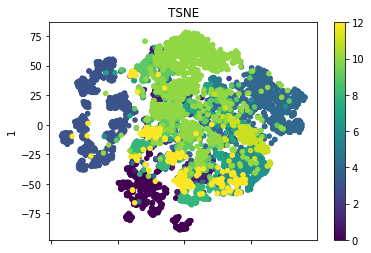

In [7]:
visualize_model_tsne("2020_03_01--05_06_22_no_cls_loss_full", None, False, False)

[INFO] 2020-03-03 02:38:29.887757 Loading cache of Taxonomy[ID=02691156, Name=aeroplane, Partition=test]
[INFO] 2020-03-03 02:38:29.905241 Loading cache of Taxonomy[ID=02828884, Name=bench, Partition=test]
[INFO] 2020-03-03 02:38:29.920830 Loading cache of Taxonomy[ID=02933112, Name=cabinet, Partition=test]
[INFO] 2020-03-03 02:38:29.936553 Loading cache of Taxonomy[ID=02958343, Name=car, Partition=test]
[INFO] 2020-03-03 02:38:29.968634 Loading cache of Taxonomy[ID=03001627, Name=chair, Partition=test]
[INFO] 2020-03-03 02:38:30.028695 Loading cache of Taxonomy[ID=03211117, Name=display, Partition=test]
[INFO] 2020-03-03 02:38:30.042849 Loading cache of Taxonomy[ID=03636649, Name=lamp, Partition=test]
[INFO] 2020-03-03 02:38:30.053264 Loading cache of Taxonomy[ID=03691459, Name=speaker, Partition=test]
[INFO] 2020-03-03 02:38:30.060677 Loading cache of Taxonomy[ID=04090263, Name=rifle, Partition=test]
[INFO] 2020-03-03 02:38:30.083466 Loading cache of Taxonomy[ID=04256520, Name=sofa, 

[INFO] 2020-03-03 02:38:36.640182 Test[38/8770] Taxonomy = 02691156 Sample = d583d6f23c590f3ec672ad25c77a396 EDLoss = 0.2329 RLoss = 0.2329 IoU = ['0.6087', '0.6526', '0.6623', '0.6471'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:36.696001 Test[39/8770] Taxonomy = 02691156 Sample = a153353168cd47869a6e43b878d5b335 EDLoss = 0.1034 RLoss = 0.1034 IoU = ['0.6474', '0.6803', '0.7199', '0.7640'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:36.785340 Test[40/8770] Taxonomy = 02691156 Sample = 67636e7d15d082089412a62cd6b1bf5 EDLoss = 0.2167 RLoss = 0.2167 IoU = ['0.3840', '0.4007', '0.4098', '0.4141'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:36.873529 Test[41/8770] Taxonomy = 02691156 Sample = 6b6cb0c71731aacc277d303e3a640f98 EDLoss = 0.8218 RLoss = 0.8218 IoU = ['0.3558', '0.3400', '0.3234', '0.2886'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:36.899901 Test[42/8770] Taxonomy = 02691156 Sample = 56ace4b209c9ee823bb911cbca3906a3 EDLoss = 0.5307 RLoss = 0.5307 IoU = ['0.5243', '0.5224', '0.4975', '0.4547'], C

[INFO] 2020-03-03 02:38:38.744260 Test[79/8770] Taxonomy = 02691156 Sample = 9a84ed39f9a2a3c0b3f2b01de37c0b29 EDLoss = 0.1616 RLoss = 0.1616 IoU = ['0.4015', '0.4494', '0.4812', '0.4541'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:38.820883 Test[80/8770] Taxonomy = 02691156 Sample = 4377ea17eb17fa79216b327569dd806e EDLoss = 0.2173 RLoss = 0.2173 IoU = ['0.5786', '0.6107', '0.6262', '0.6355'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:38.843723 Test[81/8770] Taxonomy = 02691156 Sample = d3d788c1fb35227619ba010ddb4974fe EDLoss = 0.1003 RLoss = 0.1003 IoU = ['0.6847', '0.7285', '0.7596', '0.7731'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:38.877178 Test[82/8770] Taxonomy = 02691156 Sample = f12eefbbefabe566ca8607f540cc62ba EDLoss = 0.1128 RLoss = 0.1128 IoU = ['0.7592', '0.7970', '0.8285', '0.8232'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:38.961946 Test[83/8770] Taxonomy = 02691156 Sample = e2275ee8d6b175f2f446f92b52bbd82a EDLoss = 0.0519 RLoss = 0.0519 IoU = ['0.8789', '0.9237', '0.9441', '0.9370'],

[INFO] 2020-03-03 02:38:40.782002 Test[120/8770] Taxonomy = 02691156 Sample = 32b6448c0864812729348d14ca881f7d EDLoss = 0.3476 RLoss = 0.3476 IoU = ['0.4492', '0.3870', '0.3437', '0.3346'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:40.806583 Test[121/8770] Taxonomy = 02691156 Sample = f50eba69a3be1a1e536cfc00d8c31ac5 EDLoss = 0.4812 RLoss = 0.4812 IoU = ['0.3095', '0.2895', '0.2804', '0.2625'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:40.830820 Test[122/8770] Taxonomy = 02691156 Sample = 37608404f9e224d4fd180252c91ed0f3 EDLoss = 0.2147 RLoss = 0.2147 IoU = ['0.6119', '0.6226', '0.5832', '0.5591'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:40.882054 Test[123/8770] Taxonomy = 02691156 Sample = 24968851e483feb237678474be485ca EDLoss = 0.0461 RLoss = 0.0461 IoU = ['0.9192', '0.9655', '0.9691', '0.9688'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:40.906531 Test[124/8770] Taxonomy = 02691156 Sample = 750000e25d4078f64e61a0c2eaaabe87 EDLoss = 0.0486 RLoss = 0.0486 IoU = ['0.8616', '0.9103', '0.9294', '0.927

[INFO] 2020-03-03 02:38:43.551613 Test[165/8770] Taxonomy = 02691156 Sample = 3a6d6534045b1895e8ed194c80e0b1ef EDLoss = 0.2029 RLoss = 0.2029 IoU = ['0.5273', '0.5429', '0.5386', '0.5260'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:43.575246 Test[166/8770] Taxonomy = 02691156 Sample = b34526d94a00ab55f5a25dd70eb863e0 EDLoss = 0.5934 RLoss = 0.5934 IoU = ['0.3759', '0.3520', '0.3321', '0.3230'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:43.637258 Test[167/8770] Taxonomy = 02691156 Sample = 2c9e063352a538a4af7dd1bfd65143a9 EDLoss = 0.0765 RLoss = 0.0765 IoU = ['0.7880', '0.8099', '0.8194', '0.8077'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:43.666078 Test[168/8770] Taxonomy = 02691156 Sample = b008491b09894384451efd5041dc713 EDLoss = 0.2192 RLoss = 0.2192 IoU = ['0.4351', '0.4778', '0.4741', '0.4594'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:43.690414 Test[169/8770] Taxonomy = 02691156 Sample = ace4fe6e9c97150a35fc197bbabcd5bd EDLoss = 0.1354 RLoss = 0.1354 IoU = ['0.7088', '0.7357', '0.7506', '0.763

[INFO] 2020-03-03 02:38:45.861669 Test[206/8770] Taxonomy = 02691156 Sample = e74b8862468d887c6d9b5a419d9131 EDLoss = 0.1332 RLoss = 0.1332 IoU = ['0.5683', '0.5984', '0.6143', '0.6114'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:45.962668 Test[207/8770] Taxonomy = 02691156 Sample = c54ca35ef1df558850ea677bbfebf3fb EDLoss = 0.2697 RLoss = 0.2697 IoU = ['0.4184', '0.4545', '0.4278', '0.3957'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:46.005346 Test[208/8770] Taxonomy = 02691156 Sample = e218bb755f35da1bb4cdad9a5bf52dd5 EDLoss = 0.1321 RLoss = 0.1321 IoU = ['0.7435', '0.7885', '0.7813', '0.7568'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:46.031059 Test[209/8770] Taxonomy = 02691156 Sample = b4dbf6f6b0cc8ec5ce19d55bc5e6a406 EDLoss = 0.1021 RLoss = 0.1021 IoU = ['0.7779', '0.8093', '0.8272', '0.8318'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:46.081389 Test[210/8770] Taxonomy = 02691156 Sample = 31b75f20c64b03ff6b7bd17e458d0dcb EDLoss = 0.1010 RLoss = 0.1010 IoU = ['0.6844', '0.7052', '0.7203', '0.7154

[INFO] 2020-03-03 02:38:48.314875 Test[250/8770] Taxonomy = 02691156 Sample = 820c903c55d7a1908f0d19519a0ef908 EDLoss = 0.2058 RLoss = 0.2058 IoU = ['0.6057', '0.6278', '0.6133', '0.6108'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:48.392844 Test[251/8770] Taxonomy = 02691156 Sample = 194098fb0aefc4a0666bd6da67d3abc2 EDLoss = 0.4140 RLoss = 0.4140 IoU = ['0.2576', '0.2775', '0.2873', '0.2980'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:48.454244 Test[252/8770] Taxonomy = 02691156 Sample = 9441549e323552f2f001dddaf44c449b EDLoss = 0.1739 RLoss = 0.1739 IoU = ['0.3840', '0.4292', '0.4694', '0.5000'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:48.476790 Test[253/8770] Taxonomy = 02691156 Sample = f96426f2392abb1d8d58389384d9812e EDLoss = 0.2297 RLoss = 0.2297 IoU = ['0.6511', '0.7180', '0.7265', '0.6873'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:48.498488 Test[254/8770] Taxonomy = 02691156 Sample = 14cd2f1de7f68bf3ab550998f901c8e1 EDLoss = 0.3478 RLoss = 0.3478 IoU = ['0.3361', '0.2460', '0.0938', '0.02

[INFO] 2020-03-03 02:38:50.094180 Test[291/8770] Taxonomy = 02691156 Sample = fad346b02d91348bbbf3143b1cb6076a EDLoss = 0.0382 RLoss = 0.0382 IoU = ['0.7983', '0.8688', '0.9167', '0.9490'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:50.131329 Test[292/8770] Taxonomy = 02691156 Sample = 3a5aa99b9e9e37a6bbf3143b1cb6076a EDLoss = 0.0825 RLoss = 0.0825 IoU = ['0.7434', '0.7741', '0.7911', '0.7996'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:50.198686 Test[293/8770] Taxonomy = 02691156 Sample = f57caba2eed21f2998459325335edae9 EDLoss = 0.1954 RLoss = 0.1954 IoU = ['0.5422', '0.5402', '0.5379', '0.5407'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:50.279555 Test[294/8770] Taxonomy = 02691156 Sample = f21a375ca5fd26994fb6540b6bb872e9 EDLoss = 0.3149 RLoss = 0.3149 IoU = ['0.1978', '0.1821', '0.1630', '0.1396'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:50.293855 Test[295/8770] Taxonomy = 02691156 Sample = e501a0327ab3731d0f859db45b95a2d EDLoss = 0.1435 RLoss = 0.1435 IoU = ['0.7697', '0.7754', '0.7591', '0.751

[INFO] 2020-03-03 02:38:51.825108 Test[334/8770] Taxonomy = 02691156 Sample = 65468fa9ca2f3e9e642566c028df23cd EDLoss = 0.4337 RLoss = 0.4337 IoU = ['0.5445', '0.5727', '0.5848', '0.5828'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:51.844596 Test[335/8770] Taxonomy = 02691156 Sample = f58b4ed02fc2fd1d4e7648015fd29a1c EDLoss = 0.1668 RLoss = 0.1668 IoU = ['0.4311', '0.4333', '0.4447', '0.4565'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:51.888057 Test[336/8770] Taxonomy = 02691156 Sample = bbd1b96d77b8dc08b96212c8f6cd06e EDLoss = 0.0514 RLoss = 0.0514 IoU = ['0.8774', '0.9142', '0.9350', '0.9290'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:51.928995 Test[337/8770] Taxonomy = 02691156 Sample = a611fb88b28c3f2ec231d70e1e0cc567 EDLoss = 0.0884 RLoss = 0.0884 IoU = ['0.5821', '0.6542', '0.6324', '0.6295'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:51.950365 Test[338/8770] Taxonomy = 02691156 Sample = 3cbc83ba49edeccebc0909d98a1ff2b4 EDLoss = 0.1322 RLoss = 0.1322 IoU = ['0.7190', '0.7383', '0.7196', '0.693

[INFO] 2020-03-03 02:38:53.420022 Test[378/8770] Taxonomy = 02691156 Sample = 22d0100fa46f20eb8699933784576e73 EDLoss = 0.1704 RLoss = 0.1704 IoU = ['0.6423', '0.6759', '0.6877', '0.7141'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:53.436243 Test[379/8770] Taxonomy = 02691156 Sample = 6cf2f9112ffae7c3be54b70092ca256 EDLoss = 0.4252 RLoss = 0.4252 IoU = ['0.4236', '0.4208', '0.3996', '0.3535'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:53.456854 Test[380/8770] Taxonomy = 02691156 Sample = ff28d340bf0b5d9387b2a887422ab97 EDLoss = 0.1863 RLoss = 0.1863 IoU = ['0.6277', '0.6652', '0.6571', '0.6650'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:53.484880 Test[381/8770] Taxonomy = 02691156 Sample = 393cfa7e090b972dce2cec85ea6ae00d EDLoss = 0.4361 RLoss = 0.4361 IoU = ['0.5077', '0.5384', '0.5114', '0.4494'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:53.594441 Test[382/8770] Taxonomy = 02691156 Sample = e15f4c98857b67e41e287f9f679ab620 EDLoss = 0.4475 RLoss = 0.4475 IoU = ['0.3376', '0.3547', '0.3715', '0.3547

[INFO] 2020-03-03 02:38:55.493142 Test[420/8770] Taxonomy = 02691156 Sample = b522108c4c08430a71d03b466c72ce41 EDLoss = 0.1240 RLoss = 0.1240 IoU = ['0.7939', '0.7942', '0.7949', '0.7865'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:55.550436 Test[421/8770] Taxonomy = 02691156 Sample = e66692f2ec8ea898874f1daffc45b57c EDLoss = 0.0616 RLoss = 0.0616 IoU = ['0.8481', '0.8803', '0.8941', '0.8929'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:55.602725 Test[422/8770] Taxonomy = 02691156 Sample = 898b4899114d9bb890baeef8ba5b93e5 EDLoss = 0.0425 RLoss = 0.0425 IoU = ['0.8525', '0.9104', '0.9305', '0.9371'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:55.691053 Test[423/8770] Taxonomy = 02691156 Sample = e30e25fe047ce1ea10b08ceced9a0113 EDLoss = 0.2681 RLoss = 0.2681 IoU = ['0.4116', '0.4699', '0.4893', '0.5080'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:55.767902 Test[424/8770] Taxonomy = 02691156 Sample = 7b3bd63ff099f5b062b600da24e0965 EDLoss = 0.1622 RLoss = 0.1622 IoU = ['0.5245', '0.5903', '0.6190', '0.654

[INFO] 2020-03-03 02:38:57.916977 Test[461/8770] Taxonomy = 02691156 Sample = 31d1cf39b807c856efe0d4e1eba2e3af EDLoss = 0.2021 RLoss = 0.2021 IoU = ['0.5619', '0.5921', '0.5742', '0.5403'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:58.065846 Test[462/8770] Taxonomy = 02691156 Sample = c85e3f6c572581de7d3b11085e75c7ad EDLoss = 0.4876 RLoss = 0.4876 IoU = ['0.3066', '0.3128', '0.2757', '0.2441'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:58.082098 Test[463/8770] Taxonomy = 02691156 Sample = 3a92789dfc5186dcfdbac8c3ccfc63c EDLoss = 0.2691 RLoss = 0.2691 IoU = ['0.4952', '0.5094', '0.5287', '0.5306'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:58.107154 Test[464/8770] Taxonomy = 02691156 Sample = b0f3f0f754c0129486faacd7b0ac262e EDLoss = 0.2510 RLoss = 0.2510 IoU = ['0.5975', '0.6285', '0.6405', '0.6351'], ClsAcc=0.0000
[INFO] 2020-03-03 02:38:58.190950 Test[465/8770] Taxonomy = 02691156 Sample = bdfa5ff6aefd3fb8a57854d2ce086d65 EDLoss = 0.3669 RLoss = 0.3669 IoU = ['0.4923', '0.4758', '0.4437', '0.408

[INFO] 2020-03-03 02:39:00.426050 Test[505/8770] Taxonomy = 02691156 Sample = e380f6fa720e1c15560a4691498bd2fc EDLoss = 0.1225 RLoss = 0.1225 IoU = ['0.7903', '0.7817', '0.7755', '0.7493'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:00.458790 Test[506/8770] Taxonomy = 02691156 Sample = cf96229978efbb488b96ae1a0a8b84ec EDLoss = 0.0746 RLoss = 0.0746 IoU = ['0.7980', '0.8247', '0.8455', '0.8588'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:00.541168 Test[507/8770] Taxonomy = 02691156 Sample = 8d54e30dea0e2508bbf3143b1cb6076a EDLoss = 0.0800 RLoss = 0.0800 IoU = ['0.7840', '0.8075', '0.8076', '0.8045'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:00.556950 Test[508/8770] Taxonomy = 02691156 Sample = 60f99c0946c095e833b2a295000cb6fe EDLoss = 0.6477 RLoss = 0.6477 IoU = ['0.3913', '0.3847', '0.3681', '0.3421'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:00.591081 Test[509/8770] Taxonomy = 02691156 Sample = edb916c2cdc2d3b9ce2cec85ea6ae00d EDLoss = 0.3296 RLoss = 0.3296 IoU = ['0.4497', '0.4649', '0.4533', '0.44

[INFO] 2020-03-03 02:39:02.598646 Test[547/8770] Taxonomy = 02691156 Sample = e5610bbacaf098508b96ae1a0a8b84ec EDLoss = 0.0575 RLoss = 0.0575 IoU = ['0.8359', '0.8818', '0.8919', '0.8935'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:02.644425 Test[548/8770] Taxonomy = 02691156 Sample = 7eef160cf5e4188a5a8c25d312cc3c6a EDLoss = 1.1397 RLoss = 1.1397 IoU = ['0.1095', '0.1023', '0.0821', '0.0498'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:02.660011 Test[549/8770] Taxonomy = 02691156 Sample = 718b6f112f70146c62b600da24e0965 EDLoss = 0.1203 RLoss = 0.1203 IoU = ['0.7215', '0.7608', '0.7756', '0.7812'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:02.796783 Test[550/8770] Taxonomy = 02691156 Sample = ebb5a048015c13cd35fc197bbabcd5bd EDLoss = 0.1246 RLoss = 0.1246 IoU = ['0.8178', '0.8044', '0.7843', '0.7671'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:02.873376 Test[551/8770] Taxonomy = 02691156 Sample = e02485f093835f45c1b64d86df61366a EDLoss = 0.1443 RLoss = 0.1443 IoU = ['0.5278', '0.5854', '0.6369', '0.646

[INFO] 2020-03-03 02:39:05.484824 Test[591/8770] Taxonomy = 02691156 Sample = 642b46912529c6e57f1f82f6fc8747b8 EDLoss = 0.1031 RLoss = 0.1031 IoU = ['0.7948', '0.8251', '0.8384', '0.8380'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:05.499511 Test[592/8770] Taxonomy = 02691156 Sample = 8700f6db654c5d2aca52e8e28cb200ce EDLoss = 0.1351 RLoss = 0.1351 IoU = ['0.6119', '0.7131', '0.7273', '0.6925'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:05.527403 Test[593/8770] Taxonomy = 02691156 Sample = a4ca564574e55f1a66cf1b4a8fc3914e EDLoss = 0.0818 RLoss = 0.0818 IoU = ['0.7642', '0.8009', '0.8204', '0.8226'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:05.593183 Test[594/8770] Taxonomy = 02691156 Sample = 72c28618e3273795f9066cd40fcf015 EDLoss = 0.4221 RLoss = 0.4221 IoU = ['0.4189', '0.4344', '0.3985', '0.3516'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:05.715549 Test[595/8770] Taxonomy = 02691156 Sample = c9a6dcf87d1f15bca8607f540cc62ba EDLoss = 0.0552 RLoss = 0.0552 IoU = ['0.8585', '0.9209', '0.9325', '0.9198

[INFO] 2020-03-03 02:39:07.474321 Test[635/8770] Taxonomy = 02691156 Sample = f40fe7461dc4e3396b7bd17e458d0dcb EDLoss = 0.0771 RLoss = 0.0771 IoU = ['0.7769', '0.8137', '0.8308', '0.8207'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:07.507665 Test[636/8770] Taxonomy = 02691156 Sample = a591b49406ab0d2abbf3143b1cb6076a EDLoss = 0.0937 RLoss = 0.0937 IoU = ['0.7594', '0.7842', '0.7970', '0.8112'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:07.526259 Test[637/8770] Taxonomy = 02691156 Sample = 7addd02b1c255edcc863ab010b80d9ed EDLoss = 0.0718 RLoss = 0.0718 IoU = ['0.8545', '0.8955', '0.9088', '0.8984'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:07.571394 Test[638/8770] Taxonomy = 02691156 Sample = d2c7b95823938833339bd6b570381585 EDLoss = 0.3565 RLoss = 0.3565 IoU = ['0.5422', '0.5259', '0.5145', '0.4960'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:07.606784 Test[639/8770] Taxonomy = 02691156 Sample = 552871abb864d06d35fc197bbabcd5bd EDLoss = 0.0785 RLoss = 0.0785 IoU = ['0.7961', '0.8247', '0.8248', '0.81

[INFO] 2020-03-03 02:39:09.579176 Test[678/8770] Taxonomy = 02691156 Sample = a8471560d4dd5a31ebc34aaab30ca460 EDLoss = 0.0627 RLoss = 0.0627 IoU = ['0.8223', '0.8558', '0.8731', '0.8781'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:09.647213 Test[679/8770] Taxonomy = 02691156 Sample = 2f576be042897eae38f859e2bc79169c EDLoss = 0.3901 RLoss = 0.3901 IoU = ['0.5562', '0.5296', '0.4677', '0.4006'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:09.678318 Test[680/8770] Taxonomy = 02691156 Sample = 856a4d86ea105d97be13ce34aa7c0c1c EDLoss = 0.0691 RLoss = 0.0691 IoU = ['0.8440', '0.8634', '0.8830', '0.8693'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:09.714649 Test[681/8770] Taxonomy = 02691156 Sample = a18f4e4c291761fa7cebb3dd777c66be EDLoss = 0.4133 RLoss = 0.4133 IoU = ['0.3722', '0.3882', '0.3746', '0.3803'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:09.753235 Test[682/8770] Taxonomy = 02691156 Sample = bdeb0a21cf1d602962347b4731688b0f EDLoss = 0.0550 RLoss = 0.0550 IoU = ['0.8692', '0.9156', '0.9342', '0.93

[INFO] 2020-03-03 02:39:11.061418 Test[720/8770] Taxonomy = 02691156 Sample = e0df97dfc068e3664bf88973bd147a26 EDLoss = 0.2223 RLoss = 0.2223 IoU = ['0.6073', '0.6222', '0.6233', '0.6168'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:11.078057 Test[721/8770] Taxonomy = 02691156 Sample = ed738ba28cd73714bb0f4bdf8821663a EDLoss = 0.3121 RLoss = 0.3121 IoU = ['0.4403', '0.4478', '0.4217', '0.3700'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:11.092566 Test[722/8770] Taxonomy = 02691156 Sample = 3039adb37c192644f8c6d04d97f8cf7 EDLoss = 0.3290 RLoss = 0.3290 IoU = ['0.3764', '0.3787', '0.3969', '0.4346'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:11.117204 Test[723/8770] Taxonomy = 02691156 Sample = 42b464affaa4b3f985e0a2007a11e92f EDLoss = 0.1408 RLoss = 0.1408 IoU = ['0.6691', '0.7178', '0.7479', '0.7670'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:11.178877 Test[724/8770] Taxonomy = 02691156 Sample = f8d8b590a0dcd399718ac2a6ddb54499 EDLoss = 0.2894 RLoss = 0.2894 IoU = ['0.3085', '0.2701', '0.1872', '0.110

[INFO] 2020-03-03 02:39:13.271512 Test[764/8770] Taxonomy = 02691156 Sample = b837c3b8eec02a4967c54439d6177032 EDLoss = 0.1233 RLoss = 0.1233 IoU = ['0.7268', '0.7327', '0.7099', '0.7091'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:13.333708 Test[765/8770] Taxonomy = 02691156 Sample = caf92880cf63690188a7f6dddc29eab EDLoss = 0.4197 RLoss = 0.4197 IoU = ['0.5176', '0.5279', '0.5254', '0.5244'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:13.380596 Test[766/8770] Taxonomy = 02691156 Sample = 1021a0914a7207aff927ed529ad90a11 EDLoss = 0.2025 RLoss = 0.2025 IoU = ['0.4956', '0.5302', '0.5420', '0.5428'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:13.411878 Test[767/8770] Taxonomy = 02691156 Sample = bc48b77452fd108adf8f666ba0e601ac EDLoss = 0.0398 RLoss = 0.0398 IoU = ['0.9085', '0.9390', '0.9611', '0.9660'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:13.573715 Test[768/8770] Taxonomy = 02691156 Sample = 12d15ac778df6e4562b600da24e0965 EDLoss = 0.1004 RLoss = 0.1004 IoU = ['0.8030', '0.8318', '0.8563', '0.8443

[INFO] 2020-03-03 02:39:15.735823 Test[806/8770] Taxonomy = 02691156 Sample = 1825c91c5f2da4bab12962b43f188cbb EDLoss = 0.0555 RLoss = 0.0555 IoU = ['0.8140', '0.8603', '0.8961', '0.9223'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:15.751727 Test[807/8770] Taxonomy = 02691156 Sample = d615a8217b70af06bc0909d98a1ff2b4 EDLoss = 0.1297 RLoss = 0.1297 IoU = ['0.5841', '0.6055', '0.6163', '0.5639'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:15.773046 Test[808/8770] Taxonomy = 02691156 Sample = 8f4e31ee9912f54e77fd7318510b8627 EDLoss = 0.0486 RLoss = 0.0486 IoU = ['0.8940', '0.9365', '0.9703', '0.9660'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:15.859577 Test[809/8770] Taxonomy = 02691156 Sample = e33fbcf5b616d6f9f44f89e40af48618 EDLoss = 0.1022 RLoss = 0.1022 IoU = ['0.7525', '0.7825', '0.7902', '0.8003'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:15.939479 Test[810/8770] Taxonomy = 02691156 Sample = f1a4a370f9e50890686c25eb09ee7de5 EDLoss = 0.5424 RLoss = 0.5424 IoU = ['0.3335', '0.3584', '0.3830', '0.40

[INFO] 2020-03-03 02:39:17.049753 Test[848/8770] Taxonomy = 02828884 Sample = 46a1e2560a1e96f3897fc31a9c059e16 EDLoss = 0.3694 RLoss = 0.3694 IoU = ['0.7711', '0.7899', '0.8216', '0.8647'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:17.065727 Test[849/8770] Taxonomy = 02828884 Sample = 14a73dd6b5d7ef35feea12256ad59f11 EDLoss = 1.6027 RLoss = 1.6027 IoU = ['0.0647', '0.0546', '0.0438', '0.0309'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:17.079336 Test[850/8770] Taxonomy = 02828884 Sample = b20a0209355ef6ddfe6460d8d9bd16c6 EDLoss = 0.6155 RLoss = 0.6155 IoU = ['0.5056', '0.5528', '0.5847', '0.6289'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:17.115899 Test[851/8770] Taxonomy = 02828884 Sample = a0cadebde61910df98e8242d4a63e1e5 EDLoss = 0.1425 RLoss = 0.1425 IoU = ['0.6652', '0.7139', '0.7394', '0.7319'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:17.202609 Test[852/8770] Taxonomy = 02828884 Sample = 4ba13b996d6f1d3b286ea987ad5ffa18 EDLoss = 0.0559 RLoss = 0.0559 IoU = ['0.8690', '0.8982', '0.9348', '0.93

[INFO] 2020-03-03 02:39:18.925722 Test[890/8770] Taxonomy = 02828884 Sample = f13e44c93bca57d092f4c88fd91c6b1b EDLoss = 0.3765 RLoss = 0.3765 IoU = ['0.6938', '0.7175', '0.7129', '0.6943'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:18.942113 Test[891/8770] Taxonomy = 02828884 Sample = ba6348031c6f0a795213cec267286d18 EDLoss = 0.2492 RLoss = 0.2492 IoU = ['0.6171', '0.5977', '0.5959', '0.6120'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:18.992447 Test[892/8770] Taxonomy = 02828884 Sample = a11db718438648a0ad5067eac75a07f7 EDLoss = 0.3938 RLoss = 0.3938 IoU = ['0.5682', '0.5805', '0.5849', '0.5893'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:19.006865 Test[893/8770] Taxonomy = 02828884 Sample = a6947bdac4ebc97517b431cae0dd70ed EDLoss = 0.1582 RLoss = 0.1582 IoU = ['0.8296', '0.8391', '0.8274', '0.7546'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:19.028775 Test[894/8770] Taxonomy = 02828884 Sample = b9b708af97a57de481f502b2c7b6ba78 EDLoss = 0.4759 RLoss = 0.4759 IoU = ['0.5006', '0.4952', '0.4554', '0.43

[INFO] 2020-03-03 02:39:20.847008 Test[931/8770] Taxonomy = 02828884 Sample = 7c33a6f55768b7acb97ad864945165a1 EDLoss = 0.4608 RLoss = 0.4608 IoU = ['0.6734', '0.6900', '0.6994', '0.6933'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:20.884342 Test[932/8770] Taxonomy = 02828884 Sample = d8dbfb0f58a2df0bf1eac5a8cd36b62b EDLoss = 0.9900 RLoss = 0.9900 IoU = ['0.5815', '0.5472', '0.5072', '0.4642'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:20.899094 Test[933/8770] Taxonomy = 02828884 Sample = 4504e203b67dd8e473f10e6caaeca56 EDLoss = 0.7163 RLoss = 0.7163 IoU = ['0.5640', '0.5949', '0.6221', '0.6335'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:20.923437 Test[934/8770] Taxonomy = 02828884 Sample = 456e373768179bf3f155d75bbf62b80 EDLoss = 0.1890 RLoss = 0.1890 IoU = ['0.7054', '0.7233', '0.7114', '0.6757'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:20.951437 Test[935/8770] Taxonomy = 02828884 Sample = 671cade486e88b3880d14ef4d993c2fa EDLoss = 0.1688 RLoss = 0.1688 IoU = ['0.5877', '0.6312', '0.6499', '0.6588

[INFO] 2020-03-03 02:39:22.642435 Test[977/8770] Taxonomy = 02828884 Sample = b2acbc0822c163fb491436340b3b4d18 EDLoss = 0.4717 RLoss = 0.4717 IoU = ['0.6164', '0.6132', '0.5802', '0.5494'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:22.716854 Test[978/8770] Taxonomy = 02828884 Sample = 23325f47d2a812351165bc0a3b02b27f EDLoss = 0.2887 RLoss = 0.2887 IoU = ['0.6671', '0.6867', '0.6905', '0.6726'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:22.742761 Test[979/8770] Taxonomy = 02828884 Sample = 23c874e54f1f9f152d07d128adae16ff EDLoss = 0.6065 RLoss = 0.6065 IoU = ['0.5626', '0.5946', '0.6193', '0.6086'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:22.806346 Test[980/8770] Taxonomy = 02828884 Sample = c83b3192c338527a2056b4bd5d870b47 EDLoss = 0.1722 RLoss = 0.1722 IoU = ['0.7935', '0.8571', '0.8889', '0.8406'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:22.822691 Test[981/8770] Taxonomy = 02828884 Sample = ee50d76492226837926fe0a4cdbf03 EDLoss = 0.2040 RLoss = 0.2040 IoU = ['0.4533', '0.4952', '0.5202', '0.5220

[INFO] 2020-03-03 02:39:24.511918 Test[1019/8770] Taxonomy = 02828884 Sample = 605b2c687b73695c8da90b986150cc3b EDLoss = 0.4594 RLoss = 0.4594 IoU = ['0.5514', '0.5624', '0.5813', '0.5885'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:24.531793 Test[1020/8770] Taxonomy = 02828884 Sample = d46ca28fe271ef7bc5a208307819a3a1 EDLoss = 0.4084 RLoss = 0.4084 IoU = ['0.7037', '0.7400', '0.7621', '0.7491'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:24.559916 Test[1021/8770] Taxonomy = 02828884 Sample = 77ed241c90b88a189f197237213064cd EDLoss = 0.2816 RLoss = 0.2816 IoU = ['0.5912', '0.5705', '0.4832', '0.4336'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:24.578041 Test[1022/8770] Taxonomy = 02828884 Sample = 6ef84eb436bf63de8e7865f75f64bf68 EDLoss = 0.4950 RLoss = 0.4950 IoU = ['0.5924', '0.6178', '0.6444', '0.6321'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:24.641325 Test[1023/8770] Taxonomy = 02828884 Sample = e4b80a7e381c6ef0f4215050a7660e65 EDLoss = 0.2135 RLoss = 0.2135 IoU = ['0.4888', '0.4893', '0.4922', 

[INFO] 2020-03-03 02:39:26.602139 Test[1064/8770] Taxonomy = 02828884 Sample = 27fd962813feeb26be25fbd47cafc694 EDLoss = 0.4684 RLoss = 0.4684 IoU = ['0.7301', '0.7772', '0.7631', '0.7258'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:26.619593 Test[1065/8770] Taxonomy = 02828884 Sample = ec7c3cb273f857ca785c8f27b37ec031 EDLoss = 0.5274 RLoss = 0.5274 IoU = ['0.4837', '0.4485', '0.4032', '0.3963'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:26.723648 Test[1066/8770] Taxonomy = 02828884 Sample = faa74f8980fadf504777535b9098089a EDLoss = 0.8291 RLoss = 0.8291 IoU = ['0.6788', '0.6490', '0.5308', '0.3765'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:26.789387 Test[1067/8770] Taxonomy = 02828884 Sample = 1480fa8916f31b6d3c77a85180cab6b6 EDLoss = 0.1653 RLoss = 0.1653 IoU = ['0.6395', '0.6385', '0.6165', '0.6135'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:26.806224 Test[1068/8770] Taxonomy = 02828884 Sample = 9159af619d9125ecf4fb4dee5181bee EDLoss = 0.2923 RLoss = 0.2923 IoU = ['0.6725', '0.7195', '0.7270', '

[INFO] 2020-03-03 02:39:28.359920 Test[1107/8770] Taxonomy = 02828884 Sample = 450fd49e69534ee6d5032aaea433efa4 EDLoss = 0.6722 RLoss = 0.6722 IoU = ['0.1752', '0.1679', '0.1603', '0.1180'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:28.423371 Test[1108/8770] Taxonomy = 02828884 Sample = cf24c6b52b12c56ced8d4f003c2a833 EDLoss = 0.3263 RLoss = 0.3263 IoU = ['0.5405', '0.5878', '0.6178', '0.6373'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:28.451156 Test[1109/8770] Taxonomy = 02828884 Sample = bd39e9a5489f89c8d6d3866b78fd4902 EDLoss = 0.7185 RLoss = 0.7185 IoU = ['0.5509', '0.5840', '0.5960', '0.5827'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:28.514529 Test[1110/8770] Taxonomy = 02828884 Sample = 89e2eaeb437cd42f85e40cb3507a0145 EDLoss = 0.2771 RLoss = 0.2771 IoU = ['0.5089', '0.5256', '0.5206', '0.4515'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:28.534338 Test[1111/8770] Taxonomy = 02828884 Sample = 4273dca1b0184024b722a94c1cd50b0 EDLoss = 0.4832 RLoss = 0.4832 IoU = ['0.6216', '0.6219', '0.6126', '0

[INFO] 2020-03-03 02:39:30.001401 Test[1150/8770] Taxonomy = 02828884 Sample = 44d2f4786d18667a86d0ad6addf83b07 EDLoss = 1.2096 RLoss = 1.2096 IoU = ['0.3335', '0.3093', '0.2884', '0.2590'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:30.016399 Test[1151/8770] Taxonomy = 02828884 Sample = c293f2fbc66af3dbf4fb4dee5181bee EDLoss = 1.1892 RLoss = 1.1892 IoU = ['0.3419', '0.3483', '0.3333', '0.3054'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:30.080028 Test[1152/8770] Taxonomy = 02828884 Sample = aec473af77a77008cdb14b1e0ff2c14e EDLoss = 0.5297 RLoss = 0.5297 IoU = ['0.3576', '0.3442', '0.3310', '0.2904'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:30.135950 Test[1153/8770] Taxonomy = 02828884 Sample = ba363a93cf76f9a12056b4bd5d870b47 EDLoss = 0.1689 RLoss = 0.1689 IoU = ['0.5949', '0.6952', '0.7451', '0.7308'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:30.199332 Test[1154/8770] Taxonomy = 02828884 Sample = c273ce2890d74ae18cca710901c2e97b EDLoss = 0.4650 RLoss = 0.4650 IoU = ['0.6455', '0.6097', '0.5481', '

[INFO] 2020-03-03 02:39:31.987279 Test[1191/8770] Taxonomy = 02933112 Sample = 83412e29d5978b101f6dfedaba98d5f9 EDLoss = 0.5824 RLoss = 0.5824 IoU = ['0.8193', '0.7747', '0.7423', '0.7519'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:32.004380 Test[1192/8770] Taxonomy = 02933112 Sample = a58e77d8a9b37e0280b9485fe431cb14 EDLoss = 2.3281 RLoss = 2.3281 IoU = ['0.6366', '0.6632', '0.6850', '0.6904'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:32.018844 Test[1193/8770] Taxonomy = 02933112 Sample = 77ead277434621b5343087e1efdee691 EDLoss = 0.8417 RLoss = 0.8417 IoU = ['0.9347', '0.9301', '0.9165', '0.8777'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:32.045284 Test[1194/8770] Taxonomy = 02933112 Sample = 1ee6393153a3146ebc19762eaa7ba40f EDLoss = 0.1735 RLoss = 0.1735 IoU = ['0.9411', '0.9788', '0.9931', '0.9888'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:32.064334 Test[1195/8770] Taxonomy = 02933112 Sample = adece72df027acd6658fc1ad354006c7 EDLoss = 1.3595 RLoss = 1.3595 IoU = ['0.8407', '0.7012', '0.5551', 

[INFO] 2020-03-03 02:39:33.945828 Test[1233/8770] Taxonomy = 02933112 Sample = 282f296a666fb63dc59350d819542ec7 EDLoss = 0.6940 RLoss = 0.6940 IoU = ['0.8983', '0.9211', '0.9365', '0.9345'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:33.962551 Test[1234/8770] Taxonomy = 02933112 Sample = 6f113f2baf10463635836c728d324152 EDLoss = 1.1774 RLoss = 1.1774 IoU = ['0.8884', '0.8900', '0.8864', '0.8693'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:33.979036 Test[1235/8770] Taxonomy = 02933112 Sample = 8f30bc2f3ae12300a4669f677ccd56a9 EDLoss = 0.5176 RLoss = 0.5176 IoU = ['0.8707', '0.8648', '0.8585', '0.8611'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:34.032390 Test[1236/8770] Taxonomy = 02933112 Sample = d30f01d6e50f128d2822b5101b06e070 EDLoss = 0.2315 RLoss = 0.2315 IoU = ['0.9262', '0.9559', '0.9659', '0.9625'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:34.066605 Test[1237/8770] Taxonomy = 02933112 Sample = 7650fd61f3a162397ee0cb5488055ac EDLoss = 1.1790 RLoss = 1.1790 IoU = ['0.5529', '0.5626', '0.5675', '

[INFO] 2020-03-03 02:39:35.800840 Test[1274/8770] Taxonomy = 02933112 Sample = ca89804bd77f770c4c62bee40dcdc539 EDLoss = 0.5590 RLoss = 0.5590 IoU = ['0.5358', '0.5995', '0.6478', '0.6536'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:35.850184 Test[1275/8770] Taxonomy = 02933112 Sample = 70ef5ad531624a24cb87a43f8f346ada EDLoss = 3.0410 RLoss = 3.0410 IoU = ['0.5492', '0.5948', '0.6234', '0.6502'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:35.937769 Test[1276/8770] Taxonomy = 02933112 Sample = b67d58cd774ebeaea480742f4529182b EDLoss = 0.2593 RLoss = 0.2593 IoU = ['0.8944', '0.9054', '0.9086', '0.9078'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:35.954223 Test[1277/8770] Taxonomy = 02933112 Sample = a9bc0de459504729eca1c556848f5db1 EDLoss = 0.4565 RLoss = 0.4565 IoU = ['0.8873', '0.9065', '0.9144', '0.9131'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:35.972346 Test[1278/8770] Taxonomy = 02933112 Sample = 370608d5fd4f39745e7493df1bf8fac5 EDLoss = 0.8910 RLoss = 0.8910 IoU = ['0.8884', '0.8789', '0.8734', 

[INFO] 2020-03-03 02:39:37.397457 Test[1317/8770] Taxonomy = 02933112 Sample = 6c2762c2c95d7a2063b3c67777442463 EDLoss = 0.3635 RLoss = 0.3635 IoU = ['0.8830', '0.8851', '0.8774', '0.8709'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:37.451104 Test[1318/8770] Taxonomy = 02933112 Sample = c6a306867328d90fe42c2d012c73c412 EDLoss = 0.9988 RLoss = 0.9988 IoU = ['0.6682', '0.6789', '0.6647', '0.6166'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:37.467958 Test[1319/8770] Taxonomy = 02933112 Sample = 3105e7ff7fbf3e423e72cffee9fc75b0 EDLoss = 1.6932 RLoss = 1.6932 IoU = ['0.8028', '0.8376', '0.8165', '0.4971'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:37.486061 Test[1320/8770] Taxonomy = 02933112 Sample = a8a4fbca233fbadb7ef0119f8dd1f40b EDLoss = 17.2576 RLoss = 17.2576 IoU = ['0.3158', '0.3202', '0.3198', '0.3194'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:37.517465 Test[1321/8770] Taxonomy = 02933112 Sample = bb0255c8582c74c6557f50690310ce8d EDLoss = 1.1477 RLoss = 1.1477 IoU = ['0.3265', '0.3397', '0.3556'

[INFO] 2020-03-03 02:39:39.293016 Test[1359/8770] Taxonomy = 02933112 Sample = 2b80c8d68550986bc59350d819542ec7 EDLoss = 0.6583 RLoss = 0.6583 IoU = ['0.9017', '0.9209', '0.9393', '0.9387'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:39.309995 Test[1360/8770] Taxonomy = 02933112 Sample = 2993b6f0fa043f2744b0bdbb4386e313 EDLoss = 0.8400 RLoss = 0.8400 IoU = ['0.8458', '0.8674', '0.8756', '0.8829'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:39.324610 Test[1361/8770] Taxonomy = 02933112 Sample = 2f0a56c30e384642c59350d819542ec7 EDLoss = 0.1486 RLoss = 0.1486 IoU = ['0.9376', '0.9560', '0.9671', '0.9813'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:39.363205 Test[1362/8770] Taxonomy = 02933112 Sample = 45679a0d39b500533dd5cc05646564a4 EDLoss = 0.6332 RLoss = 0.6332 IoU = ['0.7238', '0.7649', '0.7979', '0.8269'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:39.473367 Test[1363/8770] Taxonomy = 02933112 Sample = 5b112266c93a711b824662341ce2b233 EDLoss = 2.7128 RLoss = 2.7128 IoU = ['0.3940', '0.3838', '0.3481', 

[INFO] 2020-03-03 02:39:41.311380 Test[1401/8770] Taxonomy = 02933112 Sample = 789ee42d2fc0c5e088c59e12e565eb6c EDLoss = 0.5560 RLoss = 0.5560 IoU = ['0.8617', '0.8821', '0.8887', '0.8611'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:41.346036 Test[1402/8770] Taxonomy = 02933112 Sample = e16c0191973a25f02d63c890dc92b5 EDLoss = 1.8076 RLoss = 1.8076 IoU = ['0.6541', '0.6594', '0.6609', '0.6549'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:41.411885 Test[1403/8770] Taxonomy = 02933112 Sample = 4dcec5b89f1e9e4915dd7d7985e749c1 EDLoss = 4.9563 RLoss = 4.9563 IoU = ['0.5538', '0.5544', '0.5510', '0.5404'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:41.445720 Test[1404/8770] Taxonomy = 02933112 Sample = 92aa3075799e275a3fe047712e43e185 EDLoss = 0.8055 RLoss = 0.8055 IoU = ['0.9559', '0.9694', '0.9739', '0.9579'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:41.569001 Test[1405/8770] Taxonomy = 02933112 Sample = b261964d7c920a4cd8a45f471fe2ac0 EDLoss = 1.6913 RLoss = 1.6913 IoU = ['0.6970', '0.6773', '0.6477', '0.

[INFO] 2020-03-03 02:39:43.004665 Test[1444/8770] Taxonomy = 02933112 Sample = 2856634c4c0551a814038d588fd1342f EDLoss = 1.2461 RLoss = 1.2461 IoU = ['0.8482', '0.8365', '0.8239', '0.8251'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:43.063072 Test[1445/8770] Taxonomy = 02933112 Sample = 695002fbea3c5e4a9a6b496c6e9f4c2 EDLoss = 2.0422 RLoss = 2.0422 IoU = ['0.4011', '0.4248', '0.4345', '0.4459'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:43.209393 Test[1446/8770] Taxonomy = 02933112 Sample = 1ceaae0aaeeeaa1e5a8eba5f6050bab EDLoss = 1.6183 RLoss = 1.6183 IoU = ['0.8973', '0.8946', '0.8928', '0.8801'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:43.225818 Test[1447/8770] Taxonomy = 02933112 Sample = 9a0d2ef1f31fee42b022c94235bc8601 EDLoss = 0.3439 RLoss = 0.3439 IoU = ['0.8470', '0.8665', '0.8894', '0.9063'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:43.631971 Test[1448/8770] Taxonomy = 02933112 Sample = 1b3d4f2291545e472dc6c96daf8fd5ea EDLoss = 0.4500 RLoss = 0.4500 IoU = ['0.8798', '0.8942', '0.8883', '0

[INFO] 2020-03-03 02:39:45.015457 Test[1484/8770] Taxonomy = 02933112 Sample = 94d10abadfa0d88bf51f77a6d7299806 EDLoss = 0.2839 RLoss = 0.2839 IoU = ['0.9715', '0.9801', '0.9769', '0.9510'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:45.099569 Test[1485/8770] Taxonomy = 02933112 Sample = 6a49166d5852d23044221bef0fa3c36b EDLoss = 2.3984 RLoss = 2.3984 IoU = ['0.7856', '0.7791', '0.7752', '0.7728'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:45.115239 Test[1486/8770] Taxonomy = 02933112 Sample = ba6c211ed08d5c1b292e33b9f44edab7 EDLoss = 0.7437 RLoss = 0.7437 IoU = ['0.8713', '0.8647', '0.8641', '0.8746'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:45.173611 Test[1487/8770] Taxonomy = 02933112 Sample = d3829c7b8afd0d2ef51f77a6d7299806 EDLoss = 0.2660 RLoss = 0.2660 IoU = ['0.8517', '0.9046', '0.9499', '0.9703'], ClsAcc=0.0000
[INFO] 2020-03-03 02:39:45.206518 Test[1488/8770] Taxonomy = 02933112 Sample = 181716a7a34f2708c59350d819542ec7 EDLoss = 0.7216 RLoss = 0.7216 IoU = ['0.9344', '0.9373', '0.9385', 

[INFO] 2020-03-03 02:39:47.379043 Test[1528/8770] Taxonomy = 02958343 Sample = 81c52d54f9719736ce27281f3b76d1f5 EDLoss = 0.1422 RLoss = 0.1422 IoU = ['0.8987', '0.9203', '0.9215', '0.9117'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:47.406293 Test[1529/8770] Taxonomy = 02958343 Sample = b40621600d6be9c81a0fd52620d411da EDLoss = 0.7253 RLoss = 0.7253 IoU = ['0.6970', '0.6985', '0.7055', '0.7134'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:47.446903 Test[1530/8770] Taxonomy = 02958343 Sample = fb09875c916c051c4d0f9a1ef5f184fe EDLoss = 0.3103 RLoss = 0.3103 IoU = ['0.8400', '0.8561', '0.8640', '0.8647'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:47.507493 Test[1531/8770] Taxonomy = 02958343 Sample = 41e1e33fa04d2fd087dc1da2515df8f7 EDLoss = 0.1668 RLoss = 0.1668 IoU = ['0.8972', '0.9256', '0.9411', '0.9513'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:47.555966 Test[1532/8770] Taxonomy = 02958343 Sample = 50fc4a426f77736bba9b483d5f3874e EDLoss = 0.2883 RLoss = 0.2883 IoU = ['0.7959', '0.8054', '0.8237', '

[INFO] 2020-03-03 02:39:48.930425 Test[1572/8770] Taxonomy = 02958343 Sample = b5b6b09711cbee6daa44bfa127abe4bb EDLoss = 0.5137 RLoss = 0.5137 IoU = ['0.7994', '0.7797', '0.7677', '0.7471'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:49.003814 Test[1573/8770] Taxonomy = 02958343 Sample = 17bf28a8d9b5a7ccb5e3401710af905a EDLoss = 0.2784 RLoss = 0.2784 IoU = ['0.8223', '0.8500', '0.8584', '0.8568'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:49.020197 Test[1574/8770] Taxonomy = 02958343 Sample = d6d99afc8a080cd27a5b2c5ffd8e94a4 EDLoss = 0.2395 RLoss = 0.2395 IoU = ['0.9142', '0.9190', '0.9138', '0.8923'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:49.035779 Test[1575/8770] Taxonomy = 02958343 Sample = 5c6b9fa493f6c7b0a22699fdd90e26c7 EDLoss = 0.3654 RLoss = 0.3654 IoU = ['0.7807', '0.8212', '0.8400', '0.8428'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:49.049673 Test[1576/8770] Taxonomy = 02958343 Sample = 90c4864afa329be1fac5c51be36c9fa6 EDLoss = 0.1336 RLoss = 0.1336 IoU = ['0.9166', '0.9260', '0.9325', 

[INFO] 2020-03-03 02:39:51.088766 Test[1613/8770] Taxonomy = 02958343 Sample = 5d710929556b0da91e1c85d6efaf19a2 EDLoss = 0.1653 RLoss = 0.1653 IoU = ['0.8671', '0.8816', '0.8932', '0.9020'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:51.113022 Test[1614/8770] Taxonomy = 02958343 Sample = f53dee1c60cca830416f372236e79770 EDLoss = 0.3428 RLoss = 0.3428 IoU = ['0.8178', '0.8337', '0.8381', '0.8267'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:51.163060 Test[1615/8770] Taxonomy = 02958343 Sample = 8e6f4ca1b705d216e1333c48bd6f527e EDLoss = 0.5509 RLoss = 0.5509 IoU = ['0.7386', '0.7537', '0.7587', '0.7604'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:51.187000 Test[1616/8770] Taxonomy = 02958343 Sample = 93fbac1515f09223848e068e47cba46b EDLoss = 0.1986 RLoss = 0.1986 IoU = ['0.8662', '0.8986', '0.9108', '0.9203'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:51.248082 Test[1617/8770] Taxonomy = 02958343 Sample = 8c13e80ed439b50766fb30f3a032a687 EDLoss = 0.4425 RLoss = 0.4425 IoU = ['0.7313', '0.7754', '0.7999', 

[INFO] 2020-03-03 02:39:53.854215 Test[1657/8770] Taxonomy = 02958343 Sample = 3c71d7135bfb93fc973d83f721abaf9c EDLoss = 0.2269 RLoss = 0.2269 IoU = ['0.9136', '0.9316', '0.9407', '0.9369'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:53.928824 Test[1658/8770] Taxonomy = 02958343 Sample = 954cf3fc61fbf4e3c358fb95f6314a4e EDLoss = 0.3052 RLoss = 0.3052 IoU = ['0.8395', '0.8732', '0.8883', '0.8807'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:53.943883 Test[1659/8770] Taxonomy = 02958343 Sample = 8cdbbf42d3d9ea166ca2b6e5474aad11 EDLoss = 0.7724 RLoss = 0.7724 IoU = ['0.6869', '0.7055', '0.7102', '0.6935'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:54.006499 Test[1660/8770] Taxonomy = 02958343 Sample = b3aea199d8f8945d3c8089ca2f2a9299 EDLoss = 0.6827 RLoss = 0.6827 IoU = ['0.7722', '0.7939', '0.7935', '0.7717'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:54.060169 Test[1661/8770] Taxonomy = 02958343 Sample = a720d17573022d9ac00fd1150223027 EDLoss = 0.1679 RLoss = 0.1679 IoU = ['0.8668', '0.8940', '0.9257', '

[INFO] 2020-03-03 02:39:56.156957 Test[1702/8770] Taxonomy = 02958343 Sample = e654e5058d4319c0eb894936245b0dff EDLoss = 0.1528 RLoss = 0.1528 IoU = ['0.8916', '0.9073', '0.9228', '0.9382'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:56.216708 Test[1703/8770] Taxonomy = 02958343 Sample = 62e73fb11653b99079a17ac3ee84e1b7 EDLoss = 0.2678 RLoss = 0.2678 IoU = ['0.7368', '0.7592', '0.7808', '0.8031'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:56.254169 Test[1704/8770] Taxonomy = 02958343 Sample = 15142fa03f379eb0cd629d9ca1d3c952 EDLoss = 0.2319 RLoss = 0.2319 IoU = ['0.8665', '0.8869', '0.8993', '0.9049'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:56.345816 Test[1705/8770] Taxonomy = 02958343 Sample = b2628b187b51020caaafd94b9f216ef6 EDLoss = 2.1619 RLoss = 2.1619 IoU = ['0.6068', '0.6211', '0.6250', '0.6280'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:56.396949 Test[1706/8770] Taxonomy = 02958343 Sample = d809e44615cdc8dd12fda0742da2f3cf EDLoss = 0.1942 RLoss = 0.1942 IoU = ['0.8217', '0.8506', '0.8793', 

[INFO] 2020-03-03 02:39:58.312720 Test[1747/8770] Taxonomy = 02958343 Sample = 822850e94ec28a2c6c203c9abf34aee5 EDLoss = 0.2411 RLoss = 0.2411 IoU = ['0.8043', '0.8280', '0.8458', '0.8577'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:58.356098 Test[1748/8770] Taxonomy = 02958343 Sample = 6f1c766eeafc7740e5424e4e99c9576 EDLoss = 0.2302 RLoss = 0.2302 IoU = ['0.8558', '0.8779', '0.8895', '0.9034'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:58.379681 Test[1749/8770] Taxonomy = 02958343 Sample = b098f1db2f190a71d61b6a34f3fd808c EDLoss = 0.2973 RLoss = 0.2973 IoU = ['0.8799', '0.8753', '0.8693', '0.8579'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:58.424717 Test[1750/8770] Taxonomy = 02958343 Sample = 23bfcd49917919006a34aa94ca8a3355 EDLoss = 0.2445 RLoss = 0.2445 IoU = ['0.8542', '0.8637', '0.8699', '0.8747'], ClsAcc=1.0000
[INFO] 2020-03-03 02:39:58.513226 Test[1751/8770] Taxonomy = 02958343 Sample = 15cc37ac9b3b756acfd826dd468a5497 EDLoss = 0.2547 RLoss = 0.2547 IoU = ['0.8534', '0.8784', '0.9007', '

[INFO] 2020-03-03 02:40:00.494699 Test[1789/8770] Taxonomy = 02958343 Sample = 1b83d1d3554d04906a34aa94ca8a3355 EDLoss = 0.1042 RLoss = 0.1042 IoU = ['0.9116', '0.9298', '0.9453', '0.9560'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:00.547394 Test[1790/8770] Taxonomy = 02958343 Sample = 20649c88556a7e7a113ef105f1affa3f EDLoss = 0.3604 RLoss = 0.3604 IoU = ['0.7849', '0.7966', '0.7992', '0.7968'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:00.663515 Test[1791/8770] Taxonomy = 02958343 Sample = 7f309ed1f34f33f8bfbb63ba14c89513 EDLoss = 0.4064 RLoss = 0.4064 IoU = ['0.7100', '0.7329', '0.7581', '0.7990'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:00.700145 Test[1792/8770] Taxonomy = 02958343 Sample = d287b02b4679c70ab7902335d9dd94a2 EDLoss = 0.3795 RLoss = 0.3795 IoU = ['0.7724', '0.7743', '0.7768', '0.7732'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:00.841156 Test[1793/8770] Taxonomy = 02958343 Sample = d8393d06e59cd57dc36ed79aa24a4919 EDLoss = 0.3234 RLoss = 0.3234 IoU = ['0.8599', '0.8808', '0.8897', 

[INFO] 2020-03-03 02:40:03.305042 Test[1834/8770] Taxonomy = 02958343 Sample = 1e7f37b302b55120e35805dfdcb72c12 EDLoss = 0.8170 RLoss = 0.8170 IoU = ['0.8156', '0.8149', '0.8142', '0.8079'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:03.448300 Test[1835/8770] Taxonomy = 02958343 Sample = 63316c4cff51de417fb21fb4ec0d8d1b EDLoss = 0.2066 RLoss = 0.2066 IoU = ['0.9221', '0.9319', '0.9328', '0.9283'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:03.505283 Test[1836/8770] Taxonomy = 02958343 Sample = f92aab09a6a1c6556c23793d085f1519 EDLoss = 0.2287 RLoss = 0.2287 IoU = ['0.8707', '0.8923', '0.9082', '0.9209'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:03.560220 Test[1837/8770] Taxonomy = 02958343 Sample = 1a56d596c77ad5936fa87a658faf1d26 EDLoss = 0.2714 RLoss = 0.2714 IoU = ['0.9104', '0.9127', '0.9030', '0.8928'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:03.640044 Test[1838/8770] Taxonomy = 02958343 Sample = c4bad2da39f8021b3554e683803baa4c EDLoss = 0.2842 RLoss = 0.2842 IoU = ['0.9161', '0.9147', '0.9084', 

[INFO] 2020-03-03 02:40:05.872069 Test[1875/8770] Taxonomy = 02958343 Sample = 6e651b2230b8474c2de77cee5dfe5031 EDLoss = 0.2278 RLoss = 0.2278 IoU = ['0.9042', '0.9103', '0.9171', '0.9249'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:05.947115 Test[1876/8770] Taxonomy = 02958343 Sample = f9128880a897f77f713566bcaeffe8b1 EDLoss = 0.8034 RLoss = 0.8034 IoU = ['0.7342', '0.7342', '0.7331', '0.7188'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:06.009192 Test[1877/8770] Taxonomy = 02958343 Sample = deeb6d63e606f33cc972ff3f74d38438 EDLoss = 0.3128 RLoss = 0.3128 IoU = ['0.8826', '0.8854', '0.8929', '0.8814'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:06.038730 Test[1878/8770] Taxonomy = 02958343 Sample = 8a49ece1b6d0b24dafe1d4530f4c6e24 EDLoss = 0.4342 RLoss = 0.4342 IoU = ['0.8143', '0.8208', '0.8085', '0.8042'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:06.121035 Test[1879/8770] Taxonomy = 02958343 Sample = 64da6ab5c3c61fa028044fe9244db50a EDLoss = 0.5991 RLoss = 0.5991 IoU = ['0.6625', '0.7061', '0.7330', 

[INFO] 2020-03-03 02:40:07.703516 Test[1917/8770] Taxonomy = 02958343 Sample = ed2e4dafc745bdd661fd7e090d4d0d45 EDLoss = 0.1416 RLoss = 0.1416 IoU = ['0.9014', '0.9308', '0.9429', '0.9470'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:07.752624 Test[1918/8770] Taxonomy = 02958343 Sample = ea6d538fb5cf3c0bacdcbcbaae0ea58b EDLoss = 0.1749 RLoss = 0.1749 IoU = ['0.9093', '0.9140', '0.9136', '0.9182'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:07.780467 Test[1919/8770] Taxonomy = 02958343 Sample = d9a132499ed2df484a0f50e748b4061a EDLoss = 0.1386 RLoss = 0.1386 IoU = ['0.8728', '0.8906', '0.9130', '0.9205'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:07.836434 Test[1920/8770] Taxonomy = 02958343 Sample = 135c965744d1a523a60665b13300f1fd EDLoss = 0.2509 RLoss = 0.2509 IoU = ['0.8822', '0.9026', '0.9100', '0.9136'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:07.861129 Test[1921/8770] Taxonomy = 02958343 Sample = 16af2ec5b985f475d5e91f1b79ff5afc EDLoss = 0.1994 RLoss = 0.1994 IoU = ['0.8876', '0.8931', '0.8973', 

[INFO] 2020-03-03 02:40:09.642136 Test[1957/8770] Taxonomy = 02958343 Sample = 70c1a74d9b3e7fc6d9eb24f31ae85235 EDLoss = 0.3189 RLoss = 0.3189 IoU = ['0.8042', '0.8259', '0.8323', '0.8246'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:09.710257 Test[1958/8770] Taxonomy = 02958343 Sample = 73dd68fb65a4f4d25d9d397842621b7 EDLoss = 0.3623 RLoss = 0.3623 IoU = ['0.8592', '0.8708', '0.8715', '0.8694'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:09.786240 Test[1959/8770] Taxonomy = 02958343 Sample = d3869e2527ff032623276041d0efb3cb EDLoss = 0.1543 RLoss = 0.1543 IoU = ['0.9150', '0.9503', '0.9556', '0.9538'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:09.861570 Test[1960/8770] Taxonomy = 02958343 Sample = 531bae8d17a39a01851500ce9557324e EDLoss = 0.1350 RLoss = 0.1350 IoU = ['0.8741', '0.8994', '0.9189', '0.9356'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:09.888189 Test[1961/8770] Taxonomy = 02958343 Sample = 48863925f0e70aafdf8e4da0a37cb43e EDLoss = 0.1467 RLoss = 0.1467 IoU = ['0.9273', '0.9430', '0.9521', '

[INFO] 2020-03-03 02:40:10.997923 Test[1998/8770] Taxonomy = 02958343 Sample = d1a18b6dff0b8970cebc874b6631de1 EDLoss = 0.6093 RLoss = 0.6093 IoU = ['0.7157', '0.7263', '0.7257', '0.7217'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:11.078597 Test[1999/8770] Taxonomy = 02958343 Sample = 37954fb8bb9a7e351076d1567fc9aa51 EDLoss = 0.1382 RLoss = 0.1382 IoU = ['0.9004', '0.9198', '0.9323', '0.9426'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:11.101385 Test[2000/8770] Taxonomy = 02958343 Sample = 15db037062ef7b6c567880160b3acb12 EDLoss = 0.1434 RLoss = 0.1434 IoU = ['0.9347', '0.9403', '0.9402', '0.9279'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:11.111933 Test[2001/8770] Taxonomy = 02958343 Sample = 965ff4a5472d5de4d436d4e00775800d EDLoss = 1.0865 RLoss = 1.0865 IoU = ['0.4921', '0.4767', '0.4562', '0.4267'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:11.125145 Test[2002/8770] Taxonomy = 02958343 Sample = 1f8fc7a787f254e6428df271ebc70bc0 EDLoss = 1.0407 RLoss = 1.0407 IoU = ['0.7136', '0.7025', '0.7009', '

[INFO] 2020-03-03 02:40:13.300563 Test[2042/8770] Taxonomy = 02958343 Sample = 1a48d03a977a6f0aeda0253452893d75 EDLoss = 0.3188 RLoss = 0.3188 IoU = ['0.8879', '0.8877', '0.8633', '0.8434'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:13.343676 Test[2043/8770] Taxonomy = 02958343 Sample = 25e062ffc06f31e0246e9f4a5ddaa288 EDLoss = 0.8920 RLoss = 0.8920 IoU = ['0.7468', '0.7619', '0.7780', '0.7862'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:13.390961 Test[2044/8770] Taxonomy = 02958343 Sample = ffbb51fcc3955d01b67c620b30c63392 EDLoss = 0.2064 RLoss = 0.2064 IoU = ['0.8506', '0.8564', '0.8610', '0.8671'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:13.417693 Test[2045/8770] Taxonomy = 02958343 Sample = fe61764c0552c837d76439fb95cdd2ed EDLoss = 0.2516 RLoss = 0.2516 IoU = ['0.9152', '0.9160', '0.9100', '0.8969'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:13.581291 Test[2046/8770] Taxonomy = 02958343 Sample = af814b4b43fd826a3a0daf3e5400b95c EDLoss = 0.1592 RLoss = 0.1592 IoU = ['0.8894', '0.9128', '0.9295', 

[INFO] 2020-03-03 02:40:15.401661 Test[2082/8770] Taxonomy = 02958343 Sample = 2dea1df83e954dcd9a3b2e96a332e402 EDLoss = 0.1801 RLoss = 0.1801 IoU = ['0.9197', '0.9367', '0.9454', '0.9440'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:15.417653 Test[2083/8770] Taxonomy = 02958343 Sample = e8a8d47957d15bbf8079d5a13e411210 EDLoss = 0.2230 RLoss = 0.2230 IoU = ['0.8886', '0.9095', '0.9112', '0.9016'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:15.431335 Test[2084/8770] Taxonomy = 02958343 Sample = c44111ca55c697117fbfaeeb4819ffd2 EDLoss = 0.2552 RLoss = 0.2552 IoU = ['0.8903', '0.8955', '0.8940', '0.8908'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:15.466745 Test[2085/8770] Taxonomy = 02958343 Sample = 29e0abc1387a8cd39329f49059cc6b0c EDLoss = 0.1594 RLoss = 0.1594 IoU = ['0.8630', '0.9030', '0.9242', '0.9295'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:15.538428 Test[2086/8770] Taxonomy = 02958343 Sample = de41db4b40a68ac0db0c82483c59a7a1 EDLoss = 0.3014 RLoss = 0.3014 IoU = ['0.8731', '0.8720', '0.8547', 

[INFO] 2020-03-03 02:40:16.960521 Test[2125/8770] Taxonomy = 02958343 Sample = 1dbb02c20bb93af81c1b3b2ed8d13bf8 EDLoss = 0.1726 RLoss = 0.1726 IoU = ['0.9346', '0.9389', '0.9388', '0.9358'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:16.987973 Test[2126/8770] Taxonomy = 02958343 Sample = 5b7985f5dd37dec2c2509a0026f2a07d EDLoss = 0.3601 RLoss = 0.3601 IoU = ['0.8224', '0.8307', '0.8330', '0.8383'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:17.013899 Test[2127/8770] Taxonomy = 02958343 Sample = f90ffde4e5ac04bcc627f7f719e1032 EDLoss = 0.4810 RLoss = 0.4810 IoU = ['0.7387', '0.7454', '0.7688', '0.7769'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:17.063057 Test[2128/8770] Taxonomy = 02958343 Sample = ad1a3be29c582a1a111f983eb293b51a EDLoss = 0.1259 RLoss = 0.1259 IoU = ['0.9518', '0.9564', '0.9586', '0.9500'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:17.123530 Test[2129/8770] Taxonomy = 02958343 Sample = b52486fac51d119110c18c6084937a7 EDLoss = 0.5406 RLoss = 0.5406 IoU = ['0.8442', '0.8421', '0.8167', '0

[INFO] 2020-03-03 02:40:19.005508 Test[2168/8770] Taxonomy = 02958343 Sample = 46adf74e07a86c55e370ad7734071a37 EDLoss = 0.7008 RLoss = 0.7008 IoU = ['0.7485', '0.7753', '0.7937', '0.8085'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:19.027145 Test[2169/8770] Taxonomy = 02958343 Sample = bcf4d748b5f3f13dafe1d4530f4c6e24 EDLoss = 1.3490 RLoss = 1.3490 IoU = ['0.7300', '0.7274', '0.7229', '0.7135'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:19.072727 Test[2170/8770] Taxonomy = 02958343 Sample = 233ac4ee75d1ff0c6d111cf7e70d924e EDLoss = 0.1335 RLoss = 0.1335 IoU = ['0.9509', '0.9344', '0.9093', '0.8991'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:19.089512 Test[2171/8770] Taxonomy = 02958343 Sample = 6f793e0f29f6b0b4da82e7357e8ee170 EDLoss = 0.6551 RLoss = 0.6551 IoU = ['0.6854', '0.7122', '0.7217', '0.7110'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:19.154697 Test[2172/8770] Taxonomy = 02958343 Sample = a75ff576da012340468bac13e007a6e9 EDLoss = 0.7604 RLoss = 0.7604 IoU = ['0.6492', '0.6903', '0.7080', 

[INFO] 2020-03-03 02:40:20.798202 Test[2208/8770] Taxonomy = 02958343 Sample = e1c16a07b6e974b951a95aaa6caba1d3 EDLoss = 0.2388 RLoss = 0.2388 IoU = ['0.9176', '0.9249', '0.9286', '0.9298'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:20.816344 Test[2209/8770] Taxonomy = 02958343 Sample = 8c69baaf973fd0c03343f5fadc4a2136 EDLoss = 0.2370 RLoss = 0.2370 IoU = ['0.8075', '0.8293', '0.8391', '0.8777'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:20.898541 Test[2210/8770] Taxonomy = 02958343 Sample = 3df7714ab8d4839028044fe9244db50a EDLoss = 0.2663 RLoss = 0.2663 IoU = ['0.9092', '0.9163', '0.9153', '0.8958'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:20.958432 Test[2211/8770] Taxonomy = 02958343 Sample = 64f940ade3f61f976a106c3e1a10b659 EDLoss = 0.2815 RLoss = 0.2815 IoU = ['0.9296', '0.9369', '0.9333', '0.9132'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:21.015749 Test[2212/8770] Taxonomy = 02958343 Sample = 7b2c86b542f822b1b8cf782e8c539948 EDLoss = 0.1624 RLoss = 0.1624 IoU = ['0.9179', '0.9113', '0.9080', 

[INFO] 2020-03-03 02:40:23.114774 Test[2250/8770] Taxonomy = 02958343 Sample = c0310166146f4707731f8b5917990bf1 EDLoss = 0.2634 RLoss = 0.2634 IoU = ['0.8392', '0.8456', '0.8565', '0.8647'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:23.151838 Test[2251/8770] Taxonomy = 02958343 Sample = fa697443d096acb34d7ac55d461d1984 EDLoss = 0.3460 RLoss = 0.3460 IoU = ['0.8539', '0.8828', '0.9027', '0.9140'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:23.172924 Test[2252/8770] Taxonomy = 02958343 Sample = 4073395bc3e7978a98fa564b13740e28 EDLoss = 0.2334 RLoss = 0.2334 IoU = ['0.8731', '0.8887', '0.8942', '0.8992'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:23.193603 Test[2253/8770] Taxonomy = 02958343 Sample = f60955dcc1d1c48687dc1da2515df8f7 EDLoss = 0.2301 RLoss = 0.2301 IoU = ['0.9069', '0.9135', '0.9205', '0.9225'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:23.289244 Test[2254/8770] Taxonomy = 02958343 Sample = 10555502fa7b3027283ffcfc40c29975 EDLoss = 0.1156 RLoss = 0.1156 IoU = ['0.9461', '0.9506', '0.9559', 

[INFO] 2020-03-03 02:40:25.685392 Test[2290/8770] Taxonomy = 02958343 Sample = e7261b37924cad44417dbc9231565b8 EDLoss = 1.4050 RLoss = 1.4050 IoU = ['0.6064', '0.6002', '0.5769', '0.5448'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:25.746710 Test[2291/8770] Taxonomy = 02958343 Sample = c3d23ea4f3d1e18180360680c1602c7d EDLoss = 0.2518 RLoss = 0.2518 IoU = ['0.7937', '0.8224', '0.8535', '0.8762'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:25.759888 Test[2292/8770] Taxonomy = 02958343 Sample = f61888bca4392106bc790478b4a84bf2 EDLoss = 0.3238 RLoss = 0.3238 IoU = ['0.8799', '0.8937', '0.8963', '0.8939'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:25.815701 Test[2293/8770] Taxonomy = 02958343 Sample = 92a4a6cf717d042ee194052f3f12cb2e EDLoss = 0.2537 RLoss = 0.2537 IoU = ['0.8028', '0.8397', '0.8679', '0.8797'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:25.850901 Test[2294/8770] Taxonomy = 02958343 Sample = 462e35abc3c830f8afe1d4530f4c6e24 EDLoss = 0.3109 RLoss = 0.3109 IoU = ['0.8371', '0.8447', '0.8496', '

[INFO] 2020-03-03 02:40:28.233037 Test[2332/8770] Taxonomy = 02958343 Sample = 3897e22a87460152a7e760c0b399301 EDLoss = 0.2572 RLoss = 0.2572 IoU = ['0.8326', '0.8469', '0.8611', '0.8703'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:28.251917 Test[2333/8770] Taxonomy = 02958343 Sample = ac9c47263ca3096525f7c1f216e9134b EDLoss = 0.1262 RLoss = 0.1262 IoU = ['0.8916', '0.9305', '0.9467', '0.9524'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:28.282434 Test[2334/8770] Taxonomy = 02958343 Sample = c3ee94c1882c6c21d436d4e00775800d EDLoss = 1.1539 RLoss = 1.1539 IoU = ['0.4642', '0.4975', '0.4955', '0.4685'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:28.330601 Test[2335/8770] Taxonomy = 02958343 Sample = cd85df142f1999e5f38ed4497f2c53c EDLoss = 0.3196 RLoss = 0.3196 IoU = ['0.8768', '0.8842', '0.8743', '0.8474'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:28.382162 Test[2336/8770] Taxonomy = 02958343 Sample = 22ee3dbf809d3c7ae2323e15f6704852 EDLoss = 0.8616 RLoss = 0.8616 IoU = ['0.7943', '0.7963', '0.7918', '0

[INFO] 2020-03-03 02:40:30.065521 Test[2375/8770] Taxonomy = 02958343 Sample = 7bf415dbff028a3d4470fce578e2b84c EDLoss = 0.1944 RLoss = 0.1944 IoU = ['0.8552', '0.8962', '0.9166', '0.9224'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:30.114681 Test[2376/8770] Taxonomy = 02958343 Sample = eacd6b88c0a9d9fb84b1aa0ed7e58be1 EDLoss = 0.3245 RLoss = 0.3245 IoU = ['0.8429', '0.8518', '0.8460', '0.8221'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:30.158075 Test[2377/8770] Taxonomy = 02958343 Sample = 4f54d7acc33111a56afa0fe12a1de326 EDLoss = 0.3026 RLoss = 0.3026 IoU = ['0.8730', '0.9022', '0.9099', '0.9089'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:30.195438 Test[2378/8770] Taxonomy = 02958343 Sample = c5fe05350a8dc03dbb195c9c4c7ff969 EDLoss = 0.2200 RLoss = 0.2200 IoU = ['0.9164', '0.9211', '0.9275', '0.9307'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:30.255889 Test[2379/8770] Taxonomy = 02958343 Sample = 986ed07c18a2e5592a9eb0f146e94477 EDLoss = 0.4674 RLoss = 0.4674 IoU = ['0.9282', '0.9076', '0.8794', 

[INFO] 2020-03-03 02:40:32.175822 Test[2415/8770] Taxonomy = 02958343 Sample = fc985e482144ecc8c881a336952b3d24 EDLoss = 0.4921 RLoss = 0.4921 IoU = ['0.7681', '0.7964', '0.8106', '0.8079'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:32.208664 Test[2416/8770] Taxonomy = 02958343 Sample = 509f196cfa673e46afe1d4530f4c6e24 EDLoss = 0.9842 RLoss = 0.9842 IoU = ['0.7407', '0.7732', '0.7773', '0.7742'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:32.307256 Test[2417/8770] Taxonomy = 02958343 Sample = 6ee903e016ebbd66921cb81cb1632a5e EDLoss = 0.2440 RLoss = 0.2440 IoU = ['0.9270', '0.9358', '0.9160', '0.8771'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:32.476112 Test[2418/8770] Taxonomy = 02958343 Sample = 351999da9899593d91c7120a1dd52bb9 EDLoss = 0.4834 RLoss = 0.4834 IoU = ['0.7707', '0.7714', '0.7678', '0.7600'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:32.517018 Test[2419/8770] Taxonomy = 02958343 Sample = 1a7d2c9d3a084885afa2ee0adc62d22 EDLoss = 0.8873 RLoss = 0.8873 IoU = ['0.6568', '0.6817', '0.6976', '

[INFO] 2020-03-03 02:40:34.336179 Test[2457/8770] Taxonomy = 02958343 Sample = ace9c1153e53ffccc4cb31e7688b1420 EDLoss = 0.6300 RLoss = 0.6300 IoU = ['0.6871', '0.7268', '0.7480', '0.7460'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:34.422432 Test[2458/8770] Taxonomy = 02958343 Sample = 8c842c538122ca88f87ef64f4212efdd EDLoss = 0.4092 RLoss = 0.4092 IoU = ['0.8486', '0.8674', '0.8783', '0.8835'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:34.441123 Test[2459/8770] Taxonomy = 02958343 Sample = 319133c28447ba0e46bbbd5d5372688f EDLoss = 0.5803 RLoss = 0.5803 IoU = ['0.7274', '0.7419', '0.7454', '0.7426'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:34.509717 Test[2460/8770] Taxonomy = 02958343 Sample = 93d49d2e5e4ab1b7ae33d942430658c EDLoss = 0.1331 RLoss = 0.1331 IoU = ['0.8778', '0.9009', '0.9228', '0.9410'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:34.589916 Test[2461/8770] Taxonomy = 02958343 Sample = 7bb54d802ac6156ab96212c8f6cd06e EDLoss = 0.1981 RLoss = 0.1981 IoU = ['0.8845', '0.8934', '0.9004', '0

[INFO] 2020-03-03 02:40:37.194937 Test[2501/8770] Taxonomy = 02958343 Sample = ccc6b5ace9f5164d26068f53fe0ecf07 EDLoss = 0.4978 RLoss = 0.4978 IoU = ['0.6806', '0.7196', '0.7429', '0.7436'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:37.234468 Test[2502/8770] Taxonomy = 02958343 Sample = 38334022b922a9d4e7540f431cab4686 EDLoss = 0.2237 RLoss = 0.2237 IoU = ['0.7768', '0.8252', '0.8507', '0.8324'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:37.344566 Test[2503/8770] Taxonomy = 02958343 Sample = 5d0858f119013fc65df3c6413d40ccb2 EDLoss = 0.3003 RLoss = 0.3003 IoU = ['0.9114', '0.9141', '0.8926', '0.8554'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:37.372526 Test[2504/8770] Taxonomy = 02958343 Sample = efe74cae23f8061382fe9569faf087db EDLoss = 0.6830 RLoss = 0.6830 IoU = ['0.8779', '0.8718', '0.8603', '0.8469'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:37.428240 Test[2505/8770] Taxonomy = 02958343 Sample = 6d49e80cc9d6028e6d04628ac6d55fa1 EDLoss = 1.0097 RLoss = 1.0097 IoU = ['0.5871', '0.5988', '0.5886', 

[INFO] 2020-03-03 02:40:39.457847 Test[2542/8770] Taxonomy = 02958343 Sample = 2c3a3033d248d05851a95aaa6caba1d3 EDLoss = 0.2769 RLoss = 0.2769 IoU = ['0.9357', '0.9444', '0.9150', '0.8928'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:39.476197 Test[2543/8770] Taxonomy = 02958343 Sample = 7f09e6522f212f94512af8eced68fa8 EDLoss = 0.1398 RLoss = 0.1398 IoU = ['0.9305', '0.9546', '0.9648', '0.9693'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:39.553720 Test[2544/8770] Taxonomy = 02958343 Sample = aec393b8c73d3a8ae4bee94a37836d67 EDLoss = 0.2491 RLoss = 0.2491 IoU = ['0.9245', '0.9242', '0.9257', '0.9266'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:39.663205 Test[2545/8770] Taxonomy = 02958343 Sample = 928a5f0e95e7aae5780bcccc86c008c3 EDLoss = 0.2418 RLoss = 0.2418 IoU = ['0.9159', '0.9086', '0.9024', '0.8872'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:39.699725 Test[2546/8770] Taxonomy = 02958343 Sample = 5fe0736485405a89ae220241f549e656 EDLoss = 0.3139 RLoss = 0.3139 IoU = ['0.7757', '0.8186', '0.8442', '

[INFO] 2020-03-03 02:40:42.025012 Test[2584/8770] Taxonomy = 02958343 Sample = 924599eb8b6aa6429ed410a010efa019 EDLoss = 0.2055 RLoss = 0.2055 IoU = ['0.8882', '0.8919', '0.8958', '0.8839'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:42.083064 Test[2585/8770] Taxonomy = 02958343 Sample = 93bb1cd910f054818c2e7159929c406f EDLoss = 1.2815 RLoss = 1.2815 IoU = ['0.5990', '0.6188', '0.6134', '0.5924'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:42.148166 Test[2586/8770] Taxonomy = 02958343 Sample = bc3f4a117a3be2499f06afd991af5139 EDLoss = 0.5159 RLoss = 0.5159 IoU = ['0.7977', '0.8214', '0.8310', '0.8317'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:42.163178 Test[2587/8770] Taxonomy = 02958343 Sample = 572edac8bce600c56f2b832ee4c8c232 EDLoss = 0.2690 RLoss = 0.2690 IoU = ['0.8228', '0.8663', '0.8913', '0.8999'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:42.182198 Test[2588/8770] Taxonomy = 02958343 Sample = 6e318af61b8993c3ec30d9374a3d0a53 EDLoss = 0.4810 RLoss = 0.4810 IoU = ['0.8408', '0.8355', '0.8221', 

[INFO] 2020-03-03 02:40:44.269048 Test[2627/8770] Taxonomy = 02958343 Sample = b7ec2a3f1102924eafe1d4530f4c6e24 EDLoss = 0.5615 RLoss = 0.5615 IoU = ['0.7223', '0.7458', '0.7620', '0.7842'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:44.289265 Test[2628/8770] Taxonomy = 02958343 Sample = 13170ec279dd315be05c206579a0b75 EDLoss = 1.3746 RLoss = 1.3746 IoU = ['0.6038', '0.6089', '0.6111', '0.5902'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:44.306341 Test[2629/8770] Taxonomy = 02958343 Sample = eebaf56bff4c67f16ce3b25f9518fe55 EDLoss = 0.1680 RLoss = 0.1680 IoU = ['0.8858', '0.9126', '0.9259', '0.9387'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:44.321724 Test[2630/8770] Taxonomy = 02958343 Sample = 83c8f580388d0a686436916a86a90ed7 EDLoss = 0.2346 RLoss = 0.2346 IoU = ['0.8472', '0.8930', '0.9168', '0.9247'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:44.499346 Test[2631/8770] Taxonomy = 02958343 Sample = d4919d3f70b699152b12ea83455b0f44 EDLoss = 0.2121 RLoss = 0.2121 IoU = ['0.8215', '0.8449', '0.8686', '

[INFO] 2020-03-03 02:40:46.369878 Test[2670/8770] Taxonomy = 02958343 Sample = 71e1747b92cd22849fc2f393504aa2e0 EDLoss = 0.1716 RLoss = 0.1716 IoU = ['0.8814', '0.8981', '0.9095', '0.9194'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:46.417093 Test[2671/8770] Taxonomy = 02958343 Sample = a0a1b0377d72e86bab3dd76bf33b0f5e EDLoss = 0.1294 RLoss = 0.1294 IoU = ['0.8881', '0.9068', '0.9150', '0.9326'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:46.460833 Test[2672/8770] Taxonomy = 02958343 Sample = 999007a25b5f3db3d92073757fe1175e EDLoss = 0.2520 RLoss = 0.2520 IoU = ['0.8398', '0.8583', '0.8640', '0.8670'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:46.478792 Test[2673/8770] Taxonomy = 02958343 Sample = 2afdeaadae592f17faff87325be1bba6 EDLoss = 0.5399 RLoss = 0.5399 IoU = ['0.7877', '0.7971', '0.7883', '0.7707'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:46.502181 Test[2674/8770] Taxonomy = 02958343 Sample = 9293a14920243f74dca99dde4303d8b4 EDLoss = 0.1858 RLoss = 0.1858 IoU = ['0.9399', '0.9491', '0.9449', 

[INFO] 2020-03-03 02:40:47.779215 Test[2711/8770] Taxonomy = 02958343 Sample = f06053faa41414be2f20449572a3a77c EDLoss = 0.4247 RLoss = 0.4247 IoU = ['0.8594', '0.8522', '0.8507', '0.8463'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:47.794116 Test[2712/8770] Taxonomy = 02958343 Sample = 755717e2f9edd1e36782fc9cb2c37844 EDLoss = 0.3107 RLoss = 0.3107 IoU = ['0.8231', '0.8527', '0.8640', '0.8675'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:47.807763 Test[2713/8770] Taxonomy = 02958343 Sample = 515492715a04d8756a2345809e2bb169 EDLoss = 0.2908 RLoss = 0.2908 IoU = ['0.7047', '0.7317', '0.7473', '0.7674'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:47.819936 Test[2714/8770] Taxonomy = 02958343 Sample = a719f636fb34e135f224677b3aab2ac4 EDLoss = 0.6956 RLoss = 0.6956 IoU = ['0.6528', '0.6839', '0.7151', '0.7503'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:47.892794 Test[2715/8770] Taxonomy = 02958343 Sample = dc8aef6a8c88997a582e5e3e7771ea25 EDLoss = 0.1972 RLoss = 0.1972 IoU = ['0.8731', '0.8843', '0.8965', 

[INFO] 2020-03-03 02:40:49.199999 Test[2752/8770] Taxonomy = 02958343 Sample = 2ce2fcd00dc7100a3d2fc2b80c43fc04 EDLoss = 0.2237 RLoss = 0.2237 IoU = ['0.8659', '0.8744', '0.8779', '0.8747'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:49.227977 Test[2753/8770] Taxonomy = 02958343 Sample = 6ee6fa5c8d664f1349314ffcec1f2f7f EDLoss = 0.1694 RLoss = 0.1694 IoU = ['0.9289', '0.9388', '0.9399', '0.9365'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:49.304746 Test[2754/8770] Taxonomy = 02958343 Sample = 8e764c26b9d6fe15cc2825da82c7ac3b EDLoss = 0.7223 RLoss = 0.7223 IoU = ['0.8373', '0.8245', '0.8275', '0.8153'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:49.352158 Test[2755/8770] Taxonomy = 02958343 Sample = 38d83fba99a3cb29f40f70a3bacc4284 EDLoss = 0.4710 RLoss = 0.4710 IoU = ['0.8711', '0.8451', '0.8285', '0.8120'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:49.373731 Test[2756/8770] Taxonomy = 02958343 Sample = 19d35f3e0c0b402125ddb89f02fe6cc0 EDLoss = 0.1644 RLoss = 0.1644 IoU = ['0.8770', '0.9010', '0.9160', 

[INFO] 2020-03-03 02:40:50.884633 Test[2796/8770] Taxonomy = 02958343 Sample = 52f556943ce5677f59472f0d5e66444e EDLoss = 0.2995 RLoss = 0.2995 IoU = ['0.8506', '0.8617', '0.8687', '0.8693'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:50.898767 Test[2797/8770] Taxonomy = 02958343 Sample = 25cc6d360c06241a939c3370a496e098 EDLoss = 0.3709 RLoss = 0.3709 IoU = ['0.8919', '0.8765', '0.8694', '0.8624'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:50.913519 Test[2798/8770] Taxonomy = 02958343 Sample = 7bb2a9847d20156b3c35e65001c8c258 EDLoss = 0.4289 RLoss = 0.4289 IoU = ['0.7640', '0.7727', '0.7883', '0.7972'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:50.926915 Test[2799/8770] Taxonomy = 02958343 Sample = 451a9d4c959d1f8b6e434393204a4e88 EDLoss = 0.1312 RLoss = 0.1312 IoU = ['0.9276', '0.9435', '0.9519', '0.9529'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:50.939608 Test[2800/8770] Taxonomy = 02958343 Sample = dfce5b313bebfba3ef8e28849949a11a EDLoss = 0.1946 RLoss = 0.1946 IoU = ['0.9301', '0.9340', '0.9365', 

[INFO] 2020-03-03 02:40:52.692789 Test[2838/8770] Taxonomy = 02958343 Sample = 7c12fd51911d85fdafe1d4530f4c6e24 EDLoss = 0.3624 RLoss = 0.3624 IoU = ['0.8108', '0.8054', '0.8018', '0.8038'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:52.721467 Test[2839/8770] Taxonomy = 02958343 Sample = 555a48617127033c25ad20bb66839d61 EDLoss = 0.1875 RLoss = 0.1875 IoU = ['0.9171', '0.9152', '0.9169', '0.9235'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:52.788244 Test[2840/8770] Taxonomy = 02958343 Sample = 9539149f41e453052a9eb0f146e94477 EDLoss = 0.1076 RLoss = 0.1076 IoU = ['0.9525', '0.9724', '0.9674', '0.9571'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:52.898055 Test[2841/8770] Taxonomy = 02958343 Sample = 161fbd1e3cd4a001a212141eb36817f0 EDLoss = 0.4029 RLoss = 0.4029 IoU = ['0.8581', '0.8549', '0.8509', '0.8381'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:52.955287 Test[2842/8770] Taxonomy = 02958343 Sample = 7dfe2b1451449501588556e812e00901 EDLoss = 0.3705 RLoss = 0.3705 IoU = ['0.8675', '0.8814', '0.8876', 

[INFO] 2020-03-03 02:40:54.898463 Test[2880/8770] Taxonomy = 02958343 Sample = 9f7b4a82becac9cd5568b8cbf53329df EDLoss = 1.1526 RLoss = 1.1526 IoU = ['0.7771', '0.7793', '0.7628', '0.7240'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:54.979757 Test[2881/8770] Taxonomy = 02958343 Sample = 74944b62320a6f2f5266ab2b1ca17278 EDLoss = 0.3918 RLoss = 0.3918 IoU = ['0.6752', '0.7105', '0.7394', '0.7732'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:55.017257 Test[2882/8770] Taxonomy = 02958343 Sample = c4ba3b38d48174104589edb145b7d993 EDLoss = 0.1567 RLoss = 0.1567 IoU = ['0.8680', '0.8945', '0.9103', '0.9226'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:55.115242 Test[2883/8770] Taxonomy = 02958343 Sample = 268a8abd10507caaea0b1d0bd198536 EDLoss = 0.2242 RLoss = 0.2242 IoU = ['0.8520', '0.8811', '0.9010', '0.9086'], ClsAcc=1.0000
[INFO] 2020-03-03 02:40:55.132982 Test[2884/8770] Taxonomy = 02958343 Sample = 3587079f3146273faf8b8a34d449f60b EDLoss = 0.1112 RLoss = 0.1112 IoU = ['0.9161', '0.9419', '0.9542', '

[INFO] 2020-03-03 02:41:02.104791 Test[2925/8770] Taxonomy = 02958343 Sample = d823f3a3be9b34a6ce27281f3b76d1f5 EDLoss = 0.1891 RLoss = 0.1891 IoU = ['0.8804', '0.9115', '0.9240', '0.9276'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:02.157389 Test[2926/8770] Taxonomy = 02958343 Sample = 4446c9ddb5b6124ba9fe1734a6086750 EDLoss = 0.2296 RLoss = 0.2296 IoU = ['0.8018', '0.8394', '0.8602', '0.8686'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:02.184515 Test[2927/8770] Taxonomy = 02958343 Sample = 9c27cdc4feb2fa5d4244558fce818712 EDLoss = 0.2634 RLoss = 0.2634 IoU = ['0.7963', '0.8247', '0.8728', '0.9012'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:02.233932 Test[2928/8770] Taxonomy = 02958343 Sample = 4d39e6f28ce8970530515cb6d98a6c44 EDLoss = 0.7857 RLoss = 0.7857 IoU = ['0.7829', '0.7853', '0.7830', '0.7764'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:02.260091 Test[2929/8770] Taxonomy = 02958343 Sample = 6994dc061e5c3421f78a1a0fc1c3959c EDLoss = 0.1760 RLoss = 0.1760 IoU = ['0.9131', '0.9209', '0.9199', 

[INFO] 2020-03-03 02:41:04.158952 Test[2965/8770] Taxonomy = 02958343 Sample = ac456ecedaaf35129e0514c338f86927 EDLoss = 0.6239 RLoss = 0.6239 IoU = ['0.7865', '0.7881', '0.7685', '0.7443'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:04.180950 Test[2966/8770] Taxonomy = 02958343 Sample = 12873232eb8f48db117db354abf0d721 EDLoss = 0.3678 RLoss = 0.3678 IoU = ['0.7642', '0.7870', '0.8114', '0.8178'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:04.246862 Test[2967/8770] Taxonomy = 02958343 Sample = 442303b7cd7a3e172dae267ca3a7ca2b EDLoss = 0.2570 RLoss = 0.2570 IoU = ['0.8819', '0.9019', '0.9133', '0.9133'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:04.304684 Test[2968/8770] Taxonomy = 02958343 Sample = 59e01fab310fa8c49c9f1f5abaab90a7 EDLoss = 0.2232 RLoss = 0.2232 IoU = ['0.8459', '0.8625', '0.8747', '0.8863'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:04.366697 Test[2969/8770] Taxonomy = 02958343 Sample = 82dfb3e631d81fd5b5276af81c7c3338 EDLoss = 0.2646 RLoss = 0.2646 IoU = ['0.8543', '0.8772', '0.8991', 

[INFO] 2020-03-03 02:41:06.529808 Test[3007/8770] Taxonomy = 03001627 Sample = 53d88f50e3abc2888dcbe86402c7c15 EDLoss = 2.4234 RLoss = 2.4234 IoU = ['0.7404', '0.7475', '0.7414', '0.7340'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:06.554548 Test[3008/8770] Taxonomy = 03001627 Sample = b46ad21b7126049842ca7cc070f21ed3 EDLoss = 1.2846 RLoss = 1.2846 IoU = ['0.2999', '0.3095', '0.3097', '0.3270'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:06.651649 Test[3009/8770] Taxonomy = 03001627 Sample = 383a9a2c39332f7f50eb11cb3709022 EDLoss = 0.3665 RLoss = 0.3665 IoU = ['0.6343', '0.6480', '0.6480', '0.6123'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:06.722870 Test[3010/8770] Taxonomy = 03001627 Sample = d7db1353551d341f149c35efde9de588 EDLoss = 2.5855 RLoss = 2.5855 IoU = ['0.7449', '0.7567', '0.7655', '0.7259'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:06.769088 Test[3011/8770] Taxonomy = 03001627 Sample = 8cebf6dde257cfc591a2a5174703986b EDLoss = 1.0190 RLoss = 1.0190 IoU = ['0.3296', '0.3550', '0.3783', '0

[INFO] 2020-03-03 02:41:09.013933 Test[3047/8770] Taxonomy = 03001627 Sample = 1e283319d1f2782ff2c92c2a4f65876 EDLoss = 1.8537 RLoss = 1.8537 IoU = ['0.2521', '0.2368', '0.2121', '0.1971'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:09.066958 Test[3048/8770] Taxonomy = 03001627 Sample = ea389bc8d94f87ad95db811b45a94857 EDLoss = 0.2677 RLoss = 0.2677 IoU = ['0.7888', '0.8096', '0.7992', '0.7275'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:09.119454 Test[3049/8770] Taxonomy = 03001627 Sample = b4584ca6fe22a0be599937922ec198cc EDLoss = 0.6944 RLoss = 0.6944 IoU = ['0.5828', '0.6689', '0.7067', '0.7072'], ClsAcc=0.0000
[INFO] 2020-03-03 02:41:09.234337 Test[3050/8770] Taxonomy = 03001627 Sample = c2b898dd5601454d626d7e3d07da8352 EDLoss = 0.6913 RLoss = 0.6913 IoU = ['0.3899', '0.4257', '0.4197', '0.3512'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:09.270899 Test[3051/8770] Taxonomy = 03001627 Sample = ff546450fb0bd81f6e7c5546c1dbd220 EDLoss = 1.9660 RLoss = 1.9660 IoU = ['0.3399', '0.3543', '0.3679', '

[INFO] 2020-03-03 02:41:11.270594 Test[3092/8770] Taxonomy = 03001627 Sample = 4909c59d7326a2e6217eabb7c57f6292 EDLoss = 0.4889 RLoss = 0.4889 IoU = ['0.6381', '0.6434', '0.6562', '0.6518'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:11.292420 Test[3093/8770] Taxonomy = 03001627 Sample = bf89775d876f6849f2b7580a739cd4d5 EDLoss = 5.3779 RLoss = 5.3779 IoU = ['0.7450', '0.7549', '0.7619', '0.7523'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:11.358663 Test[3094/8770] Taxonomy = 03001627 Sample = 990d8c0c0008081fff2c92c2a4f65876 EDLoss = 0.4825 RLoss = 0.4825 IoU = ['0.7240', '0.7321', '0.7279', '0.7405'], ClsAcc=0.0000
[INFO] 2020-03-03 02:41:11.383082 Test[3095/8770] Taxonomy = 03001627 Sample = 7aea8e52f24cd40c496c9cdc8d0a8c08 EDLoss = 0.4826 RLoss = 0.4826 IoU = ['0.7582', '0.7893', '0.7764', '0.7617'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:11.449374 Test[3096/8770] Taxonomy = 03001627 Sample = e199b1f6a70c9f56df44d20a516c07b3 EDLoss = 0.6287 RLoss = 0.6287 IoU = ['0.5768', '0.5675', '0.5610', 

[INFO] 2020-03-03 02:41:13.458131 Test[3132/8770] Taxonomy = 03001627 Sample = 2a197b179994b877f63e8e405d49b8ce EDLoss = 1.4685 RLoss = 1.4685 IoU = ['0.2404', '0.2080', '0.1555', '0.1233'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:13.493318 Test[3133/8770] Taxonomy = 03001627 Sample = 8da91a953d645457456cbf78e1e89022 EDLoss = 1.2961 RLoss = 1.2961 IoU = ['0.3420', '0.3436', '0.3348', '0.3171'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:13.559017 Test[3134/8770] Taxonomy = 03001627 Sample = 7b01e2a03e614eba4710269d4bc18736 EDLoss = 0.6863 RLoss = 0.6863 IoU = ['0.5931', '0.6056', '0.5967', '0.5575'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:13.626699 Test[3135/8770] Taxonomy = 03001627 Sample = c76b2d2e9b7cc59e82eddefc99ebacfd EDLoss = 0.6761 RLoss = 0.6761 IoU = ['0.6378', '0.5888', '0.5450', '0.5241'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:13.703408 Test[3136/8770] Taxonomy = 03001627 Sample = fa277e2693cba669731d11154716a6b8 EDLoss = 0.7306 RLoss = 0.7306 IoU = ['0.5747', '0.5441', '0.5294', 

[INFO] 2020-03-03 02:41:15.655277 Test[3172/8770] Taxonomy = 03001627 Sample = e5ce7b150310f288b04cb542e2c50eb4 EDLoss = 1.0064 RLoss = 1.0064 IoU = ['0.3588', '0.3762', '0.3853', '0.3740'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:15.673660 Test[3173/8770] Taxonomy = 03001627 Sample = 4a367285ab5c22d07548800e3d70d83d EDLoss = 0.2515 RLoss = 0.2515 IoU = ['0.6758', '0.7139', '0.6957', '0.6854'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:15.693932 Test[3174/8770] Taxonomy = 03001627 Sample = 595b9c165214bdf0b0b1b4239165b394 EDLoss = 0.3540 RLoss = 0.3540 IoU = ['0.6242', '0.6409', '0.6355', '0.6310'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:15.718087 Test[3175/8770] Taxonomy = 03001627 Sample = 81397314ef43f59e98cfd47a860803c5 EDLoss = 1.8999 RLoss = 1.8999 IoU = ['0.5931', '0.6119', '0.6158', '0.6069'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:15.759800 Test[3176/8770] Taxonomy = 03001627 Sample = e401be99c5a51d8bef8e9284f76f3024 EDLoss = 1.1812 RLoss = 1.1812 IoU = ['0.4808', '0.4737', '0.4661', 

[INFO] 2020-03-03 02:41:17.514800 Test[3215/8770] Taxonomy = 03001627 Sample = 434405216f00c9654b0375f3afdcad10 EDLoss = 1.6959 RLoss = 1.6959 IoU = ['0.0894', '0.0984', '0.1170', '0.1025'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:17.572662 Test[3216/8770] Taxonomy = 03001627 Sample = e4274fc2b9e4a5511882515d09f3979e EDLoss = 1.2183 RLoss = 1.2183 IoU = ['0.5277', '0.5353', '0.5204', '0.4865'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:17.594066 Test[3217/8770] Taxonomy = 03001627 Sample = 2aa1d5cc784b0b65f51f77a6d7299806 EDLoss = 2.2567 RLoss = 2.2567 IoU = ['0.7990', '0.8042', '0.8067', '0.8163'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:17.642280 Test[3218/8770] Taxonomy = 03001627 Sample = a3cb39c5271c3232feec1f13d2353f3 EDLoss = 1.0782 RLoss = 1.0782 IoU = ['0.6430', '0.7018', '0.7282', '0.7543'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:17.691736 Test[3219/8770] Taxonomy = 03001627 Sample = e916dfe829b5b3daf4b6538438a0b930 EDLoss = 1.4220 RLoss = 1.4220 IoU = ['0.4842', '0.4230', '0.3496', '

[INFO] 2020-03-03 02:41:19.633680 Test[3256/8770] Taxonomy = 03001627 Sample = c2220851bf50eda931ecc34700496180 EDLoss = 1.2690 RLoss = 1.2690 IoU = ['0.2464', '0.2406', '0.2404', '0.2399'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:19.656700 Test[3257/8770] Taxonomy = 03001627 Sample = 55dadd6acaa2a0c0dab72035db8eafd EDLoss = 0.9515 RLoss = 0.9515 IoU = ['0.6277', '0.6242', '0.6002', '0.5760'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:19.675925 Test[3258/8770] Taxonomy = 03001627 Sample = 902a46f5caf6b1f7e38c7f0de498b8e5 EDLoss = 0.4833 RLoss = 0.4833 IoU = ['0.4033', '0.4132', '0.4056', '0.3965'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:19.692788 Test[3259/8770] Taxonomy = 03001627 Sample = 947dfd74fc8b2e60643b321651a8f917 EDLoss = 0.2949 RLoss = 0.2949 IoU = ['0.6138', '0.6245', '0.6611', '0.6621'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:19.779770 Test[3260/8770] Taxonomy = 03001627 Sample = b431161712ea348cdbbc9440457e303e EDLoss = 0.4334 RLoss = 0.4334 IoU = ['0.5707', '0.6145', '0.6039', '

[INFO] 2020-03-03 02:41:21.701114 Test[3297/8770] Taxonomy = 03001627 Sample = ee2ea12a2a2f8eb71335bcae6f5543ce EDLoss = 1.2586 RLoss = 1.2586 IoU = ['0.4849', '0.5278', '0.5381', '0.5090'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:21.733603 Test[3298/8770] Taxonomy = 03001627 Sample = 5e191b9696ff301e821a29f3de4d7cce EDLoss = 2.1169 RLoss = 2.1169 IoU = ['0.1959', '0.1844', '0.1683', '0.1458'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:21.770522 Test[3299/8770] Taxonomy = 03001627 Sample = 78446e1cc15f757297936c81e7f6629 EDLoss = 0.3412 RLoss = 0.3412 IoU = ['0.7015', '0.6960', '0.6563', '0.6275'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:21.809490 Test[3300/8770] Taxonomy = 03001627 Sample = 11740d372308f12185047f9f654ddc2e EDLoss = 0.2171 RLoss = 0.2171 IoU = ['0.6878', '0.7328', '0.7556', '0.7605'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:21.902991 Test[3301/8770] Taxonomy = 03001627 Sample = 20eebdb573142c4eb0a9829865a5e240 EDLoss = 1.3185 RLoss = 1.3185 IoU = ['0.2338', '0.1612', '0.0764', '

[INFO] 2020-03-03 02:41:23.557326 Test[3339/8770] Taxonomy = 03001627 Sample = f3e0042ea11660d0ff2c92c2a4f65876 EDLoss = 1.6720 RLoss = 1.6720 IoU = ['0.2079', '0.1946', '0.1927', '0.1851'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:23.641823 Test[3340/8770] Taxonomy = 03001627 Sample = 6678f63c9b584a549d9e5580ae9f8738 EDLoss = 0.1659 RLoss = 0.1659 IoU = ['0.8851', '0.8839', '0.8829', '0.8691'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:23.692070 Test[3341/8770] Taxonomy = 03001627 Sample = 95f8a62c031dbb8ff0f455e219813ed7 EDLoss = 0.5809 RLoss = 0.5809 IoU = ['0.6790', '0.7048', '0.7133', '0.7054'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:23.715782 Test[3342/8770] Taxonomy = 03001627 Sample = 2404a64c8736bcc37ef29b55d8edde64 EDLoss = 0.5914 RLoss = 0.5914 IoU = ['0.4763', '0.4956', '0.5080', '0.4893'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:23.783851 Test[3343/8770] Taxonomy = 03001627 Sample = 920af478601258e24762da3a3017ade EDLoss = 0.3225 RLoss = 0.3225 IoU = ['0.4781', '0.4729', '0.4866', '

[INFO] 2020-03-03 02:41:25.685436 Test[3385/8770] Taxonomy = 03001627 Sample = 9ff6c78f309d55471449a39c0fb09f2f EDLoss = 2.2018 RLoss = 2.2018 IoU = ['0.3367', '0.3237', '0.2836', '0.2144'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:25.698716 Test[3386/8770] Taxonomy = 03001627 Sample = 413a7b8c5de6dd4ebb7b779fe99ae983 EDLoss = 0.4955 RLoss = 0.4955 IoU = ['0.5145', '0.5481', '0.5309', '0.4872'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:25.720825 Test[3387/8770] Taxonomy = 03001627 Sample = 39311ad85e77d3b7492d9da2668ec34c EDLoss = 0.9064 RLoss = 0.9064 IoU = ['0.6201', '0.6462', '0.6555', '0.6622'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:25.733737 Test[3388/8770] Taxonomy = 03001627 Sample = 374b3757a04c6ab6b9569033586af233 EDLoss = 4.5554 RLoss = 4.5554 IoU = ['0.5917', '0.5635', '0.5267', '0.4037'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:25.745752 Test[3389/8770] Taxonomy = 03001627 Sample = a682c4bf731e3af2ca6a405498436716 EDLoss = 1.9316 RLoss = 1.9316 IoU = ['0.6197', '0.6070', '0.5737', 

[INFO] 2020-03-03 02:41:27.089646 Test[3427/8770] Taxonomy = 03001627 Sample = 7ec876482b8d80ce5a8ae8f7c307d01c EDLoss = 2.2377 RLoss = 2.2377 IoU = ['0.0900', '0.0621', '0.0255', '0.0090'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:27.168981 Test[3428/8770] Taxonomy = 03001627 Sample = 41d9bd662687cf503ca22f17e86bab24 EDLoss = 0.7484 RLoss = 0.7484 IoU = ['0.4168', '0.4164', '0.3985', '0.3804'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:27.186880 Test[3429/8770] Taxonomy = 03001627 Sample = 6af354d0e86b1d5ed77c4541cb2e97a4 EDLoss = 0.7682 RLoss = 0.7682 IoU = ['0.3198', '0.3384', '0.3438', '0.3567'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:27.233929 Test[3430/8770] Taxonomy = 03001627 Sample = 3e8ad99691e8ea4c504721639e19f609 EDLoss = 0.7327 RLoss = 0.7327 IoU = ['0.3809', '0.3907', '0.3921', '0.3494'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:27.247780 Test[3431/8770] Taxonomy = 03001627 Sample = 6c25ec1178e9bab6e545858398955dd1 EDLoss = 0.6990 RLoss = 0.6990 IoU = ['0.4417', '0.4168', '0.3782', 

[INFO] 2020-03-03 02:41:28.366910 Test[3471/8770] Taxonomy = 03001627 Sample = 9ddec02fc7a03c19a8699b6183baa203 EDLoss = 0.6101 RLoss = 0.6101 IoU = ['0.6419', '0.6387', '0.6204', '0.5718'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:28.390073 Test[3472/8770] Taxonomy = 03001627 Sample = 9a522f446662bd23a07a1bace8cff15c EDLoss = 1.4444 RLoss = 1.4444 IoU = ['0.4478', '0.4341', '0.4039', '0.3841'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:28.418370 Test[3473/8770] Taxonomy = 03001627 Sample = 9884421ce028e9b1d2ad4916ac26e560 EDLoss = 1.5101 RLoss = 1.5101 IoU = ['0.2672', '0.2745', '0.2760', '0.2659'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:28.447237 Test[3474/8770] Taxonomy = 03001627 Sample = 434cee44934612a81f98c0761af40e04 EDLoss = 0.8529 RLoss = 0.8529 IoU = ['0.6634', '0.7015', '0.7263', '0.7342'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:28.488414 Test[3475/8770] Taxonomy = 03001627 Sample = 2af09bd8df40506c9e646678ef50aa3d EDLoss = 1.7557 RLoss = 1.7557 IoU = ['0.6781', '0.6808', '0.6853', 

[INFO] 2020-03-03 02:41:30.121135 Test[3513/8770] Taxonomy = 03001627 Sample = e0a473eb557c424320768660cf080d12 EDLoss = 2.6907 RLoss = 2.6907 IoU = ['0.5757', '0.5292', '0.4617', '0.3587'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:30.137184 Test[3514/8770] Taxonomy = 03001627 Sample = d4d9b991ff7d31e8c8687ff9b0b4e4ac EDLoss = 0.5370 RLoss = 0.5370 IoU = ['0.7386', '0.7467', '0.7344', '0.7178'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:30.221396 Test[3515/8770] Taxonomy = 03001627 Sample = fe6b3c001a86d844d5767a0de8dd037e EDLoss = 0.9777 RLoss = 0.9777 IoU = ['0.2922', '0.3047', '0.3110', '0.3146'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:30.300552 Test[3516/8770] Taxonomy = 03001627 Sample = ea1bfe81b88395fcaa29e9f0529e8ef7 EDLoss = 0.3047 RLoss = 0.3047 IoU = ['0.3934', '0.3998', '0.4012', '0.3836'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:30.394687 Test[3517/8770] Taxonomy = 03001627 Sample = 1a8bbf2994788e2743e99e0cae970928 EDLoss = 1.0562 RLoss = 1.0562 IoU = ['0.5605', '0.5636', '0.5707', 

[INFO] 2020-03-03 02:41:31.432390 Test[3555/8770] Taxonomy = 03001627 Sample = 94645127bd4168e03e63b721c3743983 EDLoss = 0.4826 RLoss = 0.4826 IoU = ['0.5717', '0.5853', '0.5902', '0.5890'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:31.496893 Test[3556/8770] Taxonomy = 03001627 Sample = 7eaf212097293229fd3456bfc7553c94 EDLoss = 0.5527 RLoss = 0.5527 IoU = ['0.6564', '0.6684', '0.6622', '0.6632'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:31.524949 Test[3557/8770] Taxonomy = 03001627 Sample = db812fdfacf4db8df51f77a6d7299806 EDLoss = 2.2262 RLoss = 2.2262 IoU = ['0.4628', '0.5033', '0.5358', '0.5720'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:31.576674 Test[3558/8770] Taxonomy = 03001627 Sample = 2581685a8aeff78b713decb1a0563b12 EDLoss = 0.3908 RLoss = 0.3908 IoU = ['0.6588', '0.7075', '0.7511', '0.7869'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:31.601497 Test[3559/8770] Taxonomy = 03001627 Sample = 9d472f3426868826c43cf68e273d1539 EDLoss = 1.1791 RLoss = 1.1791 IoU = ['0.3792', '0.3609', '0.2960', 

[INFO] 2020-03-03 02:41:33.307391 Test[3600/8770] Taxonomy = 03001627 Sample = e467cfa616850a4a990561fc34164364 EDLoss = 2.8405 RLoss = 2.8405 IoU = ['0.2725', '0.2298', '0.1744', '0.1162'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:33.361695 Test[3601/8770] Taxonomy = 03001627 Sample = 708e7253604979d06d83c04495f2aa08 EDLoss = 2.1206 RLoss = 2.1206 IoU = ['0.8124', '0.8140', '0.8058', '0.7792'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:33.427116 Test[3602/8770] Taxonomy = 03001627 Sample = 4aa9b5829edec8ac4671d97b0fd17f51 EDLoss = 0.8357 RLoss = 0.8357 IoU = ['0.5510', '0.5532', '0.5383', '0.4965'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:33.464208 Test[3603/8770] Taxonomy = 03001627 Sample = c405857cd7d8aa04d225e12279334514 EDLoss = 3.7553 RLoss = 3.7553 IoU = ['0.5124', '0.5047', '0.4862', '0.4606'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:33.614087 Test[3604/8770] Taxonomy = 03001627 Sample = 4011b7d293cbeae11890f3b4ec900fa EDLoss = 0.7303 RLoss = 0.7303 IoU = ['0.3975', '0.4112', '0.4244', '

[INFO] 2020-03-03 02:41:35.466700 Test[3641/8770] Taxonomy = 03001627 Sample = 33c4f94e97c3fefd19fb4103277a6b93 EDLoss = 0.8898 RLoss = 0.8898 IoU = ['0.8221', '0.8203', '0.8059', '0.7802'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:35.492203 Test[3642/8770] Taxonomy = 03001627 Sample = e9a16aa9d2ffdbe174cc0d9ee0d1e8c8 EDLoss = 1.3794 RLoss = 1.3794 IoU = ['0.4309', '0.4521', '0.4791', '0.4831'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:35.527329 Test[3643/8770] Taxonomy = 03001627 Sample = b9a88078b22a4485fdef1c01cbd4ae0c EDLoss = 0.8493 RLoss = 0.8493 IoU = ['0.4313', '0.4572', '0.4562', '0.4391'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:35.537990 Test[3644/8770] Taxonomy = 03001627 Sample = 8a2349fc21f48ca78ce66f12ba927a2b EDLoss = 1.2534 RLoss = 1.2534 IoU = ['0.1815', '0.1920', '0.1934', '0.1657'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:35.550460 Test[3645/8770] Taxonomy = 03001627 Sample = b773f81e938f95ed65ba78ad9601cf1b EDLoss = 0.4201 RLoss = 0.4201 IoU = ['0.7286', '0.7329', '0.7342', 

[INFO] 2020-03-03 02:41:36.773666 Test[3682/8770] Taxonomy = 03001627 Sample = 75a2cfe5b82e03d2fb0eb7e753c06942 EDLoss = 0.3872 RLoss = 0.3872 IoU = ['0.5477', '0.5610', '0.5640', '0.5672'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:36.817862 Test[3683/8770] Taxonomy = 03001627 Sample = 8b552c23c064b96179368d1198f406e7 EDLoss = 0.3779 RLoss = 0.3779 IoU = ['0.3410', '0.3695', '0.3855', '0.3954'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:36.912793 Test[3684/8770] Taxonomy = 03001627 Sample = 6f754a2c354b17642c0eb4a518e123ac EDLoss = 1.7714 RLoss = 1.7714 IoU = ['0.5523', '0.5632', '0.5737', '0.5799'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:36.975200 Test[3685/8770] Taxonomy = 03001627 Sample = 4a45de600363af6bd5cba62773b8025b EDLoss = 0.8209 RLoss = 0.8209 IoU = ['0.3771', '0.3861', '0.3791', '0.3827'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:36.995463 Test[3686/8770] Taxonomy = 03001627 Sample = b23cd3a93c8adbf56d33c8b6c0fec1f2 EDLoss = 1.0481 RLoss = 1.0481 IoU = ['0.6979', '0.7109', '0.7199', 

[INFO] 2020-03-03 02:41:38.127703 Test[3726/8770] Taxonomy = 03001627 Sample = 40db46d8496af369c605aeab73103431 EDLoss = 0.9854 RLoss = 0.9854 IoU = ['0.4247', '0.4347', '0.4314', '0.4241'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:38.200106 Test[3727/8770] Taxonomy = 03001627 Sample = 678ae2d4a386f4e4d0250aa1ac19fcf9 EDLoss = 1.5493 RLoss = 1.5493 IoU = ['0.4455', '0.4639', '0.4805', '0.4907'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:38.223101 Test[3728/8770] Taxonomy = 03001627 Sample = 9303d374253d8e7f377b9297f3055210 EDLoss = 3.2891 RLoss = 3.2891 IoU = ['0.6773', '0.6691', '0.6509', '0.6113'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:38.253612 Test[3729/8770] Taxonomy = 03001627 Sample = 285931af369b12c2ccd42a2d6eea63ed EDLoss = 0.2804 RLoss = 0.2804 IoU = ['0.4864', '0.5710', '0.6133', '0.6690'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:38.270244 Test[3730/8770] Taxonomy = 03001627 Sample = 99996ded94b8bf974cddca4ca9fe5080 EDLoss = 0.5130 RLoss = 0.5130 IoU = ['0.4427', '0.4427', '0.4379', 

[INFO] 2020-03-03 02:41:40.228544 Test[3768/8770] Taxonomy = 03001627 Sample = 3a40eb7b9122bbfe2f066782346a992 EDLoss = 0.5534 RLoss = 0.5534 IoU = ['0.4377', '0.4533', '0.4705', '0.4318'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:40.239752 Test[3769/8770] Taxonomy = 03001627 Sample = 1007e20d5e811b308351982a6e40cf41 EDLoss = 1.2813 RLoss = 1.2813 IoU = ['0.4010', '0.4056', '0.3925', '0.3561'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:40.269212 Test[3770/8770] Taxonomy = 03001627 Sample = e905abdafadb48d4155b2bc3322563d5 EDLoss = 2.2689 RLoss = 2.2689 IoU = ['0.2579', '0.2516', '0.2366', '0.2254'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:40.347529 Test[3771/8770] Taxonomy = 03001627 Sample = c709aa613431c0538a653a9f65a410f6 EDLoss = 1.2440 RLoss = 1.2440 IoU = ['0.4770', '0.5151', '0.5497', '0.5913'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:40.404452 Test[3772/8770] Taxonomy = 03001627 Sample = c04f515b688f9d97fff16555386d173d EDLoss = 0.7435 RLoss = 0.7435 IoU = ['0.6931', '0.7603', '0.7950', '

[INFO] 2020-03-03 02:41:41.590651 Test[3809/8770] Taxonomy = 03001627 Sample = 4a17e5189aafa9afc8687ff9b0b4e4ac EDLoss = 0.3824 RLoss = 0.3824 IoU = ['0.7532', '0.7717', '0.7651', '0.7419'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:41.628295 Test[3810/8770] Taxonomy = 03001627 Sample = d1e9d5b534c77a2a14b96b665a8ac321 EDLoss = 7.5363 RLoss = 7.5363 IoU = ['0.6079', '0.6107', '0.6191', '0.6297'], ClsAcc=0.0000
[INFO] 2020-03-03 02:41:41.653324 Test[3811/8770] Taxonomy = 03001627 Sample = 117930a8f2e37f9b707cdefe012d0353 EDLoss = 0.2179 RLoss = 0.2179 IoU = ['0.7205', '0.7687', '0.7830', '0.7824'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:41.689169 Test[3812/8770] Taxonomy = 03001627 Sample = 1f857fce279b761435fbe95f496199e EDLoss = 1.2065 RLoss = 1.2065 IoU = ['0.4552', '0.4828', '0.5112', '0.5156'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:41.774701 Test[3813/8770] Taxonomy = 03001627 Sample = 9061324684c39682c2c449c0c0579ec3 EDLoss = 2.8433 RLoss = 2.8433 IoU = ['0.7678', '0.7783', '0.7861', '

[INFO] 2020-03-03 02:41:43.351069 Test[3855/8770] Taxonomy = 03001627 Sample = ea02e94e39a2fd3922963ea1e168015d EDLoss = 0.3063 RLoss = 0.3063 IoU = ['0.8377', '0.8252', '0.7933', '0.7475'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:43.373388 Test[3856/8770] Taxonomy = 03001627 Sample = b899182610c12c78ed88a55f92d81d7d EDLoss = 1.4203 RLoss = 1.4203 IoU = ['0.5935', '0.5801', '0.5737', '0.5618'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:43.414751 Test[3857/8770] Taxonomy = 03001627 Sample = 38a2b3491e8e8a0d490ad276cd2af3a4 EDLoss = 1.2831 RLoss = 1.2831 IoU = ['0.6950', '0.7388', '0.7774', '0.8091'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:43.457719 Test[3858/8770] Taxonomy = 03001627 Sample = 511e6440fad9bfa81fc8b86678ea0c8b EDLoss = 0.8187 RLoss = 0.8187 IoU = ['0.4121', '0.4536', '0.4835', '0.4909'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:43.504587 Test[3859/8770] Taxonomy = 03001627 Sample = fc0c6ce55282cb4dc8687ff9b0b4e4ac EDLoss = 0.9666 RLoss = 0.9666 IoU = ['0.7300', '0.6989', '0.6548', 

[INFO] 2020-03-03 02:41:44.687768 Test[3897/8770] Taxonomy = 03001627 Sample = ffd616229a97642c7ea8c9f2db0a45da EDLoss = 0.4714 RLoss = 0.4714 IoU = ['0.5252', '0.5281', '0.5048', '0.4963'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:44.699645 Test[3898/8770] Taxonomy = 03001627 Sample = ec5d90a37ec99980e2b417d08f69e019 EDLoss = 0.3267 RLoss = 0.3267 IoU = ['0.5794', '0.6384', '0.7002', '0.7529'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:44.750439 Test[3899/8770] Taxonomy = 03001627 Sample = 59879a7a34ee2ca840e8b85dbf5f349 EDLoss = 2.3437 RLoss = 2.3437 IoU = ['0.7156', '0.7247', '0.7248', '0.7147'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:44.763349 Test[3900/8770] Taxonomy = 03001627 Sample = ea19940c812803d1383b5acc757bd668 EDLoss = 0.9217 RLoss = 0.9217 IoU = ['0.6827', '0.7070', '0.7403', '0.7619'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:44.814443 Test[3901/8770] Taxonomy = 03001627 Sample = 323fc7b1d2b44cb7ff2b8acf844d34d2 EDLoss = 2.0012 RLoss = 2.0012 IoU = ['0.8934', '0.8917', '0.8812', '

[INFO] 2020-03-03 02:41:45.820752 Test[3937/8770] Taxonomy = 03001627 Sample = ca53f7ce3b6951ad3991f56363dff980 EDLoss = 0.5705 RLoss = 0.5705 IoU = ['0.6701', '0.6673', '0.6670', '0.6510'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:45.850275 Test[3938/8770] Taxonomy = 03001627 Sample = 2ca81da56f941624191c3762b497eca9 EDLoss = 3.3463 RLoss = 3.3463 IoU = ['0.6169', '0.6387', '0.6670', '0.6681'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:45.914797 Test[3939/8770] Taxonomy = 03001627 Sample = e967c4817872b637de03ab2a27ba7531 EDLoss = 3.0755 RLoss = 3.0755 IoU = ['0.6481', '0.6192', '0.5673', '0.4863'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:45.941359 Test[3940/8770] Taxonomy = 03001627 Sample = 31a3884f500d9fa2025d98fb9de28cb EDLoss = 1.9313 RLoss = 1.9313 IoU = ['0.5325', '0.5143', '0.4885', '0.4726'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:45.971749 Test[3941/8770] Taxonomy = 03001627 Sample = 8b016c4df0e139b660065f613e3a3cf EDLoss = 0.9492 RLoss = 0.9492 IoU = ['0.5674', '0.5672', '0.5590', '0

[INFO] 2020-03-03 02:41:47.585264 Test[3979/8770] Taxonomy = 03001627 Sample = ce774c6584d282ce843ead12644a79bb EDLoss = 2.0800 RLoss = 2.0800 IoU = ['0.1463', '0.1337', '0.1183', '0.0853'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:47.604142 Test[3980/8770] Taxonomy = 03001627 Sample = d7ea1356ef7664e2ad5067eac75a07f7 EDLoss = 0.6379 RLoss = 0.6379 IoU = ['0.4750', '0.4440', '0.3844', '0.3044'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:47.682897 Test[3981/8770] Taxonomy = 03001627 Sample = f229c56eca8c0ecdc3bd24f986301745 EDLoss = 0.6292 RLoss = 0.6292 IoU = ['0.5017', '0.5221', '0.5109', '0.4726'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:47.700501 Test[3982/8770] Taxonomy = 03001627 Sample = 458637d073cb6e9dc8687ff9b0b4e4ac EDLoss = 0.3471 RLoss = 0.3471 IoU = ['0.7417', '0.7686', '0.7907', '0.8138'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:47.724542 Test[3983/8770] Taxonomy = 03001627 Sample = e6b0b43093f105277997a53584de8fa7 EDLoss = 0.4554 RLoss = 0.4554 IoU = ['0.6068', '0.6459', '0.6688', 

[INFO] 2020-03-03 02:41:48.907049 Test[4020/8770] Taxonomy = 03001627 Sample = 177849848dc83fb9cb85ba5866080618 EDLoss = 0.4699 RLoss = 0.4699 IoU = ['0.5486', '0.5935', '0.5917', '0.5227'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:48.949731 Test[4021/8770] Taxonomy = 03001627 Sample = 6d270bd691a168f48fa2f6eb9fb1de7c EDLoss = 0.8741 RLoss = 0.8741 IoU = ['0.3200', '0.3149', '0.2909', '0.2399'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:48.973015 Test[4022/8770] Taxonomy = 03001627 Sample = bd98d493766949a8c05575120a46cd3b EDLoss = 1.8874 RLoss = 1.8874 IoU = ['0.7887', '0.7845', '0.7730', '0.7444'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:49.006926 Test[4023/8770] Taxonomy = 03001627 Sample = a128eda00983dd01fb7d9615be5ab4b0 EDLoss = 0.3091 RLoss = 0.3091 IoU = ['0.6483', '0.6616', '0.6701', '0.6694'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:49.045492 Test[4024/8770] Taxonomy = 03001627 Sample = f645f79d47e2df0f7dca29e186afcbcf EDLoss = 0.8317 RLoss = 0.8317 IoU = ['0.6452', '0.6233', '0.5883', 

[INFO] 2020-03-03 02:41:50.471569 Test[4061/8770] Taxonomy = 03001627 Sample = 52469c47362e41e719fb4103277a6b93 EDLoss = 0.9301 RLoss = 0.9301 IoU = ['0.6998', '0.7134', '0.7180', '0.7258'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:50.517903 Test[4062/8770] Taxonomy = 03001627 Sample = 58a1e9909542abbae48dacf1789d97b EDLoss = 2.2656 RLoss = 2.2656 IoU = ['0.2281', '0.1973', '0.1525', '0.1092'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:50.554424 Test[4063/8770] Taxonomy = 03001627 Sample = 432346a3345e3e5dd79b19c7c4f0e293 EDLoss = 0.3740 RLoss = 0.3740 IoU = ['0.4655', '0.4424', '0.4270', '0.4062'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:50.571603 Test[4064/8770] Taxonomy = 03001627 Sample = 96a19b41f440040426f59f4497a464fc EDLoss = 4.2654 RLoss = 4.2654 IoU = ['0.7453', '0.7482', '0.7506', '0.7418'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:50.605837 Test[4065/8770] Taxonomy = 03001627 Sample = 4855971647f786b642e1bb4fe264125f EDLoss = 0.4692 RLoss = 0.4692 IoU = ['0.4776', '0.5164', '0.5522', '

[INFO] 2020-03-03 02:41:52.519933 Test[4107/8770] Taxonomy = 03001627 Sample = f9e8a5547d89615dfcce6278f5ffb13a EDLoss = 1.0674 RLoss = 1.0674 IoU = ['0.5060', '0.5079', '0.4975', '0.4602'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:52.578675 Test[4108/8770] Taxonomy = 03001627 Sample = bcea72fa334f593bb41b7625e8c42dfa EDLoss = 4.9881 RLoss = 4.9881 IoU = ['0.1036', '0.0977', '0.0907', '0.0766'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:52.626117 Test[4109/8770] Taxonomy = 03001627 Sample = 1ab4c6ef68073113cf004563556ddb36 EDLoss = 3.6144 RLoss = 3.6144 IoU = ['0.6591', '0.6571', '0.6484', '0.6346'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:52.664313 Test[4110/8770] Taxonomy = 03001627 Sample = 225891ce27478eec54e404e041bdecdd EDLoss = 3.6611 RLoss = 3.6611 IoU = ['0.6296', '0.6130', '0.5902', '0.5414'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:52.725147 Test[4111/8770] Taxonomy = 03001627 Sample = 81b27636162e148bb3fb065fa3089331 EDLoss = 1.6083 RLoss = 1.6083 IoU = ['0.4610', '0.4513', '0.4363', 

[INFO] 2020-03-03 02:41:55.253701 Test[4152/8770] Taxonomy = 03001627 Sample = d4e0707b680e61e0593ebeeedbff73b EDLoss = 1.3451 RLoss = 1.3451 IoU = ['0.3011', '0.3022', '0.2823', '0.2589'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:55.288627 Test[4153/8770] Taxonomy = 03001627 Sample = 4f58ebeb561bb94bb9e8bdc9c4a49aa2 EDLoss = 2.3823 RLoss = 2.3823 IoU = ['0.3415', '0.3263', '0.2895', '0.2461'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:55.334887 Test[4154/8770] Taxonomy = 03001627 Sample = 24b5d56b254cb1958b424343280aeccb EDLoss = 0.3665 RLoss = 0.3665 IoU = ['0.6834', '0.6848', '0.6885', '0.6868'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:55.381604 Test[4155/8770] Taxonomy = 03001627 Sample = 8c81ff18e04584547f409062bafc8e2 EDLoss = 1.1485 RLoss = 1.1485 IoU = ['0.3567', '0.3761', '0.3838', '0.3491'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:55.397441 Test[4156/8770] Taxonomy = 03001627 Sample = 2ed972dad69431ab89f8949830ad07fd EDLoss = 0.3795 RLoss = 0.3795 IoU = ['0.6489', '0.7045', '0.7327', '0

[INFO] 2020-03-03 02:41:57.088660 Test[4197/8770] Taxonomy = 03001627 Sample = 8617fc907ff8cb36597976c675750537 EDLoss = 3.5000 RLoss = 3.5000 IoU = ['0.5306', '0.4946', '0.4518', '0.4005'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:57.109077 Test[4198/8770] Taxonomy = 03001627 Sample = 37cea3ba8e5a146da6fee8e2140acec9 EDLoss = 1.4465 RLoss = 1.4465 IoU = ['0.5567', '0.5517', '0.5260', '0.4693'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:57.126036 Test[4199/8770] Taxonomy = 03001627 Sample = 6498a5053d12addb91a2a5174703986b EDLoss = 4.3907 RLoss = 4.3907 IoU = ['0.6217', '0.6448', '0.6622', '0.6795'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:57.150839 Test[4200/8770] Taxonomy = 03001627 Sample = d892a0fddeb963bdff4bb1e34fb13b70 EDLoss = 2.9334 RLoss = 2.9334 IoU = ['0.7177', '0.7195', '0.7177', '0.7223'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:57.166748 Test[4201/8770] Taxonomy = 03001627 Sample = 8d2fd4b9c583e1e6a12cdfe22cdc2f5d EDLoss = 0.5938 RLoss = 0.5938 IoU = ['0.3937', '0.3943', '0.4025', 

[INFO] 2020-03-03 02:41:58.982316 Test[4242/8770] Taxonomy = 03001627 Sample = fee248777c9c4807f8bc1f8036e08e44 EDLoss = 0.3368 RLoss = 0.3368 IoU = ['0.5701', '0.6517', '0.7217', '0.7596'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:59.045776 Test[4243/8770] Taxonomy = 03001627 Sample = 27fef9fcdec5a001f8f60938be4e769 EDLoss = 1.5492 RLoss = 1.5492 IoU = ['0.4281', '0.4528', '0.4720', '0.4883'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:59.083256 Test[4244/8770] Taxonomy = 03001627 Sample = 70f1f85d47c970bb78dd615a59de5f05 EDLoss = 0.1616 RLoss = 0.1616 IoU = ['0.7628', '0.8618', '0.9066', '0.9241'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:59.130571 Test[4245/8770] Taxonomy = 03001627 Sample = f428a799c3185ee0c8687ff9b0b4e4ac EDLoss = 0.4787 RLoss = 0.4787 IoU = ['0.4914', '0.5514', '0.6142', '0.6502'], ClsAcc=1.0000
[INFO] 2020-03-03 02:41:59.188200 Test[4246/8770] Taxonomy = 03001627 Sample = 1b7ba5484399d36bc5e50b867ca2d0b9 EDLoss = 0.2293 RLoss = 0.2293 IoU = ['0.7426', '0.8115', '0.8305', '

[INFO] 2020-03-03 02:42:01.207402 Test[4286/8770] Taxonomy = 03001627 Sample = 89509ce24bf62df0950baa3a522faef2 EDLoss = 0.6125 RLoss = 0.6125 IoU = ['0.3325', '0.3679', '0.3916', '0.4028'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:01.291724 Test[4287/8770] Taxonomy = 03001627 Sample = ef5eb51bbb7141c119fb4103277a6b93 EDLoss = 1.8456 RLoss = 1.8456 IoU = ['0.8297', '0.8401', '0.8456', '0.8463'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:01.318854 Test[4288/8770] Taxonomy = 03001627 Sample = f85f33b3f6cac48a512d71be7dbf2d60 EDLoss = 0.5189 RLoss = 0.5189 IoU = ['0.7882', '0.7925', '0.7701', '0.6976'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:01.428697 Test[4289/8770] Taxonomy = 03001627 Sample = 4206cdb567679c0dd197f67767b32741 EDLoss = 2.6717 RLoss = 2.6717 IoU = ['0.7249', '0.7276', '0.7172', '0.7002'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:01.496471 Test[4290/8770] Taxonomy = 03001627 Sample = 35ee4bcad88ab50af6e44a01c524295b EDLoss = 0.9673 RLoss = 0.9673 IoU = ['0.3228', '0.3145', '0.2956', 

[INFO] 2020-03-03 02:42:03.728995 Test[4330/8770] Taxonomy = 03001627 Sample = 27c476533e66bc04b21bc3cf138f79e EDLoss = 0.8564 RLoss = 0.8564 IoU = ['0.3669', '0.3255', '0.2870', '0.2518'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:03.744994 Test[4331/8770] Taxonomy = 03001627 Sample = 5283a98b5c693e64ebefe6b1d594ad2e EDLoss = 0.7079 RLoss = 0.7079 IoU = ['0.6171', '0.6435', '0.6693', '0.6713'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:03.897988 Test[4332/8770] Taxonomy = 03001627 Sample = ffa6c1a509986a5676708f8dec712a28 EDLoss = 0.6425 RLoss = 0.6425 IoU = ['0.5626', '0.5187', '0.4822', '0.4629'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:03.926971 Test[4333/8770] Taxonomy = 03001627 Sample = bfbb19b74bb5973e14de2a9aaff52ac7 EDLoss = 0.3242 RLoss = 0.3242 IoU = ['0.7028', '0.7313', '0.7143', '0.6361'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:03.954179 Test[4334/8770] Taxonomy = 03001627 Sample = 6a254cc3d81881c91a3b39b07e4b3d0f EDLoss = 0.2266 RLoss = 0.2266 IoU = ['0.8236', '0.8440', '0.8602', '

[INFO] 2020-03-03 02:42:06.066101 Test[4372/8770] Taxonomy = 03211117 Sample = faa79bebcefea4256a4b4e0348cf692 EDLoss = 1.2112 RLoss = 1.2112 IoU = ['0.3970', '0.4449', '0.4791', '0.5163'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:06.083611 Test[4373/8770] Taxonomy = 03211117 Sample = 99ab7f145618ec841a1272c8e47f5670 EDLoss = 0.1954 RLoss = 0.1954 IoU = ['0.6932', '0.7799', '0.8462', '0.8962'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:06.116362 Test[4374/8770] Taxonomy = 03211117 Sample = fe3e7a35b8a1c06d3bb4a1304fe504d3 EDLoss = 5.9307 RLoss = 5.9307 IoU = ['0.3333', '0.3282', '0.3127', '0.2862'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:06.130687 Test[4375/8770] Taxonomy = 03211117 Sample = dd8cebcb4d0564059352b002a7d38daa EDLoss = 3.3946 RLoss = 3.3946 IoU = ['0.8287', '0.8335', '0.8319', '0.8199'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:06.157914 Test[4376/8770] Taxonomy = 03211117 Sample = fb92cb1fa04c2ba6bf1c304f780914c6 EDLoss = 0.2080 RLoss = 0.2080 IoU = ['0.6431', '0.7358', '0.8220', '

[INFO] 2020-03-03 02:42:06.991221 Test[4412/8770] Taxonomy = 03211117 Sample = bba0cad6dbbef2589fb287620a60b403 EDLoss = 0.1457 RLoss = 0.1457 IoU = ['0.9497', '0.9718', '0.9756', '0.9497'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:07.007267 Test[4413/8770] Taxonomy = 03211117 Sample = f82e94964e06f23fd6d49cce41472b6e EDLoss = 0.2397 RLoss = 0.2397 IoU = ['0.8297', '0.8350', '0.8448', '0.8500'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:07.039038 Test[4414/8770] Taxonomy = 03211117 Sample = 1063cfe209bdaeb340ff33d80c1d7d1e EDLoss = 0.2215 RLoss = 0.2215 IoU = ['0.8659', '0.8935', '0.9056', '0.9083'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:07.068593 Test[4415/8770] Taxonomy = 03211117 Sample = 12c3e644bc371f30366648d52e38fd70 EDLoss = 4.4996 RLoss = 4.4996 IoU = ['0.6812', '0.6466', '0.6034', '0.5572'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:07.111762 Test[4416/8770] Taxonomy = 03211117 Sample = d89cb5da6288ae91a21dea5979316c3e EDLoss = 8.5351 RLoss = 8.5351 IoU = ['0.5608', '0.5351', '0.4981', 

[INFO] 2020-03-03 02:42:08.517477 Test[4454/8770] Taxonomy = 03211117 Sample = 1dd3f80712873a638f6095a93258c867 EDLoss = 0.5899 RLoss = 0.5899 IoU = ['0.6081', '0.6562', '0.6503', '0.6431'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:08.533914 Test[4455/8770] Taxonomy = 03211117 Sample = d89d1059b23e8c60edd8d267b4d8ab38 EDLoss = 0.7646 RLoss = 0.7646 IoU = ['0.5629', '0.6003', '0.6012', '0.5981'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:08.577308 Test[4456/8770] Taxonomy = 03211117 Sample = 7940b411f730cb767ba0766d8bbd9a5c EDLoss = 0.3318 RLoss = 0.3318 IoU = ['0.6469', '0.6285', '0.6159', '0.6097'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:08.593348 Test[4457/8770] Taxonomy = 03211117 Sample = 17226b72d812ce47272b806070e7941c EDLoss = 0.8213 RLoss = 0.8213 IoU = ['0.6921', '0.7012', '0.7032', '0.7230'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:08.615116 Test[4458/8770] Taxonomy = 03211117 Sample = 846b6c8cf241ce2648d13901d1f48e04 EDLoss = 0.3721 RLoss = 0.3721 IoU = ['0.5287', '0.5836', '0.6290', 

[INFO] 2020-03-03 02:42:09.877380 Test[4498/8770] Taxonomy = 03211117 Sample = 3c4382b40b0e9400279326882e8430cb EDLoss = 2.7321 RLoss = 2.7321 IoU = ['0.4407', '0.4310', '0.4135', '0.3936'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:09.929729 Test[4499/8770] Taxonomy = 03211117 Sample = d83dcf0d435bbb87b6d41c42f7ade8c8 EDLoss = 1.3556 RLoss = 1.3556 IoU = ['0.3045', '0.3010', '0.3166', '0.3278'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:10.030682 Test[4500/8770] Taxonomy = 03211117 Sample = 46cb55835a88ca85eba70eb27950150e EDLoss = 0.9550 RLoss = 0.9550 IoU = ['0.5691', '0.5852', '0.6074', '0.6138'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:10.086436 Test[4501/8770] Taxonomy = 03211117 Sample = 78e7b27f68570f3c47dcca01880c200f EDLoss = 2.2284 RLoss = 2.2284 IoU = ['0.4248', '0.4091', '0.3917', '0.3659'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:10.141335 Test[4502/8770] Taxonomy = 03211117 Sample = bfd57bdfa26cea8b5db5515d1151e20c EDLoss = 0.6769 RLoss = 0.6769 IoU = ['0.7313', '0.7522', '0.7627', 

[INFO] 2020-03-03 02:42:11.072651 Test[4538/8770] Taxonomy = 03211117 Sample = d1fe596d83fc231ef300ba2413f318b5 EDLoss = 2.2743 RLoss = 2.2743 IoU = ['0.6377', '0.6455', '0.6479', '0.6219'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:11.089130 Test[4539/8770] Taxonomy = 03211117 Sample = 2a08ac484551337a90eb6645edb4567b EDLoss = 1.5756 RLoss = 1.5756 IoU = ['0.3333', '0.3292', '0.3147', '0.2834'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:11.104852 Test[4540/8770] Taxonomy = 03211117 Sample = d72732ab9e03ca861d73f583f51a758d EDLoss = 0.6467 RLoss = 0.6467 IoU = ['0.3455', '0.3775', '0.3919', '0.3996'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:11.119781 Test[4541/8770] Taxonomy = 03211117 Sample = d32688a505930c96e2c8e43c97ec5a85 EDLoss = 0.2788 RLoss = 0.2788 IoU = ['0.4551', '0.4970', '0.5195', '0.5258'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:11.134064 Test[4542/8770] Taxonomy = 03211117 Sample = 37eab42757ae1545be36894b151eda76 EDLoss = 0.9184 RLoss = 0.9184 IoU = ['0.4348', '0.4578', '0.4766', 

[INFO] 2020-03-03 02:42:12.523198 Test[4579/8770] Taxonomy = 03636649 Sample = ee3bf15041b96387fcb8d8c6d4df8143 EDLoss = 0.0608 RLoss = 0.0608 IoU = ['0.8329', '0.7459', '0.6697', '0.6327'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:12.539492 Test[4580/8770] Taxonomy = 03636649 Sample = 32bf66766c1f33983466f97f37dccbde EDLoss = 0.1338 RLoss = 0.1338 IoU = ['0.3094', '0.3529', '0.3750', '0.3870'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:12.551966 Test[4581/8770] Taxonomy = 03636649 Sample = c9a0c193805df62accbc9e602dbf6a4a EDLoss = 1.9028 RLoss = 1.9028 IoU = ['0.1172', '0.1181', '0.1075', '0.1009'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:12.593000 Test[4582/8770] Taxonomy = 03636649 Sample = caf410661e9311299dd0351f01396cda EDLoss = 3.4851 RLoss = 3.4851 IoU = ['0.5137', '0.5052', '0.4871', '0.4649'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:12.695475 Test[4583/8770] Taxonomy = 03636649 Sample = 4610f7cdf3923b05cea97147b08cd8b EDLoss = 1.8808 RLoss = 1.8808 IoU = ['0.3338', '0.3180', '0.2905', '

[INFO] 2020-03-03 02:42:13.799450 Test[4625/8770] Taxonomy = 03636649 Sample = ab999b20d88829d5efb94709f30ce0d2 EDLoss = 0.2839 RLoss = 0.2839 IoU = ['0.5718', '0.5996', '0.6176', '0.6363'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:13.858961 Test[4626/8770] Taxonomy = 03636649 Sample = fad0ae547e1facc09f97ca916781e800 EDLoss = 2.8557 RLoss = 2.8557 IoU = ['0.3824', '0.3327', '0.2494', '0.1545'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:13.973009 Test[4627/8770] Taxonomy = 03636649 Sample = 3f22e6719decb1bb3a9ec79b9c5da99b EDLoss = 1.0743 RLoss = 1.0743 IoU = ['0.3265', '0.3210', '0.2849', '0.2605'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:13.990881 Test[4628/8770] Taxonomy = 03636649 Sample = 6512e3a8e6566fd0cf004563556ddb36 EDLoss = 2.3981 RLoss = 2.3981 IoU = ['0.2667', '0.2138', '0.1746', '0.1395'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:14.012702 Test[4629/8770] Taxonomy = 03636649 Sample = f10af3d00a4c3e89f51f77a6d7299806 EDLoss = 2.0134 RLoss = 2.0134 IoU = ['0.1503', '0.0861', '0.0452', 

[INFO] 2020-03-03 02:42:15.333395 Test[4671/8770] Taxonomy = 03636649 Sample = 5e6abfc7d93fa5f1dc0efee4b442070 EDLoss = 0.7009 RLoss = 0.7009 IoU = ['0.7830', '0.7675', '0.7428', '0.6987'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:15.353925 Test[4672/8770] Taxonomy = 03636649 Sample = 26cdef36773542454d1e14997920b517 EDLoss = 1.0989 RLoss = 1.0989 IoU = ['0.8192', '0.8014', '0.7794', '0.7511'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:15.371780 Test[4673/8770] Taxonomy = 03636649 Sample = 5656f1bb53d675ffcb8d8c6d4df8143 EDLoss = 0.5993 RLoss = 0.5993 IoU = ['0.4602', '0.3957', '0.3002', '0.1422'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:15.397032 Test[4674/8770] Taxonomy = 03636649 Sample = 8425ceaafc6cdb0b159fbcda62e85465 EDLoss = 0.3319 RLoss = 0.3319 IoU = ['0.3675', '0.4007', '0.4019', '0.4092'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:15.432824 Test[4675/8770] Taxonomy = 03636649 Sample = ef45c648fe3b0dde8449e0b8dd14796b EDLoss = 1.8064 RLoss = 1.8064 IoU = ['0.2934', '0.3081', '0.3146', '0

[INFO] 2020-03-03 02:42:17.470617 Test[4714/8770] Taxonomy = 03636649 Sample = 5de6d462706587e9f0f9e9e64b6b41ce EDLoss = 1.9047 RLoss = 1.9047 IoU = ['0.4150', '0.3870', '0.3520', '0.3140'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:17.483606 Test[4715/8770] Taxonomy = 03636649 Sample = 3e21ab6c6d82ec4e1509d7278de350d1 EDLoss = 0.2189 RLoss = 0.2189 IoU = ['0.5552', '0.5571', '0.5579', '0.5559'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:17.500797 Test[4716/8770] Taxonomy = 03636649 Sample = c8f5bf57a3215cbe9a6c869309041adb EDLoss = 0.0898 RLoss = 0.0898 IoU = ['0.1066', '0.1261', '0.1364', '0.0952'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:17.538815 Test[4717/8770] Taxonomy = 03636649 Sample = 3ab9e4300cee0259f72e8839e840c146 EDLoss = 0.7159 RLoss = 0.7159 IoU = ['0.5076', '0.5586', '0.6133', '0.6581'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:17.565834 Test[4718/8770] Taxonomy = 03636649 Sample = 981b55897cee64403c8d0fdfb1cc2535 EDLoss = 5.6188 RLoss = 5.6188 IoU = ['0.3150', '0.2981', '0.2767', 

[INFO] 2020-03-03 02:42:19.360580 Test[4757/8770] Taxonomy = 03636649 Sample = 67f6c0f40fc9216e8aaae3d020f5ddf8 EDLoss = 0.3209 RLoss = 0.3209 IoU = ['0.4253', '0.4514', '0.4803', '0.4968'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:19.390208 Test[4758/8770] Taxonomy = 03636649 Sample = 4b6ba211c9731d334c614ad0ec154eb5 EDLoss = 1.0326 RLoss = 1.0326 IoU = ['0.6028', '0.6349', '0.6449', '0.6448'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:19.426902 Test[4759/8770] Taxonomy = 03636649 Sample = 3cd21b83cf709f1829a42a0444436860 EDLoss = 0.3245 RLoss = 0.3245 IoU = ['0.1563', '0.1506', '0.1388', '0.1375'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:19.441272 Test[4760/8770] Taxonomy = 03636649 Sample = 185b2436cc0404096ef2faffa907bc32 EDLoss = 5.7113 RLoss = 5.7113 IoU = ['0.6362', '0.5969', '0.5610', '0.5165'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:19.469955 Test[4761/8770] Taxonomy = 03636649 Sample = 80d86a40527fd0a7edd4171cd40b3feb EDLoss = 0.3411 RLoss = 0.3411 IoU = ['0.3943', '0.4337', '0.4482', 

[INFO] 2020-03-03 02:42:21.280050 Test[4802/8770] Taxonomy = 03636649 Sample = 87107afb7ad115414b3c42e318f3affc EDLoss = 0.3408 RLoss = 0.3408 IoU = ['0.4986', '0.5461', '0.5584', '0.4258'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:21.413691 Test[4803/8770] Taxonomy = 03636649 Sample = 8fe1766aa6997b0f899bad344dc01f2f EDLoss = 0.0466 RLoss = 0.0466 IoU = ['0.7679', '0.7455', '0.7714', '0.7610'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:21.427469 Test[4804/8770] Taxonomy = 03636649 Sample = 441d06d5a657a5dfe7ae87d20a4fdaa5 EDLoss = 0.1555 RLoss = 0.1555 IoU = ['0.1434', '0.1648', '0.1985', '0.2203'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:21.446333 Test[4805/8770] Taxonomy = 03636649 Sample = 26bb7229b024a8549b0c8289d51d981b EDLoss = 1.1607 RLoss = 1.1607 IoU = ['0.2797', '0.2977', '0.2884', '0.2803'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:21.506376 Test[4806/8770] Taxonomy = 03636649 Sample = 55b002ebe262df5cba0a7d54f5c0d947 EDLoss = 1.2861 RLoss = 1.2861 IoU = ['0.2305', '0.2181', '0.1985', 

[INFO] 2020-03-03 02:42:23.304015 Test[4844/8770] Taxonomy = 03636649 Sample = ba05811f301cdd791735ea0e092a805a EDLoss = 0.2129 RLoss = 0.2129 IoU = ['0.3609', '0.3023', '0.2689', '0.1883'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:23.326970 Test[4845/8770] Taxonomy = 03636649 Sample = 9fc3ddc511f4ef62dced62abd38a02b0 EDLoss = 0.8600 RLoss = 0.8600 IoU = ['0.3725', '0.3835', '0.4017', '0.4199'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:23.377048 Test[4846/8770] Taxonomy = 03636649 Sample = 65c87436f6d6c695cf004563556ddb36 EDLoss = 0.6118 RLoss = 0.6118 IoU = ['0.2639', '0.2115', '0.1351', '0.0607'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:23.456561 Test[4847/8770] Taxonomy = 03636649 Sample = 3c9f0efc08817ab6fcb8d8c6d4df8143 EDLoss = 0.2238 RLoss = 0.2238 IoU = ['0.9117', '0.9279', '0.9407', '0.9501'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:23.476984 Test[4848/8770] Taxonomy = 03636649 Sample = 183e79a892e4294d65666d9a7426c2c8 EDLoss = 1.4394 RLoss = 1.4394 IoU = ['0.2645', '0.2577', '0.2382', 

[INFO] 2020-03-03 02:42:24.805548 Test[4886/8770] Taxonomy = 03636649 Sample = 2e5a58c43539442a6858978be907b0c1 EDLoss = 0.0385 RLoss = 0.0385 IoU = ['0.8717', '0.8965', '0.8994', '0.8803'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:24.819922 Test[4887/8770] Taxonomy = 03636649 Sample = d42435906e79e4131de8e551fc6cf2b0 EDLoss = 0.0777 RLoss = 0.0777 IoU = ['0.7041', '0.7159', '0.7409', '0.7360'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:24.858400 Test[4888/8770] Taxonomy = 03636649 Sample = 18010f1e7133415290c2e24416edfe5b EDLoss = 0.8656 RLoss = 0.8656 IoU = ['0.2694', '0.2633', '0.2522', '0.2380'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:24.913072 Test[4889/8770] Taxonomy = 03636649 Sample = cf9987efe529a5c538b27a25d1336579 EDLoss = 0.6055 RLoss = 0.6055 IoU = ['0.3560', '0.3715', '0.3769', '0.3842'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:24.949126 Test[4890/8770] Taxonomy = 03636649 Sample = 88ea703e063e715d6770da39e2737f95 EDLoss = 0.5350 RLoss = 0.5350 IoU = ['0.6716', '0.6540', '0.6360', 

[INFO] 2020-03-03 02:42:26.414311 Test[4932/8770] Taxonomy = 03636649 Sample = b78bef16d4f44844931e98da3a93e73e EDLoss = 1.0968 RLoss = 1.0968 IoU = ['0.4248', '0.4618', '0.4996', '0.5387'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:26.507787 Test[4933/8770] Taxonomy = 03636649 Sample = da4fe1c3d5b1eb6ab2b4f8bf5db83688 EDLoss = 0.6894 RLoss = 0.6894 IoU = ['0.5604', '0.5673', '0.5626', '0.5517'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:26.567157 Test[4934/8770] Taxonomy = 03636649 Sample = c52af321a31d28a2e95e8a5faf311c2 EDLoss = 0.2614 RLoss = 0.2614 IoU = ['0.7668', '0.7341', '0.6971', '0.6667'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:26.586359 Test[4935/8770] Taxonomy = 03636649 Sample = a4c0f3aed58f0e092fdae21c212bf119 EDLoss = 0.5237 RLoss = 0.5237 IoU = ['0.6268', '0.6475', '0.6644', '0.6800'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:26.603062 Test[4936/8770] Taxonomy = 03636649 Sample = 4d08db52c717b74d49c3792a0dc29860 EDLoss = 0.1318 RLoss = 0.1318 IoU = ['0.1953', '0.1718', '0.1729', '

[INFO] 2020-03-03 02:42:28.691528 Test[4976/8770] Taxonomy = 03636649 Sample = 75e788db909c6e07bd4160ae8a5798e4 EDLoss = 0.0931 RLoss = 0.0931 IoU = ['0.6701', '0.6757', '0.6922', '0.7030'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:28.710227 Test[4977/8770] Taxonomy = 03636649 Sample = acaf95927290a89182bfcd34215ccfc7 EDLoss = 0.8748 RLoss = 0.8748 IoU = ['0.2140', '0.2227', '0.2257', '0.2277'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:28.724843 Test[4978/8770] Taxonomy = 03636649 Sample = 5aefcf6b38e180f06df11193c72a632e EDLoss = 0.2713 RLoss = 0.2713 IoU = ['0.0871', '0.0471', '0.0037', '0.0000'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:28.802429 Test[4979/8770] Taxonomy = 03636649 Sample = d190d56a1e6213e420ebca9c2a65e97d EDLoss = 0.2022 RLoss = 0.2022 IoU = ['0.3062', '0.3509', '0.3700', '0.3957'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:28.829468 Test[4980/8770] Taxonomy = 03636649 Sample = e083ee4f045402b2806fa01b99bcd24 EDLoss = 0.7842 RLoss = 0.7842 IoU = ['0.2275', '0.2178', '0.2175', '

[INFO] 2020-03-03 02:42:30.464945 Test[5018/8770] Taxonomy = 03636649 Sample = 9b558be5e2b60e3eb09f0ca9c143fdfd EDLoss = 0.0497 RLoss = 0.0497 IoU = ['0.7413', '0.7784', '0.7847', '0.8109'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:30.490935 Test[5019/8770] Taxonomy = 03636649 Sample = 688d88d300429b7dcf78a76e06ee9b92 EDLoss = 0.4844 RLoss = 0.4844 IoU = ['0.6442', '0.5964', '0.5467', '0.4843'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:30.512982 Test[5020/8770] Taxonomy = 03636649 Sample = 2419edff383179cbc53c4281a65fe22a EDLoss = 1.5800 RLoss = 1.5800 IoU = ['0.0959', '0.0422', '0.0185', '0.0022'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:30.543166 Test[5021/8770] Taxonomy = 03636649 Sample = a801be11157a7f243d39d8012919dd25 EDLoss = 1.1858 RLoss = 1.1858 IoU = ['0.3468', '0.3059', '0.2491', '0.1783'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:30.586022 Test[5022/8770] Taxonomy = 03636649 Sample = d05b908d82722b5ab15194162f658e87 EDLoss = 0.7890 RLoss = 0.7890 IoU = ['0.5948', '0.5874', '0.5690', 

[INFO] 2020-03-03 02:42:31.883507 Test[5060/8770] Taxonomy = 03691459 Sample = a9957cf39fdd61fc612f7163ca95602 EDLoss = 1.7964 RLoss = 1.7964 IoU = ['0.7579', '0.7634', '0.7485', '0.7199'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:31.901448 Test[5061/8770] Taxonomy = 03691459 Sample = fbb7610643dae4a34c5341ee07f41676 EDLoss = 1.4364 RLoss = 1.4364 IoU = ['0.3256', '0.3466', '0.3375', '0.2911'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:31.956553 Test[5062/8770] Taxonomy = 03691459 Sample = 7628ba96cc90fb4df256a8c3e3396495 EDLoss = 0.9661 RLoss = 0.9661 IoU = ['0.9354', '0.9150', '0.8835', '0.8603'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:31.971612 Test[5063/8770] Taxonomy = 03691459 Sample = 33d61def031dc1ef256097a658bc66b2 EDLoss = 5.1667 RLoss = 5.1667 IoU = ['0.6067', '0.6118', '0.6132', '0.6038'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:31.996738 Test[5064/8770] Taxonomy = 03691459 Sample = e7560ac665c6fedc7d54ddaedba43004 EDLoss = 5.7878 RLoss = 5.7878 IoU = ['0.5830', '0.5898', '0.5872', '

[INFO] 2020-03-03 02:42:33.243475 Test[5104/8770] Taxonomy = 03691459 Sample = 142f66a7bc5e119d18d385624fdfc6d0 EDLoss = 0.2100 RLoss = 0.2100 IoU = ['0.9613', '0.9739', '0.9787', '0.9835'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:33.282579 Test[5105/8770] Taxonomy = 03691459 Sample = 8296f03cef18cac011cabb4938bfaf4d EDLoss = 1.5835 RLoss = 1.5835 IoU = ['0.7886', '0.7862', '0.7846', '0.7927'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:33.301028 Test[5106/8770] Taxonomy = 03691459 Sample = 87f10613128f3e6198e0c75f11f82c6 EDLoss = 1.7434 RLoss = 1.7434 IoU = ['0.7152', '0.7268', '0.7393', '0.7523'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:33.330914 Test[5107/8770] Taxonomy = 03691459 Sample = 29a7fe8fab62a9e134cf66ffc496802b EDLoss = 3.2664 RLoss = 3.2664 IoU = ['0.8664', '0.8678', '0.8700', '0.8781'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:33.359511 Test[5108/8770] Taxonomy = 03691459 Sample = 7b81d4cddf859fe7ec8f1b76923633de EDLoss = 0.8758 RLoss = 0.8758 IoU = ['0.9446', '0.9553', '0.9585', '

[INFO] 2020-03-03 02:42:34.326077 Test[5146/8770] Taxonomy = 03691459 Sample = 7ba65164444ed5be3df08ed7d70af1ee EDLoss = 1.8330 RLoss = 1.8330 IoU = ['0.8219', '0.8326', '0.8390', '0.8224'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:34.375493 Test[5147/8770] Taxonomy = 03691459 Sample = 39c641a818474a46e10cf62a02f1a100 EDLoss = 2.0561 RLoss = 2.0561 IoU = ['0.7301', '0.7386', '0.7453', '0.7433'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:34.392016 Test[5148/8770] Taxonomy = 03691459 Sample = 792be08647d7e0fdd4221fb0ed444ec0 EDLoss = 1.6317 RLoss = 1.6317 IoU = ['0.9133', '0.9231', '0.9275', '0.9262'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:34.459781 Test[5149/8770] Taxonomy = 03691459 Sample = 6d5698eba0fbb1cb2a9eb0f146e94477 EDLoss = 0.7355 RLoss = 0.7355 IoU = ['0.7192', '0.7774', '0.7911', '0.7744'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:34.511374 Test[5150/8770] Taxonomy = 03691459 Sample = 619442d40cba1f667a964feaf6ebeb EDLoss = 5.8506 RLoss = 5.8506 IoU = ['0.7354', '0.7425', '0.7370', '0

[INFO] 2020-03-03 02:42:35.633463 Test[5193/8770] Taxonomy = 03691459 Sample = 61a4c1b213e7eb2b2633ff66beb9cf31 EDLoss = 4.1642 RLoss = 4.1642 IoU = ['0.7213', '0.7082', '0.7018', '0.6958'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:35.671755 Test[5194/8770] Taxonomy = 03691459 Sample = 2a32fbf104a7524ec78a85a5b5306f41 EDLoss = 0.7996 RLoss = 0.7996 IoU = ['0.7361', '0.7559', '0.7699', '0.7750'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:35.682345 Test[5195/8770] Taxonomy = 03691459 Sample = c37c230e15f8c561ce029fab54b6cfbd EDLoss = 1.3802 RLoss = 1.3802 IoU = ['0.5796', '0.5853', '0.5861', '0.5765'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:35.747315 Test[5196/8770] Taxonomy = 03691459 Sample = b9f853ae8b693ff91574d21c0c95092f EDLoss = 0.0689 RLoss = 0.0689 IoU = ['0.8532', '0.8961', '0.9098', '0.9372'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:35.775601 Test[5197/8770] Taxonomy = 03691459 Sample = 59ed437f426da7c8c3eb2e07e7561a08 EDLoss = 0.7165 RLoss = 0.7165 IoU = ['0.6841', '0.6999', '0.7129', 

[INFO] 2020-03-03 02:42:36.727039 Test[5233/8770] Taxonomy = 03691459 Sample = 4e0473ee9d5c72aef00aae52edb0b7b EDLoss = 1.1480 RLoss = 1.1480 IoU = ['0.8533', '0.8552', '0.8621', '0.8777'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:36.757675 Test[5234/8770] Taxonomy = 03691459 Sample = e41aab211af3f84673e1b2d018c0512 EDLoss = 2.4647 RLoss = 2.4647 IoU = ['0.7975', '0.8096', '0.8158', '0.8098'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:36.777387 Test[5235/8770] Taxonomy = 03691459 Sample = 2336a8ba5ba8a9f0ce029fab54b6cfbd EDLoss = 1.0292 RLoss = 1.0292 IoU = ['0.8422', '0.8688', '0.8834', '0.8835'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:36.826271 Test[5236/8770] Taxonomy = 03691459 Sample = 431892f5456a2b9ab96497d8dce09d96 EDLoss = 5.1839 RLoss = 5.1839 IoU = ['0.8121', '0.7675', '0.7166', '0.6624'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:36.842185 Test[5237/8770] Taxonomy = 03691459 Sample = b7f4de208a1051e62a27a874411d1ac EDLoss = 7.2672 RLoss = 7.2672 IoU = ['0.4696', '0.3778', '0.2826', '0.

[INFO] 2020-03-03 02:42:38.066610 Test[5281/8770] Taxonomy = 03691459 Sample = ffd168e54f722339ef94793a67b4c5c0 EDLoss = 1.5397 RLoss = 1.5397 IoU = ['0.7859', '0.7754', '0.7733', '0.7718'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:38.087164 Test[5282/8770] Taxonomy = 03691459 Sample = 67192701cf183eaaf2a2172bfa1bbe55 EDLoss = 1.7794 RLoss = 1.7794 IoU = ['0.5698', '0.5816', '0.5845', '0.5833'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:38.102917 Test[5283/8770] Taxonomy = 03691459 Sample = 508e66670fb3830c2cd6a352b52d97b9 EDLoss = 2.6177 RLoss = 2.6177 IoU = ['0.4983', '0.5033', '0.4811', '0.4281'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:38.157599 Test[5284/8770] Taxonomy = 03691459 Sample = 1dd27454fba621e92633ff66beb9cf31 EDLoss = 0.3673 RLoss = 0.3673 IoU = ['0.9023', '0.9521', '0.9849', '0.9939'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:38.200456 Test[5285/8770] Taxonomy = 03691459 Sample = d4ae1449bdee448b1ab68128992ea30 EDLoss = 1.4734 RLoss = 1.4734 IoU = ['0.5548', '0.5958', '0.6234', '

[INFO] 2020-03-03 02:42:39.416591 Test[5323/8770] Taxonomy = 03691459 Sample = c7c2dcdb1f3e85dd35cd53a06b1d2317 EDLoss = 0.4634 RLoss = 0.4634 IoU = ['0.7022', '0.6971', '0.7166', '0.7454'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:39.434331 Test[5324/8770] Taxonomy = 03691459 Sample = c389dd22f9209798f72fe2e3cc67d234 EDLoss = 2.2694 RLoss = 2.2694 IoU = ['0.6969', '0.7246', '0.7267', '0.6944'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:39.450909 Test[5325/8770] Taxonomy = 03691459 Sample = cd451b74570bd84f44dc88afcdcd380 EDLoss = 0.9064 RLoss = 0.9064 IoU = ['0.5279', '0.5245', '0.5115', '0.4908'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:39.478432 Test[5326/8770] Taxonomy = 03691459 Sample = c2598d72d508a33060ee9c7e2ec5f91a EDLoss = 3.4284 RLoss = 3.4284 IoU = ['0.4659', '0.4328', '0.4044', '0.3671'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:39.502837 Test[5327/8770] Taxonomy = 03691459 Sample = 47072a1458f35a8e1574d21c0c95092f EDLoss = 4.1968 RLoss = 4.1968 IoU = ['0.7436', '0.7735', '0.7930', '

[INFO] 2020-03-03 02:42:40.836296 Test[5371/8770] Taxonomy = 04090263 Sample = f5ffdd214cfa8edf94c9a8d7fabdfed EDLoss = 0.0379 RLoss = 0.0379 IoU = ['0.7298', '0.7901', '0.8063', '0.8089'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:40.855904 Test[5372/8770] Taxonomy = 04090263 Sample = a8b352220fa53a06a0834a5219dec81f EDLoss = 0.1314 RLoss = 0.1314 IoU = ['0.5214', '0.5752', '0.5824', '0.6101'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:40.870238 Test[5373/8770] Taxonomy = 04090263 Sample = 7ccf43d35755a35976ad064d1c5fdd7c EDLoss = 0.1526 RLoss = 0.1526 IoU = ['0.4659', '0.4582', '0.4482', '0.3959'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:40.912184 Test[5374/8770] Taxonomy = 04090263 Sample = 79e15b2cae644af4e8d3100f6970279c EDLoss = 0.1255 RLoss = 0.1255 IoU = ['0.6564', '0.6291', '0.5953', '0.5649'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:40.930148 Test[5375/8770] Taxonomy = 04090263 Sample = 7b74f5d8a2ad8aec6ba53cbcffbd8494 EDLoss = 0.1148 RLoss = 0.1148 IoU = ['0.6043', '0.6164', '0.6147', '

[INFO] 2020-03-03 02:42:41.946378 Test[5414/8770] Taxonomy = 04090263 Sample = 8369cd1bf3c6f377504cc74f24f0eee EDLoss = 0.1397 RLoss = 0.1397 IoU = ['0.5782', '0.6087', '0.5702', '0.5159'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:41.961017 Test[5415/8770] Taxonomy = 04090263 Sample = 173dd045c9da9aff6099a039722df68 EDLoss = 0.2904 RLoss = 0.2904 IoU = ['0.5708', '0.6085', '0.6120', '0.5216'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:41.974702 Test[5416/8770] Taxonomy = 04090263 Sample = 47a40af2fde212a7b70797b2c89f136a EDLoss = 0.0748 RLoss = 0.0748 IoU = ['0.7098', '0.7649', '0.7649', '0.7459'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:41.987986 Test[5417/8770] Taxonomy = 04090263 Sample = b754214217c4405dda6cae4e030ce341 EDLoss = 0.0424 RLoss = 0.0424 IoU = ['0.8353', '0.8066', '0.7806', '0.7253'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:42.000470 Test[5418/8770] Taxonomy = 04090263 Sample = 569416cd964e365e20152153c3a56171 EDLoss = 0.0732 RLoss = 0.0732 IoU = ['0.6303', '0.7225', '0.7486', '0

[INFO] 2020-03-03 02:42:42.585303 Test[5457/8770] Taxonomy = 04090263 Sample = e8df7ab8879ae3f895bcf48dcf4517b8 EDLoss = 0.0335 RLoss = 0.0335 IoU = ['0.8210', '0.8486', '0.8286', '0.7892'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:42.601411 Test[5458/8770] Taxonomy = 04090263 Sample = 56a8f2d9908cb417609e2d916fa0da27 EDLoss = 0.0225 RLoss = 0.0225 IoU = ['0.6416', '0.7483', '0.8106', '0.8537'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:42.616730 Test[5459/8770] Taxonomy = 04090263 Sample = 3af4f08a6dedbd491703868bb196594b EDLoss = 0.0579 RLoss = 0.0579 IoU = ['0.7006', '0.7169', '0.7468', '0.7924'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:42.630442 Test[5460/8770] Taxonomy = 04090263 Sample = 54ea995ca2645fe0f4c4f1f541cfa2a7 EDLoss = 0.0846 RLoss = 0.0846 IoU = ['0.6142', '0.6591', '0.6429', '0.6226'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:42.643729 Test[5461/8770] Taxonomy = 04090263 Sample = 6cf8bb50d1a8f0d7663e90eaf6b4ca52 EDLoss = 0.2514 RLoss = 0.2514 IoU = ['0.2206', '0.2162', '0.1932', 

[INFO] 2020-03-03 02:42:43.441478 Test[5500/8770] Taxonomy = 04090263 Sample = 30d7d9f98893cfd62511f68da65f4c4 EDLoss = 0.0632 RLoss = 0.0632 IoU = ['0.5502', '0.5714', '0.5926', '0.5885'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:43.457232 Test[5501/8770] Taxonomy = 04090263 Sample = 3d8bab78941943f7cfe6670bda9305bc EDLoss = 0.0999 RLoss = 0.0999 IoU = ['0.6383', '0.6715', '0.6291', '0.6026'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:43.517447 Test[5502/8770] Taxonomy = 04090263 Sample = 31a0c1adeefa95f488b9635e60aa884 EDLoss = 0.3286 RLoss = 0.3286 IoU = ['0.6075', '0.5663', '0.5267', '0.4972'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:43.574232 Test[5503/8770] Taxonomy = 04090263 Sample = d5322c4c21c1d16ceff31787d7394ead EDLoss = 0.2357 RLoss = 0.2357 IoU = ['0.3874', '0.4269', '0.4522', '0.4710'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:43.606570 Test[5504/8770] Taxonomy = 04090263 Sample = 4bcc0ecc49ac0617525b3f0594400a46 EDLoss = 0.0524 RLoss = 0.0524 IoU = ['0.7500', '0.8028', '0.8176', '0

[INFO] 2020-03-03 02:42:44.485015 Test[5540/8770] Taxonomy = 04090263 Sample = 556f1e3652f8c8984a2ac5bbe9a7c771 EDLoss = 0.0770 RLoss = 0.0770 IoU = ['0.6322', '0.6916', '0.7491', '0.7619'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:44.495621 Test[5541/8770] Taxonomy = 04090263 Sample = cc353b464c22be528ae80165ba928e0c EDLoss = 0.1149 RLoss = 0.1149 IoU = ['0.6660', '0.6645', '0.6469', '0.6177'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:44.534462 Test[5542/8770] Taxonomy = 04090263 Sample = 1d9d85fdf5241ec31dfb190851825aa0 EDLoss = 0.0773 RLoss = 0.0773 IoU = ['0.6537', '0.6379', '0.6186', '0.6226'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:44.580417 Test[5543/8770] Taxonomy = 04090263 Sample = 7392b5a3e2ff001f13e4e654fcd57d3a EDLoss = 0.0728 RLoss = 0.0728 IoU = ['0.6685', '0.6921', '0.6667', '0.6477'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:44.597141 Test[5544/8770] Taxonomy = 04090263 Sample = 73903a9846293890a1ce1dd4c7e01188 EDLoss = 0.0837 RLoss = 0.0837 IoU = ['0.6096', '0.6385', '0.6598', 

[INFO] 2020-03-03 02:42:45.826147 Test[5587/8770] Taxonomy = 04090263 Sample = 731b2960620dd7883bb8b3b6d2fcf780 EDLoss = 0.2052 RLoss = 0.2052 IoU = ['0.5553', '0.5300', '0.5096', '0.4922'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:45.838912 Test[5588/8770] Taxonomy = 04090263 Sample = 60db20e995801bdcac8247d8f020ed1c EDLoss = 0.0284 RLoss = 0.0284 IoU = ['0.8178', '0.8617', '0.8875', '0.8870'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:45.873586 Test[5589/8770] Taxonomy = 04090263 Sample = 5c59e7cd62f20a8bbb0bf6d0a9fb50c EDLoss = 0.0953 RLoss = 0.0953 IoU = ['0.5995', '0.6352', '0.6591', '0.6420'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:45.913578 Test[5590/8770] Taxonomy = 04090263 Sample = 1d285f3bc7767bc8b4cdad9a5bf52dd5 EDLoss = 0.1934 RLoss = 0.1934 IoU = ['0.5332', '0.5893', '0.6093', '0.5818'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:45.954910 Test[5591/8770] Taxonomy = 04090263 Sample = 4ba87457899d8385d735fa1ab17311ec EDLoss = 0.0550 RLoss = 0.0550 IoU = ['0.5552', '0.5803', '0.6154', '

[INFO] 2020-03-03 02:42:46.974205 Test[5630/8770] Taxonomy = 04090263 Sample = fd2435673c53179dd1a62290a53cce98 EDLoss = 0.0547 RLoss = 0.0547 IoU = ['0.7061', '0.7338', '0.7556', '0.7248'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:47.014677 Test[5631/8770] Taxonomy = 04090263 Sample = bc82cf27b55cdf2ed735fa1ab17311ec EDLoss = 0.1330 RLoss = 0.1330 IoU = ['0.6262', '0.6573', '0.5758', '0.4842'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:47.028904 Test[5632/8770] Taxonomy = 04090263 Sample = b72ed7c7239e7bfd8e62f59b444d701a EDLoss = 0.2575 RLoss = 0.2575 IoU = ['0.2808', '0.2861', '0.2818', '0.2865'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:47.052925 Test[5633/8770] Taxonomy = 04090263 Sample = 49e4708854f762ae9c27f9a5387b5fc EDLoss = 0.0643 RLoss = 0.0643 IoU = ['0.6520', '0.7529', '0.7797', '0.7543'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:47.093233 Test[5634/8770] Taxonomy = 04090263 Sample = f5ab909cc5813c7ebe8eb764bcb3c31e EDLoss = 0.3948 RLoss = 0.3948 IoU = ['0.0403', '0.0309', '0.0313', '

[INFO] 2020-03-03 02:42:48.548664 Test[5673/8770] Taxonomy = 04090263 Sample = 243a8273104d83b6e1f2a1daf140ac9f EDLoss = 0.1371 RLoss = 0.1371 IoU = ['0.5899', '0.6300', '0.6418', '0.6590'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:48.603537 Test[5674/8770] Taxonomy = 04090263 Sample = e5de6a3be440fd1866a9b092716ff368 EDLoss = 0.0988 RLoss = 0.0988 IoU = ['0.6057', '0.6247', '0.6385', '0.6489'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:48.623546 Test[5675/8770] Taxonomy = 04090263 Sample = ff3425cf1860b6116314c3b6a3a65519 EDLoss = 0.1671 RLoss = 0.1671 IoU = ['0.2800', '0.3348', '0.3844', '0.3623'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:48.646605 Test[5676/8770] Taxonomy = 04090263 Sample = 70928b07af4272df2d07d103eb3a7540 EDLoss = 0.0332 RLoss = 0.0332 IoU = ['0.8000', '0.8178', '0.8255', '0.8341'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:48.659803 Test[5677/8770] Taxonomy = 04090263 Sample = 816df97057a7df79f47439175208c26 EDLoss = 0.0435 RLoss = 0.0435 IoU = ['0.8018', '0.8259', '0.8378', '

[INFO] 2020-03-03 02:42:49.627227 Test[5717/8770] Taxonomy = 04090263 Sample = 6b14119033dccaa5d735fa1ab17311ec EDLoss = 0.0508 RLoss = 0.0508 IoU = ['0.6136', '0.6314', '0.6544', '0.6798'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:49.644714 Test[5718/8770] Taxonomy = 04090263 Sample = 84f068d182437e65b7266db39263f546 EDLoss = 0.1211 RLoss = 0.1211 IoU = ['0.6140', '0.5476', '0.5455', '0.5146'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:49.659842 Test[5719/8770] Taxonomy = 04090263 Sample = 47a5a10a047f2c2582950cbf0fcd4d4f EDLoss = 0.2651 RLoss = 0.2651 IoU = ['0.2562', '0.2528', '0.2594', '0.2675'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:49.674260 Test[5720/8770] Taxonomy = 04090263 Sample = 34e8142e7b3cb229d735fa1ab17311ec EDLoss = 0.1283 RLoss = 0.1283 IoU = ['0.4591', '0.4621', '0.4500', '0.4535'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:49.686775 Test[5721/8770] Taxonomy = 04090263 Sample = 43ea7cdb23aa0e3de1f2a1daf140ac9f EDLoss = 0.0489 RLoss = 0.0489 IoU = ['0.7626', '0.7906', '0.8111', 

[INFO] 2020-03-03 02:42:51.192769 Test[5764/8770] Taxonomy = 04090263 Sample = fd95cf27de958d85827b7030399884a4 EDLoss = 0.0476 RLoss = 0.0476 IoU = ['0.6953', '0.6844', '0.7031', '0.7000'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:51.227377 Test[5765/8770] Taxonomy = 04090263 Sample = 4301f958c305ddfda1b7cf86a93141b4 EDLoss = 0.0335 RLoss = 0.0335 IoU = ['0.5758', '0.6894', '0.8295', '0.8235'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:51.248377 Test[5766/8770] Taxonomy = 04090263 Sample = a982e9bcf097e0e595ff232cd38210b4 EDLoss = 0.0875 RLoss = 0.0875 IoU = ['0.6416', '0.6450', '0.6557', '0.6531'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:51.264438 Test[5767/8770] Taxonomy = 04090263 Sample = 68b0af57466b5a0d735fa1ab17311ec EDLoss = 0.0435 RLoss = 0.0435 IoU = ['0.6180', '0.6680', '0.6770', '0.7048'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:51.311789 Test[5768/8770] Taxonomy = 04090263 Sample = fa4dfabf8e55704532967a44e902e4c2 EDLoss = 0.0607 RLoss = 0.0607 IoU = ['0.6171', '0.6289', '0.6371', '

[INFO] 2020-03-03 02:42:52.633927 Test[5811/8770] Taxonomy = 04090263 Sample = 61f01c585c581fdc8ae8d8f46e8d6c0 EDLoss = 0.0653 RLoss = 0.0653 IoU = ['0.5310', '0.5810', '0.6116', '0.5171'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:52.677278 Test[5812/8770] Taxonomy = 04090263 Sample = 12b346d7a60328ba9be47ac7c7e37815 EDLoss = 0.2196 RLoss = 0.2196 IoU = ['0.4461', '0.4768', '0.5036', '0.5136'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:52.709913 Test[5813/8770] Taxonomy = 04090263 Sample = 76e10c1cb25e814fe7d6f3ee02d4059f EDLoss = 0.4379 RLoss = 0.4379 IoU = ['0.5688', '0.6139', '0.6461', '0.6578'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:52.765610 Test[5814/8770] Taxonomy = 04090263 Sample = a8e3b605c0eb659e5f6c4107d78f2cc EDLoss = 0.1717 RLoss = 0.1717 IoU = ['0.3504', '0.3442', '0.3522', '0.3574'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:52.777297 Test[5815/8770] Taxonomy = 04090263 Sample = 4b5668e651a6a9664a4f87aa9a31cd70 EDLoss = 0.0961 RLoss = 0.0961 IoU = ['0.5803', '0.5758', '0.5802', '0

[INFO] 2020-03-03 02:42:53.986032 Test[5858/8770] Taxonomy = 04256520 Sample = 294fe191a191f812917b96045c9b6dea EDLoss = 1.3075 RLoss = 1.3075 IoU = ['0.5415', '0.5316', '0.5329', '0.5327'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.005643 Test[5859/8770] Taxonomy = 04256520 Sample = 54215008a46fdb714386ad145fa8aba9 EDLoss = 1.5591 RLoss = 1.5591 IoU = ['0.6732', '0.6853', '0.6876', '0.6741'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.025594 Test[5860/8770] Taxonomy = 04256520 Sample = 5a8adf52078b5008490ad276cd2af3a4 EDLoss = 1.3066 RLoss = 1.3066 IoU = ['0.7428', '0.7373', '0.7205', '0.6858'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.052992 Test[5861/8770] Taxonomy = 04256520 Sample = 65fce4b727c5df50e5f5c582d1bee164 EDLoss = 1.3143 RLoss = 1.3143 IoU = ['0.7888', '0.7842', '0.7681', '0.7406'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.067255 Test[5862/8770] Taxonomy = 04256520 Sample = ae4b600e137214dfb675aa3c10a97f3a EDLoss = 0.6273 RLoss = 0.6273 IoU = ['0.7591', '0.7820', '0.8090', 

[INFO] 2020-03-03 02:42:54.819940 Test[5901/8770] Taxonomy = 04256520 Sample = c5ded02dd51a5482e0c5923879d79f21 EDLoss = 1.8576 RLoss = 1.8576 IoU = ['0.2674', '0.2893', '0.3010', '0.2988'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.831919 Test[5902/8770] Taxonomy = 04256520 Sample = 5e217fd0fd2b1ce7d3a80acddc1093d9 EDLoss = 0.3578 RLoss = 0.3578 IoU = ['0.8627', '0.8684', '0.8618', '0.8390'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.843145 Test[5903/8770] Taxonomy = 04256520 Sample = fb65fdcded332e4118039d66c0209ecb EDLoss = 0.7158 RLoss = 0.7158 IoU = ['0.8366', '0.8437', '0.8449', '0.8311'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.853539 Test[5904/8770] Taxonomy = 04256520 Sample = 6d0cd48b18471a8bf1444eeb21e761c6 EDLoss = 0.1495 RLoss = 0.1495 IoU = ['0.9184', '0.9455', '0.9604', '0.9601'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:54.893323 Test[5905/8770] Taxonomy = 04256520 Sample = d644ef328d35d28ffebad4f49b26ec52 EDLoss = 0.4261 RLoss = 0.4261 IoU = ['0.7774', '0.7953', '0.7994', 

[INFO] 2020-03-03 02:42:55.961659 Test[5942/8770] Taxonomy = 04256520 Sample = c293fb5d58a88ce85b903ba10d2ec446 EDLoss = 0.5637 RLoss = 0.5637 IoU = ['0.8250', '0.8569', '0.8767', '0.8881'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:55.978124 Test[5943/8770] Taxonomy = 04256520 Sample = e0fd6cc8f2e62ed6d1151897037aebc EDLoss = 1.1997 RLoss = 1.1997 IoU = ['0.4682', '0.4692', '0.4751', '0.4740'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:56.025499 Test[5944/8770] Taxonomy = 04256520 Sample = 8e61d151220b5397970d4dd67731c543 EDLoss = 2.9219 RLoss = 2.9219 IoU = ['0.5712', '0.5837', '0.5921', '0.5959'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:56.045136 Test[5945/8770] Taxonomy = 04256520 Sample = ce99ea72f222e7d58bf939d21e50c410 EDLoss = 0.9440 RLoss = 0.9440 IoU = ['0.7172', '0.6915', '0.6612', '0.6394'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:56.060995 Test[5946/8770] Taxonomy = 04256520 Sample = 6d74c6092567868b65d5de7b04a51b37 EDLoss = 0.5001 RLoss = 0.5001 IoU = ['0.6485', '0.7172', '0.7397', '

[INFO] 2020-03-03 02:42:57.232936 Test[5986/8770] Taxonomy = 04256520 Sample = 81018f492277b7649f13e3294f6a3574 EDLoss = 0.6208 RLoss = 0.6208 IoU = ['0.7537', '0.7833', '0.8000', '0.8051'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:57.268504 Test[5987/8770] Taxonomy = 04256520 Sample = 4653af854bf098f2d74aae0eb2ddb027 EDLoss = 0.7437 RLoss = 0.7437 IoU = ['0.8186', '0.7750', '0.7592', '0.7590'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:57.281816 Test[5988/8770] Taxonomy = 04256520 Sample = cb311c253401e27165eff2c7075317a4 EDLoss = 1.3945 RLoss = 1.3945 IoU = ['0.5478', '0.5690', '0.5662', '0.5465'], ClsAcc=0.0000
[INFO] 2020-03-03 02:42:57.301960 Test[5989/8770] Taxonomy = 04256520 Sample = 57183931e41c7aaa5ff61a3a2a0e2484 EDLoss = 0.5388 RLoss = 0.5388 IoU = ['0.6831', '0.7264', '0.7391', '0.7129'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:57.314056 Test[5990/8770] Taxonomy = 04256520 Sample = 592ad41d80d018a2d614b159c22611b5 EDLoss = 0.2109 RLoss = 0.2109 IoU = ['0.8848', '0.9303', '0.9346', 

[INFO] 2020-03-03 02:42:58.201296 Test[6030/8770] Taxonomy = 04256520 Sample = 1372c28325f2794046dd596893434005 EDLoss = 1.0734 RLoss = 1.0734 IoU = ['0.5027', '0.5134', '0.5178', '0.4943'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:58.213847 Test[6031/8770] Taxonomy = 04256520 Sample = 402ccbc3f5f26c095f8ca2b92d19277 EDLoss = 1.2208 RLoss = 1.2208 IoU = ['0.6153', '0.6018', '0.5977', '0.5901'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:58.225745 Test[6032/8770] Taxonomy = 04256520 Sample = b3c7b4435c3d05164dc11e421397c795 EDLoss = 0.2981 RLoss = 0.2981 IoU = ['0.8522', '0.9057', '0.9288', '0.9309'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:58.236557 Test[6033/8770] Taxonomy = 04256520 Sample = a6054a189eb45e30672e57a20276f6e9 EDLoss = 1.5903 RLoss = 1.5903 IoU = ['0.5826', '0.5676', '0.5659', '0.5718'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:58.283461 Test[6034/8770] Taxonomy = 04256520 Sample = 16fd88a99f7d4c857e484225f3bb4a8 EDLoss = 4.8769 RLoss = 4.8769 IoU = ['0.3872', '0.3906', '0.3875', '0

[INFO] 2020-03-03 02:42:59.496455 Test[6071/8770] Taxonomy = 04256520 Sample = 4b86c8d86e181ed8f51f77a6d7299806 EDLoss = 0.7664 RLoss = 0.7664 IoU = ['0.7362', '0.7453', '0.7302', '0.7030'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:59.518963 Test[6072/8770] Taxonomy = 04256520 Sample = 96aa85a45fed687dbbc7a6acbd8f058b EDLoss = 0.5269 RLoss = 0.5269 IoU = ['0.8263', '0.8251', '0.7964', '0.7857'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:59.553513 Test[6073/8770] Taxonomy = 04256520 Sample = 2bd1439924492a3fcea6c8d9a419e8e0 EDLoss = 0.4761 RLoss = 0.4761 IoU = ['0.7164', '0.7133', '0.7154', '0.7156'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:59.578031 Test[6074/8770] Taxonomy = 04256520 Sample = 42ebf2d478ab8af85ac3e286c38c6d66 EDLoss = 0.8597 RLoss = 0.8597 IoU = ['0.6829', '0.6917', '0.6987', '0.7019'], ClsAcc=1.0000
[INFO] 2020-03-03 02:42:59.592956 Test[6075/8770] Taxonomy = 04256520 Sample = cd5f02ca40330f18febad4f49b26ec52 EDLoss = 0.9391 RLoss = 0.9391 IoU = ['0.7141', '0.6967', '0.6841', 

[INFO] 2020-03-03 02:43:00.877389 Test[6116/8770] Taxonomy = 04256520 Sample = 51396ab24d97a1bb245495d3641f83a4 EDLoss = 1.2005 RLoss = 1.2005 IoU = ['0.6034', '0.6057', '0.6079', '0.6123'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:00.904914 Test[6117/8770] Taxonomy = 04256520 Sample = fd2c3219b28d98768dd711af5650bdcf EDLoss = 0.3996 RLoss = 0.3996 IoU = ['0.8130', '0.8290', '0.8337', '0.8196'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:00.918822 Test[6118/8770] Taxonomy = 04256520 Sample = f8d7dc3e169cd91d593ebeeedbff73b EDLoss = 0.1838 RLoss = 0.1838 IoU = ['0.7181', '0.7799', '0.7888', '0.7525'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:00.938376 Test[6119/8770] Taxonomy = 04256520 Sample = 2e12af86321da41284e6e639680867d1 EDLoss = 0.7390 RLoss = 0.7390 IoU = ['0.8187', '0.8435', '0.8465', '0.8247'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:00.960444 Test[6120/8770] Taxonomy = 04256520 Sample = aced3dd677d1e2c46ef340d5b029818a EDLoss = 0.4511 RLoss = 0.4511 IoU = ['0.5412', '0.5335', '0.5267', '

[INFO] 2020-03-03 02:43:01.976043 Test[6163/8770] Taxonomy = 04256520 Sample = 995a4ed2a96d7c60140c975cafb9782e EDLoss = 0.6514 RLoss = 0.6514 IoU = ['0.7331', '0.7467', '0.7440', '0.7362'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:02.055742 Test[6164/8770] Taxonomy = 04256520 Sample = bc0ef0dc1d69ed4c852bb95bccedfda9 EDLoss = 0.8760 RLoss = 0.8760 IoU = ['0.7077', '0.7331', '0.7379', '0.7212'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:02.071101 Test[6165/8770] Taxonomy = 04256520 Sample = bdbb64bc1fac0cded0176f9a144100cd EDLoss = 1.2927 RLoss = 1.2927 IoU = ['0.6930', '0.7091', '0.7193', '0.7138'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:02.130033 Test[6166/8770] Taxonomy = 04256520 Sample = 6898a9ca21823570a888124bc30aa1c7 EDLoss = 2.4454 RLoss = 2.4454 IoU = ['0.1954', '0.1949', '0.1895', '0.1779'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:02.153362 Test[6167/8770] Taxonomy = 04256520 Sample = 63484c8326f8fe73cb922bcc33df0268 EDLoss = 0.5147 RLoss = 0.5147 IoU = ['0.7636', '0.7886', '0.8153', 

[INFO] 2020-03-03 02:43:03.071540 Test[6209/8770] Taxonomy = 04256520 Sample = 3aebadcd37bd3edd8f5ae2c97614087a EDLoss = 2.6906 RLoss = 2.6906 IoU = ['0.4315', '0.4444', '0.4553', '0.4677'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:03.083809 Test[6210/8770] Taxonomy = 04256520 Sample = 2b7e704b07fd21febe65001d50394fd9 EDLoss = 7.7670 RLoss = 7.7670 IoU = ['0.5723', '0.5741', '0.5729', '0.5654'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:03.096799 Test[6211/8770] Taxonomy = 04256520 Sample = 21ff7152b3bd0bc3df63d1c7e43c783f EDLoss = 2.9694 RLoss = 2.9694 IoU = ['0.2269', '0.2260', '0.2100', '0.1920'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:03.107352 Test[6212/8770] Taxonomy = 04256520 Sample = c856e6b37c9e12ab8a3de2846876a3c7 EDLoss = 0.3809 RLoss = 0.3809 IoU = ['0.6884', '0.7492', '0.7806', '0.7931'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:03.117559 Test[6213/8770] Taxonomy = 04256520 Sample = 39b29bb4fd8140ac9829306a513f9466 EDLoss = 0.3364 RLoss = 0.3364 IoU = ['0.7917', '0.8227', '0.8297', 

[INFO] 2020-03-03 02:43:04.180673 Test[6256/8770] Taxonomy = 04256520 Sample = d4c6f2749bd85e9a6a9633583f89b17f EDLoss = 0.3803 RLoss = 0.3803 IoU = ['0.8877', '0.9308', '0.9396', '0.9300'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:04.195599 Test[6257/8770] Taxonomy = 04256520 Sample = 6822eea5cf7f5fc9d92d669b28d58950 EDLoss = 1.5970 RLoss = 1.5970 IoU = ['0.4822', '0.4627', '0.4492', '0.4358'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:04.209215 Test[6258/8770] Taxonomy = 04256520 Sample = 8092428a6a37b0b9970d4dd67731c543 EDLoss = 1.0372 RLoss = 1.0372 IoU = ['0.5136', '0.5450', '0.5635', '0.5942'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:04.221492 Test[6259/8770] Taxonomy = 04256520 Sample = 51f11001548cc8c0febad4f49b26ec52 EDLoss = 1.6422 RLoss = 1.6422 IoU = ['0.6888', '0.6788', '0.6719', '0.6667'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:04.238854 Test[6260/8770] Taxonomy = 04256520 Sample = 5f5ccb837124abe11298312f680c9cb8 EDLoss = 0.9083 RLoss = 0.9083 IoU = ['0.7840', '0.7884', '0.7835', 

[INFO] 2020-03-03 02:43:05.298307 Test[6302/8770] Taxonomy = 04256520 Sample = 9f47842c7fbca0be593ebeeedbff73b EDLoss = 1.5144 RLoss = 1.5144 IoU = ['0.4231', '0.3920', '0.3554', '0.3404'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:05.314571 Test[6303/8770] Taxonomy = 04256520 Sample = 6ab5321efc4b3772492d9da2668ec34c EDLoss = 1.0973 RLoss = 1.0973 IoU = ['0.4938', '0.5129', '0.5100', '0.5051'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:05.338686 Test[6304/8770] Taxonomy = 04256520 Sample = c37d49d715cc4d2ec7e48270ba1490a5 EDLoss = 0.6626 RLoss = 0.6626 IoU = ['0.7325', '0.7753', '0.8126', '0.8450'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:05.364601 Test[6305/8770] Taxonomy = 04256520 Sample = a17c259d1af349dd45c21ae2e309d69f EDLoss = 0.4872 RLoss = 0.4872 IoU = ['0.8652', '0.8707', '0.8764', '0.8789'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:05.387202 Test[6306/8770] Taxonomy = 04256520 Sample = 1731d53ab8b8973973800789ccff9705 EDLoss = 0.9516 RLoss = 0.9516 IoU = ['0.8250', '0.8353', '0.8421', '

[INFO] 2020-03-03 02:43:06.155194 Test[6344/8770] Taxonomy = 04256520 Sample = 8078da16e565846181ae47ffdeb90d54 EDLoss = 0.4964 RLoss = 0.4964 IoU = ['0.9160', '0.9169', '0.9010', '0.8741'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:06.166509 Test[6345/8770] Taxonomy = 04256520 Sample = 3425e406f20e69efddfee72cbd7395cd EDLoss = 0.7160 RLoss = 0.7160 IoU = ['0.7798', '0.8210', '0.8525', '0.8563'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:06.230394 Test[6346/8770] Taxonomy = 04256520 Sample = c722e02b37ec324463d444e16188727b EDLoss = 0.8541 RLoss = 0.8541 IoU = ['0.7367', '0.7370', '0.7286', '0.7123'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:06.247341 Test[6347/8770] Taxonomy = 04256520 Sample = 18a45593c2ac4ffb6deee1099ca09a28 EDLoss = 0.8602 RLoss = 0.8602 IoU = ['0.6435', '0.7129', '0.7734', '0.8166'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:06.263258 Test[6348/8770] Taxonomy = 04256520 Sample = dcd037ab067a0fbc14038d588fd1342f EDLoss = 0.8499 RLoss = 0.8499 IoU = ['0.6796', '0.7196', '0.7422', 

[INFO] 2020-03-03 02:43:07.261594 Test[6390/8770] Taxonomy = 04256520 Sample = de6e76b4be0db5a0f81b347089add3de EDLoss = 0.2120 RLoss = 0.2120 IoU = ['0.9238', '0.9569', '0.9714', '0.9709'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:07.288868 Test[6391/8770] Taxonomy = 04256520 Sample = 8243278b0b5881fd41ee82033240ca28 EDLoss = 0.8812 RLoss = 0.8812 IoU = ['0.7185', '0.7290', '0.7276', '0.7211'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:07.312677 Test[6392/8770] Taxonomy = 04256520 Sample = 19b9fb3d3763cd1e4c4a4dca0a101f1c EDLoss = 2.1173 RLoss = 2.1173 IoU = ['0.7513', '0.7385', '0.7239', '0.7080'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:07.327330 Test[6393/8770] Taxonomy = 04256520 Sample = aee5c13c32775f24b1e5b4bb39b2ab9f EDLoss = 0.7507 RLoss = 0.7507 IoU = ['0.7518', '0.7355', '0.7212', '0.7137'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:07.407118 Test[6394/8770] Taxonomy = 04256520 Sample = d5a7ef075ff5e17a29f849a67b494905 EDLoss = 0.8789 RLoss = 0.8789 IoU = ['0.7423', '0.7446', '0.7587', 

[INFO] 2020-03-03 02:43:08.385766 Test[6434/8770] Taxonomy = 04256520 Sample = 87ab409c03acea4af994e2a430ba61bf EDLoss = 1.1793 RLoss = 1.1793 IoU = ['0.6298', '0.6392', '0.6301', '0.6041'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:08.413589 Test[6435/8770] Taxonomy = 04256520 Sample = 82f8c687a9cf7dcd5dc3653f8341633a EDLoss = 0.3033 RLoss = 0.3033 IoU = ['0.8534', '0.8853', '0.8903', '0.8877'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:08.438524 Test[6436/8770] Taxonomy = 04256520 Sample = f3e10fe9995b4f864b3c42e318f3affc EDLoss = 1.5971 RLoss = 1.5971 IoU = ['0.4814', '0.4845', '0.4681', '0.4368'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:08.455746 Test[6437/8770] Taxonomy = 04256520 Sample = 9ecb691016c6295a50f06b72cb7e77fd EDLoss = 1.5874 RLoss = 1.5874 IoU = ['0.5805', '0.6046', '0.5673', '0.5038'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:08.537913 Test[6438/8770] Taxonomy = 04256520 Sample = b6cbabb92f1d0965de85c11d95003a6a EDLoss = 1.0861 RLoss = 1.0861 IoU = ['0.6677', '0.7075', '0.7350', 

[INFO] 2020-03-03 02:43:09.759925 Test[6476/8770] Taxonomy = 04379243 Sample = d37205936d372513ff868cd4e441fef3 EDLoss = 0.8008 RLoss = 0.8008 IoU = ['0.6843', '0.6537', '0.6158', '0.5763'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:09.787634 Test[6477/8770] Taxonomy = 04379243 Sample = 35e821cabad939df664b3b9b23ddfcbc EDLoss = 0.4927 RLoss = 0.4927 IoU = ['0.6354', '0.7067', '0.7365', '0.7269'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:09.807950 Test[6478/8770] Taxonomy = 04379243 Sample = a814fbd363007fcfd93cf5f5bfd78ab4 EDLoss = 0.9453 RLoss = 0.9453 IoU = ['0.3498', '0.3247', '0.3267', '0.3276'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:09.836496 Test[6479/8770] Taxonomy = 04379243 Sample = 35f6b25bc7e016228cbb8bac2032149c EDLoss = 1.9028 RLoss = 1.9028 IoU = ['0.5381', '0.5016', '0.4633', '0.4160'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:09.859867 Test[6480/8770] Taxonomy = 04379243 Sample = a2cf3d4375a5c6a65dea31ce253437e6 EDLoss = 1.9491 RLoss = 1.9491 IoU = ['0.6677', '0.5347', '0.4290', 

[INFO] 2020-03-03 02:43:11.084562 Test[6524/8770] Taxonomy = 04379243 Sample = 2ba8eb5ec0a05694593ebeeedbff73b EDLoss = 1.4692 RLoss = 1.4692 IoU = ['0.3558', '0.3526', '0.3583', '0.3698'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:11.146514 Test[6525/8770] Taxonomy = 04379243 Sample = 9f5cd9e55f0b4c42ba128419b7cd4010 EDLoss = 0.8090 RLoss = 0.8090 IoU = ['0.6497', '0.6628', '0.6696', '0.6405'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:11.162545 Test[6526/8770] Taxonomy = 04379243 Sample = e75ddddd62dac8a119fb4103277a6b93 EDLoss = 0.3154 RLoss = 0.3154 IoU = ['0.7459', '0.7871', '0.8215', '0.8272'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:11.191554 Test[6527/8770] Taxonomy = 04379243 Sample = d78d509ada047f34e1a714ee619465a EDLoss = 1.6882 RLoss = 1.6882 IoU = ['0.3310', '0.3516', '0.3555', '0.3403'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:11.208369 Test[6528/8770] Taxonomy = 04379243 Sample = 72ffaa15fd437b33dfecba9aa42b51d3 EDLoss = 1.6430 RLoss = 1.6430 IoU = ['0.4035', '0.3965', '0.3555', '0

[INFO] 2020-03-03 02:43:12.408062 Test[6566/8770] Taxonomy = 04379243 Sample = ec59bd4b5288991e9bb952e15a37e248 EDLoss = 4.1067 RLoss = 4.1067 IoU = ['0.5409', '0.5301', '0.5072', '0.4746'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:12.432813 Test[6567/8770] Taxonomy = 04379243 Sample = 1f326aac412e727b62ca3aa650ba65f5 EDLoss = 1.2889 RLoss = 1.2889 IoU = ['0.2788', '0.3089', '0.3260', '0.3353'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:12.461805 Test[6568/8770] Taxonomy = 04379243 Sample = f48a955a73fa0fe79aad7644557603ac EDLoss = 0.2793 RLoss = 0.2793 IoU = ['0.7896', '0.8565', '0.8785', '0.8919'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:12.476435 Test[6569/8770] Taxonomy = 04379243 Sample = 81f049a3410c8d295833b7f8c91b5b48 EDLoss = 1.5432 RLoss = 1.5432 IoU = ['0.5883', '0.6144', '0.6415', '0.6648'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:12.496563 Test[6570/8770] Taxonomy = 04379243 Sample = 3d08a0ed3ba94fca6652506d959dc71d EDLoss = 2.6944 RLoss = 2.6944 IoU = ['0.6770', '0.6735', '0.6565', 

[INFO] 2020-03-03 02:43:13.897358 Test[6613/8770] Taxonomy = 04379243 Sample = 8d2e17e38a624565fb70a55ca9d14169 EDLoss = 0.2834 RLoss = 0.2834 IoU = ['0.7418', '0.7780', '0.7970', '0.8194'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:13.933485 Test[6614/8770] Taxonomy = 04379243 Sample = 70e3188676407076c3bd24f986301745 EDLoss = 0.2614 RLoss = 0.2614 IoU = ['0.7264', '0.7931', '0.8394', '0.8543'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:13.984098 Test[6615/8770] Taxonomy = 04379243 Sample = d2cc7d1f7fff8488698b889b37529d3f EDLoss = 1.2184 RLoss = 1.2184 IoU = ['0.4990', '0.4462', '0.4027', '0.3626'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:13.999126 Test[6616/8770] Taxonomy = 04379243 Sample = 3f036c403ab34bdac3bd24f986301745 EDLoss = 0.0701 RLoss = 0.0701 IoU = ['0.8955', '0.9155', '0.9194', '0.9139'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:14.085486 Test[6617/8770] Taxonomy = 04379243 Sample = dd86b0fcacb9990914038d588fd1342f EDLoss = 1.6424 RLoss = 1.6424 IoU = ['0.4617', '0.4799', '0.4814', 

[INFO] 2020-03-03 02:43:15.974969 Test[6656/8770] Taxonomy = 04379243 Sample = 3da823da4b6acf395b903ba10d2ec446 EDLoss = 0.3386 RLoss = 0.3386 IoU = ['0.6951', '0.7407', '0.7527', '0.6994'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:16.357600 Test[6657/8770] Taxonomy = 04379243 Sample = 57fd351d970d60fd60a25ec0f32e89e3 EDLoss = 1.7171 RLoss = 1.7171 IoU = ['0.4372', '0.4555', '0.4767', '0.4941'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:16.375368 Test[6658/8770] Taxonomy = 04379243 Sample = 98b3a7df1e233ac7ff10e98a19606836 EDLoss = 0.2761 RLoss = 0.2761 IoU = ['0.5962', '0.6545', '0.6986', '0.7244'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:16.419871 Test[6659/8770] Taxonomy = 04379243 Sample = c14e9980452c9411aaa05ac4e55dbacc EDLoss = 4.3807 RLoss = 4.3807 IoU = ['0.6072', '0.5720', '0.5259', '0.4622'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:16.476506 Test[6660/8770] Taxonomy = 04379243 Sample = 63790a73bd92ec04a55e6ad8c321a190 EDLoss = 4.6826 RLoss = 4.6826 IoU = ['0.2589', '0.2578', '0.2510', 

[INFO] 2020-03-03 02:43:17.922954 Test[6700/8770] Taxonomy = 04379243 Sample = 98578539ae351bc3876b50fc31ccedf9 EDLoss = 1.7323 RLoss = 1.7323 IoU = ['0.4456', '0.4525', '0.4275', '0.3637'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:17.936865 Test[6701/8770] Taxonomy = 04379243 Sample = 3e4cba53909d9bc8455060ebe53aefc2 EDLoss = 0.4832 RLoss = 0.4832 IoU = ['0.8260', '0.8673', '0.9017', '0.9269'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:18.146593 Test[6702/8770] Taxonomy = 04379243 Sample = f619501cf26b4d533b7f931c53ba66d8 EDLoss = 1.1829 RLoss = 1.1829 IoU = ['0.4202', '0.4444', '0.4713', '0.4899'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:18.200061 Test[6703/8770] Taxonomy = 04379243 Sample = 9162c1cfbd1e42db9ccce4c6d5bb195f EDLoss = 0.9782 RLoss = 0.9782 IoU = ['0.5983', '0.5697', '0.5166', '0.4460'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:18.213216 Test[6704/8770] Taxonomy = 04379243 Sample = 1af5dee23444c104fff16555386d173d EDLoss = 1.3110 RLoss = 1.3110 IoU = ['0.8108', '0.8065', '0.7781', 

[INFO] 2020-03-03 02:43:19.466191 Test[6742/8770] Taxonomy = 04379243 Sample = 844199875fab83dd1b17743c18fb63dc EDLoss = 0.0622 RLoss = 0.0622 IoU = ['0.8230', '0.9141', '0.9359', '0.9137'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:19.479233 Test[6743/8770] Taxonomy = 04379243 Sample = 2da4d3085b438b4f35836c728d324152 EDLoss = 1.6658 RLoss = 1.6658 IoU = ['0.4994', '0.4791', '0.4199', '0.3675'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:19.506253 Test[6744/8770] Taxonomy = 04379243 Sample = 9d80e026c9935fa9ea4fe6fd890fcb78 EDLoss = 0.3549 RLoss = 0.3549 IoU = ['0.5557', '0.6548', '0.7433', '0.8000'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:19.534180 Test[6745/8770] Taxonomy = 04379243 Sample = 62f7c1abde6bd25e601bea3dca268229 EDLoss = 0.3435 RLoss = 0.3435 IoU = ['0.4671', '0.5480', '0.6169', '0.6669'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:19.545849 Test[6746/8770] Taxonomy = 04379243 Sample = 273b600198cba2f840363d9858e1b6c4 EDLoss = 0.4686 RLoss = 0.4686 IoU = ['0.5230', '0.5537', '0.5445', 

[INFO] 2020-03-03 02:43:20.838554 Test[6784/8770] Taxonomy = 04379243 Sample = e50bed5236712874ed258f1e4fbd53d EDLoss = 2.4920 RLoss = 2.4920 IoU = ['0.6018', '0.5993', '0.5851', '0.5575'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:20.888751 Test[6785/8770] Taxonomy = 04379243 Sample = c11167eda66f60f219fb4103277a6b93 EDLoss = 0.1944 RLoss = 0.1944 IoU = ['0.6635', '0.7205', '0.8001', '0.8842'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:20.899678 Test[6786/8770] Taxonomy = 04379243 Sample = 4f5c111a89b3fd27aa29e9f0529e8ef7 EDLoss = 0.2344 RLoss = 0.2344 IoU = ['0.7296', '0.7510', '0.7382', '0.6831'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:20.954335 Test[6787/8770] Taxonomy = 04379243 Sample = 7c793900baa4ca16371fff21f277e702 EDLoss = 0.1834 RLoss = 0.1834 IoU = ['0.9152', '0.8357', '0.8163', '0.7987'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:20.973266 Test[6788/8770] Taxonomy = 04379243 Sample = c9c29b00aa05386562daa5fd16a7828d EDLoss = 0.2615 RLoss = 0.2615 IoU = ['0.9634', '0.9783', '0.9834', '

[INFO] 2020-03-03 02:43:22.372523 Test[6830/8770] Taxonomy = 04379243 Sample = 3ec4be6e96bfc2512b5fb024f65f6da EDLoss = 1.6424 RLoss = 1.6424 IoU = ['0.4240', '0.4120', '0.3803', '0.3624'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:22.386656 Test[6831/8770] Taxonomy = 04379243 Sample = 884f15cfc6a3eea3dcfcef693e7ec696 EDLoss = 0.3680 RLoss = 0.3680 IoU = ['0.6505', '0.7323', '0.7630', '0.7730'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:22.405518 Test[6832/8770] Taxonomy = 04379243 Sample = 352be15a6b1439c135836c728d324152 EDLoss = 0.1673 RLoss = 0.1673 IoU = ['0.7843', '0.8530', '0.8900', '0.8870'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:22.438731 Test[6833/8770] Taxonomy = 04379243 Sample = 168e317409670cf2a0006518e6ab8b1 EDLoss = 1.1092 RLoss = 1.1092 IoU = ['0.2956', '0.2956', '0.3092', '0.3320'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:22.498668 Test[6834/8770] Taxonomy = 04379243 Sample = c9a3680859a722a0858699aaad4acee4 EDLoss = 3.8884 RLoss = 3.8884 IoU = ['0.4651', '0.4797', '0.4856', '0

[INFO] 2020-03-03 02:43:23.686231 Test[6870/8770] Taxonomy = 04379243 Sample = 94ffc8179ae6bf8ddcfd6ca2b952d624 EDLoss = 0.4288 RLoss = 0.4288 IoU = ['0.6468', '0.6839', '0.7117', '0.7407'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:23.711875 Test[6871/8770] Taxonomy = 04379243 Sample = 75fb953aaa9924d1f28b9459ae3635d3 EDLoss = 5.2895 RLoss = 5.2895 IoU = ['0.3718', '0.3000', '0.2535', '0.2127'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:23.738337 Test[6872/8770] Taxonomy = 04379243 Sample = 3ffe22ce4ede7a187886a3eca4dfc4ab EDLoss = 7.9394 RLoss = 7.9394 IoU = ['0.3712', '0.3660', '0.3554', '0.3648'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:23.760071 Test[6873/8770] Taxonomy = 04379243 Sample = 1f2fe0bf66eba0b03968da786c4da00c EDLoss = 1.2722 RLoss = 1.2722 IoU = ['0.2134', '0.2318', '0.2276', '0.1916'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:23.781753 Test[6874/8770] Taxonomy = 04379243 Sample = d3030c8698bc2f874c4c693a60456ebf EDLoss = 0.9140 RLoss = 0.9140 IoU = ['0.3881', '0.4051', '0.4071', 

[INFO] 2020-03-03 02:43:25.190485 Test[6919/8770] Taxonomy = 04379243 Sample = 95bfb466d603b6baa45e8d2f28a9ea98 EDLoss = 2.7423 RLoss = 2.7423 IoU = ['0.5741', '0.5746', '0.5660', '0.5261'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:25.238852 Test[6920/8770] Taxonomy = 04379243 Sample = c6d1d2f8261885abb2c2cd006d206129 EDLoss = 0.9480 RLoss = 0.9480 IoU = ['0.5158', '0.5206', '0.5297', '0.5444'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:25.303159 Test[6921/8770] Taxonomy = 04379243 Sample = 425e21671035806ff51fa0238791f5dc EDLoss = 0.5830 RLoss = 0.5830 IoU = ['0.7741', '0.8069', '0.8237', '0.8647'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:25.339167 Test[6922/8770] Taxonomy = 04379243 Sample = 2873620cf8be87ec798432661977bc1 EDLoss = 0.6004 RLoss = 0.6004 IoU = ['0.4616', '0.4704', '0.4799', '0.4824'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:25.363331 Test[6923/8770] Taxonomy = 04379243 Sample = ff42855b8cd62a1060fdcc1483180fd1 EDLoss = 0.1578 RLoss = 0.1578 IoU = ['0.6134', '0.7294', '0.7851', '

[INFO] 2020-03-03 02:43:26.987699 Test[6962/8770] Taxonomy = 04379243 Sample = c450bd1ef8e17865557ab4b593540354 EDLoss = 0.5345 RLoss = 0.5345 IoU = ['0.4490', '0.4668', '0.4903', '0.5138'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:26.997182 Test[6963/8770] Taxonomy = 04379243 Sample = a9d890e4b6b426dd358ffaf8d4d252a EDLoss = 2.1858 RLoss = 2.1858 IoU = ['0.5678', '0.5780', '0.5828', '0.5807'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:27.024317 Test[6964/8770] Taxonomy = 04379243 Sample = 9012c6ca245c1bf4e6c5cd45aa112726 EDLoss = 1.0928 RLoss = 1.0928 IoU = ['0.4315', '0.4617', '0.4904', '0.5204'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:27.038296 Test[6965/8770] Taxonomy = 04379243 Sample = 60fe09a5de2a484f45613f5c2df1029a EDLoss = 0.7048 RLoss = 0.7048 IoU = ['0.8838', '0.8800', '0.8781', '0.8811'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:27.051284 Test[6966/8770] Taxonomy = 04379243 Sample = a6ddbd0556f5de20c64b3fdd6a5588a9 EDLoss = 0.3990 RLoss = 0.3990 IoU = ['0.6994', '0.7211', '0.7127', '

[INFO] 2020-03-03 02:43:28.401021 Test[7004/8770] Taxonomy = 04379243 Sample = 1ae9db7da9a6bd449453695c10a417d6 EDLoss = 1.2651 RLoss = 1.2651 IoU = ['0.5671', '0.5869', '0.6032', '0.6422'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:28.416129 Test[7005/8770] Taxonomy = 04379243 Sample = 991738fc61b81af030ddb6ead95f49cc EDLoss = 0.9702 RLoss = 0.9702 IoU = ['0.4745', '0.4736', '0.4582', '0.4406'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:28.482874 Test[7006/8770] Taxonomy = 04379243 Sample = c490945c032f5ca0fc0035da39bd5e1 EDLoss = 1.0283 RLoss = 1.0283 IoU = ['0.3954', '0.4098', '0.4193', '0.4106'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:28.498696 Test[7007/8770] Taxonomy = 04379243 Sample = 1a15e651e26622b0e5c7ea227b17d897 EDLoss = 0.2866 RLoss = 0.2866 IoU = ['0.6977', '0.7275', '0.7458', '0.7990'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:28.520351 Test[7008/8770] Taxonomy = 04379243 Sample = b256041abd83a94862158b7ee658e910 EDLoss = 0.9383 RLoss = 0.9383 IoU = ['0.5954', '0.6621', '0.6941', '

[INFO] 2020-03-03 02:43:30.187497 Test[7048/8770] Taxonomy = 04379243 Sample = 1aaaed47c3a77219f2b931201029bc76 EDLoss = 2.5604 RLoss = 2.5604 IoU = ['0.2931', '0.2778', '0.2421', '0.1811'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:30.214247 Test[7049/8770] Taxonomy = 04379243 Sample = b658e507c84d6202610c2a68437007d6 EDLoss = 0.8112 RLoss = 0.8112 IoU = ['0.8291', '0.8551', '0.8706', '0.8727'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:30.239776 Test[7050/8770] Taxonomy = 04379243 Sample = 9d2c5a0dbfc811b3f9ae74fa595a8a63 EDLoss = 0.4285 RLoss = 0.4285 IoU = ['0.7046', '0.7197', '0.7247', '0.7304'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:30.256882 Test[7051/8770] Taxonomy = 04379243 Sample = edba7eb533ae3578ece232edf44331c7 EDLoss = 0.6980 RLoss = 0.6980 IoU = ['0.4797', '0.4770', '0.4992', '0.5026'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:30.278012 Test[7052/8770] Taxonomy = 04379243 Sample = 61fafe333f8c79c78716341f2dff4249 EDLoss = 0.6623 RLoss = 0.6623 IoU = ['0.6608', '0.6737', '0.6859', 

[INFO] 2020-03-03 02:43:31.787281 Test[7094/8770] Taxonomy = 04379243 Sample = cde43e92674a66f46f3f02fb4d0927eb EDLoss = 1.4150 RLoss = 1.4150 IoU = ['0.6613', '0.6541', '0.6541', '0.6465'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:31.808589 Test[7095/8770] Taxonomy = 04379243 Sample = bb84310d8f022346f2b931201029bc76 EDLoss = 0.6642 RLoss = 0.6642 IoU = ['0.9216', '0.9002', '0.8635', '0.8100'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:31.878983 Test[7096/8770] Taxonomy = 04379243 Sample = 7178d8a2f91a9e1c713656cb7b79f97c EDLoss = 1.8042 RLoss = 1.8042 IoU = ['0.2903', '0.2514', '0.2148', '0.1907'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:31.895220 Test[7097/8770] Taxonomy = 04379243 Sample = 9daf7804f32079f7b1973049b9d84541 EDLoss = 1.7213 RLoss = 1.7213 IoU = ['0.6925', '0.6921', '0.6658', '0.6204'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:31.911704 Test[7098/8770] Taxonomy = 04379243 Sample = d950e75bf7eba6ff35836c728d324152 EDLoss = 0.4626 RLoss = 0.4626 IoU = ['0.3542', '0.4012', '0.4417', 

[INFO] 2020-03-03 02:43:33.221805 Test[7134/8770] Taxonomy = 04379243 Sample = cfbd2effba03a4b2b20aa91e9e90c311 EDLoss = 2.2290 RLoss = 2.2290 IoU = ['0.3064', '0.2988', '0.2730', '0.2478'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:33.237779 Test[7135/8770] Taxonomy = 04379243 Sample = bc351c5cb264d29e278d386bfa54545 EDLoss = 9.1984 RLoss = 9.1984 IoU = ['0.3786', '0.3163', '0.2551', '0.2002'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:33.262137 Test[7136/8770] Taxonomy = 04379243 Sample = dcab9aad5876cecd597ff152ef65c9c3 EDLoss = 7.3912 RLoss = 7.3912 IoU = ['0.6970', '0.6067', '0.5112', '0.3905'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:33.308183 Test[7137/8770] Taxonomy = 04379243 Sample = de1d6e1294552606a625499f7117f27c EDLoss = 0.3341 RLoss = 0.3341 IoU = ['0.6119', '0.6776', '0.7343', '0.7781'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:33.370624 Test[7138/8770] Taxonomy = 04379243 Sample = 1307c27c3f1d1f7a895e947287fb0c95 EDLoss = 1.5603 RLoss = 1.5603 IoU = ['0.5957', '0.6178', '0.6036', '

[INFO] 2020-03-03 02:43:35.110420 Test[7174/8770] Taxonomy = 04379243 Sample = 890940359fdfa036569c11df1aea8ca4 EDLoss = 1.3258 RLoss = 1.3258 IoU = ['0.6125', '0.6134', '0.6103', '0.6106'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:35.147444 Test[7175/8770] Taxonomy = 04379243 Sample = 63c93cb827f004c9c738b9c67433b6a8 EDLoss = 0.9311 RLoss = 0.9311 IoU = ['0.6045', '0.5940', '0.5746', '0.5367'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:35.175107 Test[7176/8770] Taxonomy = 04379243 Sample = 1eefaae6b1ab9615a22802c4e64a501c EDLoss = 0.5416 RLoss = 0.5416 IoU = ['0.2613', '0.2669', '0.2761', '0.2582'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:35.195027 Test[7177/8770] Taxonomy = 04379243 Sample = 72659c0df8a3d5f77ee217c21e683487 EDLoss = 3.0245 RLoss = 3.0245 IoU = ['0.6868', '0.6858', '0.6753', '0.6650'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:35.228300 Test[7178/8770] Taxonomy = 04379243 Sample = 5897116720fbf6b5d1308d82a3302eb3 EDLoss = 0.3561 RLoss = 0.3561 IoU = ['0.6735', '0.6904', '0.6740', 

[INFO] 2020-03-03 02:43:36.753657 Test[7220/8770] Taxonomy = 04379243 Sample = 580cac53a1f9a799446ad0d387c02a3 EDLoss = 0.4212 RLoss = 0.4212 IoU = ['0.6899', '0.7355', '0.7646', '0.7976'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:36.767908 Test[7221/8770] Taxonomy = 04379243 Sample = eed2efed8f2d5604a0ab1d82ef09f78f EDLoss = 1.8272 RLoss = 1.8272 IoU = ['0.3841', '0.3830', '0.3464', '0.3004'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:36.787598 Test[7222/8770] Taxonomy = 04379243 Sample = 37ef68300b944adac5a1529d102e7db9 EDLoss = 0.6490 RLoss = 0.6490 IoU = ['0.5599', '0.6104', '0.6468', '0.6588'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:36.860942 Test[7223/8770] Taxonomy = 04379243 Sample = c359be2db828da29cfcb2cdfd88e07cb EDLoss = 0.3318 RLoss = 0.3318 IoU = ['0.4523', '0.5231', '0.5572', '0.6077'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:36.871890 Test[7224/8770] Taxonomy = 04379243 Sample = e7bf775ba6774a2e278d386bfa54545 EDLoss = 0.1005 RLoss = 0.1005 IoU = ['0.7842', '0.8729', '0.9226', '0

[INFO] 2020-03-03 02:43:38.383823 Test[7264/8770] Taxonomy = 04379243 Sample = 5c6748b094725d9af008d8a3590fb522 EDLoss = 0.5673 RLoss = 0.5673 IoU = ['0.8213', '0.8417', '0.8267', '0.7839'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:38.401975 Test[7265/8770] Taxonomy = 04379243 Sample = f46d7f7da9a056d7fff16555386d173d EDLoss = 0.2075 RLoss = 0.2075 IoU = ['0.7646', '0.7500', '0.7525', '0.7452'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:38.430927 Test[7266/8770] Taxonomy = 04379243 Sample = 8d143c8169ed42ada6fee8e2140acec9 EDLoss = 0.2202 RLoss = 0.2202 IoU = ['0.8317', '0.8579', '0.8710', '0.8795'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:38.464260 Test[7267/8770] Taxonomy = 04379243 Sample = 8483abf40b0b4a65d009c98a5b96836 EDLoss = 0.2578 RLoss = 0.2578 IoU = ['0.6709', '0.7489', '0.8052', '0.8507'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:38.530101 Test[7268/8770] Taxonomy = 04379243 Sample = f96aeb7884a318bee76bc197b3a3ffc0 EDLoss = 0.3894 RLoss = 0.3894 IoU = ['0.4725', '0.5284', '0.5633', '

[INFO] 2020-03-03 02:43:39.728019 Test[7311/8770] Taxonomy = 04379243 Sample = 6d9be8619f48e3dad096bf408b606360 EDLoss = 1.1524 RLoss = 1.1524 IoU = ['0.6857', '0.6889', '0.6280', '0.5572'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:39.739397 Test[7312/8770] Taxonomy = 04379243 Sample = 380f9d534e139af5dde0caad53ba7e0c EDLoss = 0.3248 RLoss = 0.3248 IoU = ['0.4889', '0.5150', '0.5278', '0.5417'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:39.749702 Test[7313/8770] Taxonomy = 04379243 Sample = f2e6820ca69d9b7719fb4103277a6b93 EDLoss = 0.1607 RLoss = 0.1607 IoU = ['0.7986', '0.8541', '0.8872', '0.9277'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:39.804208 Test[7314/8770] Taxonomy = 04379243 Sample = 93fcd3809bc2b9e955f46d55537192b6 EDLoss = 0.5578 RLoss = 0.5578 IoU = ['0.7362', '0.7626', '0.7595', '0.7391'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:39.829229 Test[7315/8770] Taxonomy = 04379243 Sample = f9bac9ba3b878cf23a6e0d0a575f76a3 EDLoss = 0.1792 RLoss = 0.1792 IoU = ['0.7657', '0.8044', '0.8320', 

[INFO] 2020-03-03 02:43:40.842928 Test[7354/8770] Taxonomy = 04379243 Sample = 224be4e98e6edc46cdc7385b337a3db1 EDLoss = 0.1367 RLoss = 0.1367 IoU = ['0.8908', '0.9110', '0.9279', '0.9369'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:40.859836 Test[7355/8770] Taxonomy = 04379243 Sample = 7dceb027969fed5e2c0a7b8ff2381a5c EDLoss = 0.1743 RLoss = 0.1743 IoU = ['0.8217', '0.8762', '0.9035', '0.9245'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:40.940385 Test[7356/8770] Taxonomy = 04379243 Sample = 2766a883126503cac3bd24f986301745 EDLoss = 0.3648 RLoss = 0.3648 IoU = ['0.7193', '0.7711', '0.7817', '0.7619'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:40.955677 Test[7357/8770] Taxonomy = 04379243 Sample = d5a3401380fdefa0f51f77a6d7299806 EDLoss = 0.5373 RLoss = 0.5373 IoU = ['0.5583', '0.5489', '0.5289', '0.4997'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:40.970874 Test[7358/8770] Taxonomy = 04379243 Sample = 5ab786ce3a18e3a170387839208c8db EDLoss = 0.3363 RLoss = 0.3363 IoU = ['0.7857', '0.7508', '0.7207', '

[INFO] 2020-03-03 02:43:42.168252 Test[7402/8770] Taxonomy = 04379243 Sample = 11103f4da22fe6604b3c42e318f3affc EDLoss = 3.6549 RLoss = 3.6549 IoU = ['0.3480', '0.3574', '0.3463', '0.3417'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:42.186668 Test[7403/8770] Taxonomy = 04379243 Sample = 3c5b03a212d8cd3951f776d3ed05550a EDLoss = 2.9772 RLoss = 2.9772 IoU = ['0.2260', '0.2628', '0.2997', '0.3310'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:42.216130 Test[7404/8770] Taxonomy = 04379243 Sample = 5f226992dc83d5ead42b9650f19dd425 EDLoss = 1.2192 RLoss = 1.2192 IoU = ['0.5727', '0.5394', '0.4983', '0.4835'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:42.229091 Test[7405/8770] Taxonomy = 04379243 Sample = 62e723ad4ee0ba9d65579260f47a2d77 EDLoss = 1.2990 RLoss = 1.2990 IoU = ['0.4491', '0.4654', '0.4865', '0.5081'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:42.241806 Test[7406/8770] Taxonomy = 04379243 Sample = 5d93e285b2006520ab610b0c94236463 EDLoss = 1.7902 RLoss = 1.7902 IoU = ['0.0640', '0.0544', '0.0439', 

[INFO] 2020-03-03 02:43:43.451436 Test[7443/8770] Taxonomy = 04379243 Sample = 86dec892a246e0c02cbf13da1d4abcc5 EDLoss = 0.3484 RLoss = 0.3484 IoU = ['0.7289', '0.7516', '0.7695', '0.7848'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:43.469555 Test[7444/8770] Taxonomy = 04379243 Sample = 82a9838fc655d7f62e6da3d97725a350 EDLoss = 1.4278 RLoss = 1.4278 IoU = ['0.6045', '0.6244', '0.6346', '0.6150'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:43.516345 Test[7445/8770] Taxonomy = 04379243 Sample = 155a08c8e150e7008c4f202fffc87396 EDLoss = 2.2676 RLoss = 2.2676 IoU = ['0.4163', '0.4060', '0.3973', '0.3864'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:43.539855 Test[7446/8770] Taxonomy = 04379243 Sample = cfefed4429defd86febdb1f263373824 EDLoss = 1.8743 RLoss = 1.8743 IoU = ['0.4943', '0.5247', '0.5377', '0.5515'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:43.583806 Test[7447/8770] Taxonomy = 04379243 Sample = 6571fbfba919ac76eca66eeb3eb4982e EDLoss = 1.2863 RLoss = 1.2863 IoU = ['0.6673', '0.6644', '0.6522', 

[INFO] 2020-03-03 02:43:44.741289 Test[7483/8770] Taxonomy = 04379243 Sample = fbf5c95ec6febbeb07cbf788ba0557c EDLoss = 3.3835 RLoss = 3.3835 IoU = ['0.5017', '0.5087', '0.4878', '0.4338'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:44.784077 Test[7484/8770] Taxonomy = 04379243 Sample = 95bb0549666284168d2b632e2708f79b EDLoss = 2.0016 RLoss = 2.0016 IoU = ['0.5441', '0.5632', '0.5733', '0.5824'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:44.813573 Test[7485/8770] Taxonomy = 04379243 Sample = 75f2e71073707ffd9ed6e8a0d47c5a7a EDLoss = 3.2593 RLoss = 3.2593 IoU = ['0.4126', '0.4206', '0.4197', '0.4036'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:44.828433 Test[7486/8770] Taxonomy = 04379243 Sample = ccb1c5fecc863084391e4d6c585a697a EDLoss = 1.4945 RLoss = 1.4945 IoU = ['0.6837', '0.6768', '0.6222', '0.5706'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:44.850307 Test[7487/8770] Taxonomy = 04379243 Sample = c0eda75ff5b23100a6536c847a708e24 EDLoss = 0.6717 RLoss = 0.6717 IoU = ['0.5842', '0.6117', '0.6433', '

[INFO] 2020-03-03 02:43:46.001563 Test[7524/8770] Taxonomy = 04379243 Sample = 67fe5ba50738e325beedb4c8fd29e2d1 EDLoss = 0.2637 RLoss = 0.2637 IoU = ['0.7617', '0.7850', '0.7894', '0.7690'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:46.017297 Test[7525/8770] Taxonomy = 04379243 Sample = 704f75e32974f0f9d5316414c56bc1a8 EDLoss = 0.3004 RLoss = 0.3004 IoU = ['0.6362', '0.7140', '0.7449', '0.7640'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:46.034329 Test[7526/8770] Taxonomy = 04379243 Sample = 26ebcfb2ebd8345f14b86d5282eb8301 EDLoss = 1.1582 RLoss = 1.1582 IoU = ['0.3686', '0.3934', '0.4263', '0.4662'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:46.078207 Test[7527/8770] Taxonomy = 04379243 Sample = 2a796094f95904e9c6193dcce7cff00c EDLoss = 2.5969 RLoss = 2.5969 IoU = ['0.5882', '0.6098', '0.6230', '0.6450'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:46.118293 Test[7528/8770] Taxonomy = 04379243 Sample = 245a4070c930aaae71e2498adb56e791 EDLoss = 0.8215 RLoss = 0.8215 IoU = ['0.6626', '0.6765', '0.6650', 

[INFO] 2020-03-03 02:43:47.285317 Test[7568/8770] Taxonomy = 04379243 Sample = 8e3a98ea6d37d14c59a230640e61666e EDLoss = 0.6908 RLoss = 0.6908 IoU = ['0.6123', '0.6174', '0.6065', '0.5962'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:47.300875 Test[7569/8770] Taxonomy = 04379243 Sample = 16ee1b2d9a12abead99c7626c95596 EDLoss = 0.3991 RLoss = 0.3991 IoU = ['0.6731', '0.6859', '0.6894', '0.6833'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:47.338285 Test[7570/8770] Taxonomy = 04379243 Sample = 6acf2b080e171859412dfc90452742c7 EDLoss = 0.4033 RLoss = 0.4033 IoU = ['0.7551', '0.7183', '0.6842', '0.6228'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:47.360979 Test[7571/8770] Taxonomy = 04379243 Sample = 9d54c8a7ea484adea330b2d4b3aea8f9 EDLoss = 0.8834 RLoss = 0.8834 IoU = ['0.8261', '0.8311', '0.8346', '0.8331'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:47.404950 Test[7572/8770] Taxonomy = 04379243 Sample = 7dd4c0baac6c76703002761e7a3ba3bd EDLoss = 0.3312 RLoss = 0.3312 IoU = ['0.5548', '0.6067', '0.6324', '0

[INFO] 2020-03-03 02:43:48.415888 Test[7611/8770] Taxonomy = 04379243 Sample = 289f7178bfabe667550a2025ec9eef3d EDLoss = 0.7993 RLoss = 0.7993 IoU = ['0.6834', '0.7288', '0.7355', '0.6395'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:48.426835 Test[7612/8770] Taxonomy = 04379243 Sample = 7653898ee4d8173827edb0fd78caee34 EDLoss = 0.5081 RLoss = 0.5081 IoU = ['0.6860', '0.6907', '0.6855', '0.6643'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:48.438733 Test[7613/8770] Taxonomy = 04379243 Sample = 4f4ea0588e9444be30bbd4cddd04c77b EDLoss = 0.1263 RLoss = 0.1263 IoU = ['0.9207', '0.9413', '0.9480', '0.9470'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:48.451553 Test[7614/8770] Taxonomy = 04379243 Sample = 1c6eb4cd121175f5d009c98a5b96836 EDLoss = 0.1037 RLoss = 0.1037 IoU = ['0.8610', '0.8663', '0.8629', '0.8680'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:48.462001 Test[7615/8770] Taxonomy = 04379243 Sample = 8480f767da5d68ca9de7cc399bc9b2b3 EDLoss = 1.2341 RLoss = 1.2341 IoU = ['0.2766', '0.2652', '0.2391', '

[INFO] 2020-03-03 02:43:49.252102 Test[7656/8770] Taxonomy = 04379243 Sample = 43fcddd5232a6021a56e8b79ca4e2911 EDLoss = 1.2932 RLoss = 1.2932 IoU = ['0.5074', '0.5281', '0.5158', '0.4163'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:49.281844 Test[7657/8770] Taxonomy = 04379243 Sample = ecf3cc67ede747adba5342d638d0c267 EDLoss = 0.5914 RLoss = 0.5914 IoU = ['0.4397', '0.4784', '0.5077', '0.5289'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:49.299970 Test[7658/8770] Taxonomy = 04379243 Sample = dd0377d3a40b57c360885f79b3a5579a EDLoss = 0.7305 RLoss = 0.7305 IoU = ['0.6382', '0.6510', '0.6544', '0.6492'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:49.315506 Test[7659/8770] Taxonomy = 04379243 Sample = 242b7a0fa9e9c439b20aa91e9e90c311 EDLoss = 0.6985 RLoss = 0.6985 IoU = ['0.5756', '0.5623', '0.5277', '0.4793'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:49.335412 Test[7660/8770] Taxonomy = 04379243 Sample = 61b6b273190637e5788a7b7b4713dbc6 EDLoss = 0.6219 RLoss = 0.6219 IoU = ['0.6579', '0.6926', '0.7149', 

[INFO] 2020-03-03 02:43:50.565989 Test[7698/8770] Taxonomy = 04379243 Sample = 4b47e8b6ac084de116a2b5862518c93 EDLoss = 2.3303 RLoss = 2.3303 IoU = ['0.5701', '0.5826', '0.5726', '0.5454'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:50.588474 Test[7699/8770] Taxonomy = 04379243 Sample = 1846b3533f41ae82f8c4b4cfc2702232 EDLoss = 0.5313 RLoss = 0.5313 IoU = ['0.7719', '0.8031', '0.8280', '0.8380'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:50.601195 Test[7700/8770] Taxonomy = 04379243 Sample = 4b687008902de4543e3a599e79b43485 EDLoss = 4.7720 RLoss = 4.7720 IoU = ['0.5869', '0.5961', '0.5947', '0.5795'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:50.629561 Test[7701/8770] Taxonomy = 04379243 Sample = 41adf7a8d492a41ff12d7184a2ad3430 EDLoss = 1.0977 RLoss = 1.0977 IoU = ['0.3603', '0.3825', '0.4029', '0.4321'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:50.641162 Test[7702/8770] Taxonomy = 04379243 Sample = 26ab5349a902d570d42b9650f19dd425 EDLoss = 4.2391 RLoss = 4.2391 IoU = ['0.3246', '0.3058', '0.2913', '

[INFO] 2020-03-03 02:43:52.210802 Test[7743/8770] Taxonomy = 04379243 Sample = 4f06f4d04d239448bfa17a32b3866b83 EDLoss = 1.0161 RLoss = 1.0161 IoU = ['0.7011', '0.7153', '0.7149', '0.7074'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:52.318527 Test[7744/8770] Taxonomy = 04379243 Sample = b8ffc016a4e080a6d2e5fdcf2bc010e2 EDLoss = 0.2800 RLoss = 0.2800 IoU = ['0.6529', '0.7162', '0.7394', '0.7567'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:52.421354 Test[7745/8770] Taxonomy = 04379243 Sample = ec4675f62f6946118cbb8bac2032149c EDLoss = 0.2565 RLoss = 0.2565 IoU = ['0.7221', '0.7478', '0.7348', '0.7107'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:52.453941 Test[7746/8770] Taxonomy = 04379243 Sample = bef84446fe50feccec7cbf3284585a40 EDLoss = 0.4608 RLoss = 0.4608 IoU = ['0.5942', '0.6418', '0.6788', '0.6962'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:52.486902 Test[7747/8770] Taxonomy = 04379243 Sample = 57d7f4c5b427dae69dac46bde4c69ef2 EDLoss = 0.7459 RLoss = 0.7459 IoU = ['0.4789', '0.5134', '0.5464', 

[INFO] 2020-03-03 02:43:54.198363 Test[7788/8770] Taxonomy = 04379243 Sample = 6b1b63af6ccd71a1b129901f80d24b7b EDLoss = 1.2487 RLoss = 1.2487 IoU = ['0.5563', '0.5808', '0.5928', '0.5228'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:54.235801 Test[7789/8770] Taxonomy = 04379243 Sample = 3f411154853b403921db4632488a2ae9 EDLoss = 3.0642 RLoss = 3.0642 IoU = ['0.6176', '0.5998', '0.5822', '0.5669'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:54.258736 Test[7790/8770] Taxonomy = 04379243 Sample = 77b57f3eebab844707cdefe012d0353 EDLoss = 1.7697 RLoss = 1.7697 IoU = ['0.6091', '0.6052', '0.6013', '0.5894'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:54.305833 Test[7791/8770] Taxonomy = 04379243 Sample = 9928c36919730b927c077130cb57dad EDLoss = 1.4807 RLoss = 1.4807 IoU = ['0.5359', '0.5248', '0.4908', '0.4582'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:54.321393 Test[7792/8770] Taxonomy = 04379243 Sample = f1f3021c1469c8e5610c2a68437007d6 EDLoss = 0.7043 RLoss = 0.7043 IoU = ['0.6998', '0.7012', '0.6922', '0

[INFO] 2020-03-03 02:43:55.711709 Test[7831/8770] Taxonomy = 04379243 Sample = 3838913e27df8fe5287005440c82669a EDLoss = 1.2687 RLoss = 1.2687 IoU = ['0.1794', '0.1559', '0.1563', '0.1529'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:55.722393 Test[7832/8770] Taxonomy = 04379243 Sample = c734ed1d590bba80df6cfab91d65bb91 EDLoss = 0.2457 RLoss = 0.2457 IoU = ['0.6792', '0.7521', '0.8039', '0.8186'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:55.740402 Test[7833/8770] Taxonomy = 04379243 Sample = 82e4990a3a9290f33ffd3a8003988fa3 EDLoss = 1.8196 RLoss = 1.8196 IoU = ['0.5522', '0.5336', '0.5016', '0.4649'], ClsAcc=0.0000
[INFO] 2020-03-03 02:43:55.753812 Test[7834/8770] Taxonomy = 04379243 Sample = fc9f18e509b363fcac7bed72580dc30f EDLoss = 0.9961 RLoss = 0.9961 IoU = ['0.6501', '0.6431', '0.6432', '0.6488'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:55.773592 Test[7835/8770] Taxonomy = 04379243 Sample = 8497e2cce58a0ab46827eb366939da8b EDLoss = 0.6547 RLoss = 0.6547 IoU = ['0.5720', '0.6005', '0.6520', 

[INFO] 2020-03-03 02:43:57.035789 Test[7878/8770] Taxonomy = 04379243 Sample = b23405a8f15f3fdb44175b4dddf5be08 EDLoss = 0.3937 RLoss = 0.3937 IoU = ['0.7415', '0.7650', '0.7577', '0.7517'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:57.046124 Test[7879/8770] Taxonomy = 04379243 Sample = e6d8569c0957e7453002761e7a3ba3bd EDLoss = 0.0503 RLoss = 0.0503 IoU = ['0.9091', '0.9347', '0.9528', '0.9563'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:57.110263 Test[7880/8770] Taxonomy = 04379243 Sample = d634c7577c8bc1f0492d9da2668ec34c EDLoss = 0.0884 RLoss = 0.0884 IoU = ['0.8740', '0.8925', '0.8903', '0.8840'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:57.133787 Test[7881/8770] Taxonomy = 04379243 Sample = 8147ebedafb763f21fd3f440755dada6 EDLoss = 0.8092 RLoss = 0.8092 IoU = ['0.6857', '0.6881', '0.6858', '0.6706'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:57.149752 Test[7882/8770] Taxonomy = 04379243 Sample = a211f3080f4659131622a21d32ed9c9 EDLoss = 0.3702 RLoss = 0.3702 IoU = ['0.8508', '0.9112', '0.9284', '

[INFO] 2020-03-03 02:43:58.350452 Test[7921/8770] Taxonomy = 04379243 Sample = 37f1637edfc6ca5ef51f77a6d7299806 EDLoss = 0.4358 RLoss = 0.4358 IoU = ['0.8235', '0.8547', '0.8861', '0.9085'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:58.362701 Test[7922/8770] Taxonomy = 04379243 Sample = 809af89dca17068ea0ab1d82ef09f78f EDLoss = 0.3934 RLoss = 0.3934 IoU = ['0.8383', '0.8873', '0.9186', '0.9264'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:58.375913 Test[7923/8770] Taxonomy = 04379243 Sample = 35a65ddfe8690ccfbc96558434dabb4 EDLoss = 2.0347 RLoss = 2.0347 IoU = ['0.5646', '0.5541', '0.5519', '0.5218'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:58.445047 Test[7924/8770] Taxonomy = 04379243 Sample = 878872e3494e6b26baa48d60edc63ba4 EDLoss = 2.6999 RLoss = 2.6999 IoU = ['0.3897', '0.4114', '0.4171', '0.4178'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:58.468738 Test[7925/8770] Taxonomy = 04379243 Sample = 90992c45f7b2ee7d71a48b5339c6e0da EDLoss = 0.3801 RLoss = 0.3801 IoU = ['0.6713', '0.6858', '0.7534', '

[INFO] 2020-03-03 02:43:59.681231 Test[7961/8770] Taxonomy = 04379243 Sample = bb5dbf708d5eb7f82099f9e22ca45b04 EDLoss = 0.6455 RLoss = 0.6455 IoU = ['0.2815', '0.2704', '0.2468', '0.1862'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:59.712529 Test[7962/8770] Taxonomy = 04379243 Sample = 91d47945645a1039eaf14273fa406ffc EDLoss = 1.4581 RLoss = 1.4581 IoU = ['0.3803', '0.3459', '0.3197', '0.3119'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:59.761719 Test[7963/8770] Taxonomy = 04379243 Sample = d41c8af82fe98a019fb4103277a6b93 EDLoss = 1.9271 RLoss = 1.9271 IoU = ['0.6690', '0.6855', '0.7007', '0.7175'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:59.809311 Test[7964/8770] Taxonomy = 04379243 Sample = 8b963c7f5f091b3c98100807afd99d94 EDLoss = 3.9200 RLoss = 3.9200 IoU = ['0.2295', '0.1608', '0.1037', '0.0709'], ClsAcc=1.0000
[INFO] 2020-03-03 02:43:59.867797 Test[7965/8770] Taxonomy = 04379243 Sample = b20204ca63c530fae3f7a74e12a274ef EDLoss = 2.2121 RLoss = 2.2121 IoU = ['0.2890', '0.3080', '0.3226', '

[INFO] 2020-03-03 02:44:01.045100 Test[8001/8770] Taxonomy = 04379243 Sample = 2e666b458f1641f248cb96c78f6ddc11 EDLoss = 2.1372 RLoss = 2.1372 IoU = ['0.2193', '0.1767', '0.1429', '0.1153'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:01.073640 Test[8002/8770] Taxonomy = 04379243 Sample = e2a56bcdb18d820047ad57fbec8be0bc EDLoss = 2.7777 RLoss = 2.7777 IoU = ['0.5542', '0.5461', '0.5244', '0.4974'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:01.089387 Test[8003/8770] Taxonomy = 04379243 Sample = a1d7eacfc3e946cbed4671e7b5b34212 EDLoss = 0.6987 RLoss = 0.6987 IoU = ['0.7210', '0.7183', '0.7131', '0.7163'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:01.134428 Test[8004/8770] Taxonomy = 04379243 Sample = 3e4434c7714ebf307ac0fae7c37e01a7 EDLoss = 0.6734 RLoss = 0.6734 IoU = ['0.4854', '0.5357', '0.5340', '0.4878'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:01.172586 Test[8005/8770] Taxonomy = 04379243 Sample = 7ab4a9f2c8aa3636cce18f92a75d5ffa EDLoss = 0.6246 RLoss = 0.6246 IoU = ['0.6209', '0.6373', '0.6210', 

[INFO] 2020-03-03 02:44:02.638065 Test[8044/8770] Taxonomy = 04379243 Sample = a2824ff9eb173055f4b6538438a0b930 EDLoss = 3.4703 RLoss = 3.4703 IoU = ['0.5296', '0.5129', '0.4856', '0.4568'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:02.657281 Test[8045/8770] Taxonomy = 04379243 Sample = 452a33df06b678c6822b5ad61b22977a EDLoss = 3.7334 RLoss = 3.7334 IoU = ['0.2253', '0.2058', '0.1933', '0.1916'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:02.736655 Test[8046/8770] Taxonomy = 04379243 Sample = eca9efad6364021cf42a90fe4baf4591 EDLoss = 2.2855 RLoss = 2.2855 IoU = ['0.4363', '0.4527', '0.4692', '0.4818'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:02.798853 Test[8047/8770] Taxonomy = 04379243 Sample = 11cf749cd0a65ca13339d8259ddfa7bb EDLoss = 1.0559 RLoss = 1.0559 IoU = ['0.5984', '0.6102', '0.6110', '0.6075'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:02.857541 Test[8048/8770] Taxonomy = 04379243 Sample = 5f32ce6996fadc96b3f49378110b01ba EDLoss = 1.0987 RLoss = 1.0987 IoU = ['0.6517', '0.6624', '0.6685', 

[INFO] 2020-03-03 02:44:04.862614 Test[8086/8770] Taxonomy = 04379243 Sample = 1ab0b879f52e7cbe958d575443776c9b EDLoss = 0.7060 RLoss = 0.7060 IoU = ['0.7667', '0.7786', '0.7805', '0.7874'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:04.888832 Test[8087/8770] Taxonomy = 04379243 Sample = 7c2fb7a6dde6be96bd5a65d923c337a6 EDLoss = 0.4449 RLoss = 0.4449 IoU = ['0.7455', '0.7768', '0.7761', '0.7530'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:04.946197 Test[8088/8770] Taxonomy = 04379243 Sample = b77556086eea0ab181187d9890753294 EDLoss = 0.3117 RLoss = 0.3117 IoU = ['0.7962', '0.8285', '0.8295', '0.7687'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:04.977447 Test[8089/8770] Taxonomy = 04379243 Sample = 234ca609205d8d80a1e28099cf3c0efc EDLoss = 0.7469 RLoss = 0.7469 IoU = ['0.7880', '0.6733', '0.6079', '0.5575'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:05.024828 Test[8090/8770] Taxonomy = 04379243 Sample = 89942c8f3c2796a71e54ac67f0143e13 EDLoss = 0.4092 RLoss = 0.4092 IoU = ['0.7534', '0.7582', '0.7472', 

[INFO] 2020-03-03 02:44:06.212832 Test[8126/8770] Taxonomy = 04379243 Sample = 8d177d02c291deeca7f2f03d5c90e79 EDLoss = 1.8575 RLoss = 1.8575 IoU = ['0.3763', '0.4376', '0.4848', '0.5123'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:06.277734 Test[8127/8770] Taxonomy = 04379243 Sample = e881a6fa6c3443ad5d28221e3b996124 EDLoss = 0.4456 RLoss = 0.4456 IoU = ['0.8198', '0.7741', '0.7530', '0.7097'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:06.298143 Test[8128/8770] Taxonomy = 04379243 Sample = a99b37edfd721010bc7eb7ec22211551 EDLoss = 2.0118 RLoss = 2.0118 IoU = ['0.3649', '0.3707', '0.3112', '0.1892'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:06.325205 Test[8129/8770] Taxonomy = 04379243 Sample = 5be46c0c35d3cff2297936c81e7f6629 EDLoss = 0.2476 RLoss = 0.2476 IoU = ['0.8596', '0.8277', '0.7283', '0.6847'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:06.343075 Test[8130/8770] Taxonomy = 04379243 Sample = 77b60e760e8186bfee18bc48b60b36b7 EDLoss = 2.5632 RLoss = 2.5632 IoU = ['0.5624', '0.5725', '0.5770', '

[INFO] 2020-03-03 02:44:07.698528 Test[8166/8770] Taxonomy = 04379243 Sample = 1fc4b8f3fdbb5cca12464df1bb7d5f0b EDLoss = 0.6419 RLoss = 0.6419 IoU = ['0.4561', '0.4725', '0.4793', '0.4902'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:07.731384 Test[8167/8770] Taxonomy = 04379243 Sample = b15ff00cf3ec4dda14038d588fd1342f EDLoss = 0.6268 RLoss = 0.6268 IoU = ['0.6983', '0.7280', '0.7417', '0.7478'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:07.776948 Test[8168/8770] Taxonomy = 04379243 Sample = eef0387bc4e72a1efebad4f49b26ec52 EDLoss = 0.4171 RLoss = 0.4171 IoU = ['0.7578', '0.7664', '0.7636', '0.7561'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:07.844762 Test[8169/8770] Taxonomy = 04379243 Sample = ec9d241cddcdb149f5a6ec2a96a47435 EDLoss = 1.7171 RLoss = 1.7171 IoU = ['0.5774', '0.5885', '0.5805', '0.5503'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:07.879537 Test[8170/8770] Taxonomy = 04379243 Sample = 15339648435a8e6290ef7803f19df417 EDLoss = 0.9641 RLoss = 0.9641 IoU = ['0.5772', '0.5856', '0.5958', 

[INFO] 2020-03-03 02:44:09.354087 Test[8212/8770] Taxonomy = 04401088 Sample = d9d06d2772ecc526c0dc3ed657ab97f0 EDLoss = 0.2142 RLoss = 0.2142 IoU = ['0.7528', '0.7516', '0.7529', '0.7645'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:09.367276 Test[8213/8770] Taxonomy = 04401088 Sample = 6f725c21e92ae3e8dfac5fb05629bdfd EDLoss = 0.2212 RLoss = 0.2212 IoU = ['0.4763', '0.4937', '0.5424', '0.7100'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:09.379428 Test[8214/8770] Taxonomy = 04401088 Sample = efed528241cd773fa2c7c5886f4bbc93 EDLoss = 0.2551 RLoss = 0.2551 IoU = ['0.9628', '0.9680', '0.9267', '0.6651'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:09.390159 Test[8215/8770] Taxonomy = 04401088 Sample = e679783f54c36220b99a2cc4ddf0d3f9 EDLoss = 0.7029 RLoss = 0.7029 IoU = ['0.8001', '0.6993', '0.6543', '0.6301'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:09.419205 Test[8216/8770] Taxonomy = 04401088 Sample = ee7d2d986f2c989ac66dc18b3cf1700 EDLoss = 0.1123 RLoss = 0.1123 IoU = ['0.6733', '0.8675', '0.9223', '

[INFO] 2020-03-03 02:44:11.259274 Test[8260/8770] Taxonomy = 04401088 Sample = cd7e6ab98a2d090099b101e0ce243aa5 EDLoss = 0.0572 RLoss = 0.0572 IoU = ['0.8102', '0.9703', '0.9922', '0.9951'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:11.269471 Test[8261/8770] Taxonomy = 04401088 Sample = f649a5368586aa77eecb4e0df212ad9 EDLoss = 0.4424 RLoss = 0.4424 IoU = ['0.8843', '0.6598', '0.5220', '0.5065'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:11.304353 Test[8262/8770] Taxonomy = 04401088 Sample = 6d85b3dfd681eba530400184d5d3220b EDLoss = 0.3975 RLoss = 0.3975 IoU = ['0.5221', '0.5260', '0.5277', '0.5368'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:11.336298 Test[8263/8770] Taxonomy = 04401088 Sample = 298ca71453baf6ee2a9eb0f146e94477 EDLoss = 0.0922 RLoss = 0.0922 IoU = ['0.8303', '0.8798', '0.9264', '0.9612'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:11.352348 Test[8264/8770] Taxonomy = 04401088 Sample = 2d5f1105a92045c8af0fa49592cf7bc7 EDLoss = 0.1781 RLoss = 0.1781 IoU = ['0.9638', '0.9787', '0.9852', '

[INFO] 2020-03-03 02:44:12.396812 Test[8303/8770] Taxonomy = 04401088 Sample = 234d1646b21fd765ee45e1eced971f52 EDLoss = 0.3031 RLoss = 0.3031 IoU = ['0.9699', '0.9745', '0.9513', '0.9010'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:12.407434 Test[8304/8770] Taxonomy = 04401088 Sample = 35f584cf8fd22794e4b68d3b17c43658 EDLoss = 0.2762 RLoss = 0.2762 IoU = ['0.5665', '0.6751', '0.8035', '0.9139'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:12.467882 Test[8305/8770] Taxonomy = 04401088 Sample = 7d5180e005f1601ca36bec4fa7cd58c9 EDLoss = 0.6219 RLoss = 0.6219 IoU = ['0.5525', '0.4827', '0.4849', '0.4916'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:12.547023 Test[8306/8770] Taxonomy = 04401088 Sample = 1292caa1282ad8cffc3c4ad908ac06f4 EDLoss = 0.1553 RLoss = 0.1553 IoU = ['0.9883', '0.9853', '0.9755', '0.9561'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:12.567849 Test[8307/8770] Taxonomy = 04401088 Sample = fe34b663c44baf622ad536a59974757f EDLoss = 0.1436 RLoss = 0.1436 IoU = ['0.8870', '0.9078', '0.9301', 

[INFO] 2020-03-03 02:44:14.202422 Test[8348/8770] Taxonomy = 04401088 Sample = e2784eee13f340f2195cb740f5da17ea EDLoss = 0.2529 RLoss = 0.2529 IoU = ['0.5010', '0.5150', '0.5350', '0.6264'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:14.219600 Test[8349/8770] Taxonomy = 04401088 Sample = 383a304edf67f757769dec5ec0157054 EDLoss = 0.1397 RLoss = 0.1397 IoU = ['0.9665', '0.9558', '0.9502', '0.9446'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:14.239115 Test[8350/8770] Taxonomy = 04401088 Sample = fa21f65c051ea2577500d68c500fdb4b EDLoss = 0.3527 RLoss = 0.3527 IoU = ['0.7961', '0.8172', '0.8308', '0.8331'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:14.259299 Test[8351/8770] Taxonomy = 04401088 Sample = 1c3795fd5c4c0a3c2efb70bd2c052734 EDLoss = 0.3942 RLoss = 0.3942 IoU = ['0.9255', '0.8134', '0.7171', '0.6091'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:14.275499 Test[8352/8770] Taxonomy = 04401088 Sample = 9878b77e157e4b0dffc2eedcd24a87fb EDLoss = 0.6627 RLoss = 0.6627 IoU = ['0.6668', '0.6592', '0.6648', 

[INFO] 2020-03-03 02:44:15.347636 Test[8390/8770] Taxonomy = 04530566 Sample = b5a1facfd0a023251e6afa6efa6add34 EDLoss = 0.4230 RLoss = 0.4230 IoU = ['0.7263', '0.7587', '0.7568', '0.7393'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:15.366393 Test[8391/8770] Taxonomy = 04530566 Sample = dcaf4238da8ef379106f24d0bacaba69 EDLoss = 0.3171 RLoss = 0.3171 IoU = ['0.6847', '0.7094', '0.6890', '0.6503'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:15.400823 Test[8392/8770] Taxonomy = 04530566 Sample = 88ea6d51dcf2cdee3a6f102e22936e2c EDLoss = 0.6549 RLoss = 0.6549 IoU = ['0.6082', '0.6219', '0.6202', '0.5669'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:15.476301 Test[8393/8770] Taxonomy = 04530566 Sample = f2c8239dc51b315858e86ae676396826 EDLoss = 0.0889 RLoss = 0.0889 IoU = ['0.6464', '0.6749', '0.7125', '0.7107'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:15.493433 Test[8394/8770] Taxonomy = 04530566 Sample = a2d4f32a82902118aaac2db0a60f403c EDLoss = 0.4479 RLoss = 0.4479 IoU = ['0.6710', '0.6317', '0.5806', 

[INFO] 2020-03-03 02:44:16.683700 Test[8430/8770] Taxonomy = 04530566 Sample = 7d3eb0d2de5c5b8672a78a0929ee12bc EDLoss = 0.6648 RLoss = 0.6648 IoU = ['0.3462', '0.3683', '0.3732', '0.3182'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:16.697980 Test[8431/8770] Taxonomy = 04530566 Sample = d0ed110df0d56672b26ad4ebd4ebcb88 EDLoss = 0.1155 RLoss = 0.1155 IoU = ['0.5511', '0.6076', '0.6816', '0.7469'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:16.728867 Test[8432/8770] Taxonomy = 04530566 Sample = e7bd994999e1d6d87ad17faf524063ac EDLoss = 0.8121 RLoss = 0.8121 IoU = ['0.6155', '0.6186', '0.5883', '0.5213'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:16.744435 Test[8433/8770] Taxonomy = 04530566 Sample = acc820666df876cb33af5a5d96363fe1 EDLoss = 0.1944 RLoss = 0.1944 IoU = ['0.6094', '0.6522', '0.6485', '0.6222'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:16.802236 Test[8434/8770] Taxonomy = 04530566 Sample = cd4240b8246555df54102e7ecaeb1c5 EDLoss = 0.5326 RLoss = 0.5326 IoU = ['0.3476', '0.3637', '0.3709', '

[INFO] 2020-03-03 02:44:17.740689 Test[8471/8770] Taxonomy = 04530566 Sample = 684d665be29eaa49a1e649e7e3e5f054 EDLoss = 1.4331 RLoss = 1.4331 IoU = ['0.6058', '0.6046', '0.6026', '0.5964'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:17.759464 Test[8472/8770] Taxonomy = 04530566 Sample = 77331918e10b8eacd07153997ca82b26 EDLoss = 0.7441 RLoss = 0.7441 IoU = ['0.4881', '0.4938', '0.4266', '0.3242'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:17.796046 Test[8473/8770] Taxonomy = 04530566 Sample = d188b20659011142c8067f9682b92f0e EDLoss = 0.1088 RLoss = 0.1088 IoU = ['0.5279', '0.5882', '0.6642', '0.7022'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:17.827904 Test[8474/8770] Taxonomy = 04530566 Sample = 75d41ee15fc8fa4cca581939cd410ca EDLoss = 0.2443 RLoss = 0.2443 IoU = ['0.6232', '0.6498', '0.6782', '0.6889'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:17.888232 Test[8475/8770] Taxonomy = 04530566 Sample = 5b0e4acffe94b6ebd283df6ee191ad24 EDLoss = 0.5473 RLoss = 0.5473 IoU = ['0.5358', '0.5698', '0.5867', '

[INFO] 2020-03-03 02:44:19.535373 Test[8518/8770] Taxonomy = 04530566 Sample = 2c7a0d5909d8dd46a3599da6d4b3696d EDLoss = 0.5669 RLoss = 0.5669 IoU = ['0.3452', '0.3805', '0.4108', '0.4159'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:19.551146 Test[8519/8770] Taxonomy = 04530566 Sample = f582d2315b6182ec6f6b59ea659e8324 EDLoss = 0.6702 RLoss = 0.6702 IoU = ['0.4387', '0.4470', '0.4425', '0.4148'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:19.568026 Test[8520/8770] Taxonomy = 04530566 Sample = 804e29433fda9657746ffcbc44510229 EDLoss = 0.2960 RLoss = 0.2960 IoU = ['0.6932', '0.7065', '0.7005', '0.6662'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:19.580915 Test[8521/8770] Taxonomy = 04530566 Sample = ea940968d0ba131e7b66b8fe985fb060 EDLoss = 1.0074 RLoss = 1.0074 IoU = ['0.5407', '0.5476', '0.5426', '0.5352'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:19.592591 Test[8522/8770] Taxonomy = 04530566 Sample = 84097ba1b35f844ceb2c303a0e0d287b EDLoss = 0.1329 RLoss = 0.1329 IoU = ['0.7340', '0.7520', '0.7667', 

[INFO] 2020-03-03 02:44:20.895624 Test[8564/8770] Taxonomy = 04530566 Sample = d2f2ccde17f68aa6f0a2921fde94663d EDLoss = 0.1608 RLoss = 0.1608 IoU = ['0.7424', '0.7381', '0.7252', '0.7146'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:20.910777 Test[8565/8770] Taxonomy = 04530566 Sample = 7a9ad733a68b93bbb1bb46d2556ba67d EDLoss = 0.4246 RLoss = 0.4246 IoU = ['0.6095', '0.6728', '0.6598', '0.6256'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:20.950403 Test[8566/8770] Taxonomy = 04530566 Sample = 16f53391dba14c9829ebc23acefb248a EDLoss = 0.3010 RLoss = 0.3010 IoU = ['0.6476', '0.6637', '0.6185', '0.5641'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:20.960953 Test[8567/8770] Taxonomy = 04530566 Sample = dffd4f1a6a4d3647568f91064f82e7ec EDLoss = 0.6767 RLoss = 0.6767 IoU = ['0.4534', '0.5144', '0.5480', '0.4536'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:21.033320 Test[8568/8770] Taxonomy = 04530566 Sample = aee93c0ff8dcf746ece2f98c4b805551 EDLoss = 0.4825 RLoss = 0.4825 IoU = ['0.5479', '0.6274', '0.6951', 

[INFO] 2020-03-03 02:44:21.962619 Test[8607/8770] Taxonomy = 04530566 Sample = e3f81331fa00c5f893375feb9c1d5577 EDLoss = 1.9952 RLoss = 1.9952 IoU = ['0.2832', '0.2778', '0.2607', '0.2477'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:21.978243 Test[8608/8770] Taxonomy = 04530566 Sample = 29bff2fc529f82d676051c4eae3f0a9 EDLoss = 0.2565 RLoss = 0.2565 IoU = ['0.7646', '0.7559', '0.7490', '0.7227'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:21.992790 Test[8609/8770] Taxonomy = 04530566 Sample = f99537c4b6d50126d87c63d8b3018b58 EDLoss = 0.5603 RLoss = 0.5603 IoU = ['0.6066', '0.6116', '0.6095', '0.5666'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:22.001901 Test[8610/8770] Taxonomy = 04530566 Sample = 60a1ffde62956a96e4723800c586d63 EDLoss = 0.2891 RLoss = 0.2891 IoU = ['0.5511', '0.5857', '0.6307', '0.6447'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:22.042093 Test[8611/8770] Taxonomy = 04530566 Sample = a99574a44a78208981f422b7e55b97ef EDLoss = 0.7329 RLoss = 0.7329 IoU = ['0.0700', '0.0687', '0.0540', '0

[INFO] 2020-03-03 02:44:22.826399 Test[8652/8770] Taxonomy = 04530566 Sample = df73ce22935c8081b04c44c0f84a941e EDLoss = 0.1266 RLoss = 0.1266 IoU = ['0.7169', '0.7129', '0.7149', '0.6986'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:22.847426 Test[8653/8770] Taxonomy = 04530566 Sample = 3897d265d993ee2a1fabf3cbd0fc77bc EDLoss = 0.3060 RLoss = 0.3060 IoU = ['0.6751', '0.7104', '0.7065', '0.6664'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:23.051231 Test[8654/8770] Taxonomy = 04530566 Sample = 2f682d31b26398cc2218383c174cbd7c EDLoss = 1.2048 RLoss = 1.2048 IoU = ['0.3458', '0.3429', '0.3199', '0.2748'], ClsAcc=0.0000
[INFO] 2020-03-03 02:44:23.067097 Test[8655/8770] Taxonomy = 04530566 Sample = de010f7468ceefc6fcfb3ae2df2f7efd EDLoss = 0.3152 RLoss = 0.3152 IoU = ['0.5944', '0.5969', '0.5807', '0.5613'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:23.079438 Test[8656/8770] Taxonomy = 04530566 Sample = 2abe34f72a7ed4eb0d00cfc385a039b EDLoss = 0.1030 RLoss = 0.1030 IoU = ['0.6514', '0.7110', '0.7679', '

[INFO] 2020-03-03 02:44:24.499631 Test[8693/8770] Taxonomy = 04530566 Sample = b6ce7ac71fd3e33617a96ef097e71178 EDLoss = 0.5350 RLoss = 0.5350 IoU = ['0.4027', '0.4474', '0.4718', '0.4943'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:24.522109 Test[8694/8770] Taxonomy = 04530566 Sample = cdb70178e2562e7a80ac63732535bbcc EDLoss = 0.7010 RLoss = 0.7010 IoU = ['0.6694', '0.6628', '0.6527', '0.6269'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:24.548548 Test[8695/8770] Taxonomy = 04530566 Sample = f26d39cd431135cbc92e1912af872cc EDLoss = 0.2411 RLoss = 0.2411 IoU = ['0.6943', '0.7520', '0.7541', '0.7078'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:24.564087 Test[8696/8770] Taxonomy = 04530566 Sample = 772835e02fec3a93629f9e3e495fed76 EDLoss = 0.3913 RLoss = 0.3913 IoU = ['0.5759', '0.5550', '0.5317', '0.5014'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:24.641393 Test[8697/8770] Taxonomy = 04530566 Sample = 72f3510fb835c3557c0ab7347b9e831a EDLoss = 0.4574 RLoss = 0.4574 IoU = ['0.4651', '0.4866', '0.5117', '

[INFO] 2020-03-03 02:44:25.614149 Test[8733/8770] Taxonomy = 04530566 Sample = ca2e4bd483c006a5c9f3294669fff77d EDLoss = 0.3654 RLoss = 0.3654 IoU = ['0.6959', '0.7005', '0.6841', '0.6522'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:25.652954 Test[8734/8770] Taxonomy = 04530566 Sample = bc9448e22c2379d487f08fb94cd2785e EDLoss = 0.1382 RLoss = 0.1382 IoU = ['0.6418', '0.6765', '0.6750', '0.6908'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:25.667511 Test[8735/8770] Taxonomy = 04530566 Sample = a08180869abc48b75b0cd10627918af8 EDLoss = 0.4302 RLoss = 0.4302 IoU = ['0.7323', '0.7522', '0.7656', '0.7516'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:25.688304 Test[8736/8770] Taxonomy = 04530566 Sample = 88ba72c3f33343ae9e6f7dedb7e5f584 EDLoss = 0.3661 RLoss = 0.3661 IoU = ['0.7205', '0.6901', '0.6608', '0.6220'], ClsAcc=1.0000
[INFO] 2020-03-03 02:44:25.720450 Test[8737/8770] Taxonomy = 04530566 Sample = c55868566d2cd547d8d2db57c9e192a EDLoss = 0.8642 RLoss = 0.8642 IoU = ['0.5264', '0.5532', '0.5857', '

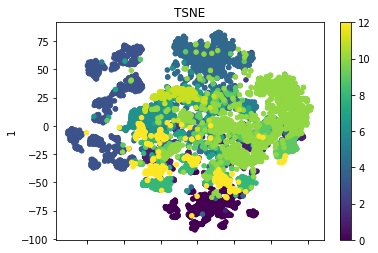

In [8]:
visualize_model_tsne("2020_03_01--05_02_24_cls_loss_full", None, True, False)


In [ ]:
# no cls loss
# Overall 				0.6309	0.6454	0.6445	0.6310	

# cls loss

#Overall 				0.6221	0.6407	0.6449	0.6359
# 0.6689851767388826